### Prediction - prediction scatterplots - n choose r - Binomial Coefficient

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
def aggregate_predsV2(fold_preds):
    fold_preds = pd.read_csv(fold_preds+"/preds.csv")
    aggregate_pred = fold_preds['0']
    for i in range(1,10):
        aggregate_pred += fold_preds[str(i)]

    aggregate_pred = aggregate_pred/10.0    
    print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))
    return aggregate_pred

def aggregate_predsV1(fold_preds):
    t = [None] * 10
    for i in range(0,10):
      t[i] = pd.read_csv(fold_preds+"/test_set_"+str(i)+".csv") 
    
    aggregate_pred = t[0].y_pred_test #.values
    for i in range(1,10):
        aggregate_pred += t[i].y_pred_test #.values

    aggregate_pred = aggregate_pred/10.0
    print(str( accuracy_score(aggregate_pred.round().astype("int"), t[0].y_true) ) + " "+ 
          str( mean_squared_error(aggregate_pred, t[0].y_true) ) ) 
    return aggregate_pred
    
y_true = pd.read_csv("EFFNetV2_l_MLP_all/test_set_files.csv")

print("aggregate accuracy, mse")
l_all = aggregate_predsV2( "EFFNetV2_l_MLP_all" )
l_middle = aggregate_predsV2( "EFFNetV2_l_MLP_middle" )

m_min = aggregate_predsV2( "EFFNetV2_m_min_mse" )
m_middle = aggregate_predsV2( "EFFNetV2_m_middle_mse" )
m_max = aggregate_predsV2( "EFFNetV2_m_max_mse" )
m_all = aggregate_predsV2( "EFFNetV2_m_MLP_all" )

b4_min = aggregate_predsV1( "tf_EFFNetB4_groupkfold_stdScalar_10_test2" )
b4_middle = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_middle" )
b4_max = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_max" )

b5_min = aggregate_predsV1( "tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min" )

b6_min = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_min" )
b6_middle = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_middle" )
b6_max = aggregate_predsV1( "EFFNetB6_groupkfold_stdScalar_10_test_max" )
#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max

aggregate accuracy, mse
0.7165048543689321 0.2812634011698365
0.7184466019417476 0.27972858674427004
0.7398058252427184 0.2733061445705727
0.7242718446601941 0.29181617978158675
0.7106796116504854 0.28988731306984655
0.7398058252427184 0.2728000533332227
0.7281553398058253 0.27677442836796534
0.7145631067961165 0.2847701138075624
0.7087378640776699 0.2908639084032022
0.7436893203883496 0.2770159431240281
0.7339805825242719 0.272170267061415
0.7436893203883496 0.2622701387186297
0.7145631067961165 0.30471818752107327


### Correlation matrix - using Pearson, Spearman and Kendals Tau correlation

In [19]:
a = np.matrix('1 2; 3 4')
a.shape
#pd.DataFrame(a)

(2, 2)

Pearson


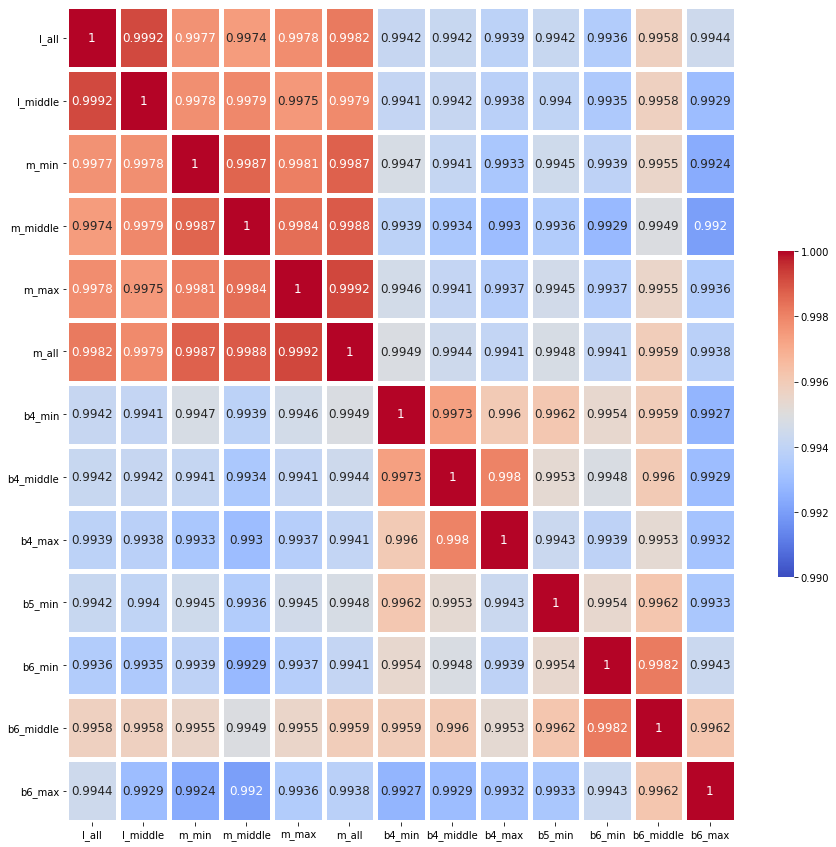

Spearman


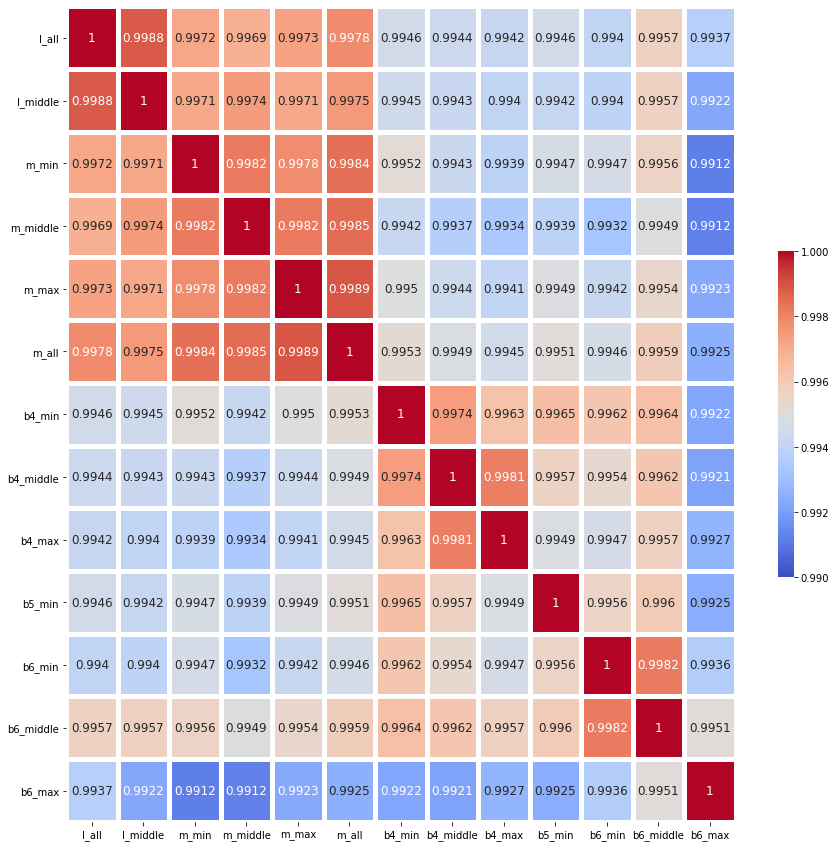

Kendals Tau


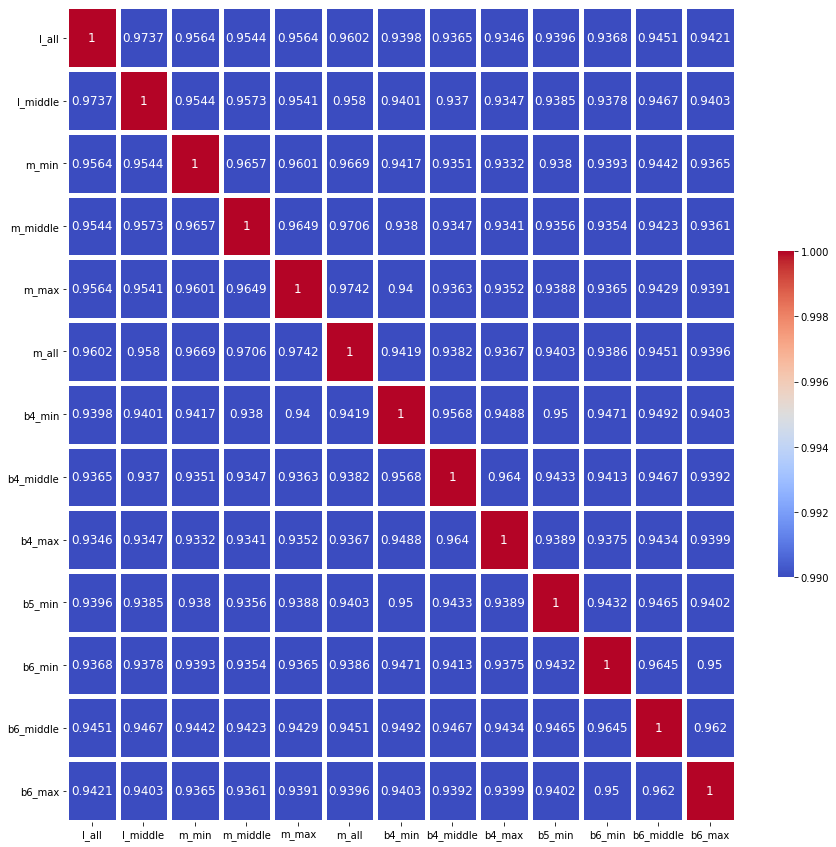

In [6]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import seaborn as sns

all = [l_all.values.tolist(),l_middle.values.tolist(),m_min.values.tolist(),m_middle.values.tolist(),m_max.values.tolist(),m_all.values.tolist(),b4_min.values.tolist(),b4_middle.values.tolist(),b4_max.values.tolist(),b5_min.values.tolist(),b6_min.values.tolist(),b6_middle.values.tolist(),b6_max.values.tolist()]

corr_matrix1 = np.empty((len(all), len(all)))
corr_matrix2 = np.empty((len(all), len(all)))
corr_matrix3 = np.empty((len(all), len(all)))
for i in range(0,len(all)):
    data1 = all[i]
    for j in range(0, len(all)):
        data2 = all[j]
        corr1, _ = pearsonr(data1, data2)
        corr2, _ = spearmanr(data1, data2)
        corr3, _ = kendalltau(data1, data2)
        corr_matrix1[i, j] = corr1
        corr_matrix2[i, j] = corr2
        corr_matrix3[i, j] = corr3

column_names = ['l_all','l_middle','m_min','m_middle','m_max','m_all','b4_min','b4_middle','b4_max','b5_min','b6_min','b6_middle','b6_max']
corr_matrix1 = pd.DataFrame(corr_matrix1)
corr_matrix1.columns = column_names
corr_matrix2 = pd.DataFrame(corr_matrix2)
corr_matrix2.columns = column_names
corr_matrix3 = pd.DataFrame(corr_matrix3)
corr_matrix3.columns = column_names

def plotCorrelation(corr_matrix):
    f, ax = plt.subplots(figsize=(15, 15))
    
    heatmap = sns.heatmap(corr_matrix,
                          #mask = mask,
                          square = False,
                          linewidths = 5,
                          cmap = "coolwarm",
                          cbar_kws = {'shrink': .4,
                                    "ticks" : [0.99, 0.992, 0.994, 0.996, 0.998, 1]},
                          vmin = 0.99,
                          vmax = 1,
                          annot = True,
                          annot_kws = {"size": 12},
                          fmt='.4g')

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)

    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    plt.show()
  
print("Pearson")
plotCorrelation(corr_matrix1)
print("Spearman")
plotCorrelation(corr_matrix2)
print("Kendals Tau")
plotCorrelation(corr_matrix3)

### distribution of residual error

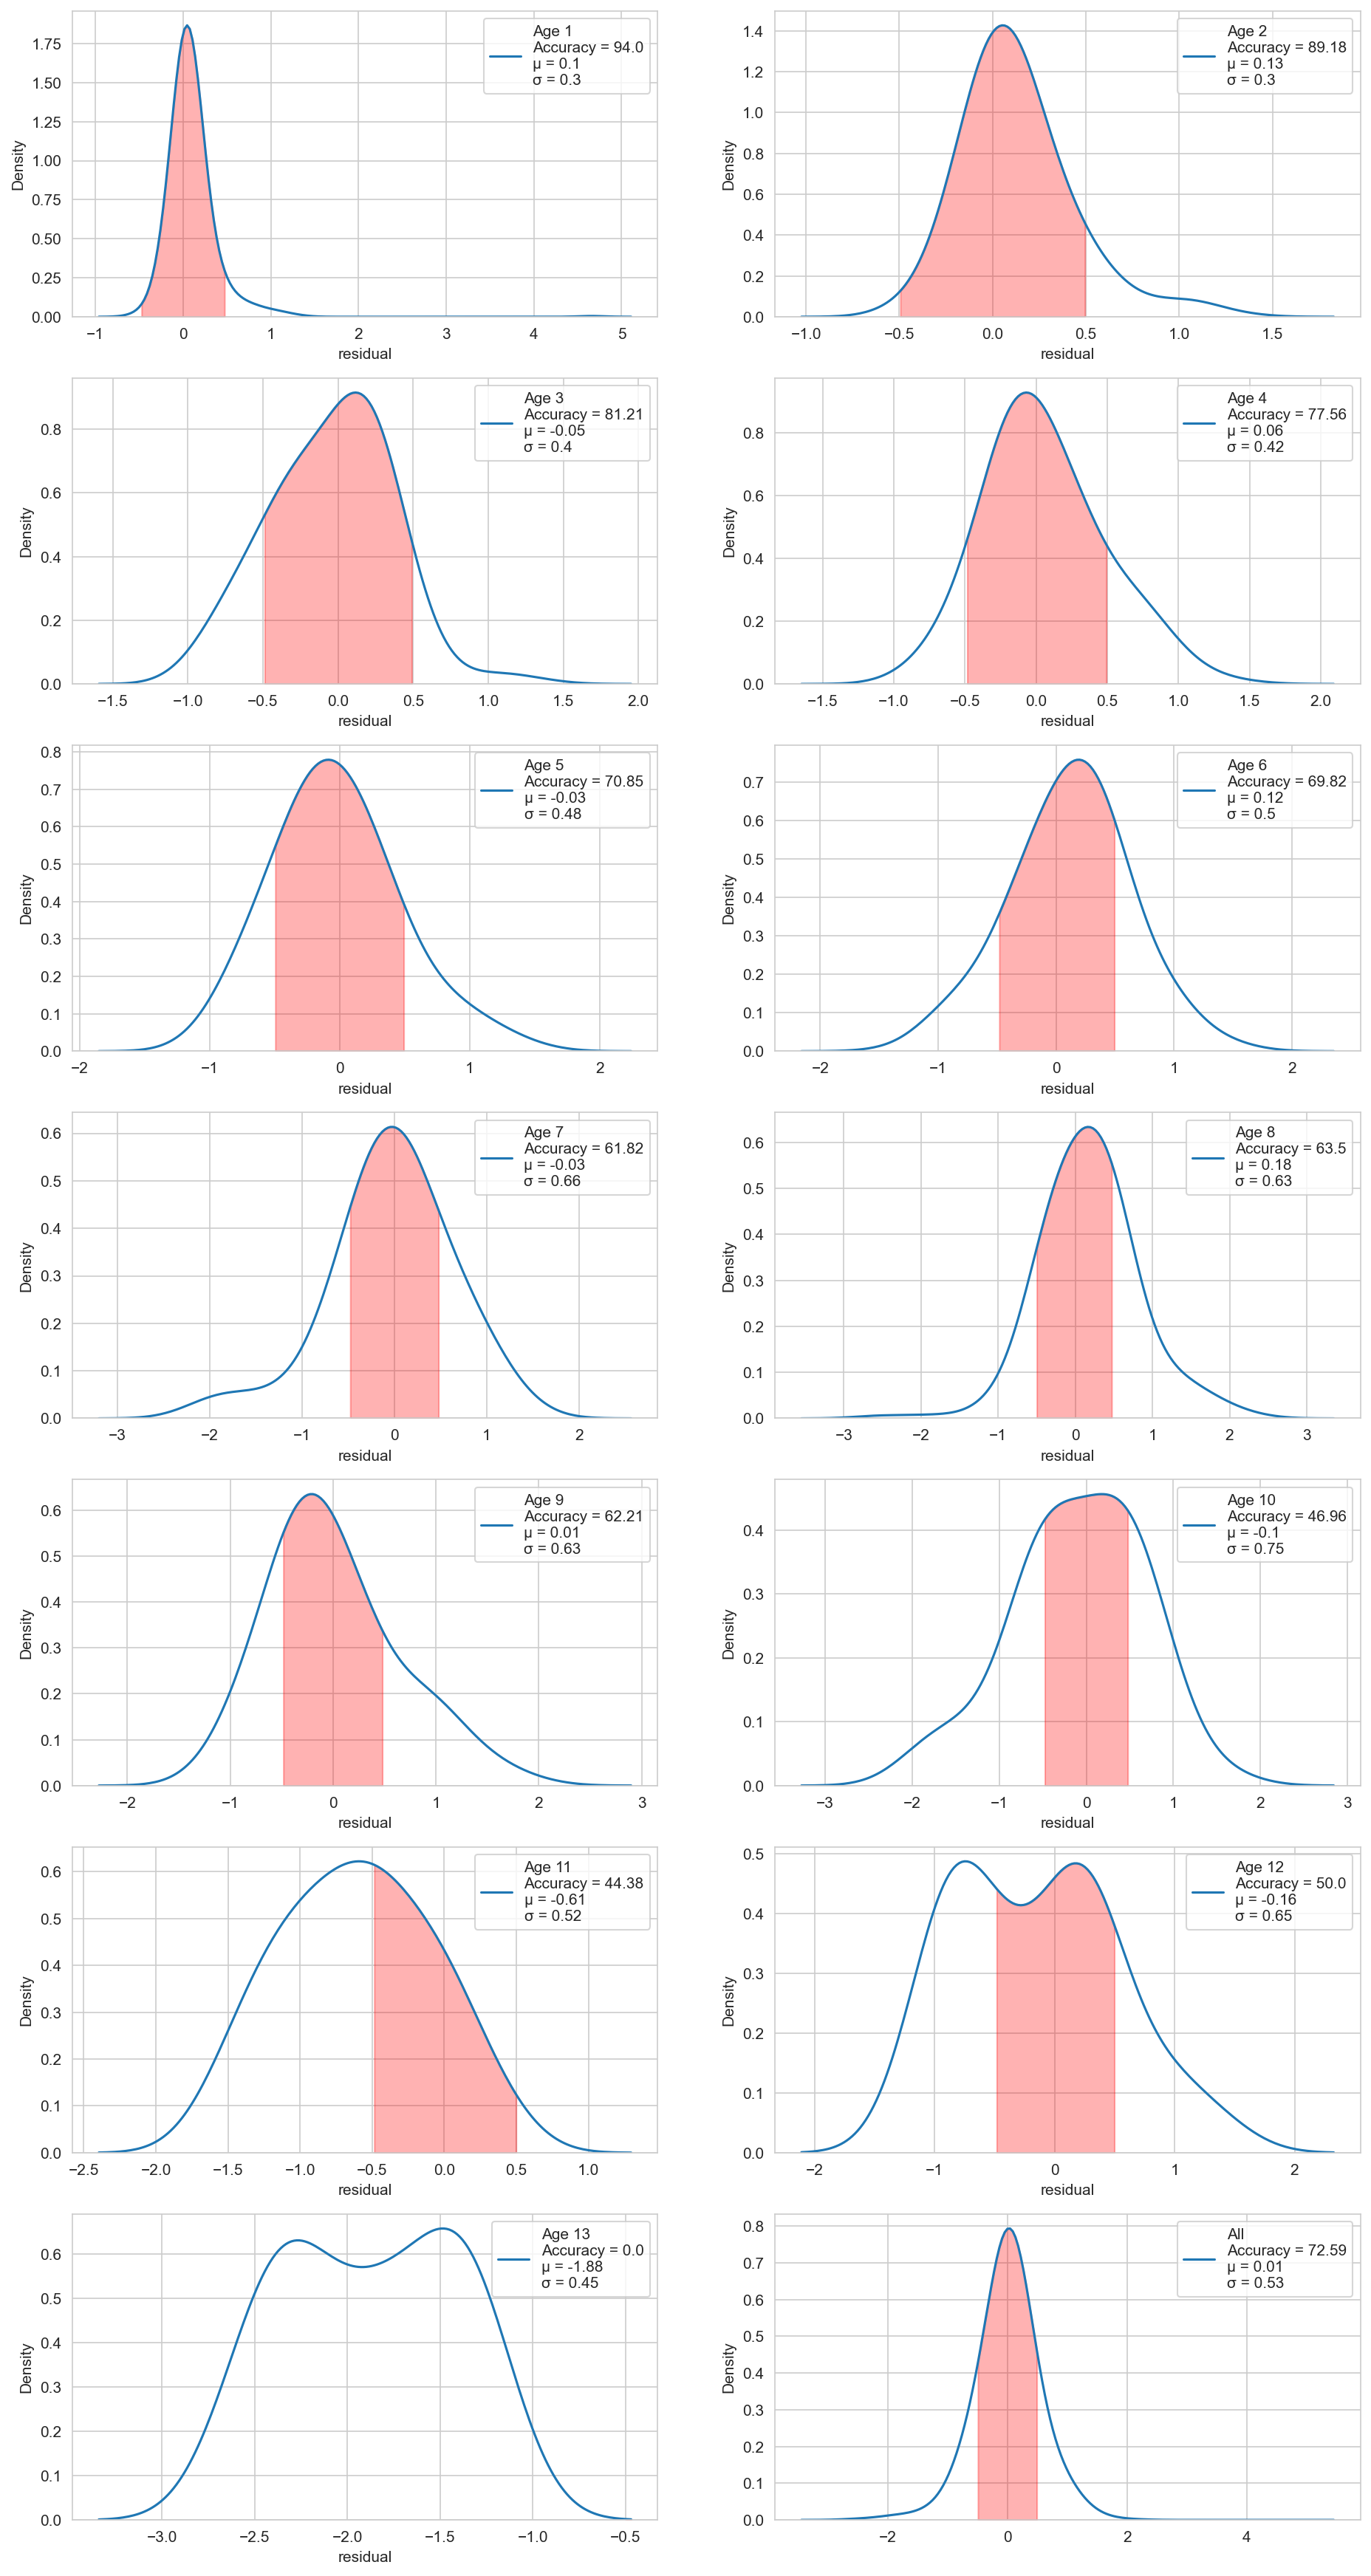

       l_all  l_middle     m_min  m_middle     m_max     m_all    b4_min  \
1   0.105030  0.088360  0.133341  0.147154  0.155880  0.119115  0.038359   
2   0.136967  0.117394  0.100707  0.137373  0.162849  0.128819  0.144490   
3  -0.050125 -0.074762 -0.044407 -0.032315 -0.032213 -0.043056 -0.027522   
4   0.048510  0.032716  0.067387  0.062091  0.080548  0.081558  0.076545   
5  -0.053634 -0.047709  0.003796 -0.017336 -0.022748 -0.027366 -0.008701   
6   0.081959  0.045233  0.082296  0.043367  0.086834  0.072648  0.175534   
7  -0.103296 -0.141162 -0.086433 -0.085486 -0.044297 -0.092623  0.043243   
8   0.115950  0.109126  0.141749  0.107264  0.146404  0.126356  0.268529   
9  -0.122560 -0.143304 -0.112262 -0.137239 -0.130160 -0.116099  0.106024   
10 -0.233363 -0.241878 -0.111930 -0.197229 -0.221513 -0.185059  0.011033   
11 -0.786218 -0.830951 -0.664285 -0.807655 -0.778408 -0.700094 -0.413648   
12 -0.295395 -0.400135 -0.287717 -0.488604 -0.393009 -0.307009  0.299193   
13 -1.905007

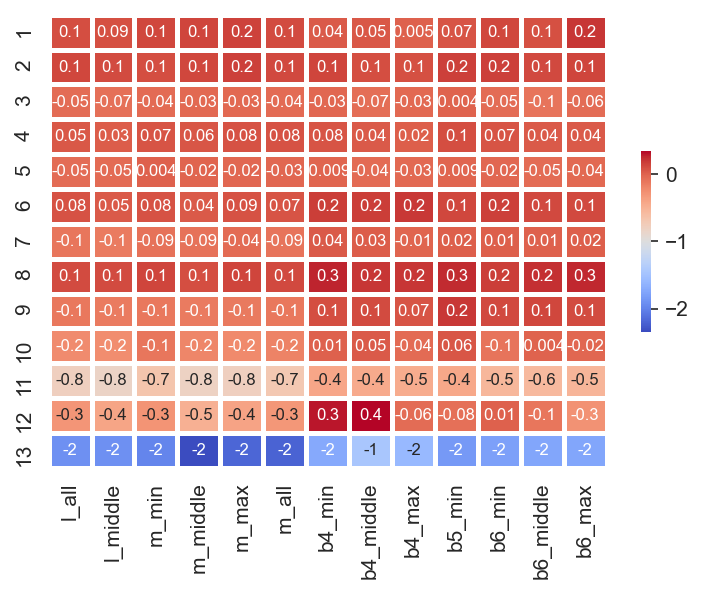

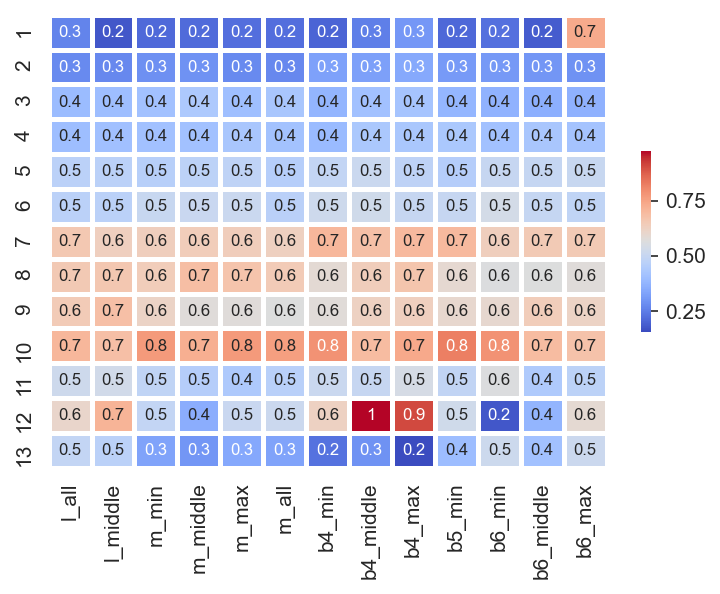

In [50]:
import numpy as np
import seaborn as sns
from scipy.stats import norm 

df_all = [l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max]
figure, axes = plt.subplots(7,2, figsize=(15,30)) 
plt.rcParams['figure.dpi'] = 150

df_values = np.array([])
weight_acc = np.zeros(13)
weights = np.zeros(13)

mu_matrix = pd.DataFrame(0, index=np.arange(1, 14), columns=column_names)
std_matrix = pd.DataFrame(0, index=np.arange(1, 14), columns=column_names)
for j in range(1, 14):
    sns.set_style('whitegrid')
    age1 = np.array([])
    for i in range(0,len(all)):
        data1 = df_all[i]
        age1 = np.append( age1, data1[y_true.age==j] )
        df_values = np.append(df_values, age1 -j)
        
        mu_age, std_age = norm.fit(data1[y_true.age==j]-j) #returns location scale
        #mu_age = str(round(mu_age, 2))
        ##std_age = str(round(std_age, 2))
        mu_matrix.iloc[j-1, i] = mu_age
        std_matrix.iloc[j-1, i] = std_age

    acc = accuracy_score(age1.round(), np.repeat(j, len(age1) ))
    acc = acc * 100
    weight_acc[j-1] = acc
    
    acc = str(round(acc, 2))
    mu, std = norm.fit(age1-j) #returns location scale
    mu = str(round(mu, 2))
    std = str(round(std, 2))
    
    weights[j-1] = len(age1)
    
    age1 = age1 - j
    #sns.histplot(data=age1)
    sns.kdeplot(age1, bw_method=0.5, ax=axes[(j-1)//2, (j-1)%2], label='Age '+str(j)+
                '\nAccuracy = '+str(acc)+
                '\n\u03BC = '+str(mu)+ #mu
                '\n\u03C3 = '+str(std)) #sigma
    axes[(j-1)//2, (j-1)%2].set_xlabel('residual')
    axes[(j-1)//2, (j-1)%2].legend()
    
    l1 = axes[(j-1)//2, (j-1)%2].lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]

    cond = np.where( (x1 > -0.5) & (x1 < 0.5) )
    x1 = x1[cond]
    y1 = y1[cond]
    
    axes[(j-1)//2, (j-1)%2].fill_between(x1, y1, color="red", alpha=0.3)
    


mu, std = norm.fit(df_values) #returns location scale
mu = str(round(mu, 2))
std = str(round(std, 2))

new_weights = (weights/13) / (np.sum(weights)/13)
acc = 0
for i in range(0,13):
    acc += weight_acc[i]*new_weights[i]

acc = str(round(acc, 2))
sns.kdeplot(df_values, bw_method=0.5, ax=axes[6,1], label='All '
                '\nAccuracy = '+str(acc)+
                '\n\u03BC = '+str(mu)+ #mu
                '\n\u03C3 = '+str(std)) #sigma

l1 = axes[6, 1].lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

cond = np.where( (x1 > -0.5) & (x1 < 0.5) )
x1 = x1[cond]
y1 = y1[cond]
axes[6, 1].fill_between(x1, y1, color="red", alpha=0.3)
axes[6, 1].legend()
plt.show()    

#print(mu_matrix.to_markdown()) 
#print("********")
#print(std_matrix.to_markdown()) 

print(mu_matrix)
heatmap = sns.heatmap(mu_matrix,
                      #mask = mask,
                      square = False,
                      linewidths = 1.5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4},
                      #          "ticks" : [0.99, 0.992, 0.994, 0.996, 0.998, 1]},
                      #vmin = 0.99,
                      #vmax = 1,
                      annot = True,
                      annot_kws = {"size": 8},
                      fmt='.1g')
#sns.heatmap(mu_matrix)
plt.show()
heatmap = sns.heatmap(std_matrix,
                      #mask = mask,
                      square = False,
                      linewidths = 1.5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4},
                      #          "ticks" : [0.99, 0.992, 0.994, 0.996, 0.998, 1]},
                      #vmin = 0.99,
                      #vmax = 1,
                      annot = True,
                      annot_kws = {"size": 8},
                      fmt='.1g')
plt.show()

#plt.show() #B6 max is weird

### Scatter plot of result x result pr age 

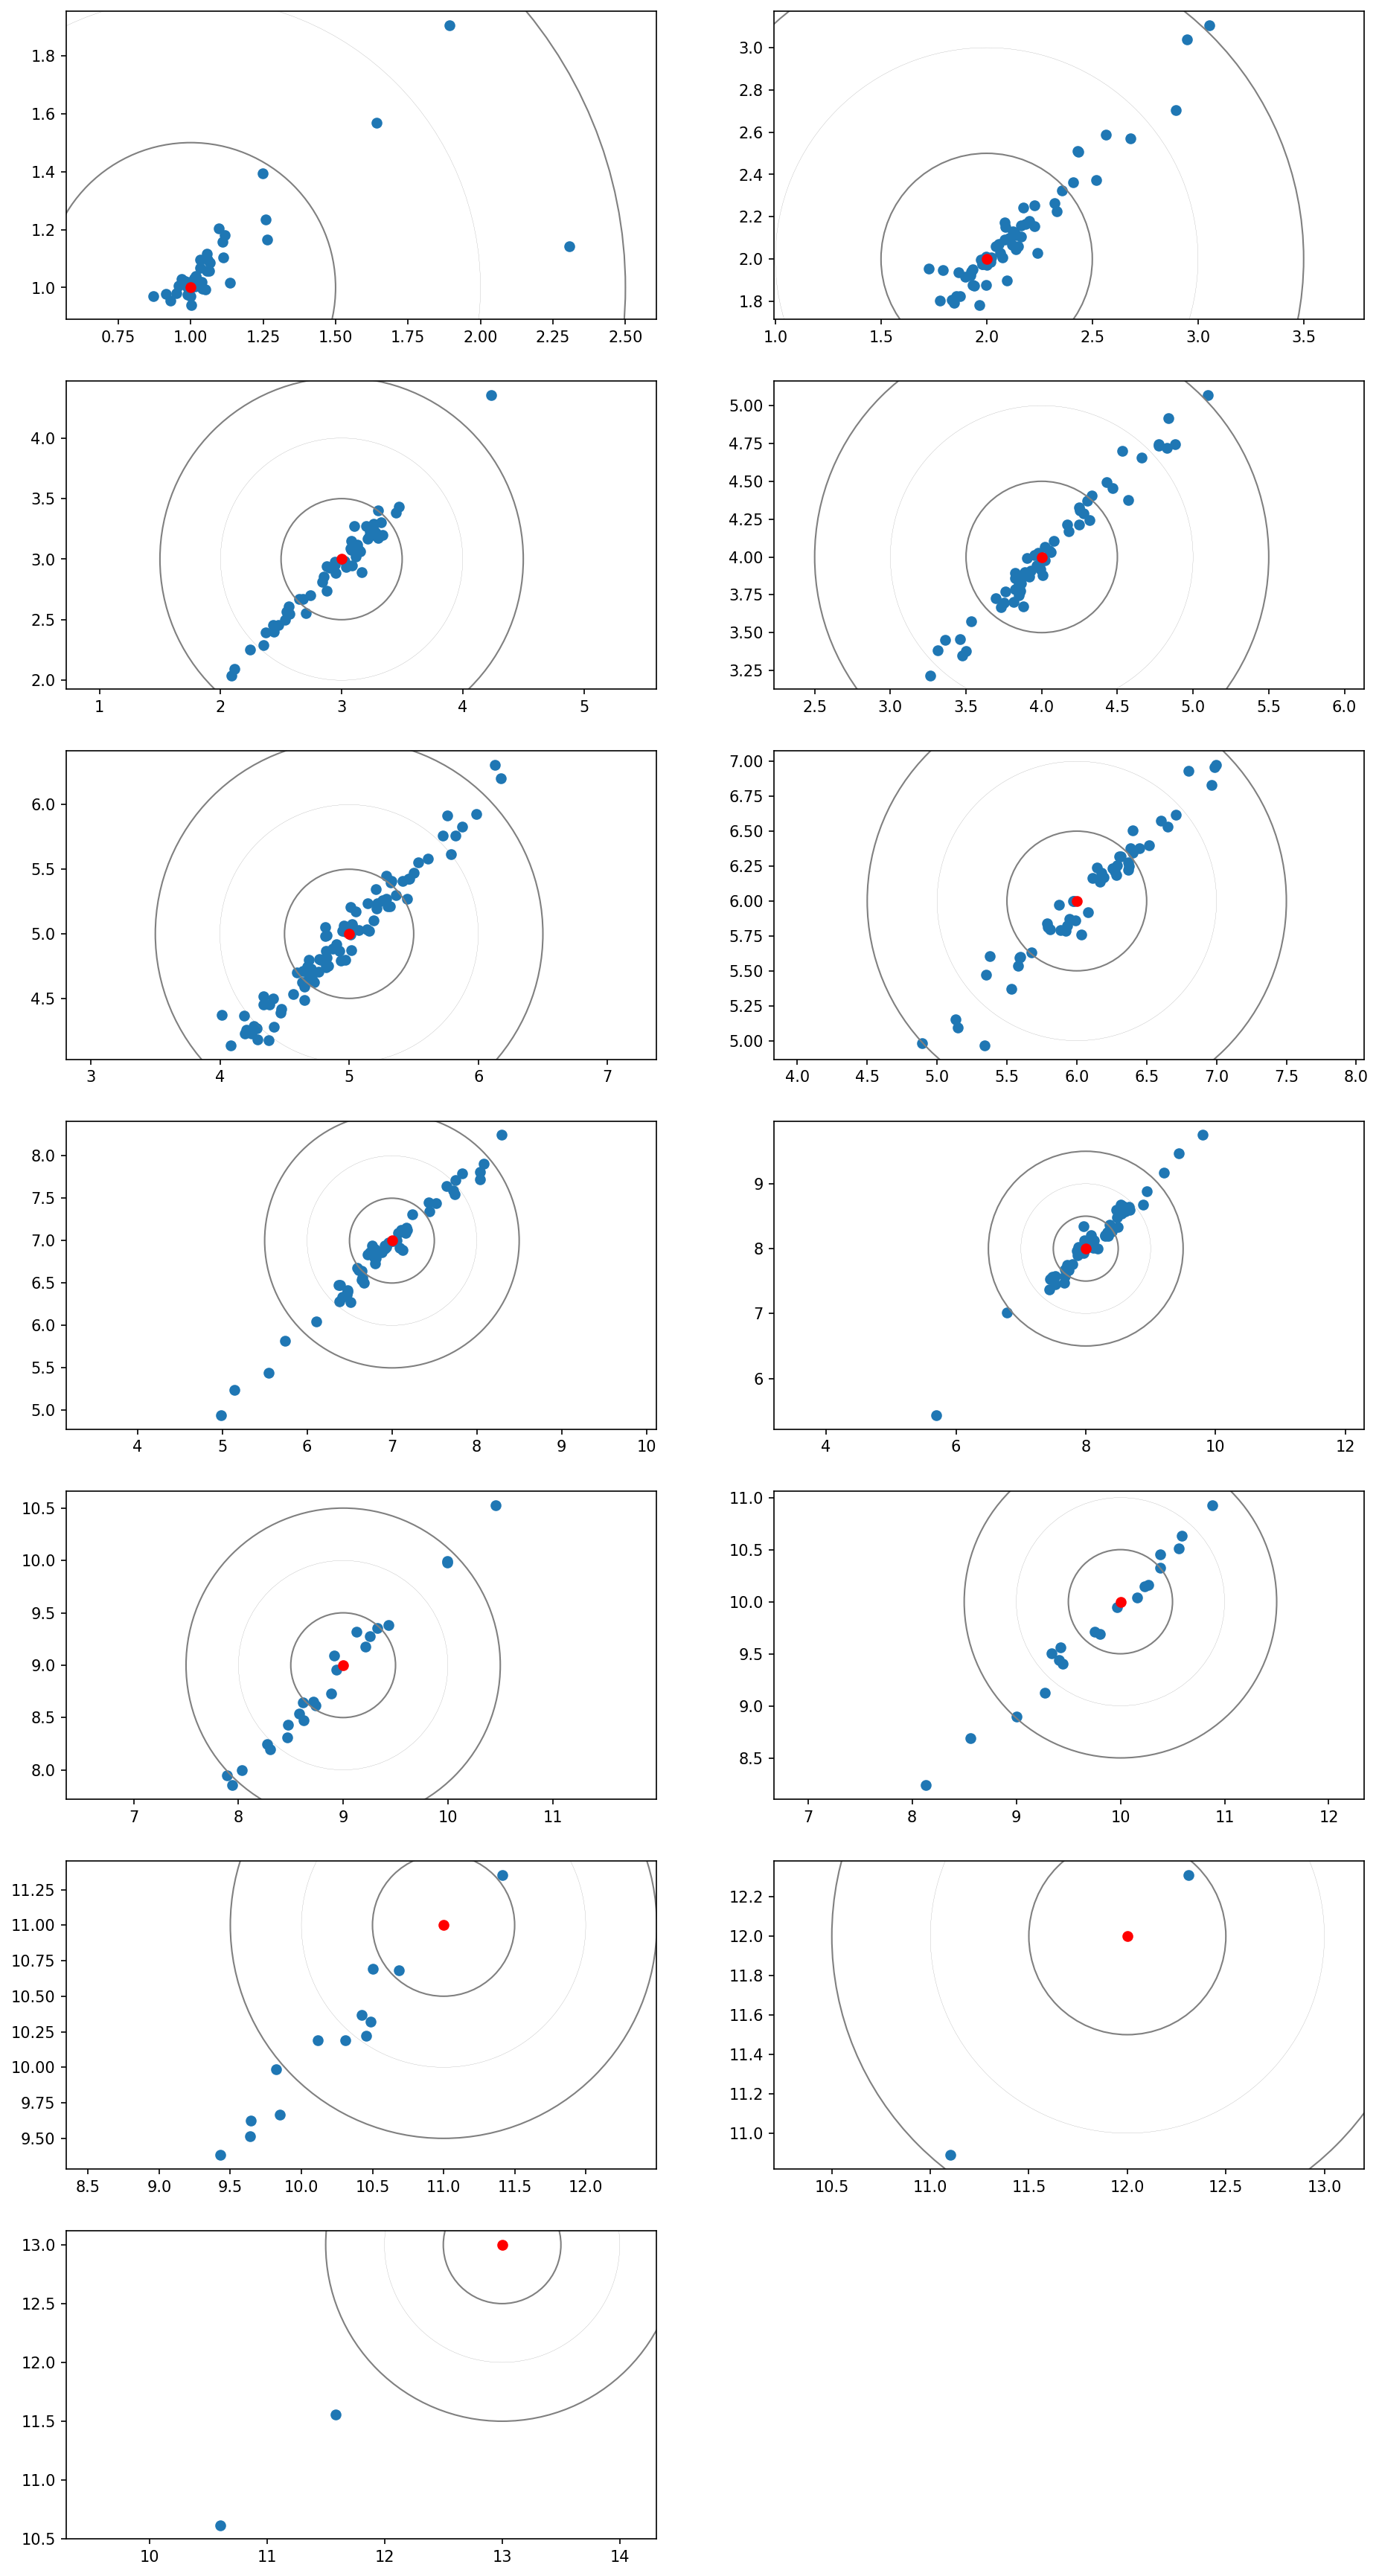

In [48]:
#fig, axs = plt.subplots(1, 2)
#l_all x l_middle
figure, axes = plt.subplots(7,2, figsize=(15,30)) 
plt.rcParams['figure.dpi'] = 150
for i in range(0,13):
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].scatter(l_all[y_true.age==i+1], l_middle[y_true.age==i+1])
    axes[i//2, i%2].scatter(i+1,i+1, c='red')
    cc1 = plt.Circle(( i+1 , i+1 ),   1, fill=False, color='gray', linewidth=0.1)  
    cc2 = plt.Circle(( i+1 , i+1 ), 0.5, fill=False, color='gray', linewidth=1.0)  
    cc3 = plt.Circle(( i+1 , i+1 ), 1.5, fill=False, color='gray', linewidth=1.0)  
    axes[i//2, i%2].add_artist( cc1 ) 
    axes[i//2, i%2].add_artist( cc2 ) 
    axes[i//2, i%2].add_artist( cc3 ) 

figure.delaxes( axes[6,1] )
plt.show()

### Residual scatter plot or result x result pr age

data1: mean=-0.019 stdv=0.530 min=-2.394 max=1.798
data2: mean=-0.037 stdv=0.528 min=-2.567 max=1.751
correlation pearson=0.980 spearman=0.973 kendal=0.872


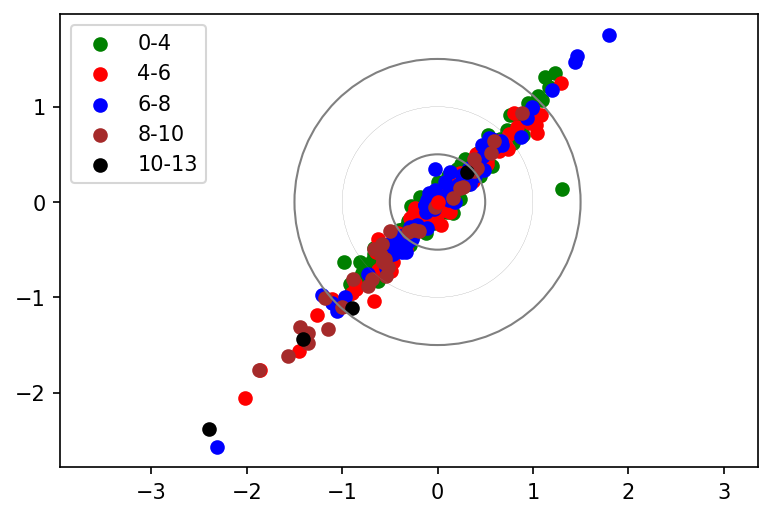

In [248]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

fig, ax = plt.subplots()
ax.axis('equal')
data1 = []
data2 = []
for i in range(0,13): 
    color = 'green'
    theLabel=''
    if i==0:
        theLabel = '0-4'
    if i==5:
        theLabel = '4-6'
    if i==7:
        theLabel = '6-8'
    if i==9:
        theLabel = '8-10'
    if i==11:
        theLabel = '10-13'
    if (i >4):
        color = 'red'
    if (i > 6):
        color = 'blue'
    if (i > 8):
        color = 'brown'
    if (i > 10):
        color = 'black'

    ax.scatter(l_all[y_true.age==i+1]-(i+1), l_middle[y_true.age==i+1]-(i+1), c=color, label=theLabel)
    data1.extend(l_all[y_true.age==i+1].values-(i+1))
    data2.extend(l_middle[y_true.age==i+1].values-(i+1))

ax.scatter(0,0, c='red')    
cc1 = plt.Circle(( 0, 0 ),   1, fill=False, color='gray', linewidth=0.1)  
cc2 = plt.Circle(( 0, 0 ), 0.5, fill=False, color='gray', linewidth=1.0)  
cc3 = plt.Circle(( 0, 0 ), 1.5, fill=False, color='gray', linewidth=1.0)  
ax.add_artist( cc1 ) 
ax.add_artist( cc2 ) 
ax.add_artist( cc3 ) 
plt.legend(loc="upper left")

data1, data2 = np.asarray(data1), np.asarray(data2)
corr1, _ = pearsonr(data1, data2)
corr2, _ = spearmanr(data1, data2)
corr3, _ = kendalltau(data1, data2)
print('data1: mean=%.3f stdv=%.3f min=%.3f max=%.3f' % (np.mean(data1), np.std(data1), np.min(data1), np.max(data1)))
print('data2: mean=%.3f stdv=%.3f min=%.3f max=%.3f' % (np.mean(data2), np.std(data2), np.min(data2), np.max(data2)))
print('correlation pearson=%.3f spearman=%.3f kendal=%.3f' % (corr1, corr2, corr3))

plt.show()

In [251]:
all = [l_all.values.tolist(),l_middle.values.tolist(),m_min.values.tolist(),m_middle.values.tolist(),m_max.values.tolist(),m_all.values.tolist(),b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max]
for i in range(0,len(all)):
    data1 = all[i]
    print('data1: mean=%.3f stdv=%.3f min=%.3f max=%.3f' % (np.mean(data1), np.std(data1), np.min(data1), np.max(data1)))
    for j in range(i+1, len(all)):
        
        data2 = all[j]
        corr1, _ = pearsonr(data1, data2)
        corr2, _ = spearmanr(data1, data2)
        corr3, _ = kendalltau(data1, data2)
        
        print('data2: mean=%.3f stdv=%.3f min=%.3f max=%.3f' % (np.mean(data2), np.std(data2), np.min(data2), np.max(data2)))
        print('\t correlation pearson=%.3f spearman=%.3f kendal=%.3f' % (corr1, corr2, corr3))
    print("*********")

data1: mean=5.161 stdv=2.607 min=0.872 max=12.309
data2: mean=5.143 stdv=2.604 min=0.938 max=12.311
	 correlation pearson=0.999 spearman=0.999 kendal=0.974
data2: mean=5.184 stdv=2.623 min=0.939 max=12.201
	 correlation pearson=0.998 spearman=0.997 kendal=0.956
data2: mean=5.169 stdv=2.593 min=0.869 max=11.867
	 correlation pearson=0.997 spearman=0.997 kendal=0.954
data2: mean=5.188 stdv=2.599 min=0.960 max=12.112
	 correlation pearson=0.998 spearman=0.997 kendal=0.956
data2: mean=5.175 stdv=2.609 min=0.922 max=12.205
	 correlation pearson=0.998 spearman=0.998 kendal=0.960
data2: mean=5.241 stdv=2.697 min=0.716 max=12.924
	 correlation pearson=0.994 spearman=0.995 kendal=0.940
data2: mean=5.218 stdv=2.706 min=0.494 max=13.328
	 correlation pearson=0.994 spearman=0.994 kendal=0.936
data2: mean=5.208 stdv=2.696 min=0.510 max=12.852
	 correlation pearson=0.994 spearman=0.994 kendal=0.935
data2: mean=5.245 stdv=2.686 min=0.805 max=12.447
	 correlation pearson=0.994 spearman=0.995 kendal=0.

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max

i=5
#print(l_all[y_true.age==i].index.values)
#print(type(l_all[y_true.age==i].index.values.tolist()))
#print(l_all[y_true.age==i].index.values.tolist())


dat = pd.DataFrame(columns=l_all.index.values.tolist(), dtype=object)
dat.loc[len(dat)] = l_all.values.tolist()
dat.loc[len(dat)] = l_middle.values.tolist()
dat.loc[len(dat)] = m_min.values.tolist()
dat.loc[len(dat)] = m_middle.values.tolist()
dat.loc[len(dat)] = m_max.values.tolist()
dat.loc[len(dat)] = m_all.values.tolist()
dat.loc[len(dat)] = b4_min
dat.loc[len(dat)] = b4_middle
dat.loc[len(dat)] = b4_max
dat.loc[len(dat)] = b5_min
dat.loc[len(dat)] = b6_min
dat.loc[len(dat)] = b6_middle
dat.loc[len(dat)] = b6_max

print(dat.corr(method='pearson'))

#print(dat.values[0][0:5])
#print(dat.values[1][0:5])
tmp = pd.DataFrame([[4.92319007, 4.68769202, 4.97317033, 4.41288381, 5.29765811],
                    [4.87006421, 4.80093632, 5.01835675, 4.4977107,  5.21192546]], columns=['a','b','c','d','e'], dtype=int)

tmp.a = tmp.a.astype('int')
tmp.b = tmp.b.astype('int')
tmp.c = tmp.c.astype('int')
tmp.d = tmp.d.astype('int')
tmp.e = tmp.e.astype('int')
#print(tmp.dtypes)
#print(tmp)
#print(tmp.corr())

data = pd.DataFrame([["A", 4, 0, 1, 27], 
                         ["B", 7, 1, 1, 29], 
                         ["C", 6, 1, 0, 23], 
                         ["D", 2, 0, 0, 20], 
                         ["etc.", 3, 0, 1, 21]], 
                         columns=["ID", "score", "male", "age20", "BMI"])
#print( data.corr() )

#model = ols("BMI ~ score + male + age20", data=data).fit()
#print( model.params )
#print( model.summary() )

Text(0.5, 1.0, 'm_middle')

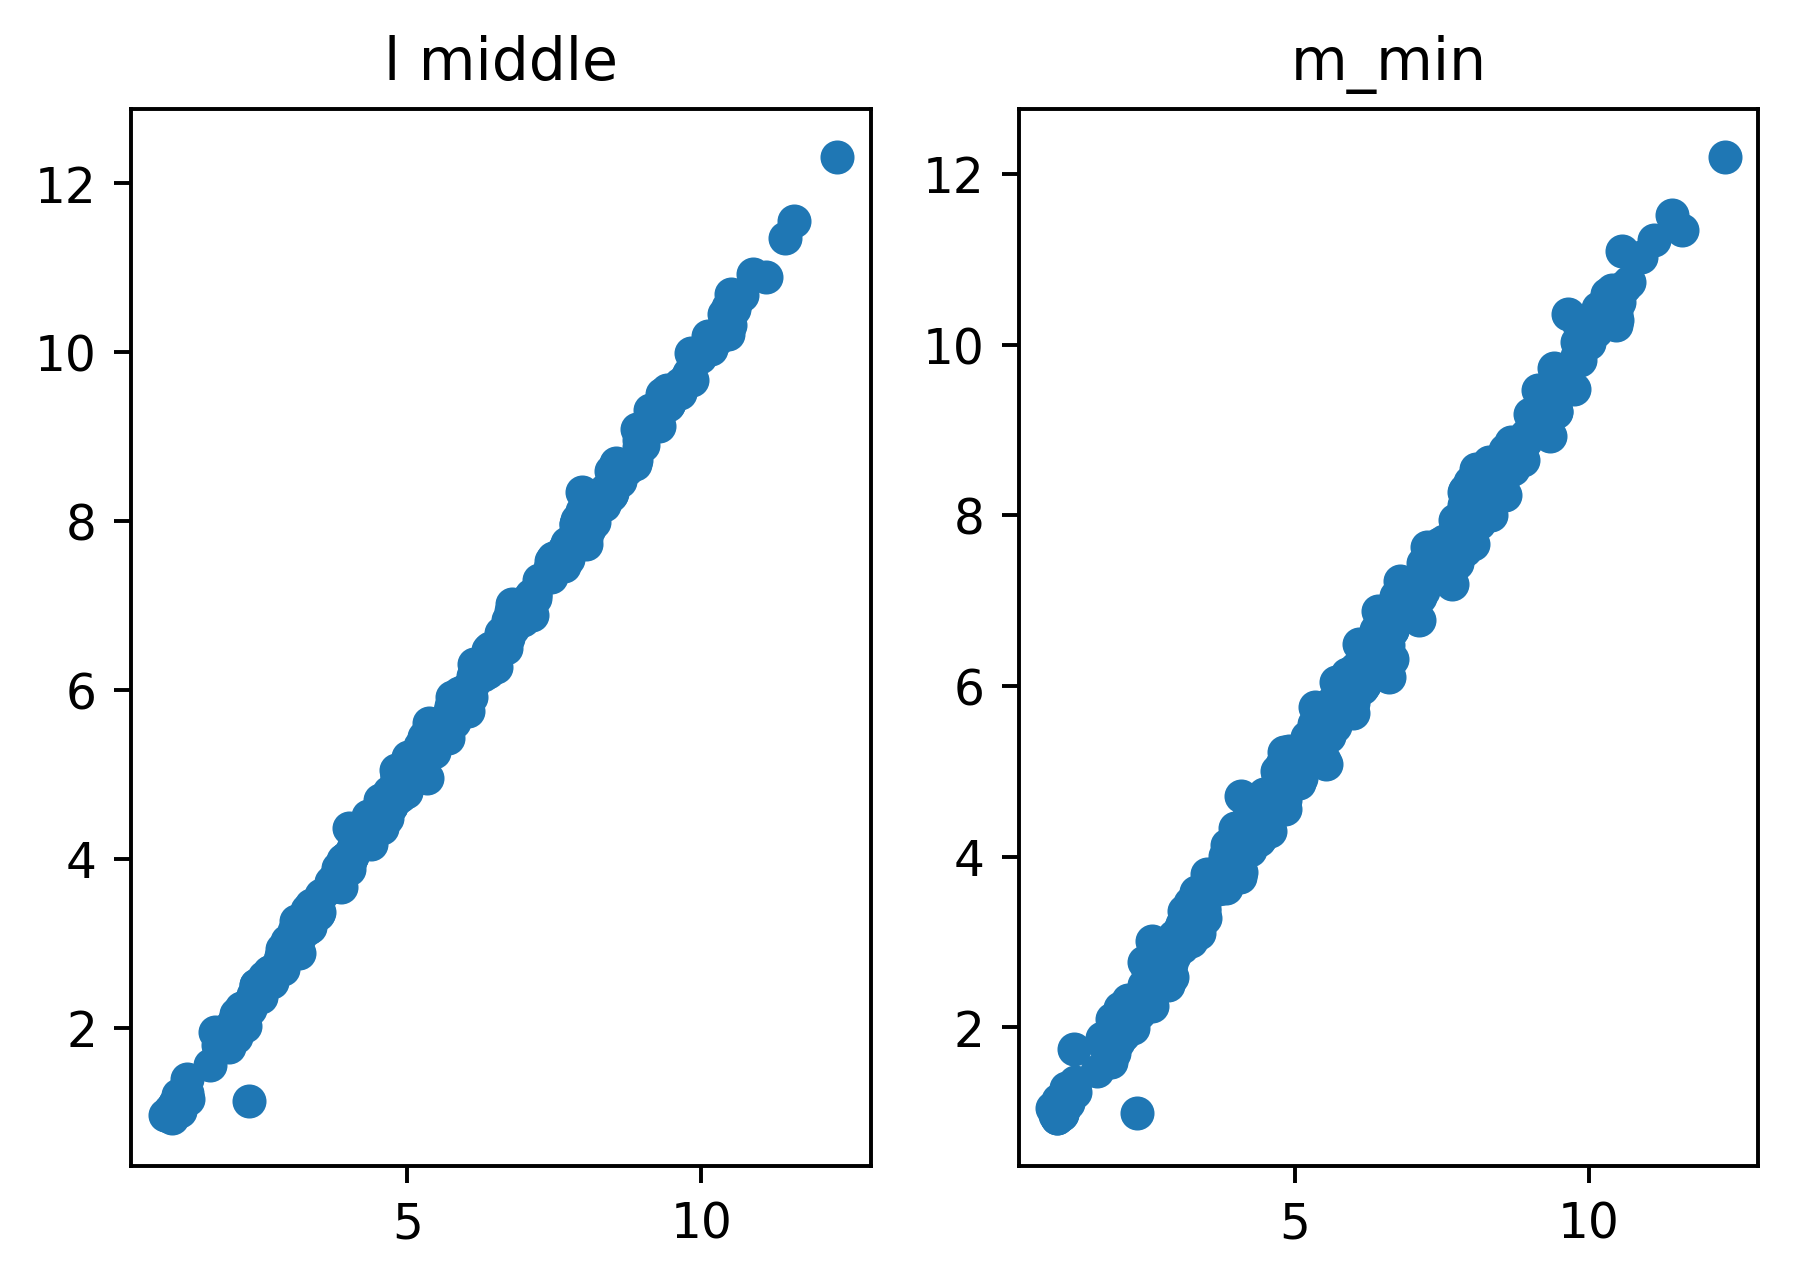

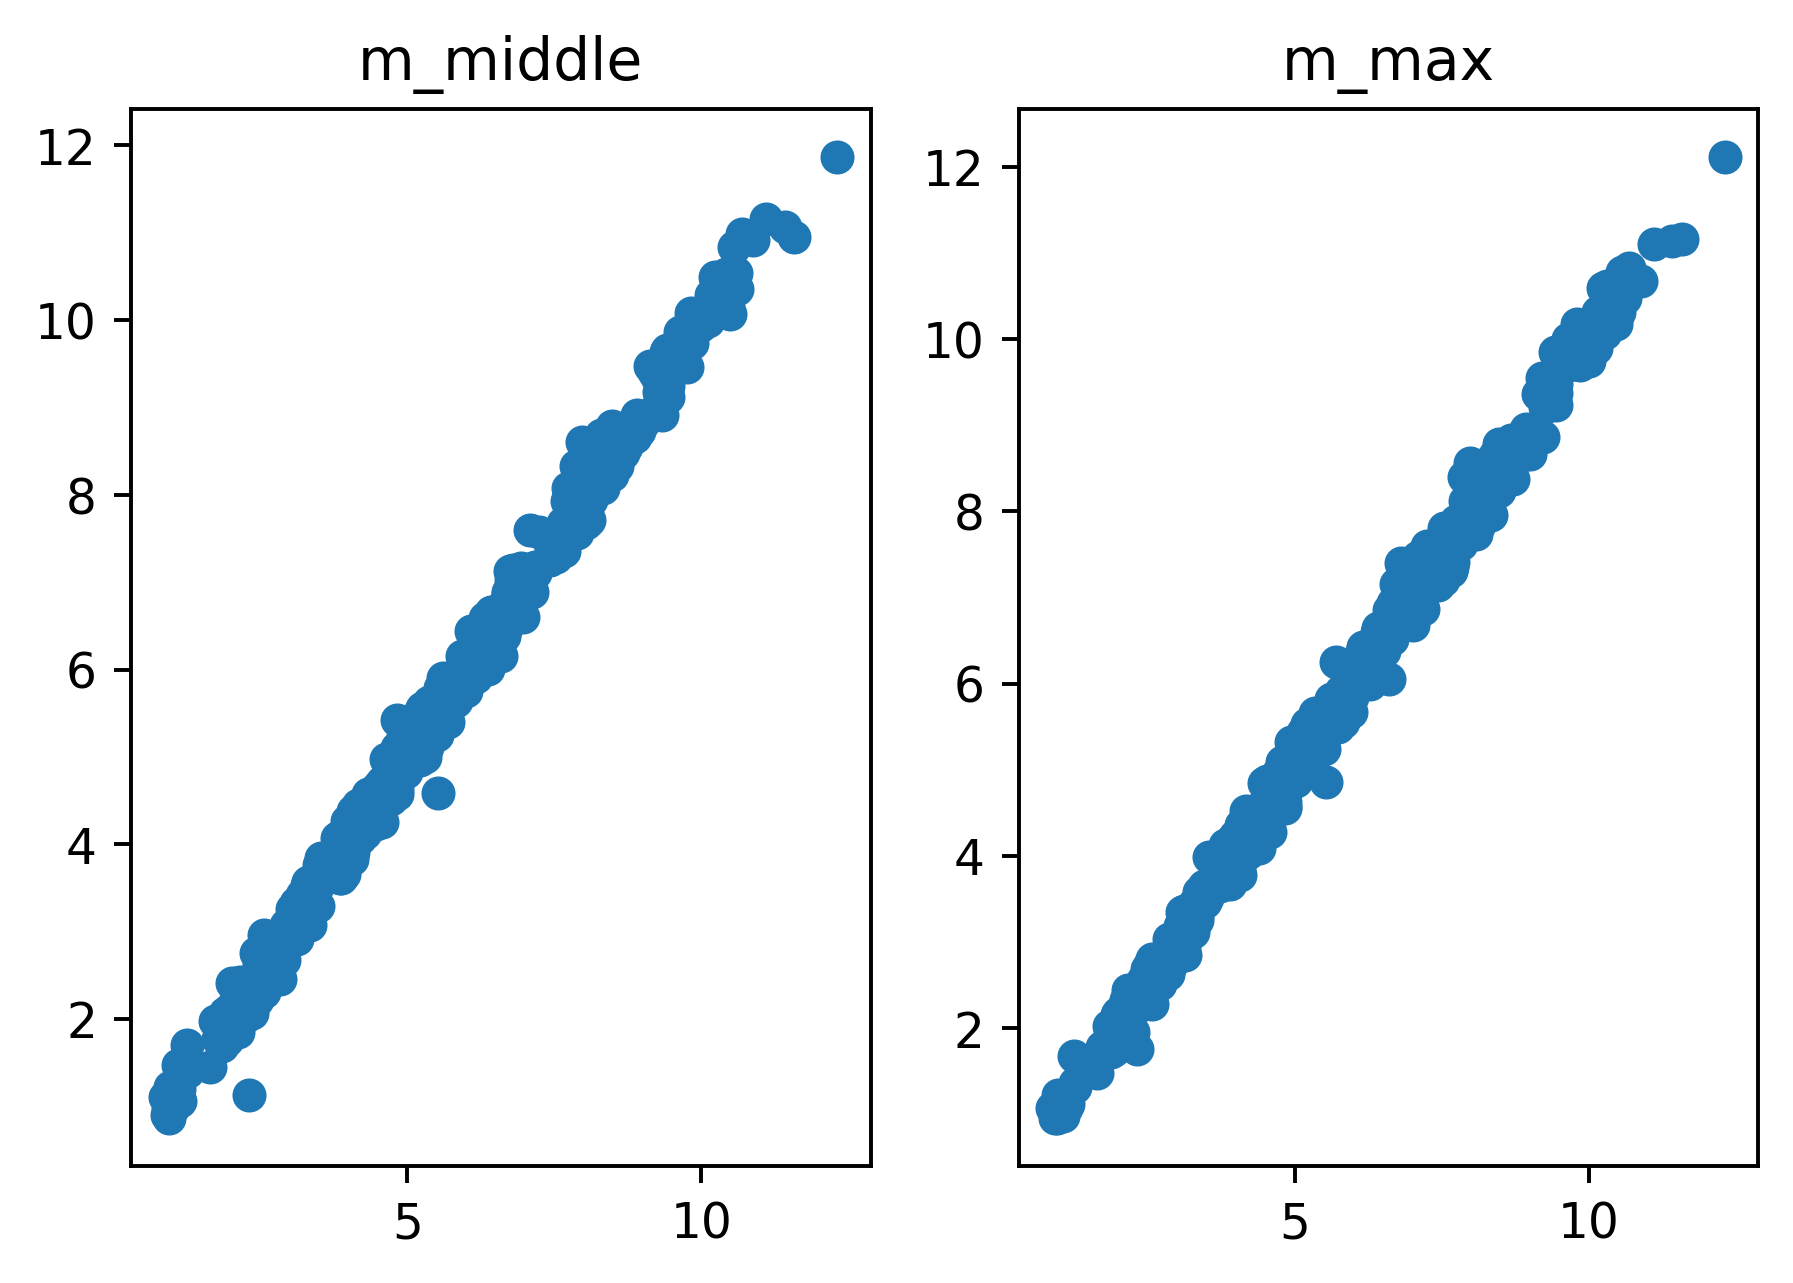

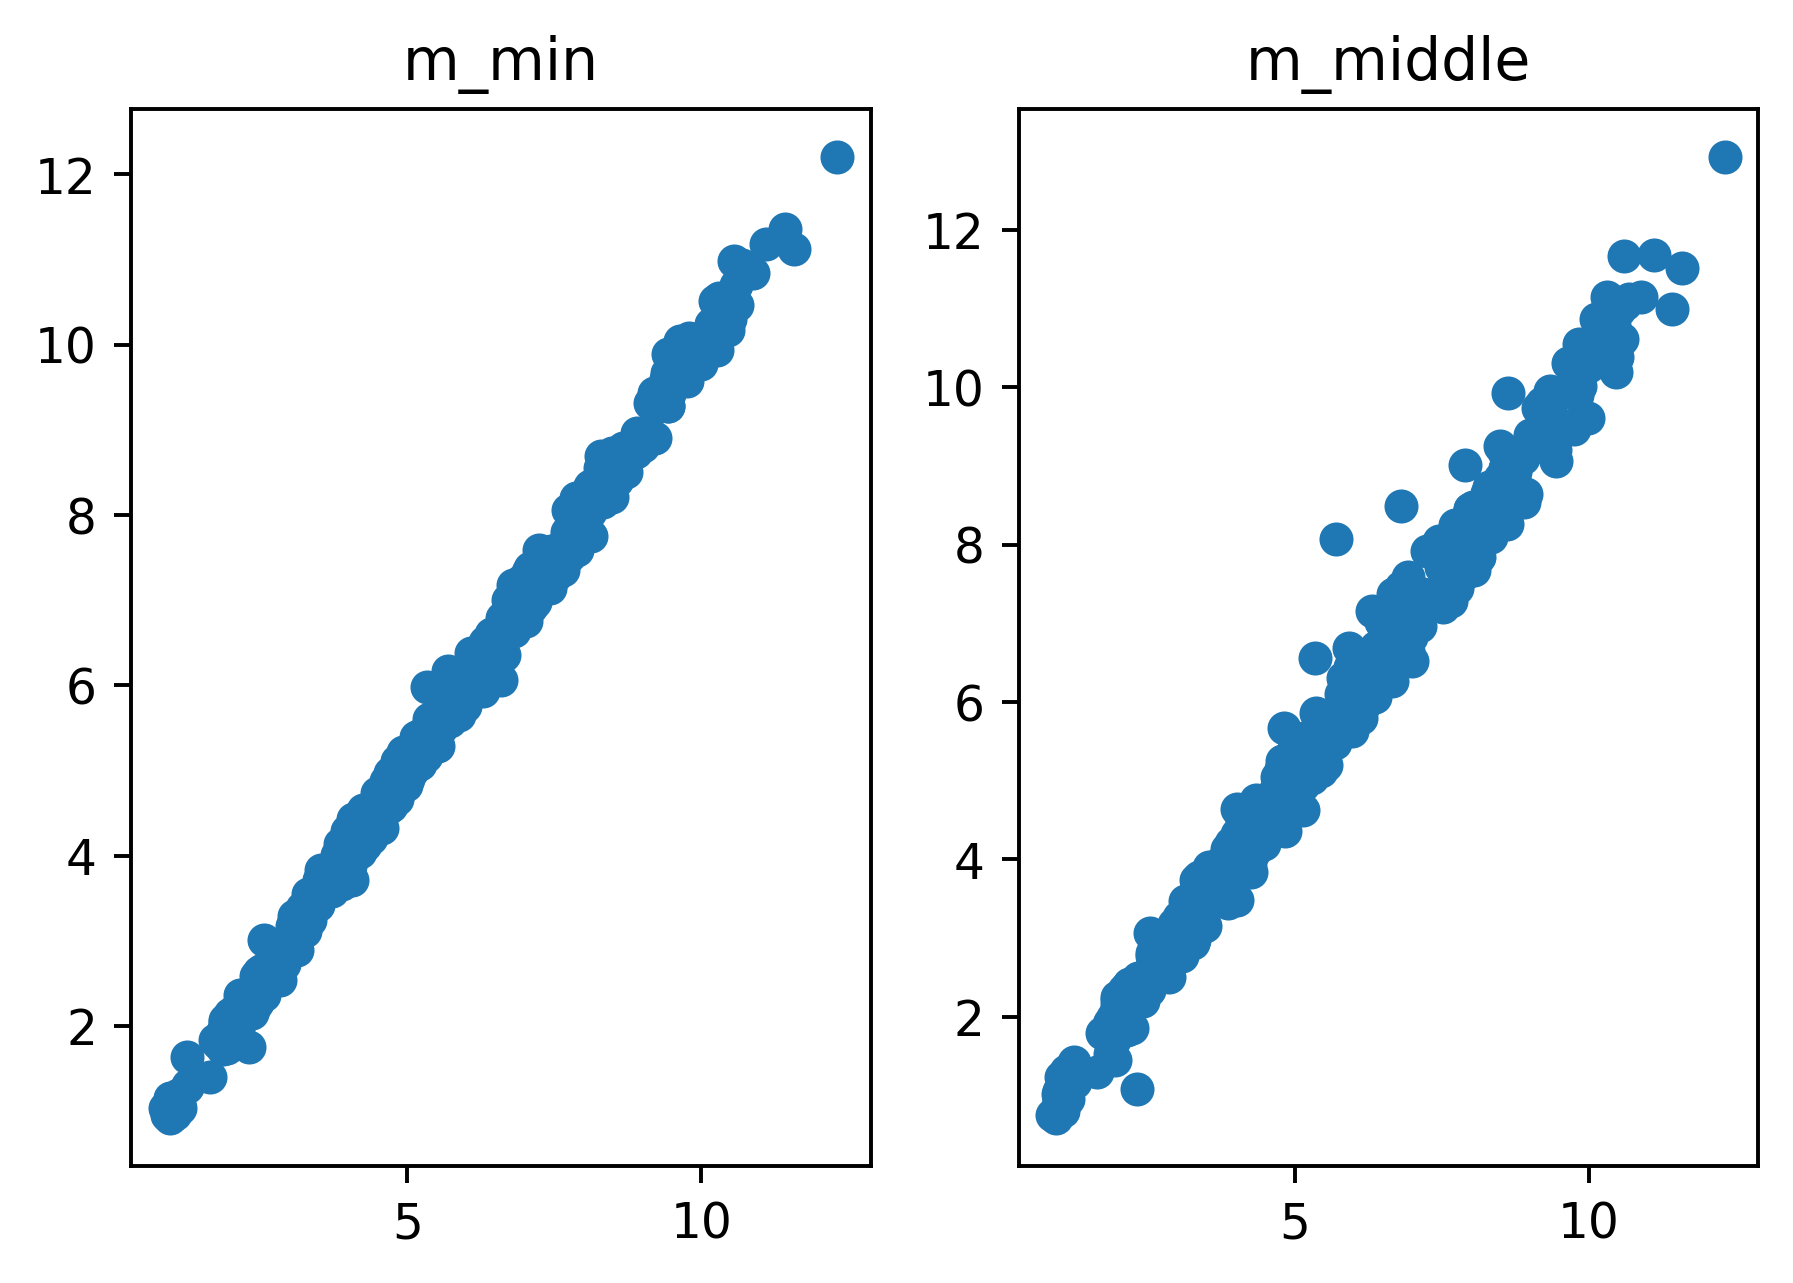

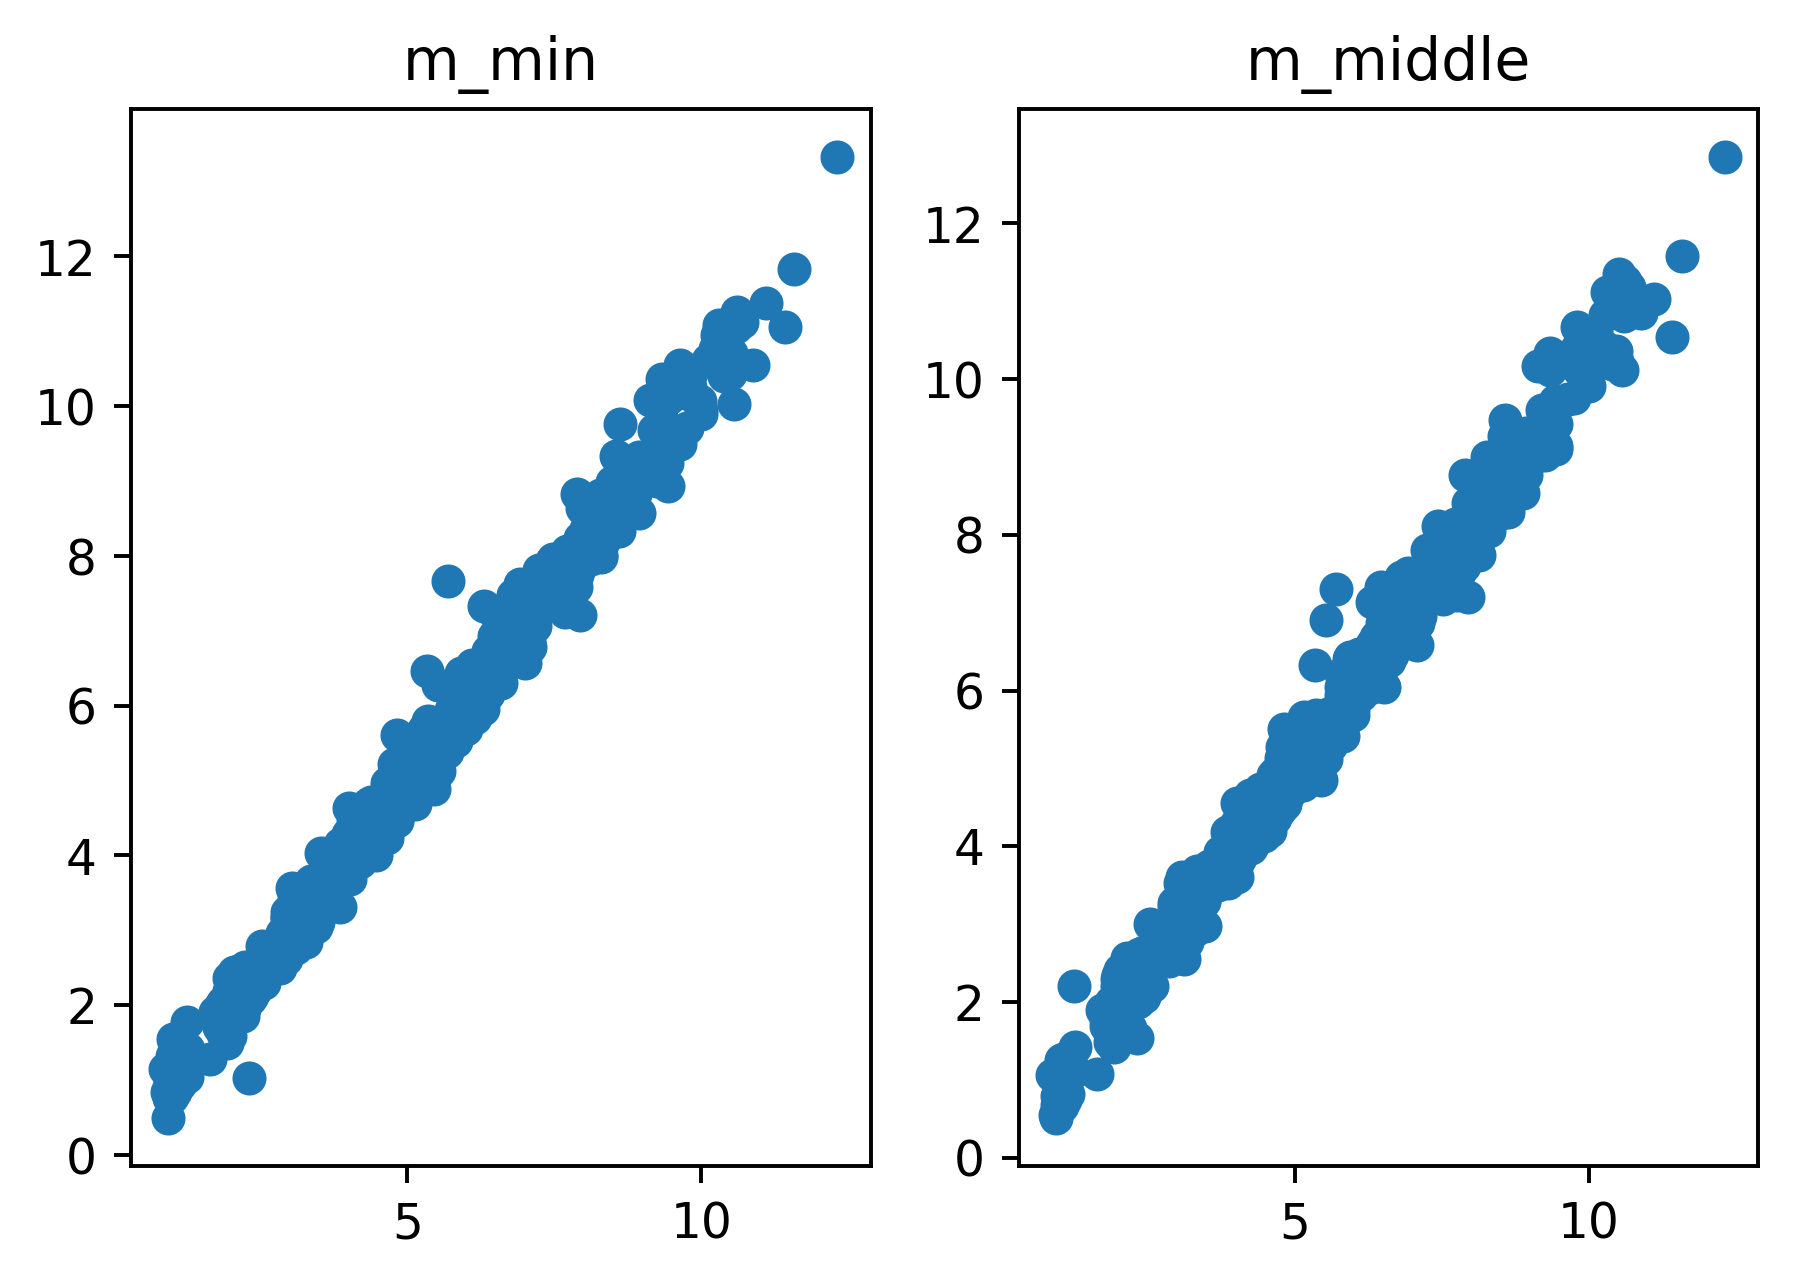

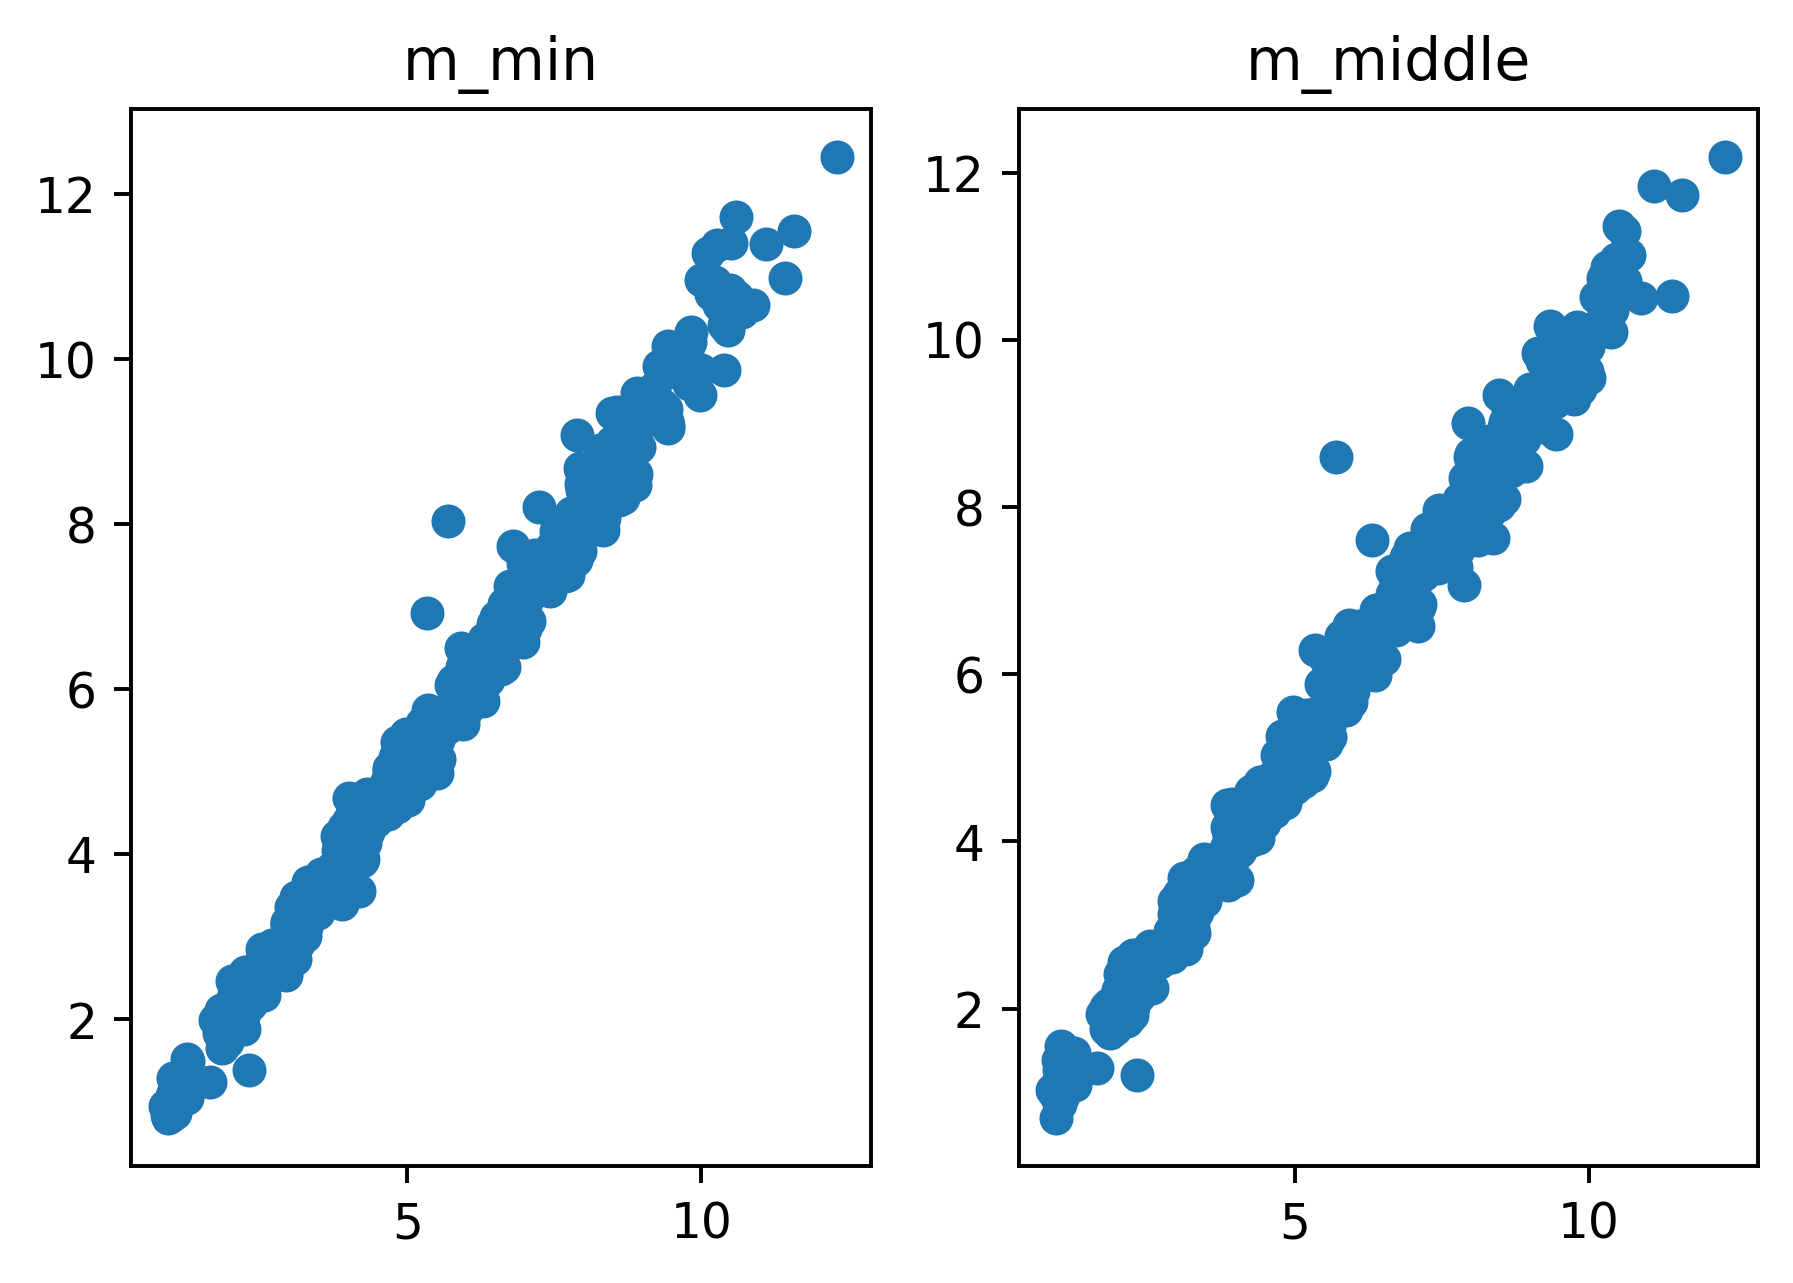

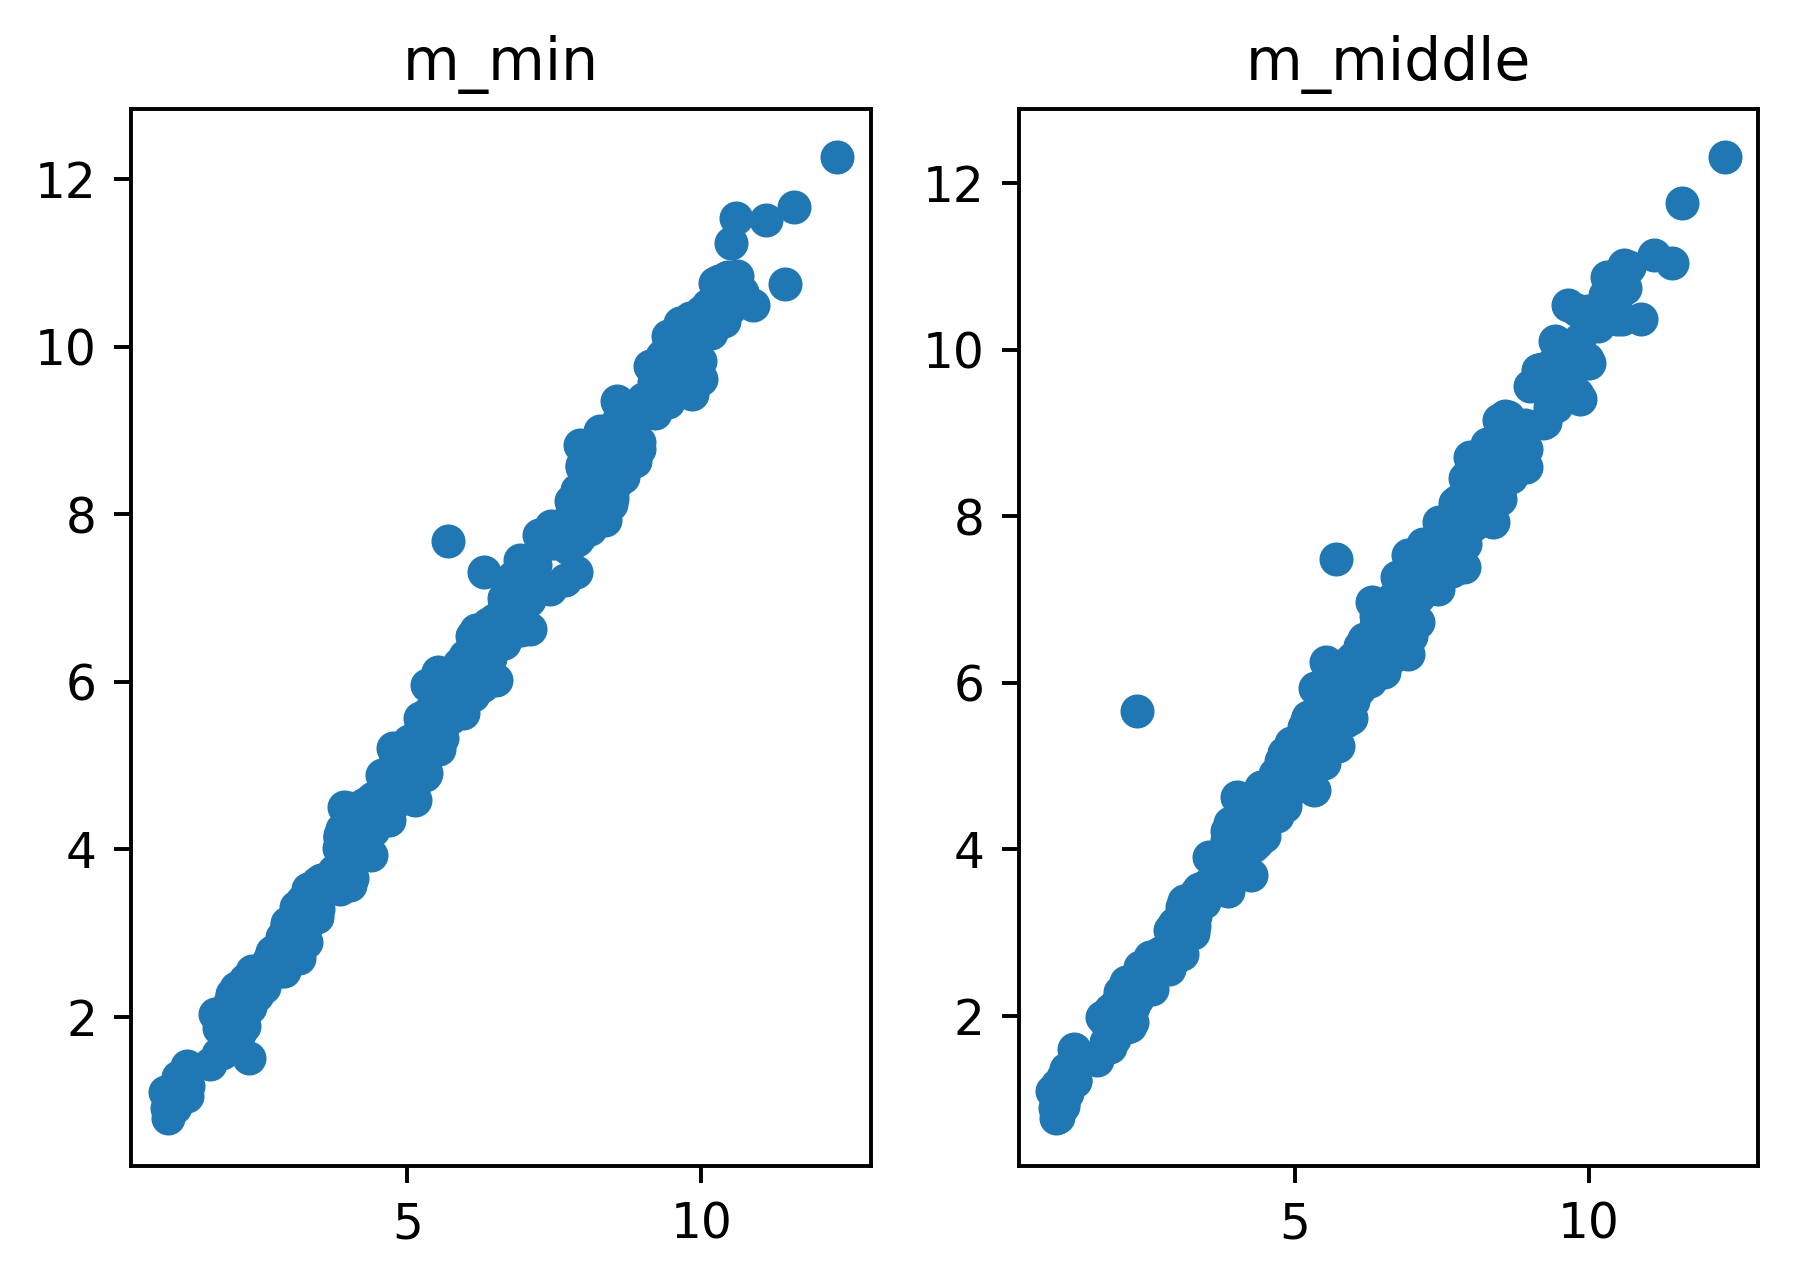

In [28]:
plt.rcParams['figure.dpi'] = 350
fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, l_middle)
axs[0].set_title('l middle')
axs[1].scatter(l_all, m_min)
axs[1].set_title('m_min')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, m_middle)
axs[0].set_title('m_middle')
axs[1].scatter(l_all, m_max)
axs[1].set_title('m_max')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, m_all)
axs[0].set_title('m_min')
axs[1].scatter(l_all, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(l_all, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(l_all, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(l_all, b6_max)
axs[1].set_title('m_middle')

#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max


Text(0.5, 1.0, 'm_middle')

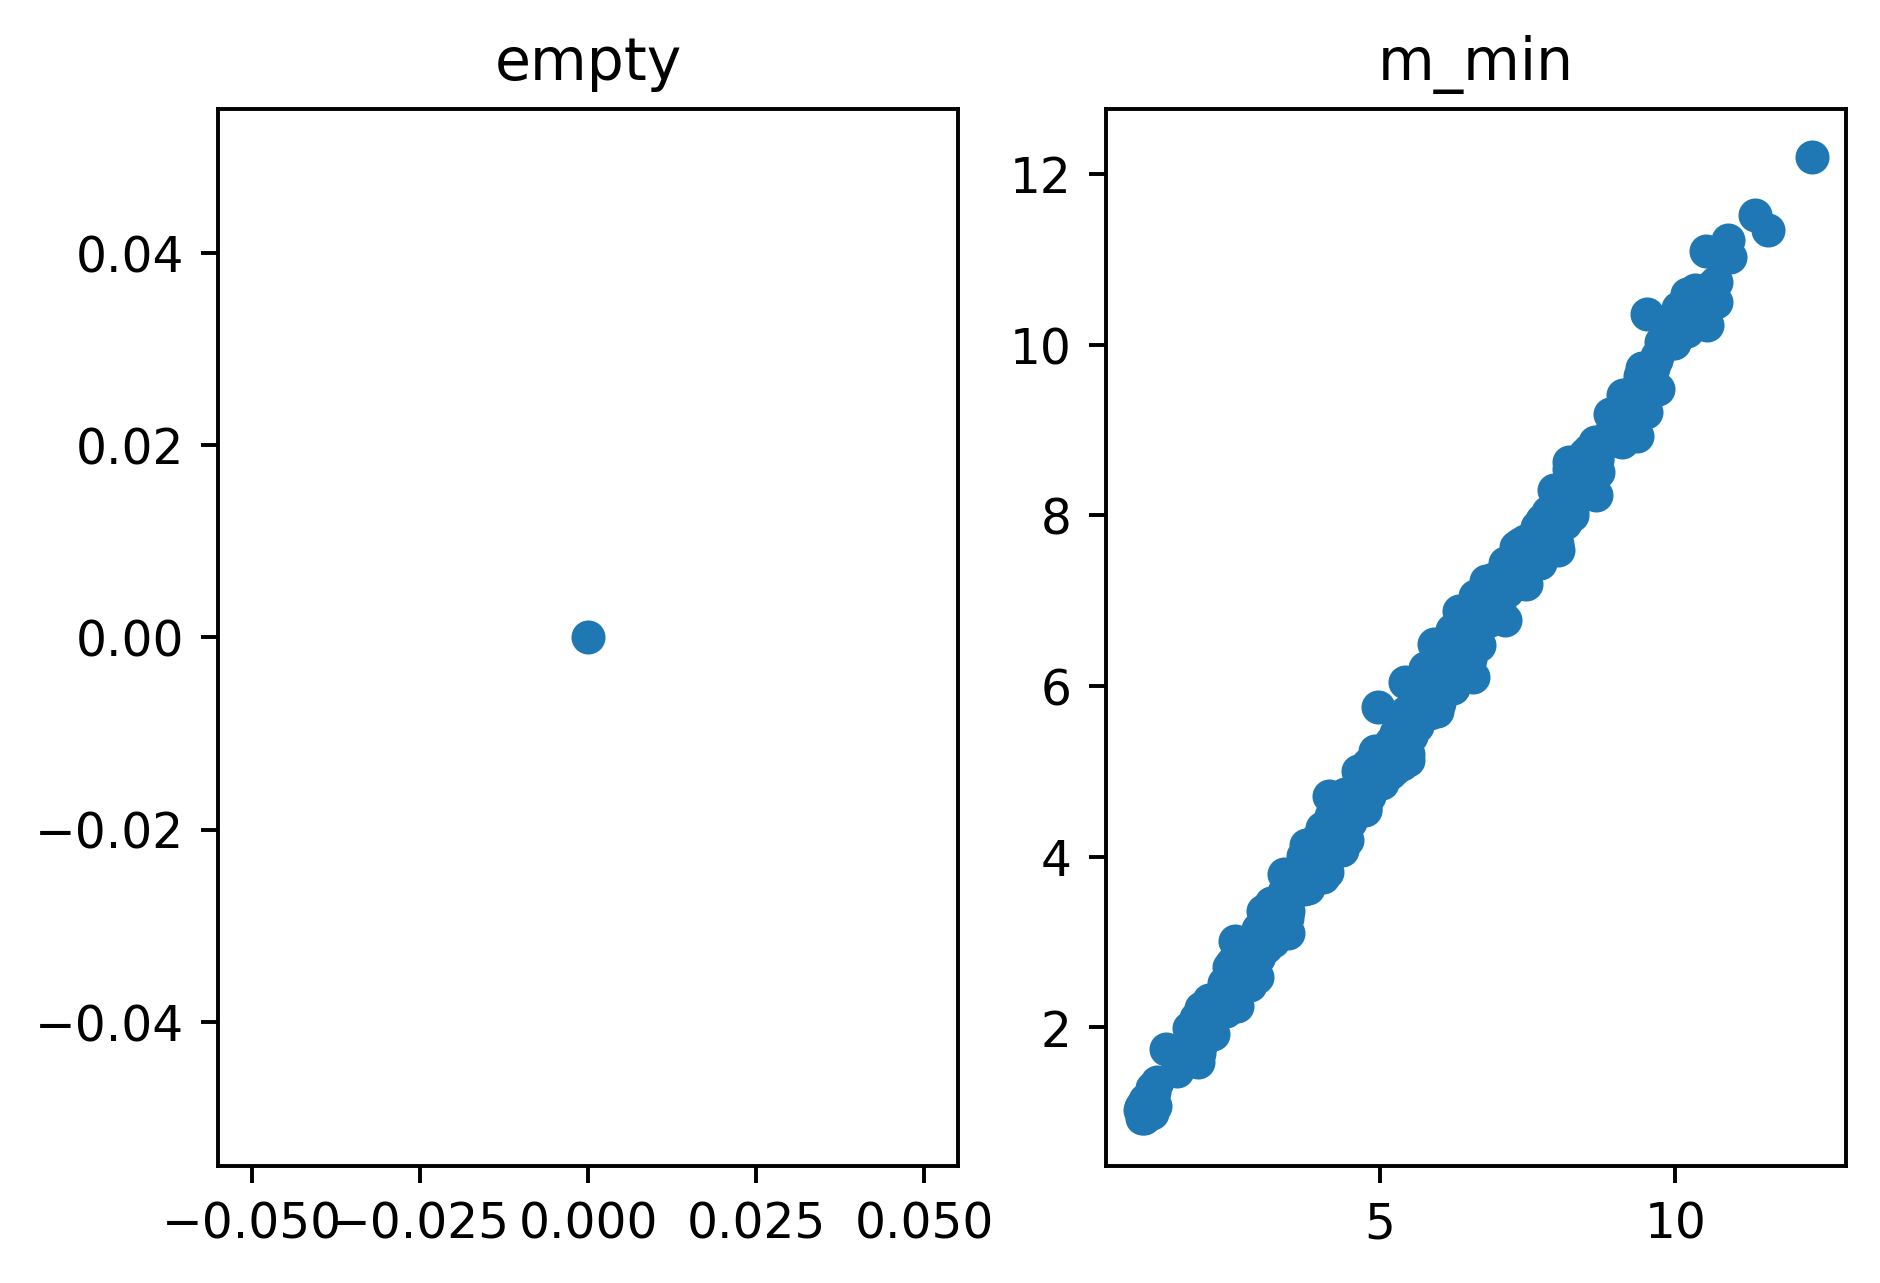

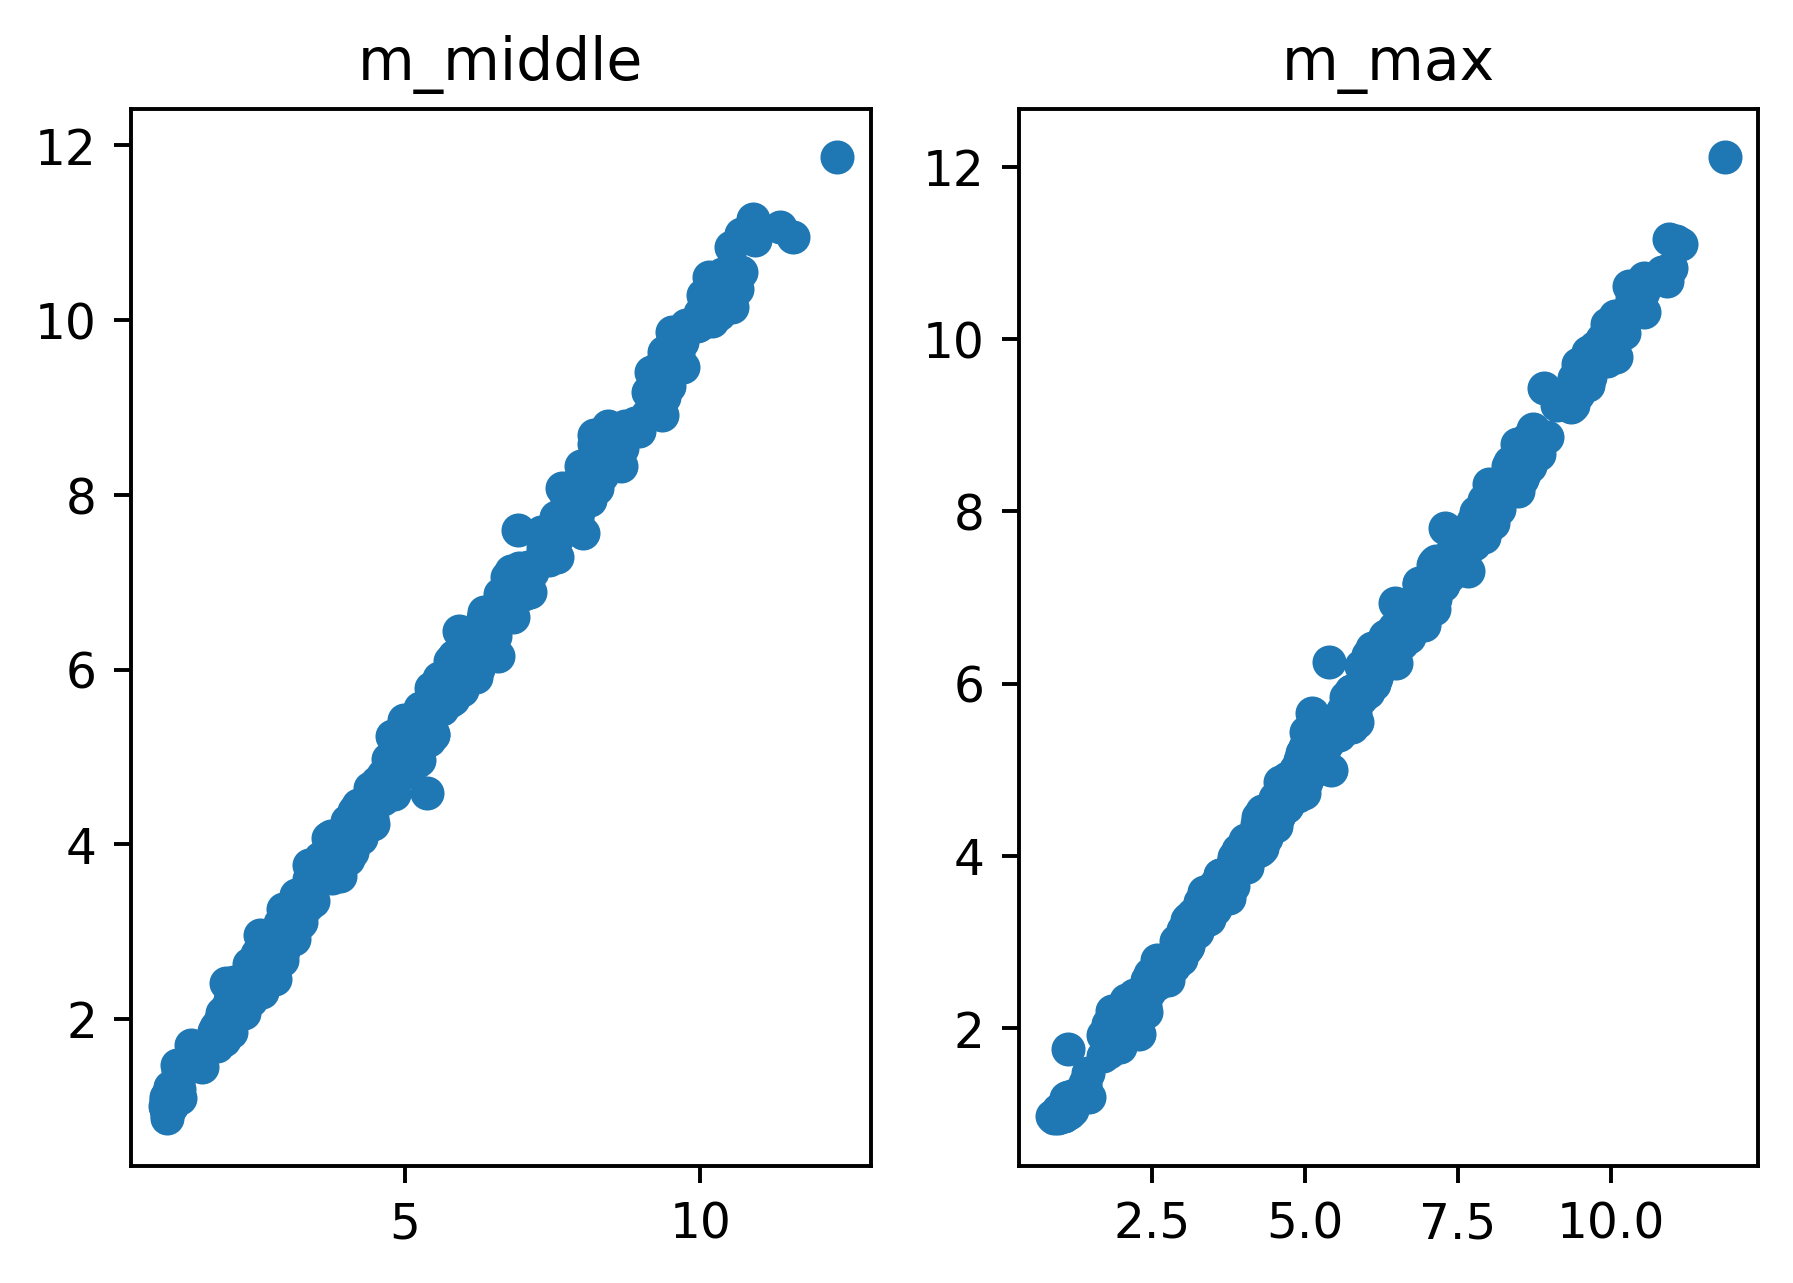

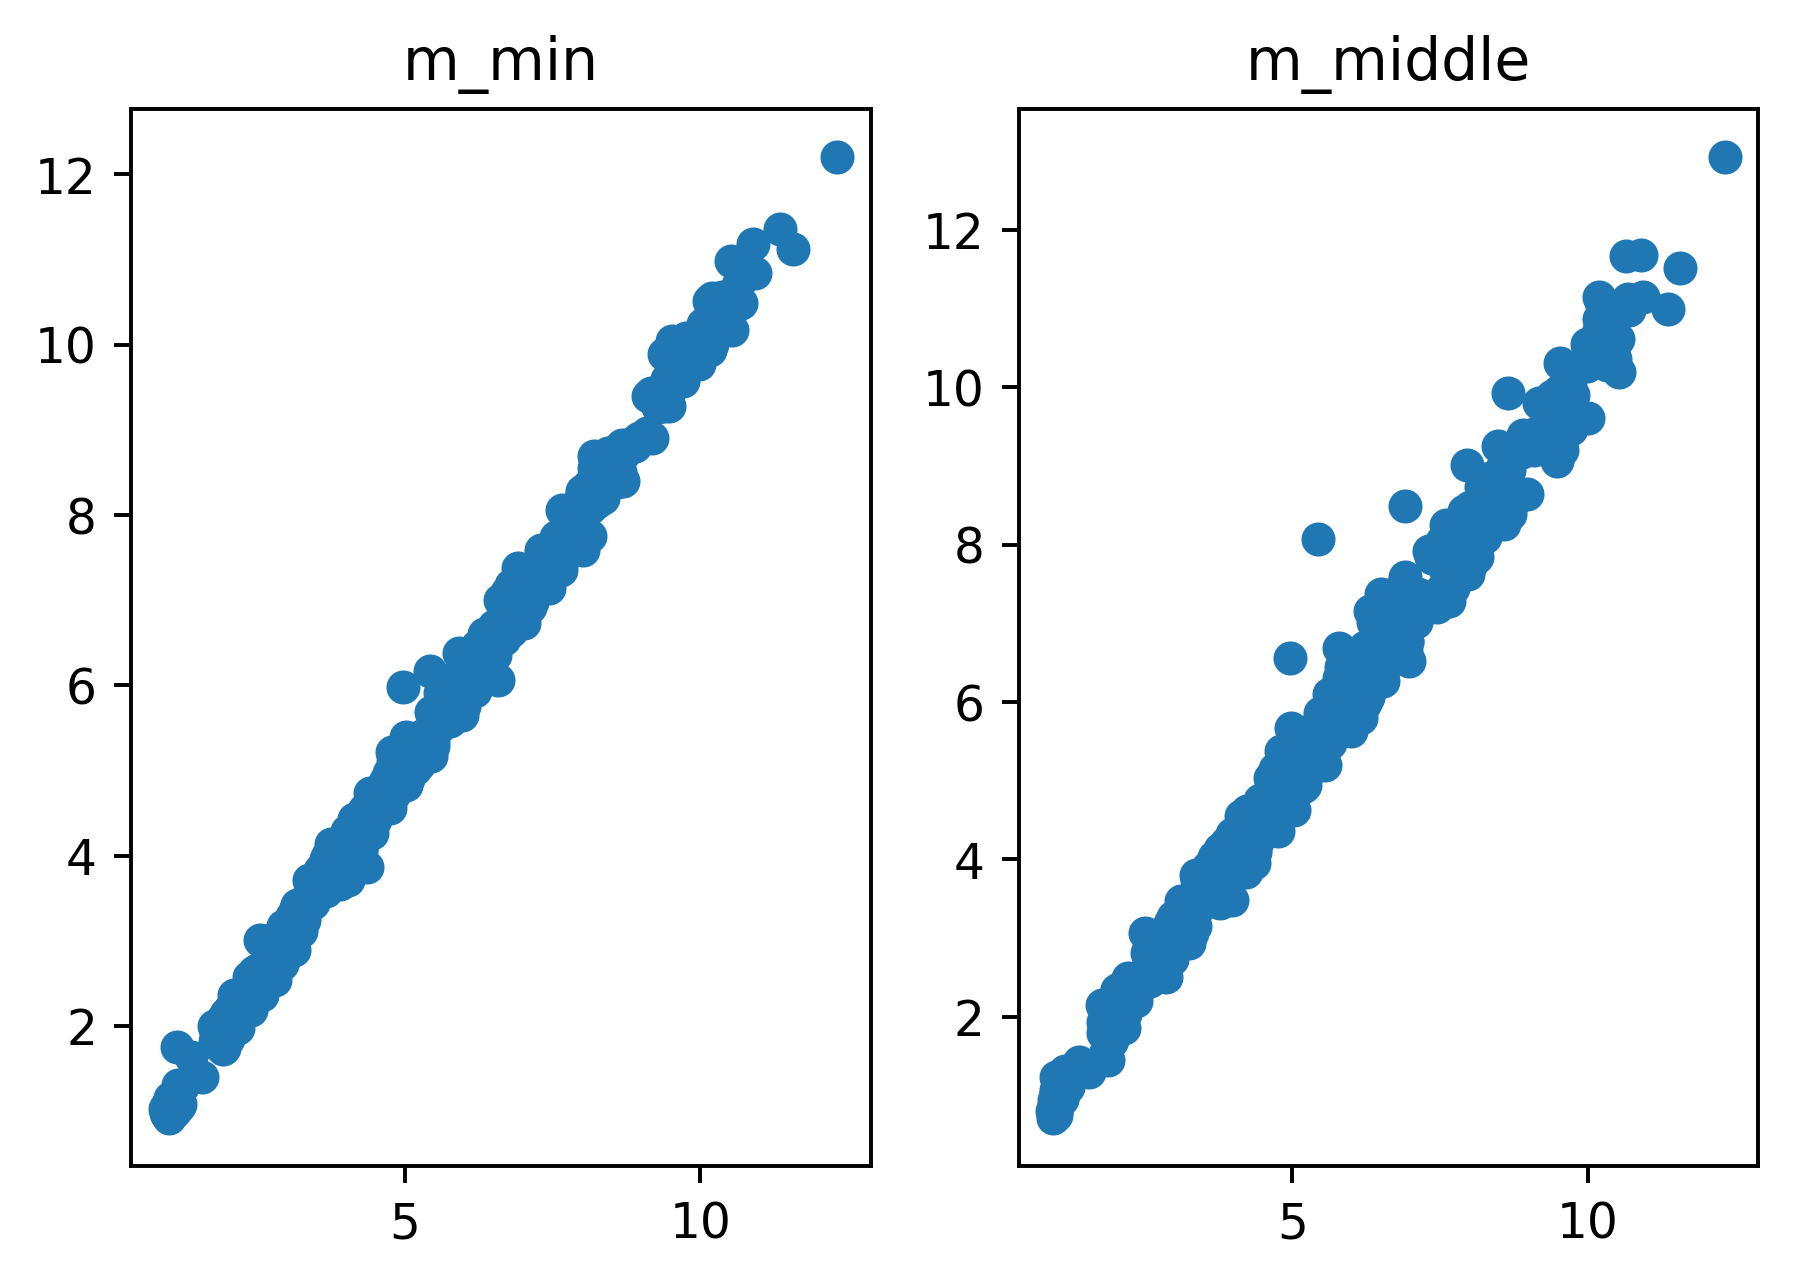

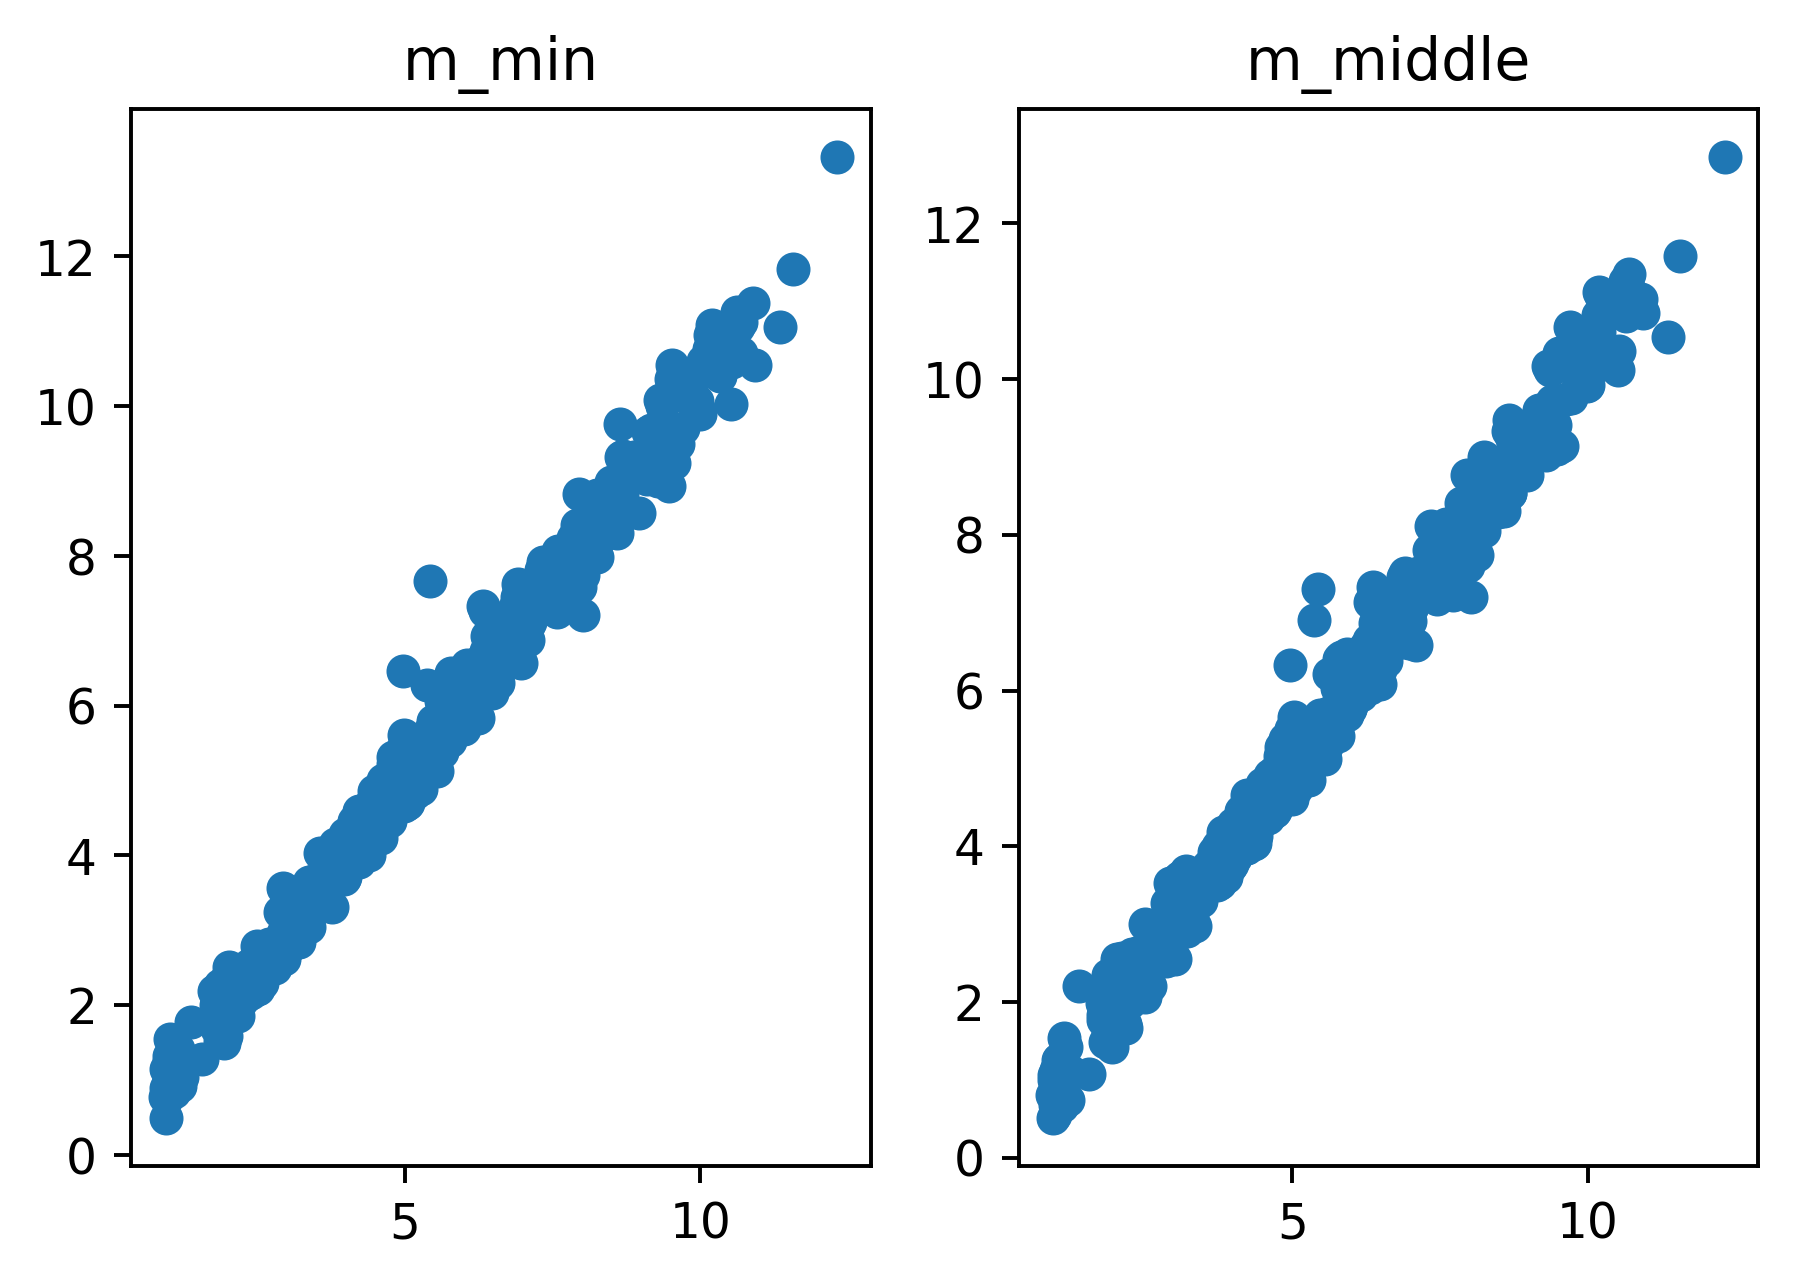

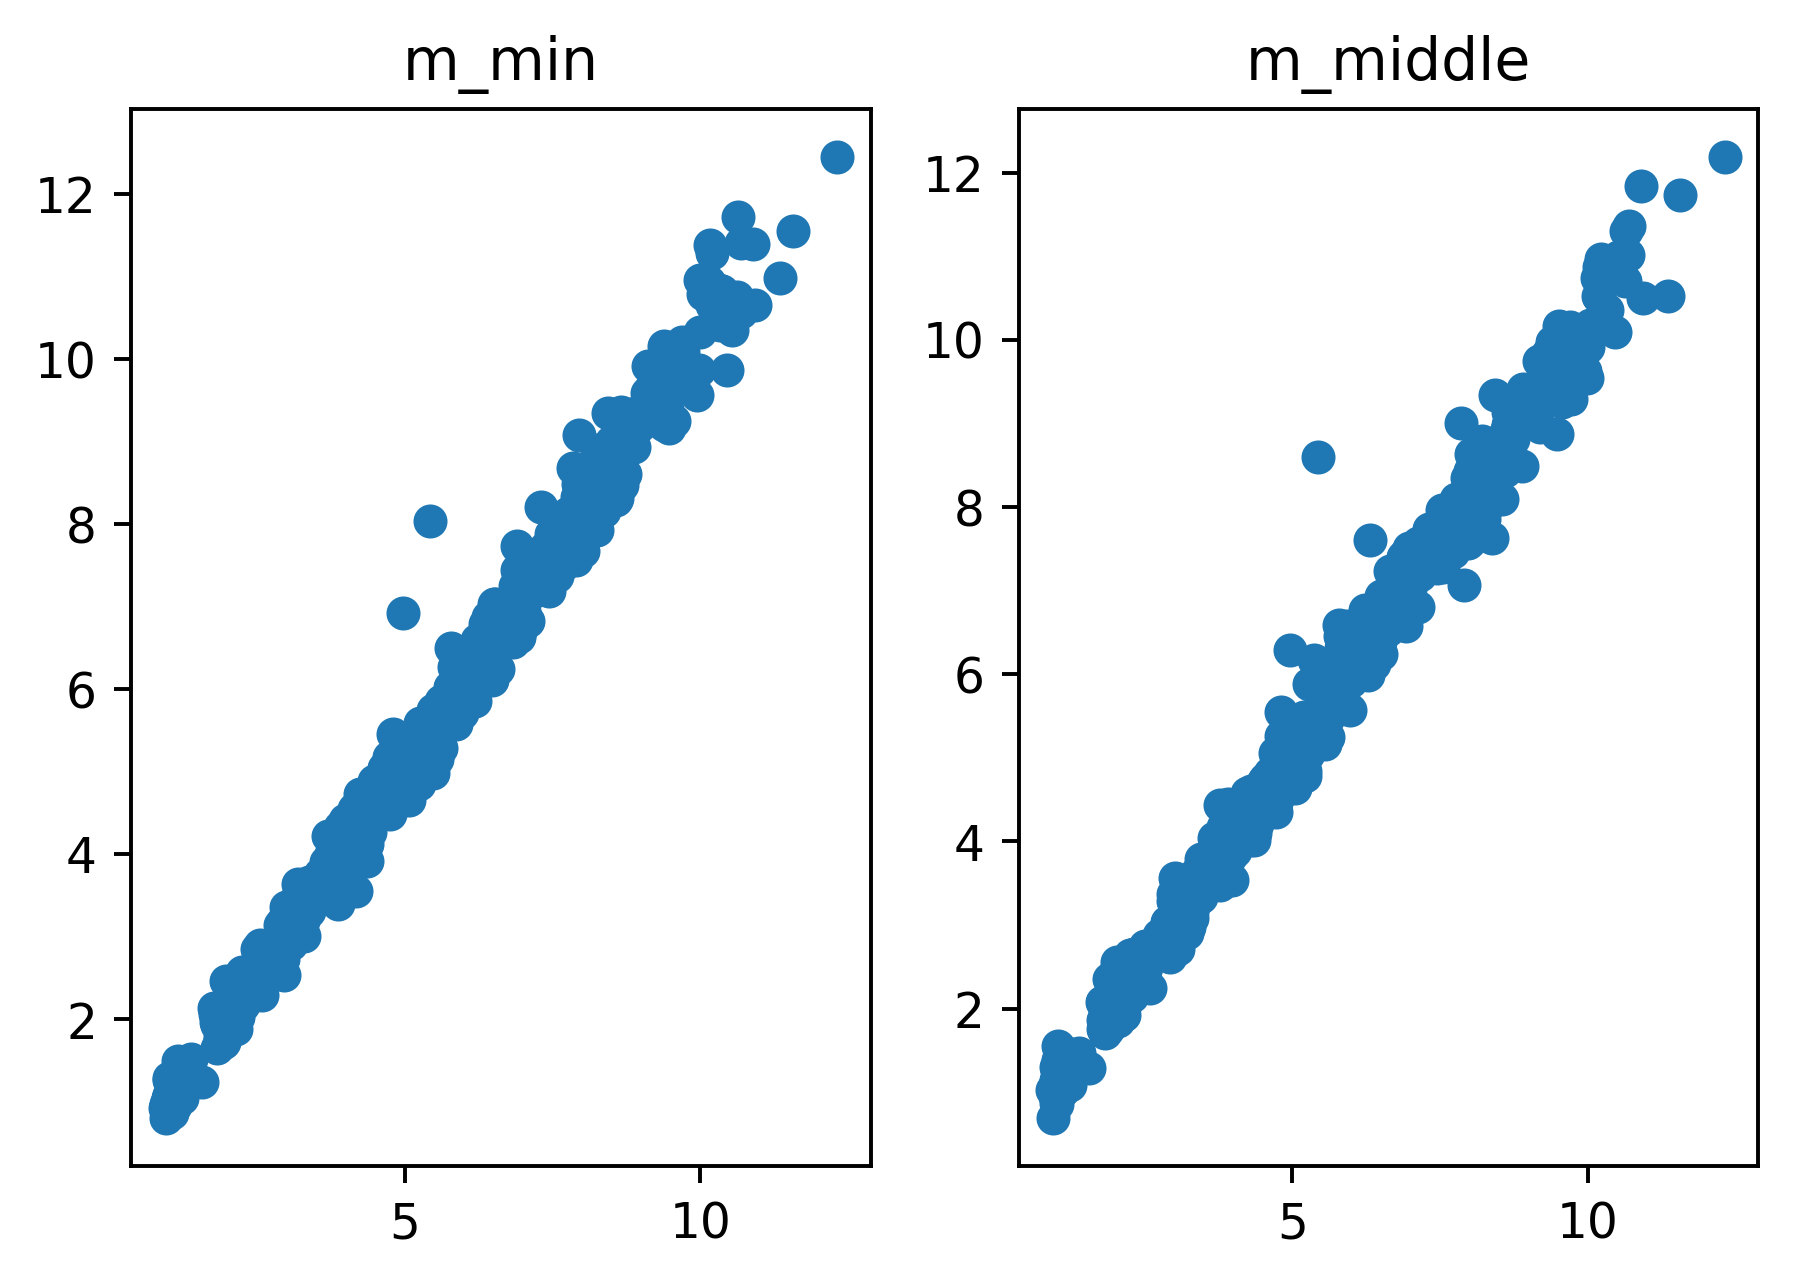

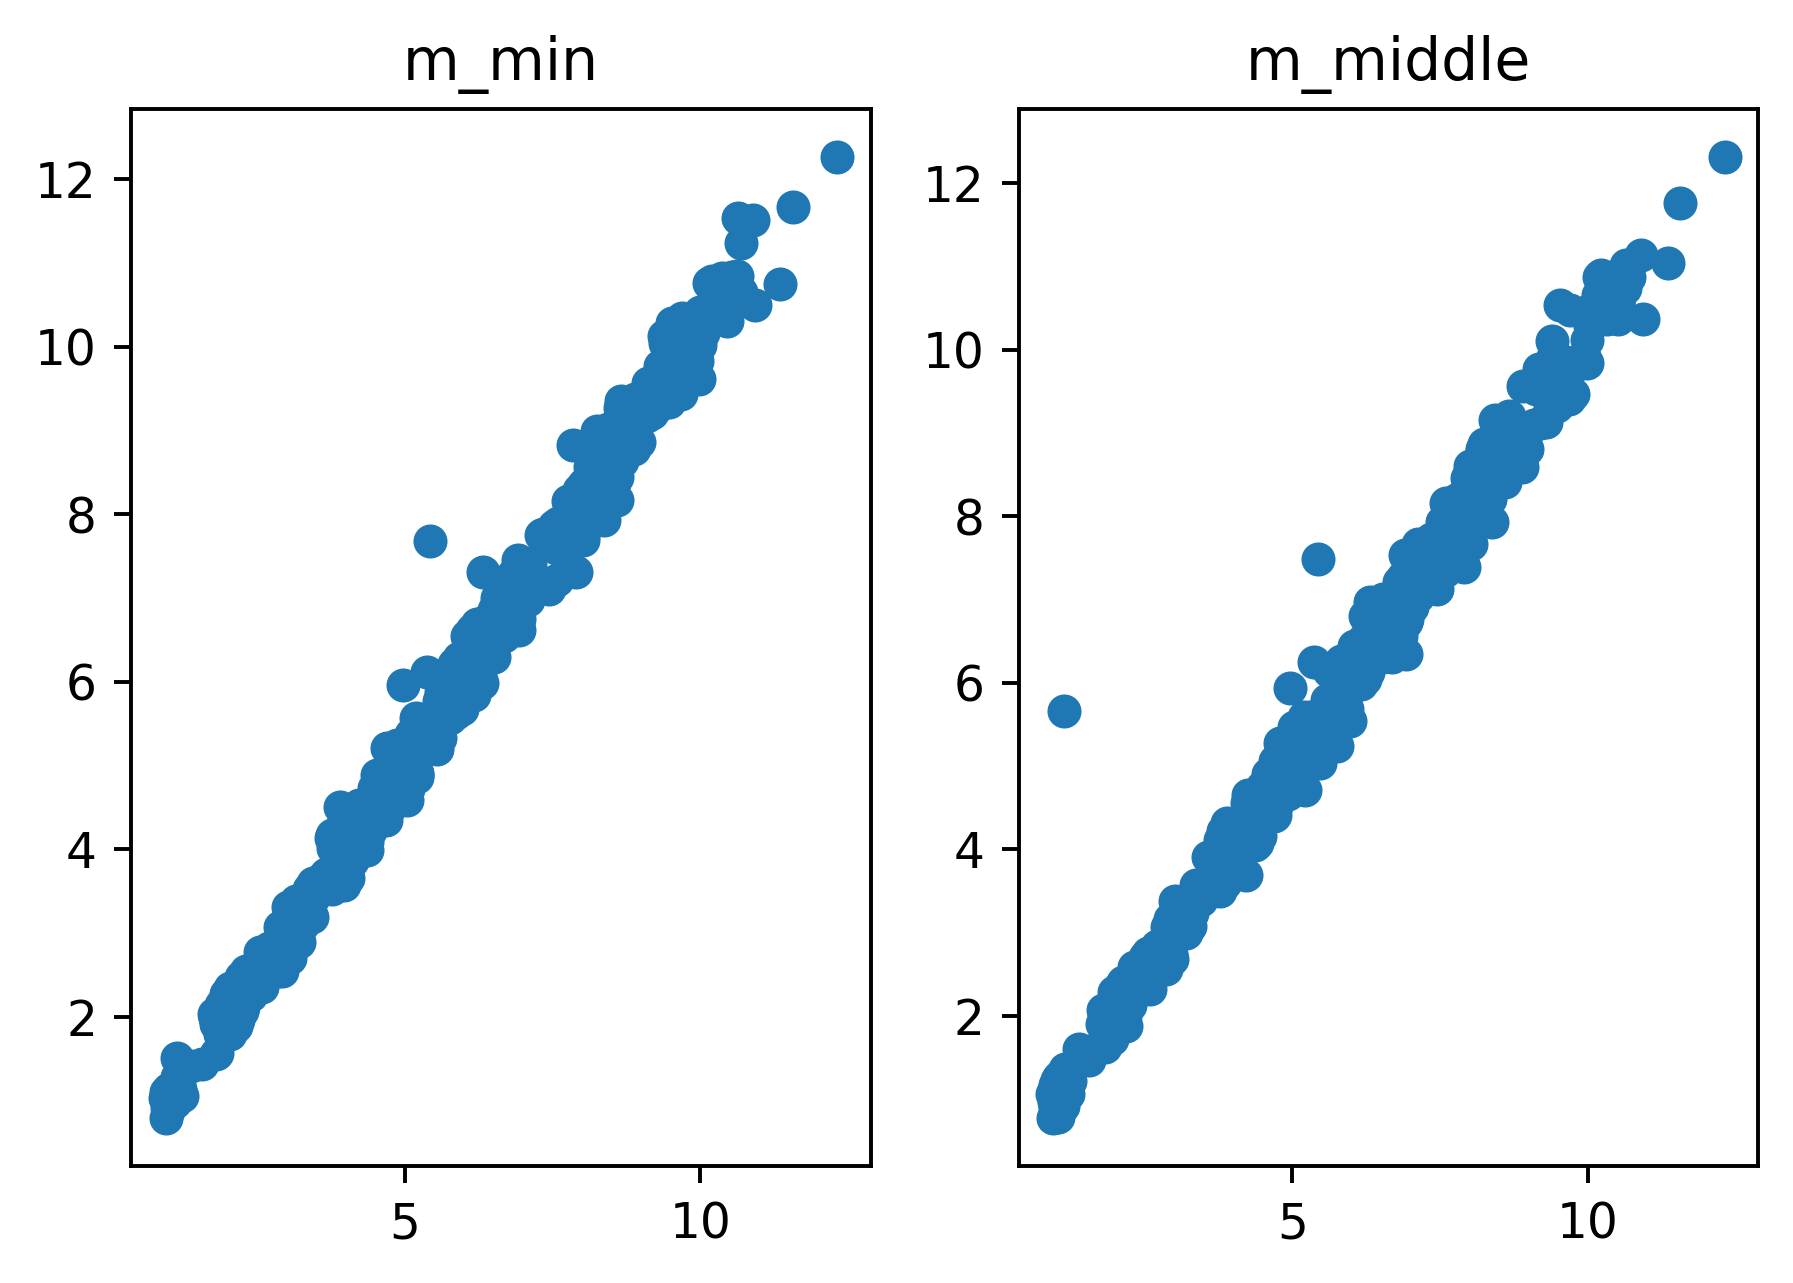

In [31]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0,0)
axs[0].set_title('empty')
axs[1].scatter(l_middle, m_min)
axs[1].set_title('m_min')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, m_middle)
axs[0].set_title('m_middle')
axs[1].scatter(m_middle, m_max)
axs[1].set_title('m_max')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, m_all)
axs[0].set_title('m_min')
axs[1].scatter(l_middle, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(l_middle, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(l_middle, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(l_middle, b6_max)
axs[1].set_title('m_middle')

#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max

Text(0.5, 1.0, 'm_middle')

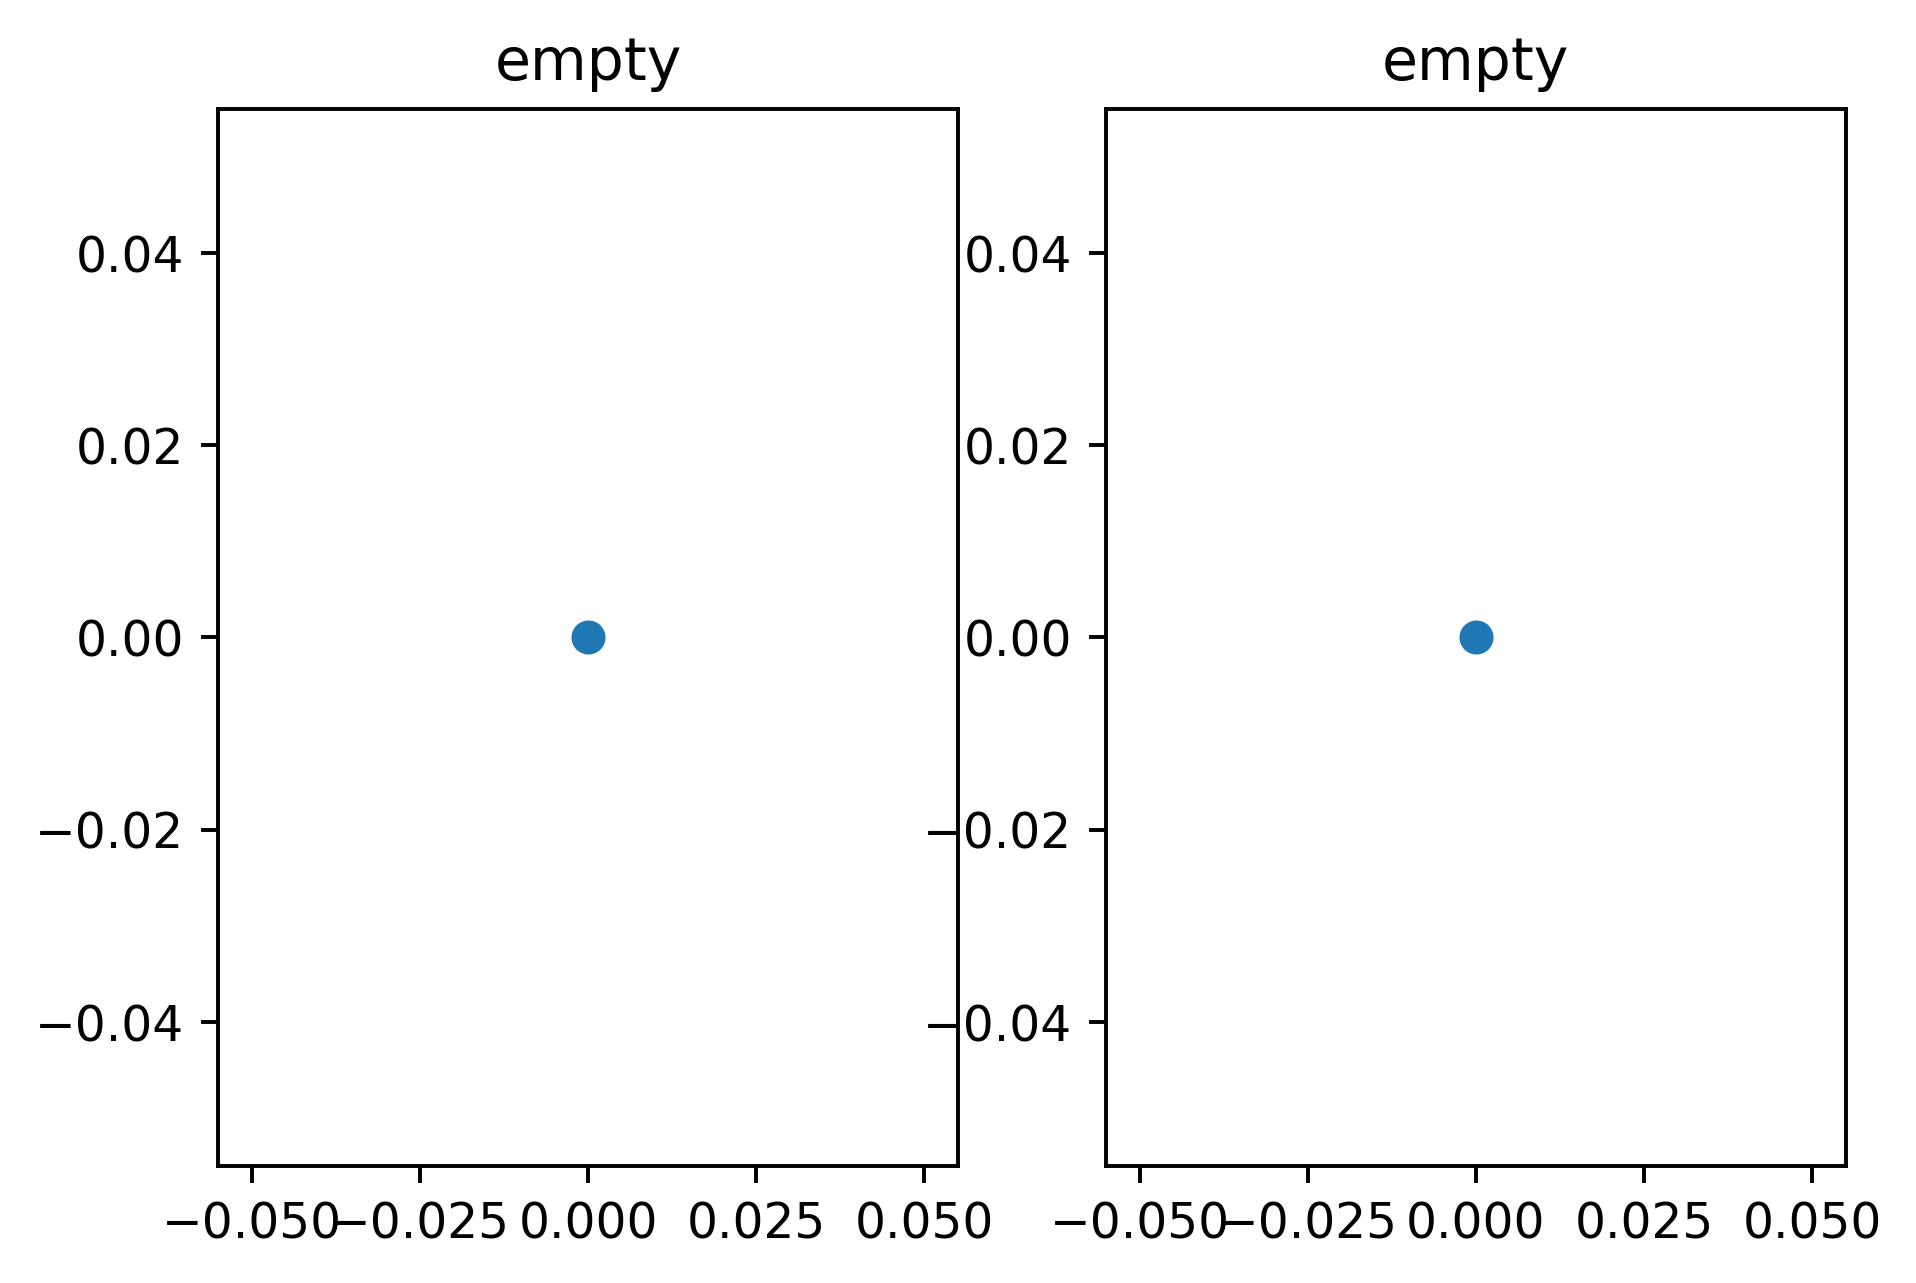

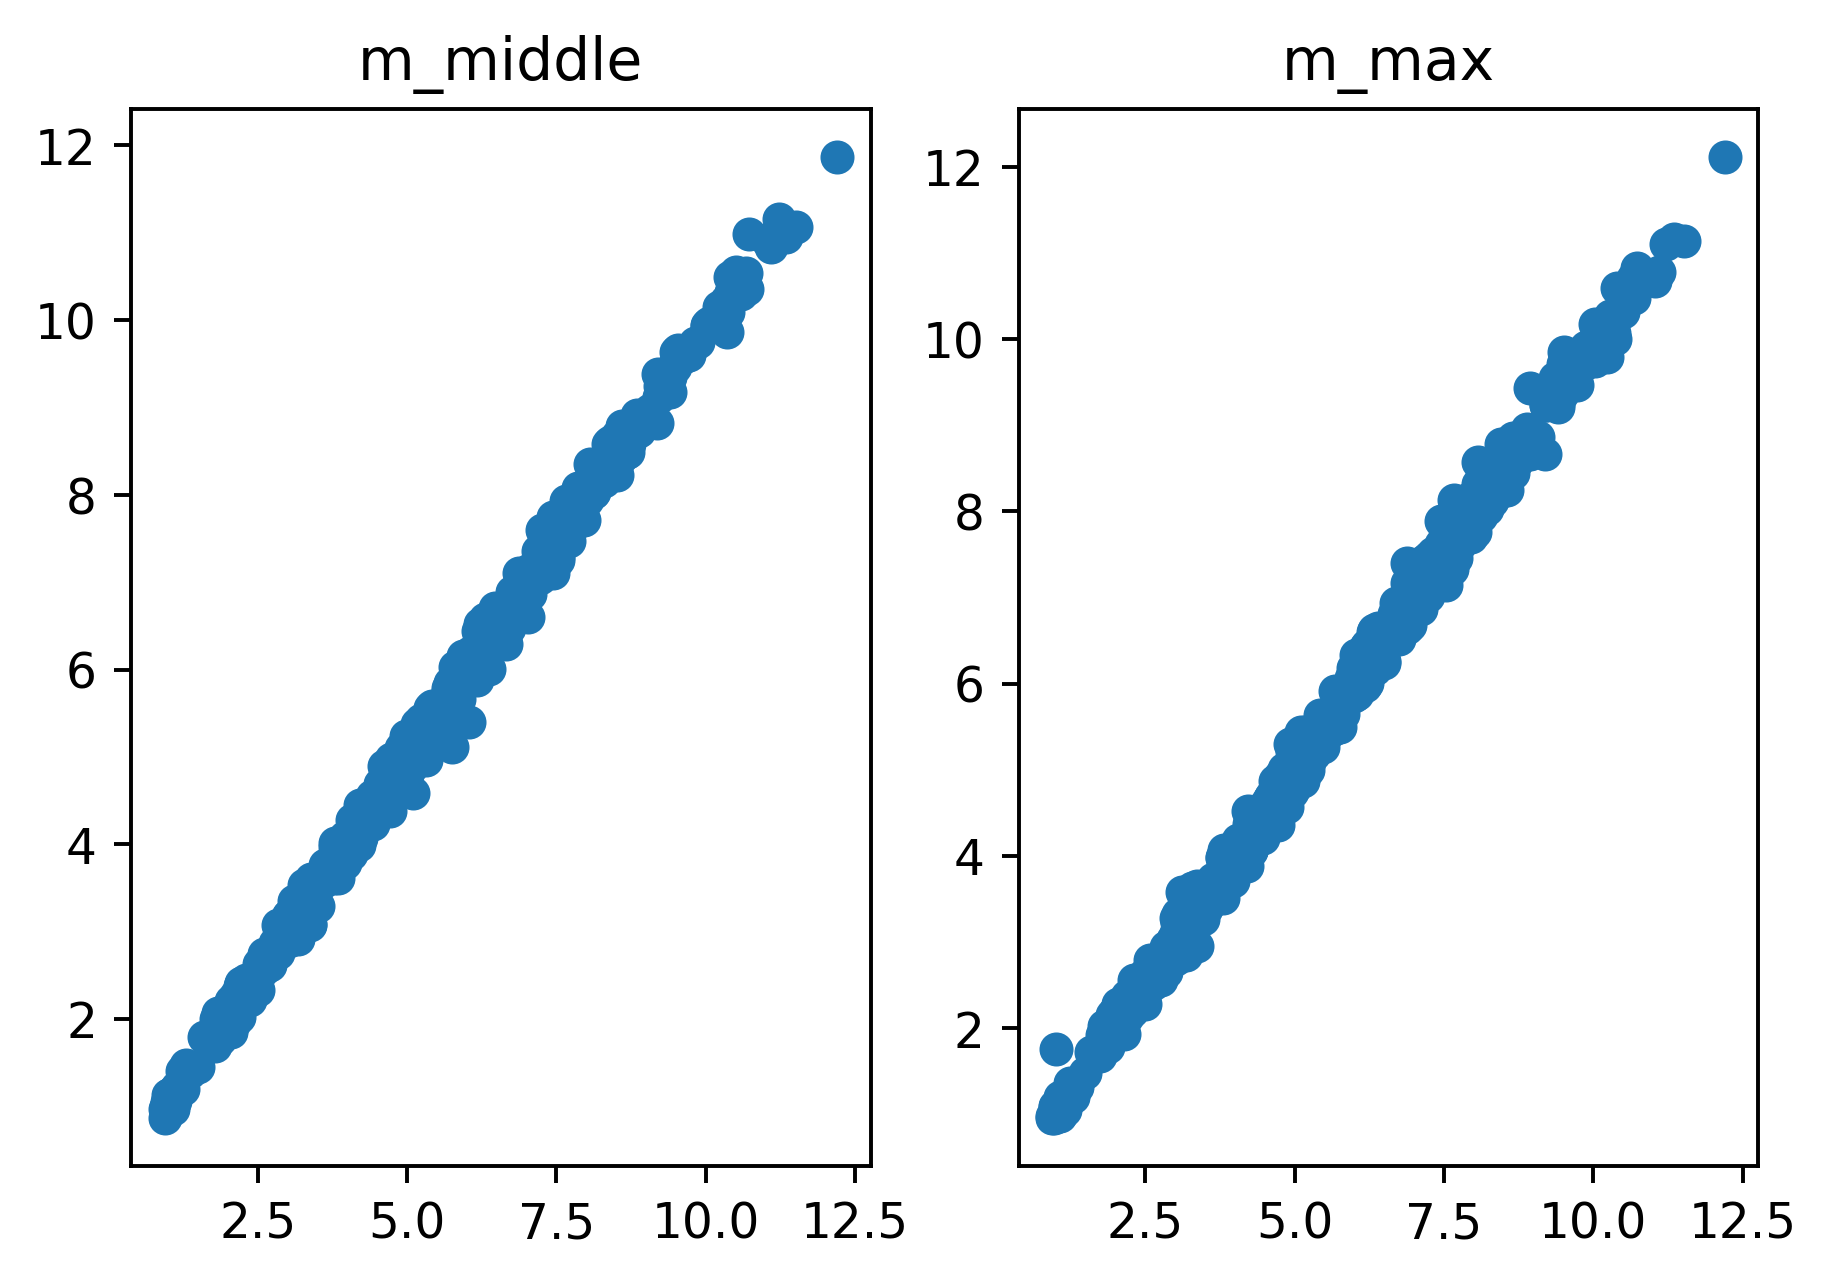

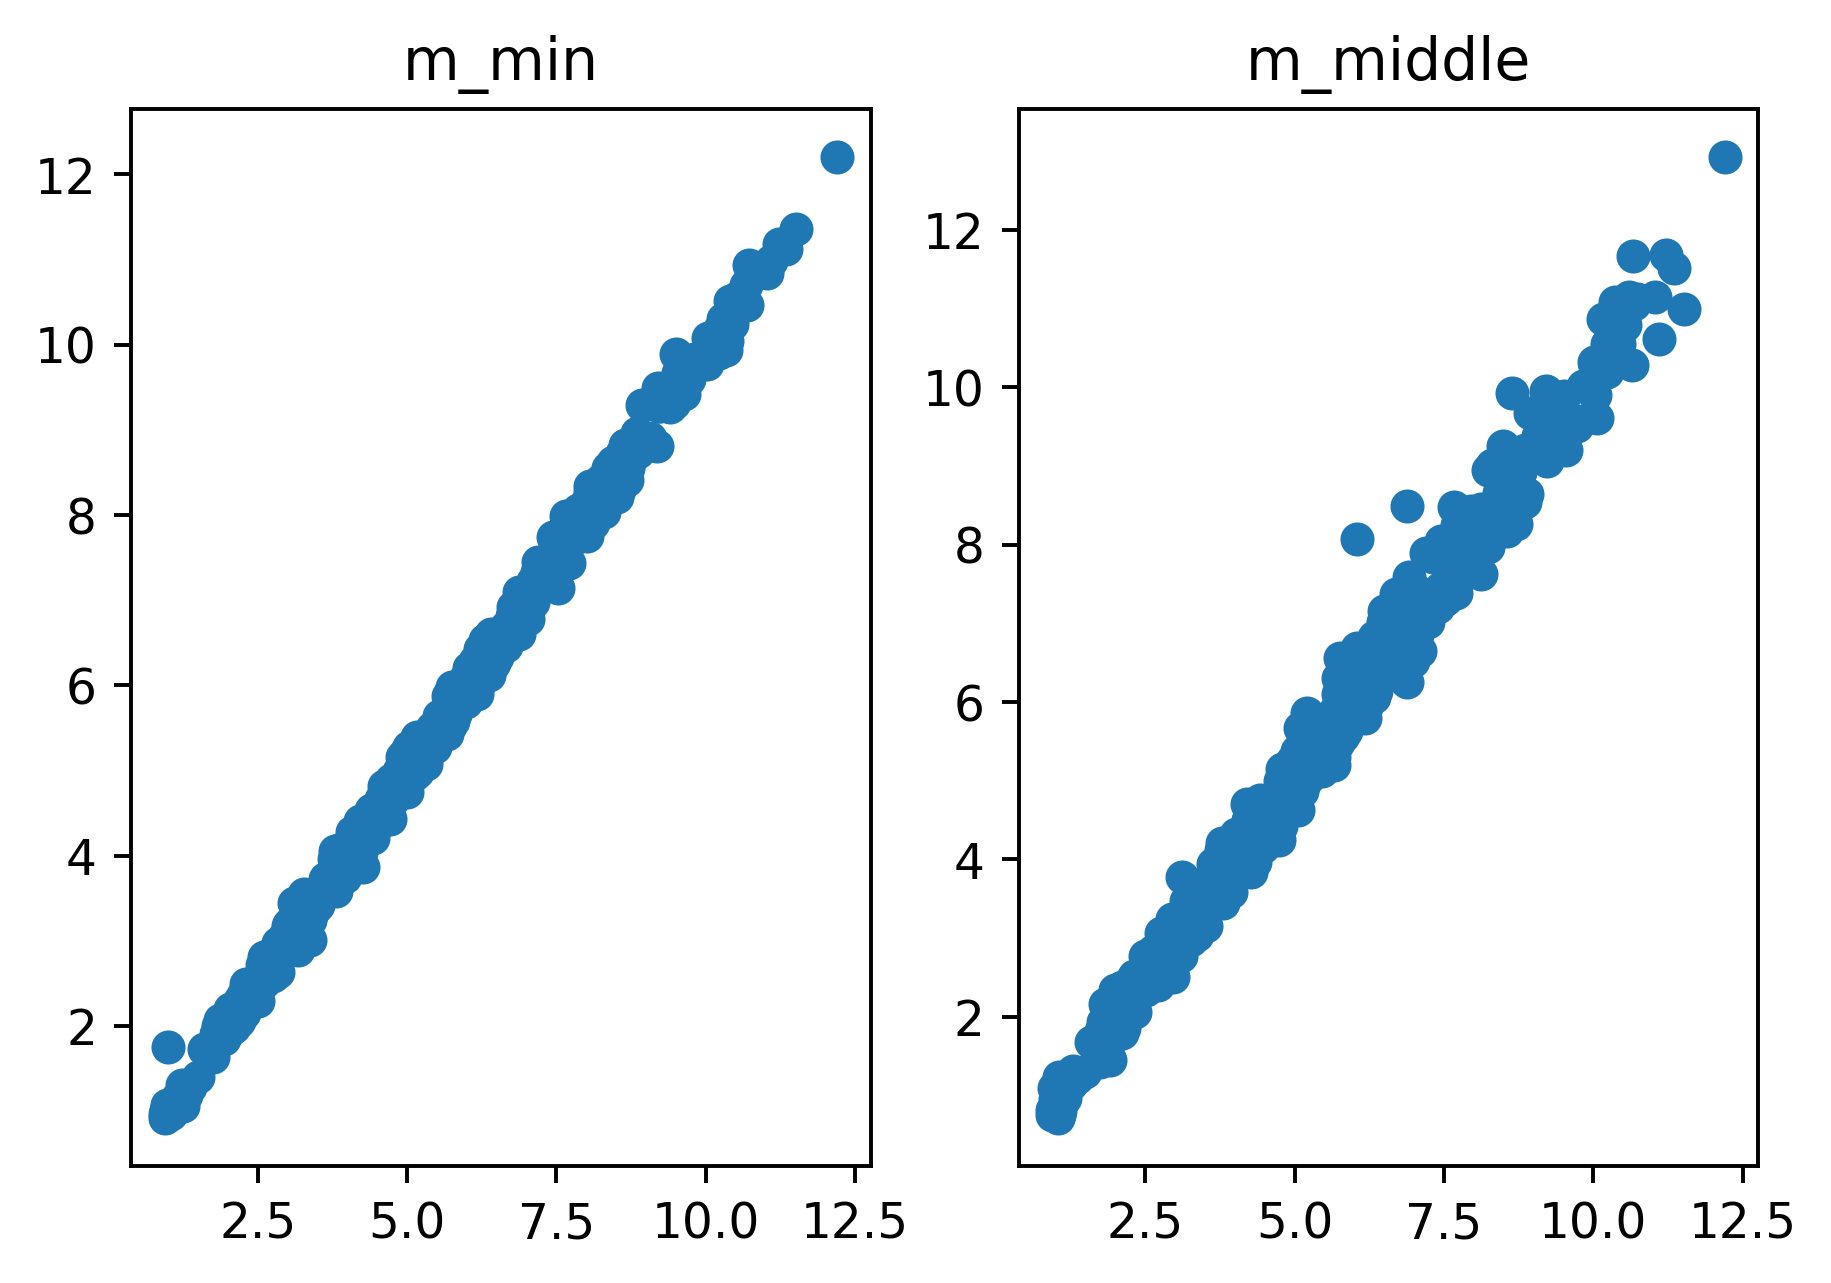

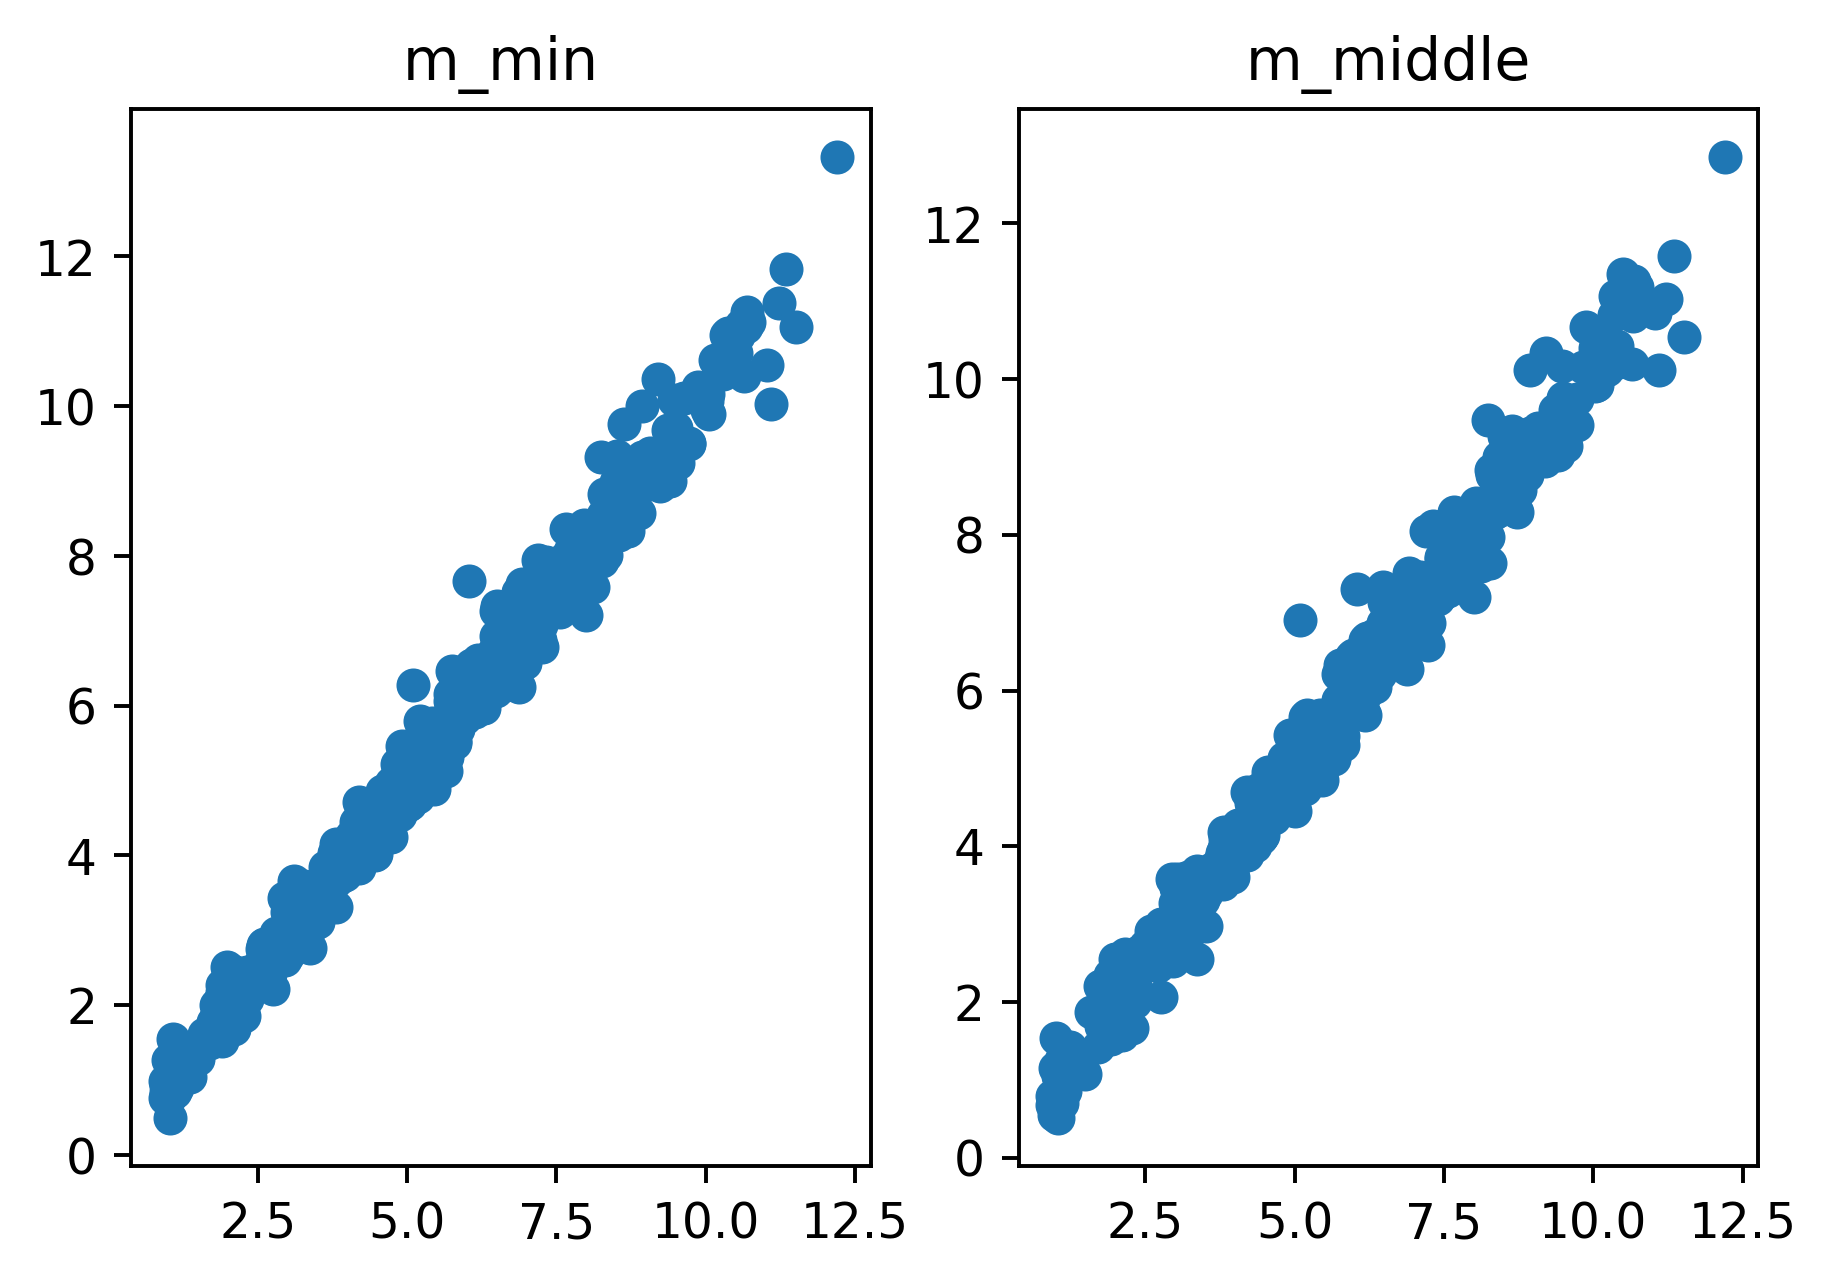

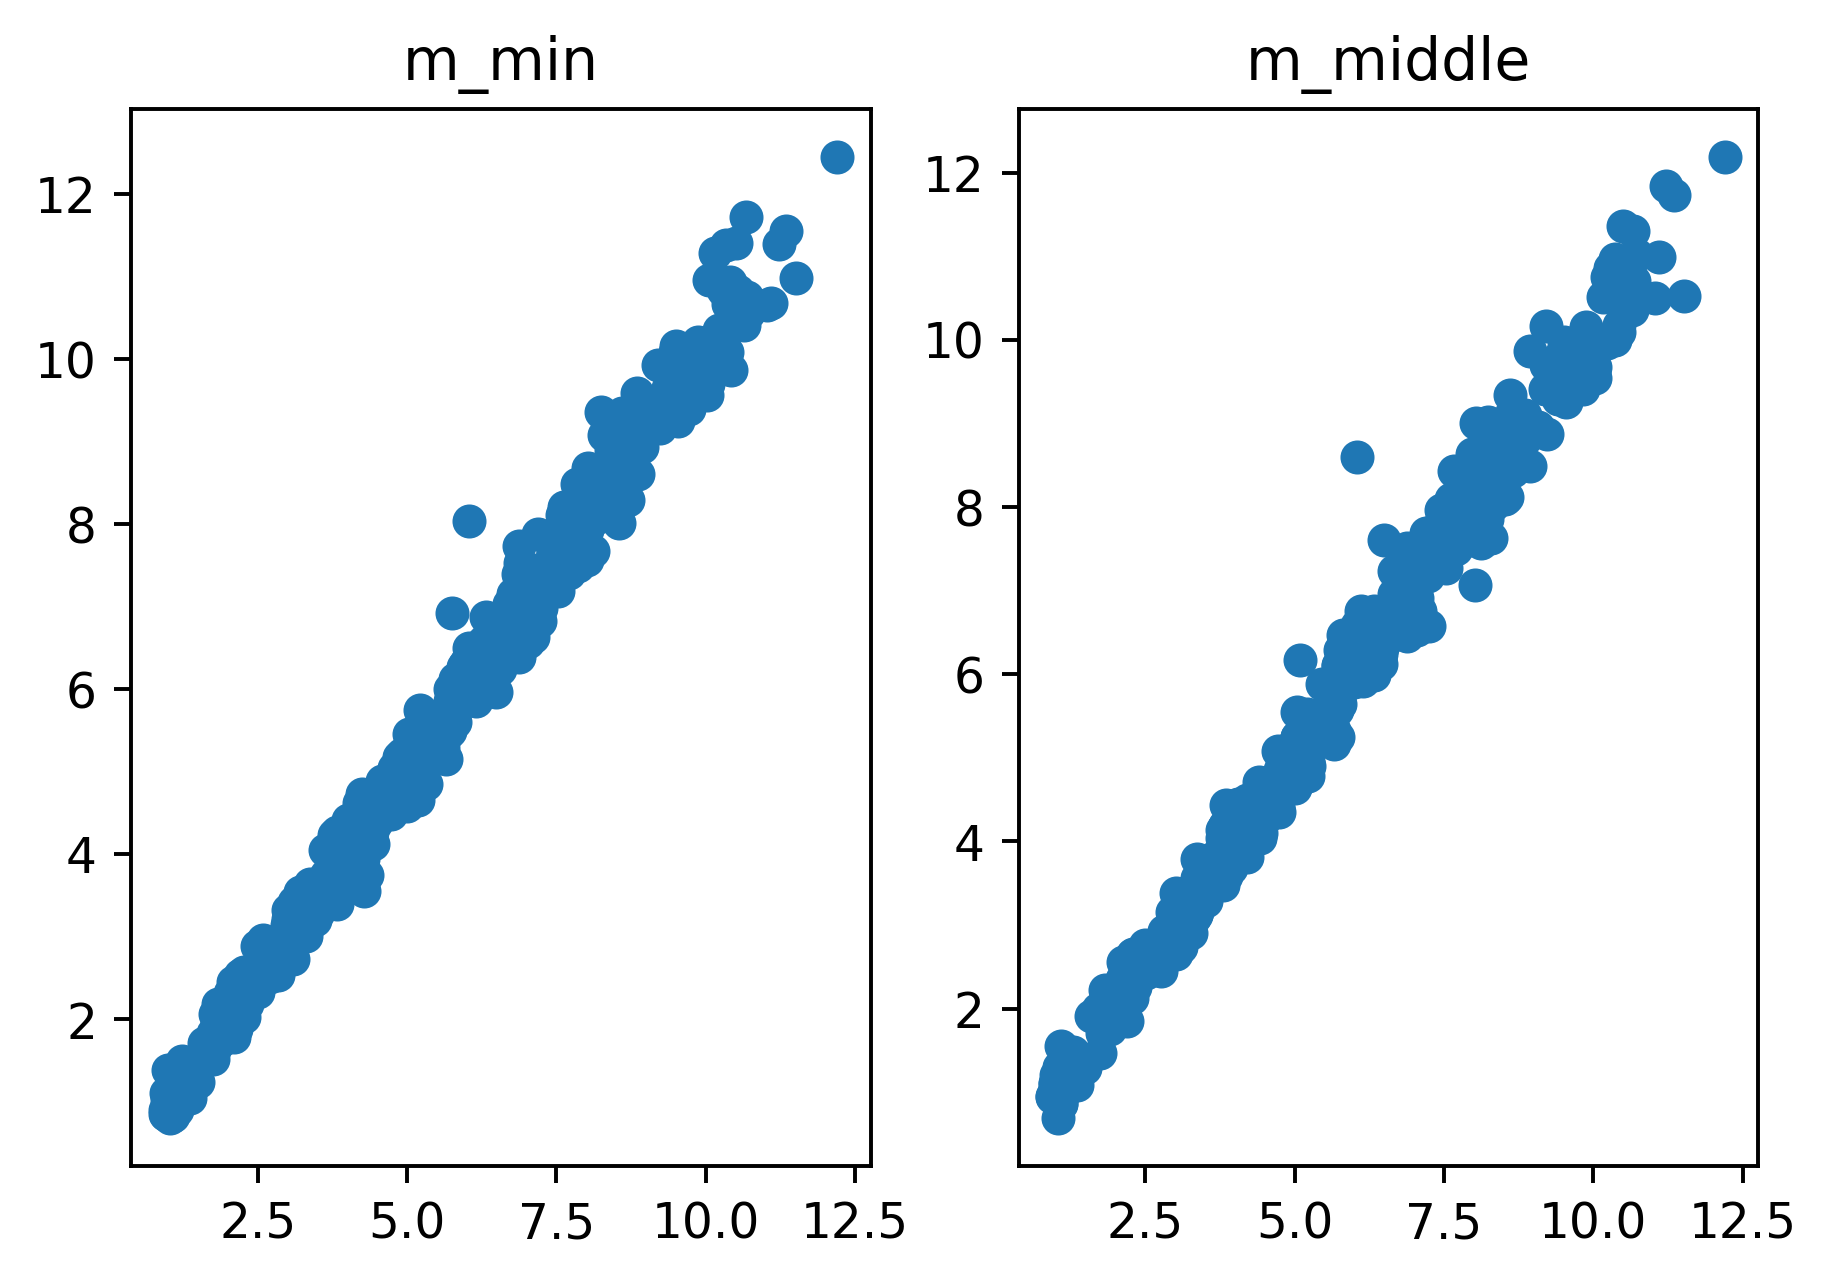

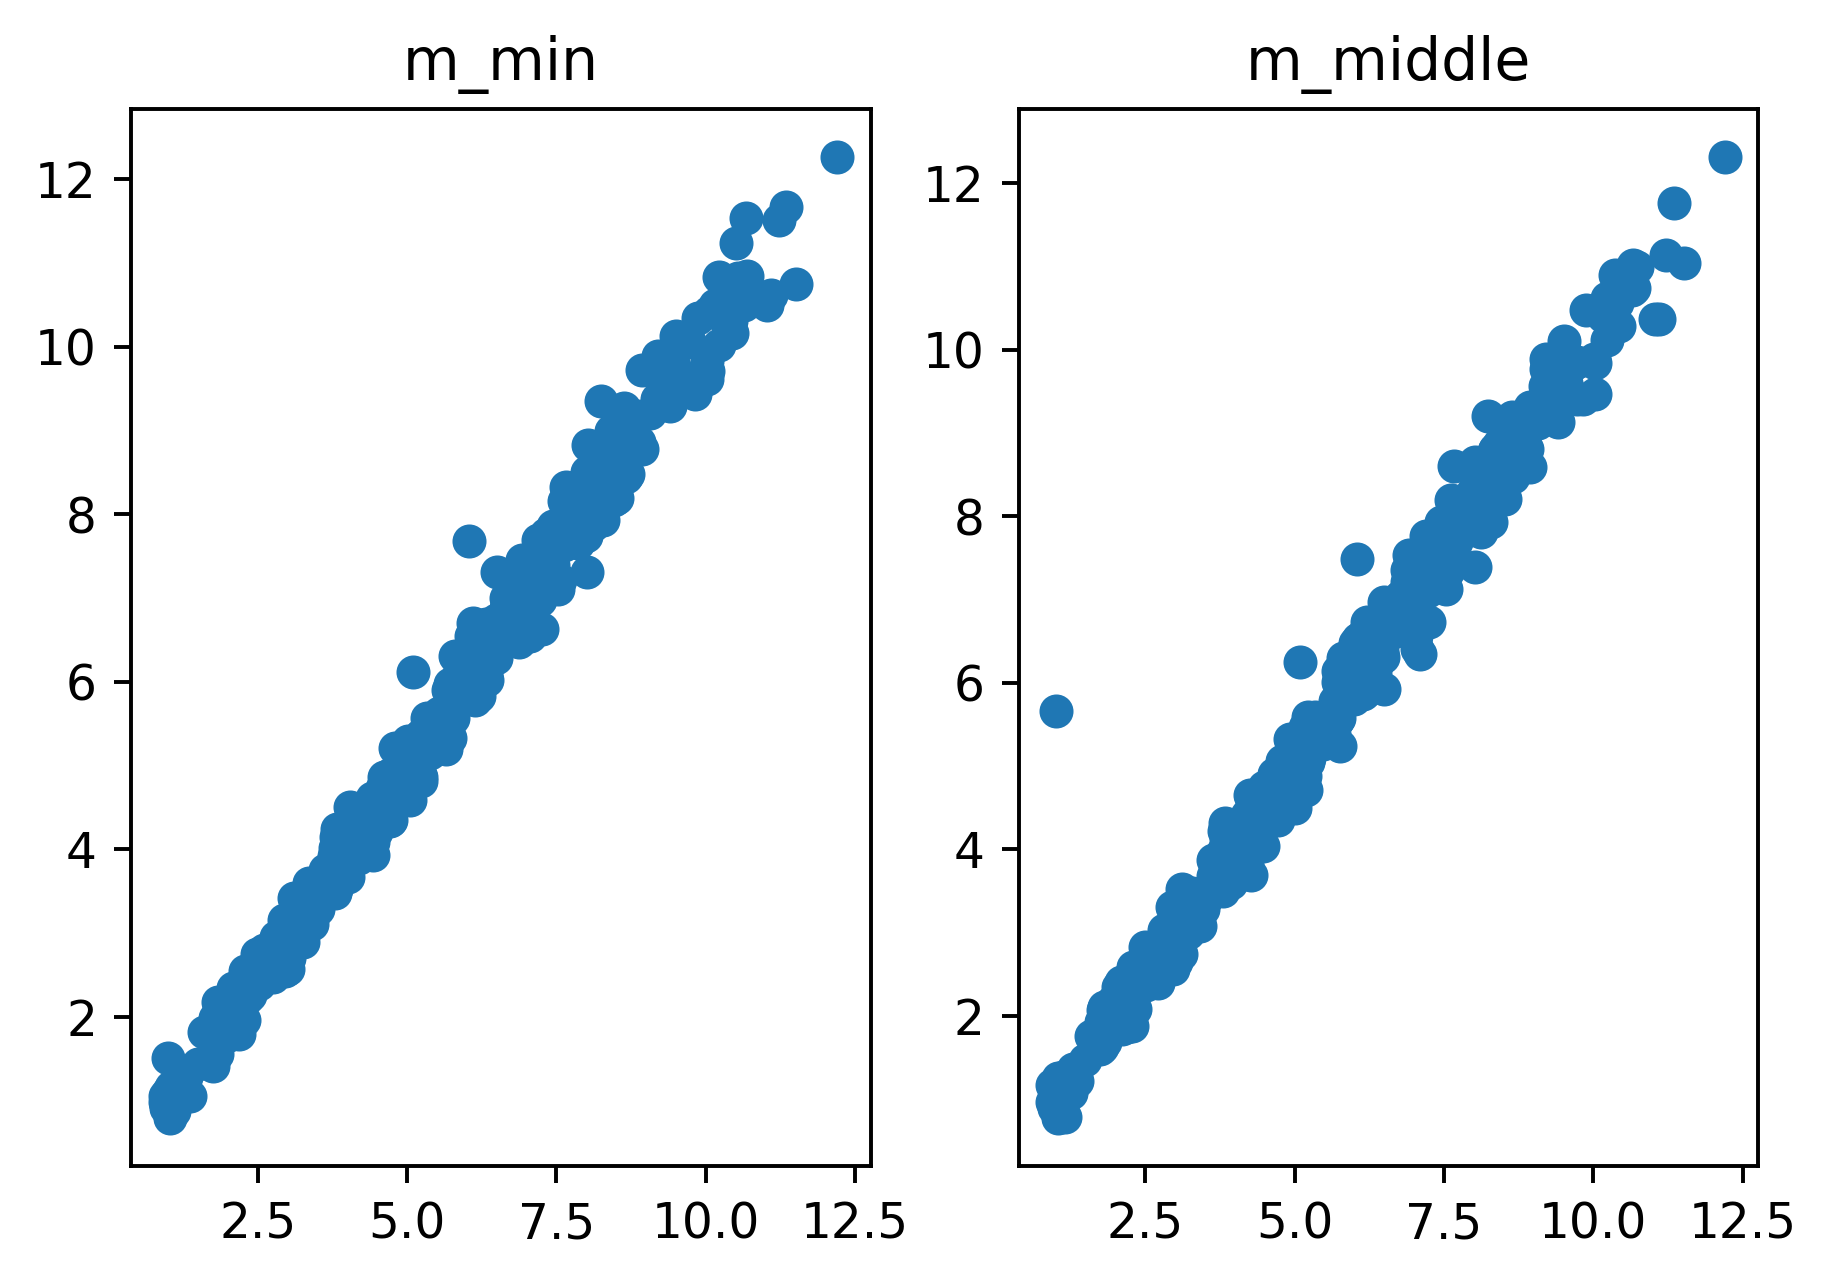

In [32]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, m_middle)
axs[0].set_title('m_middle')
axs[1].scatter(m_min, m_max)
axs[1].set_title('m_max')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, m_all)
axs[0].set_title('m_min')
axs[1].scatter(m_min, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_min, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(m_min, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_min, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

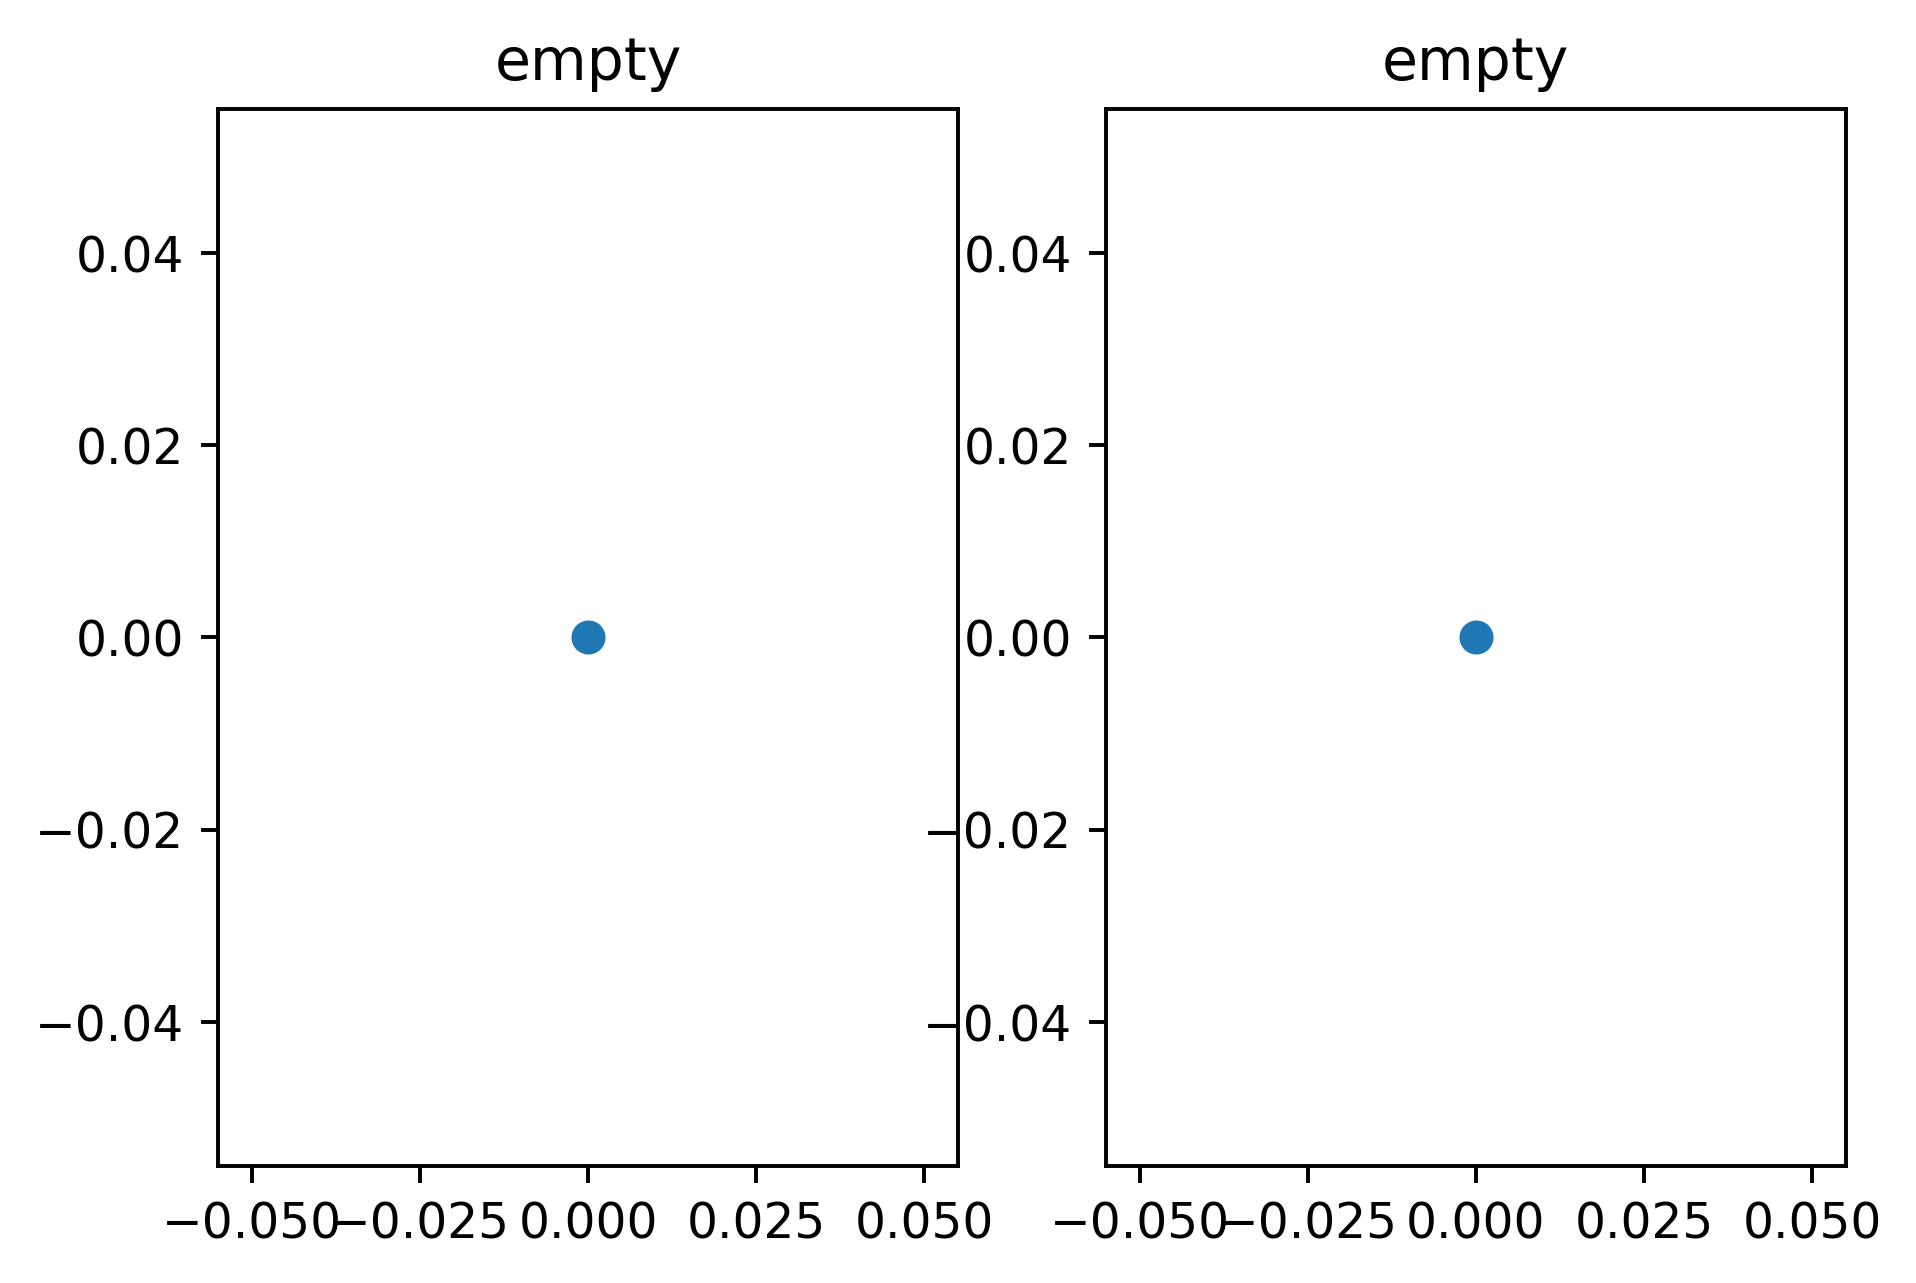

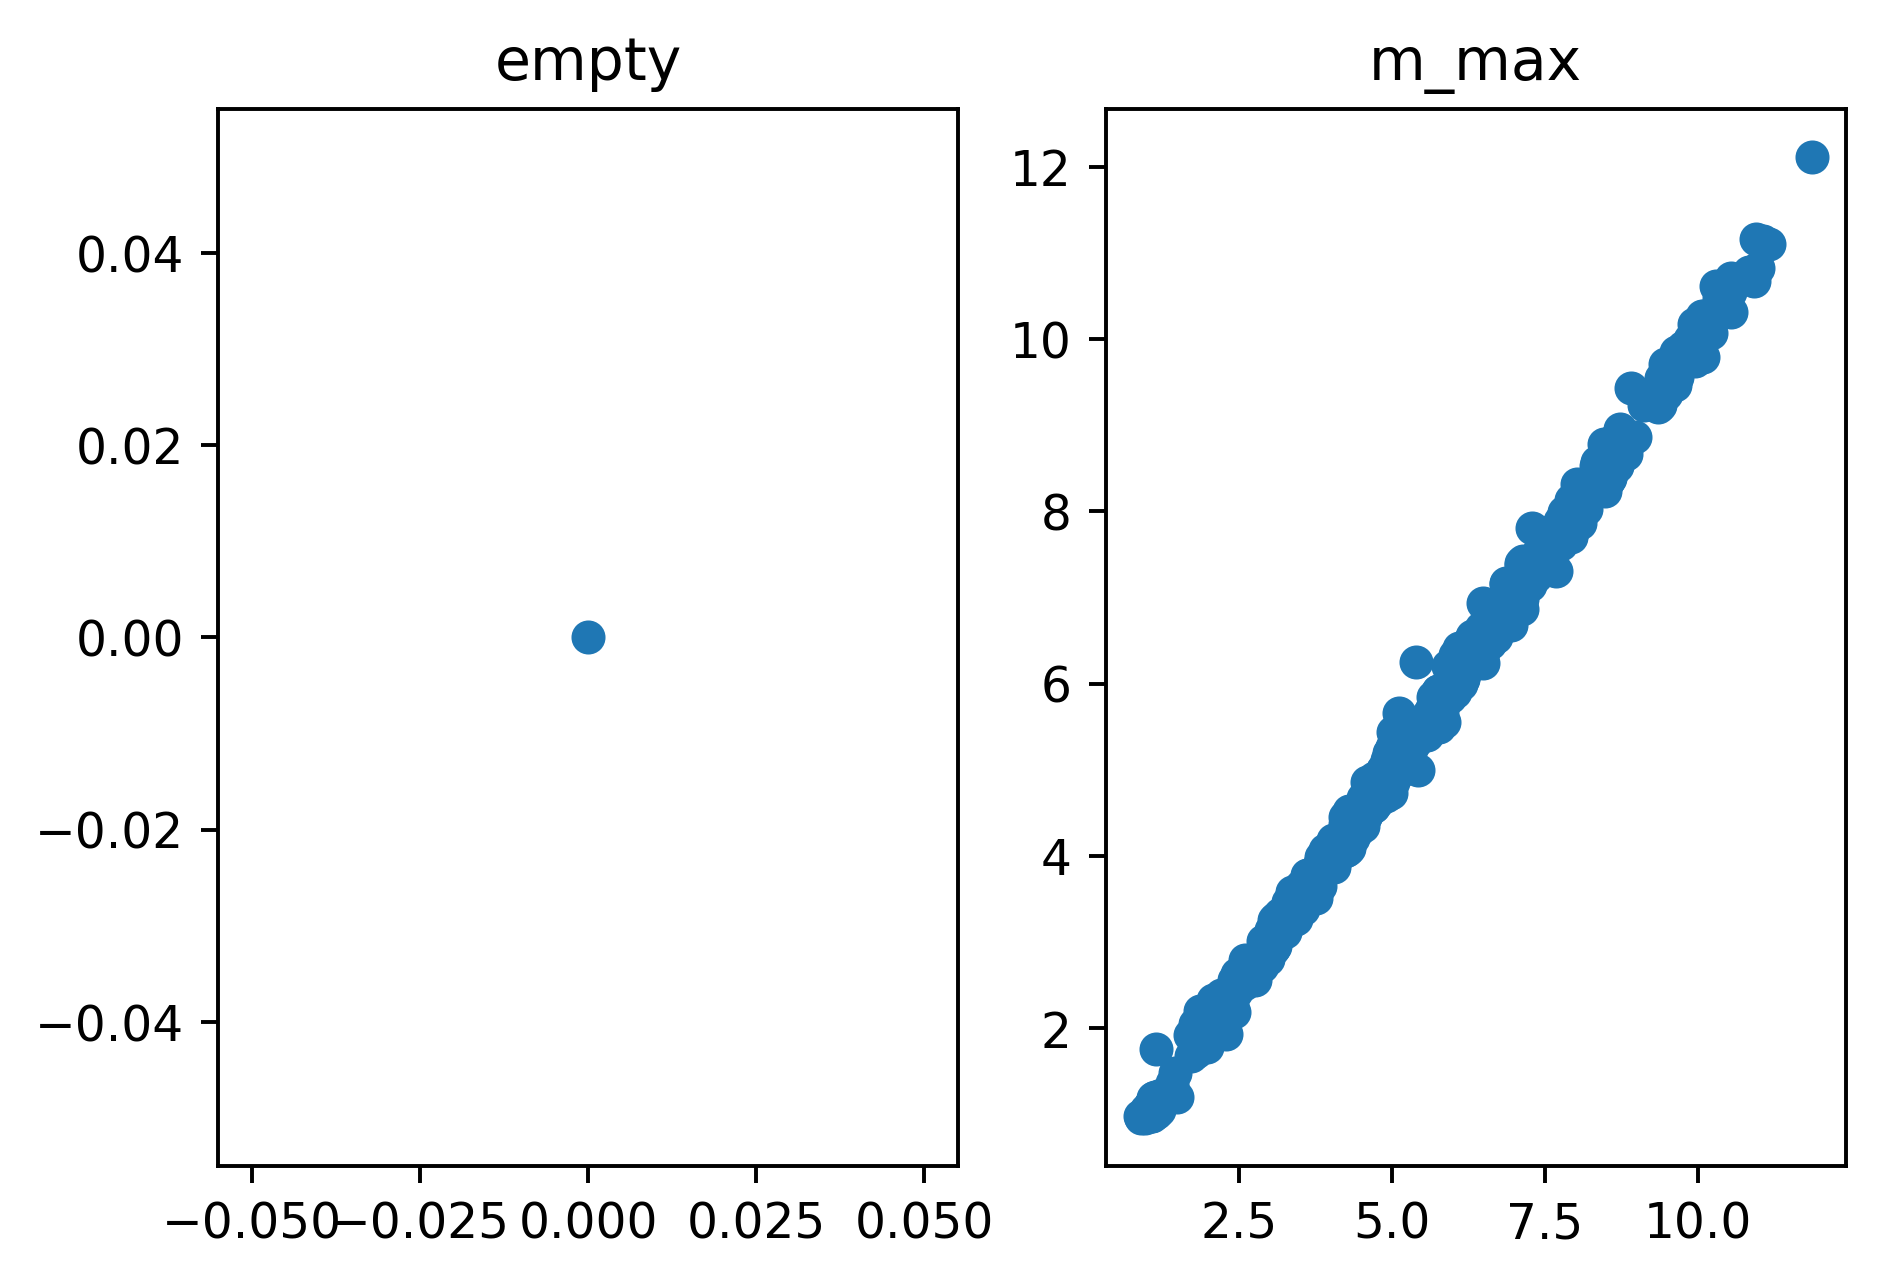

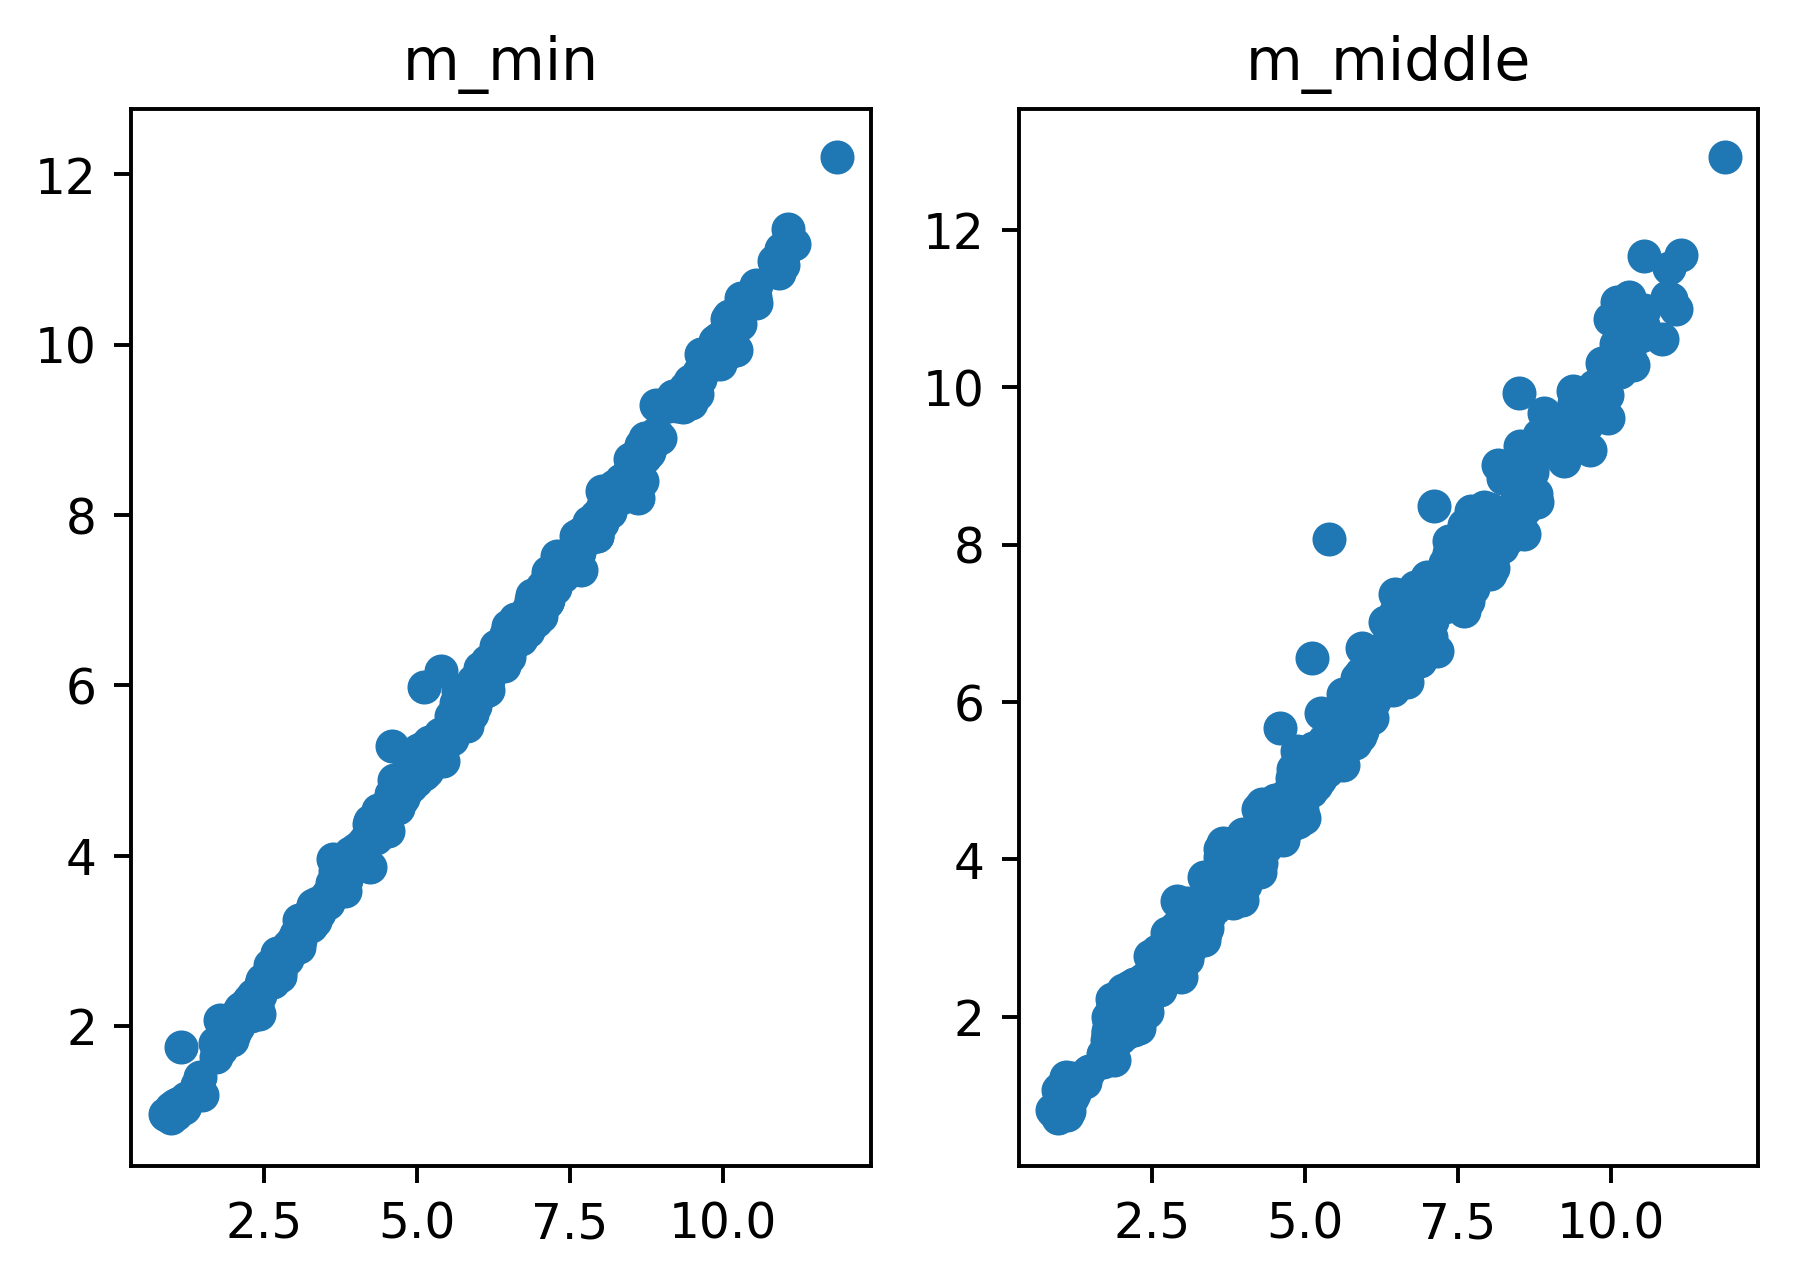

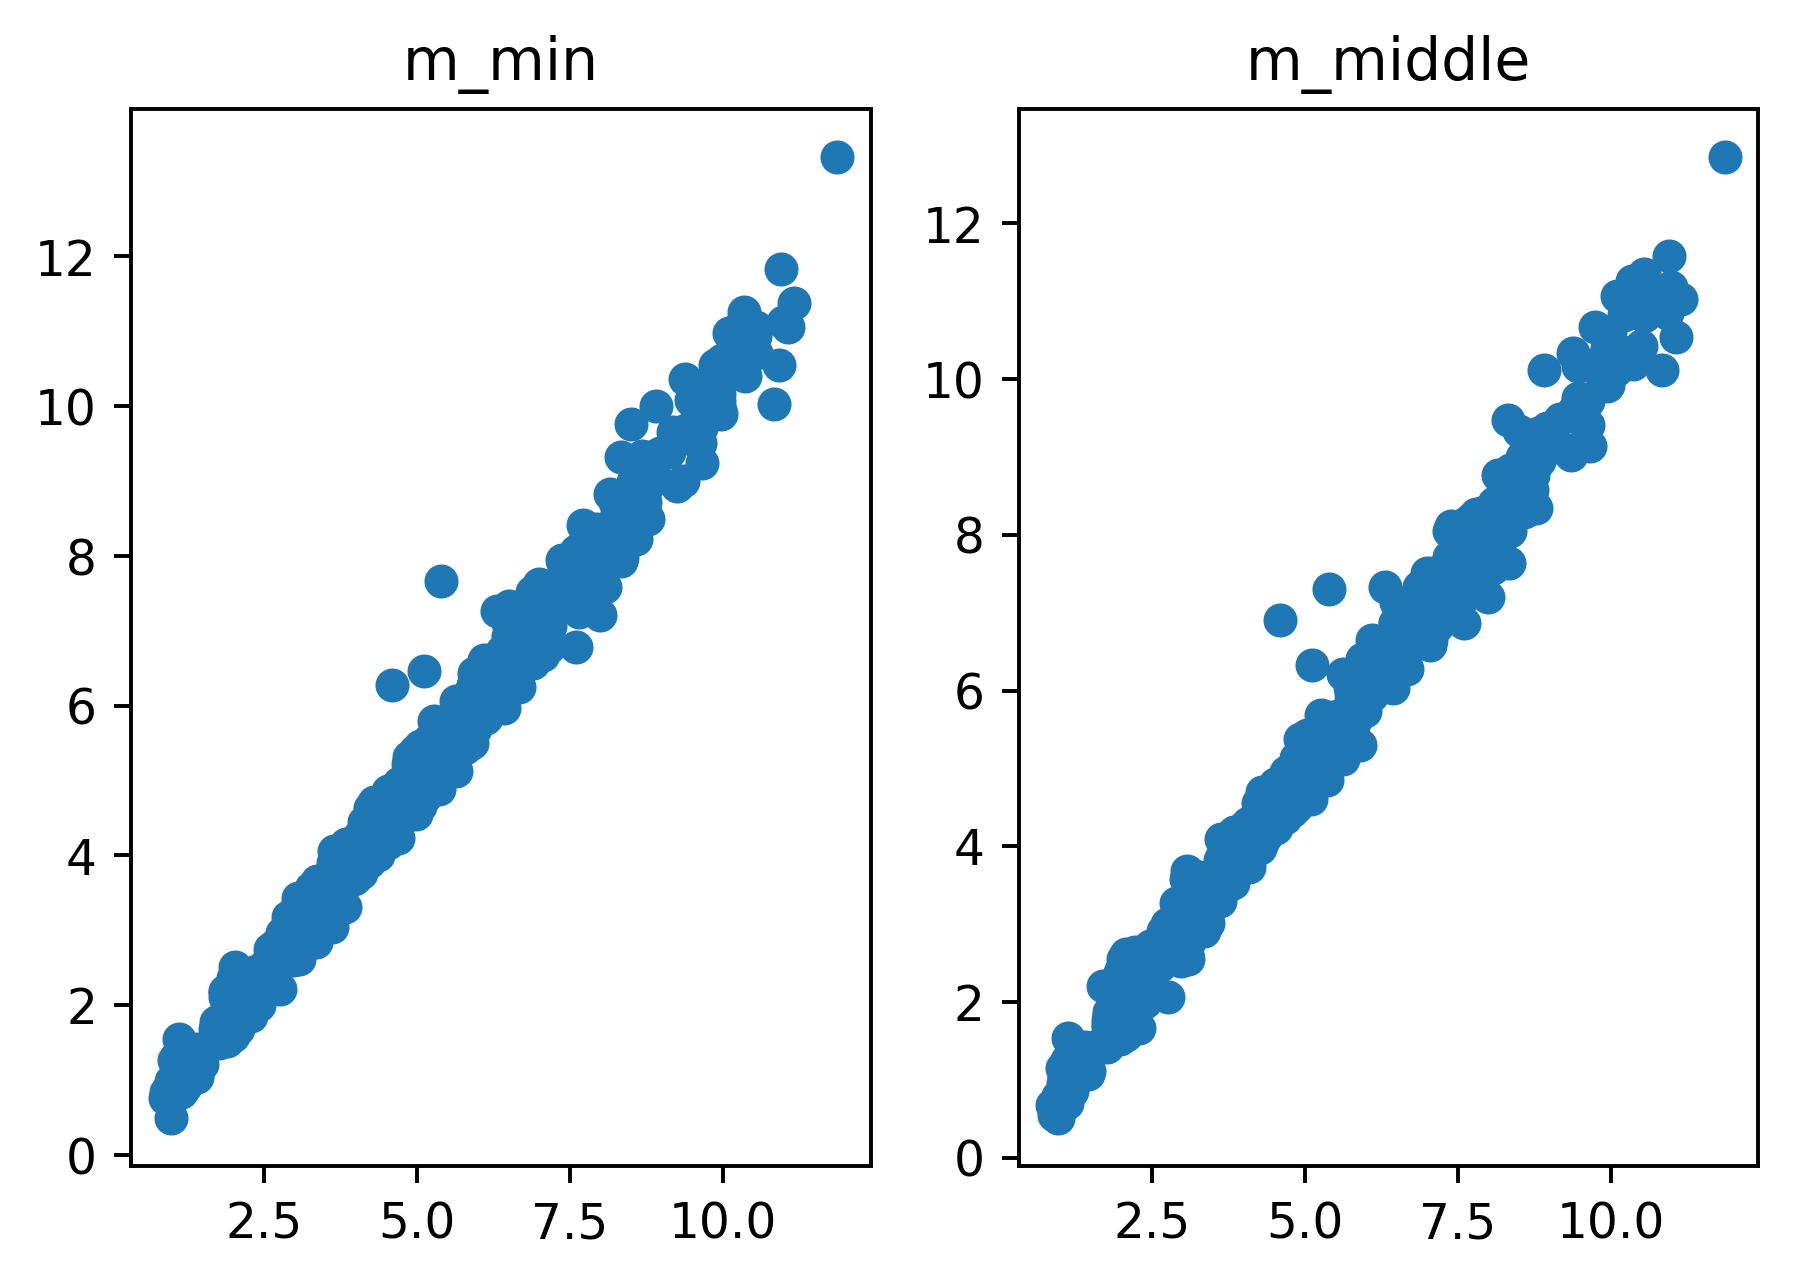

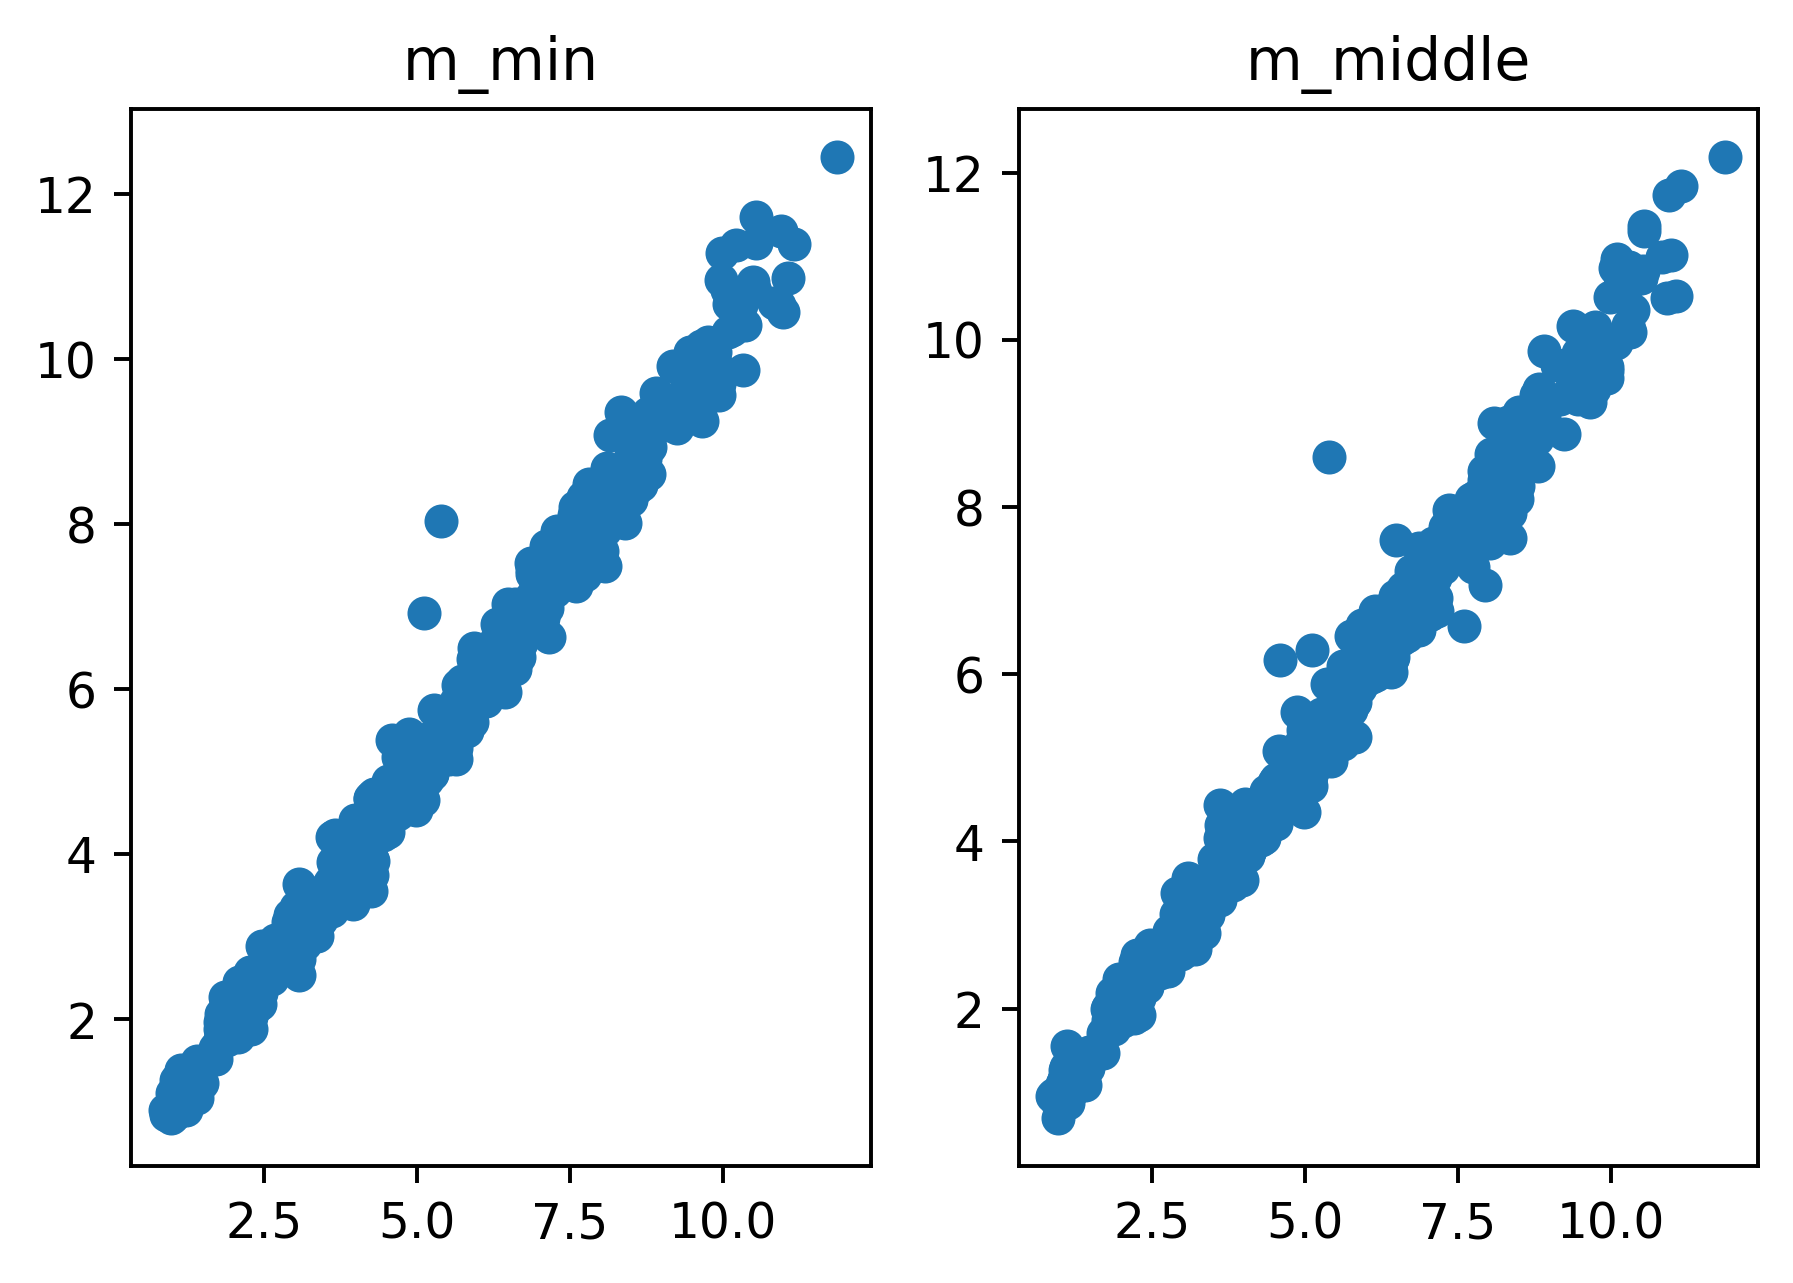

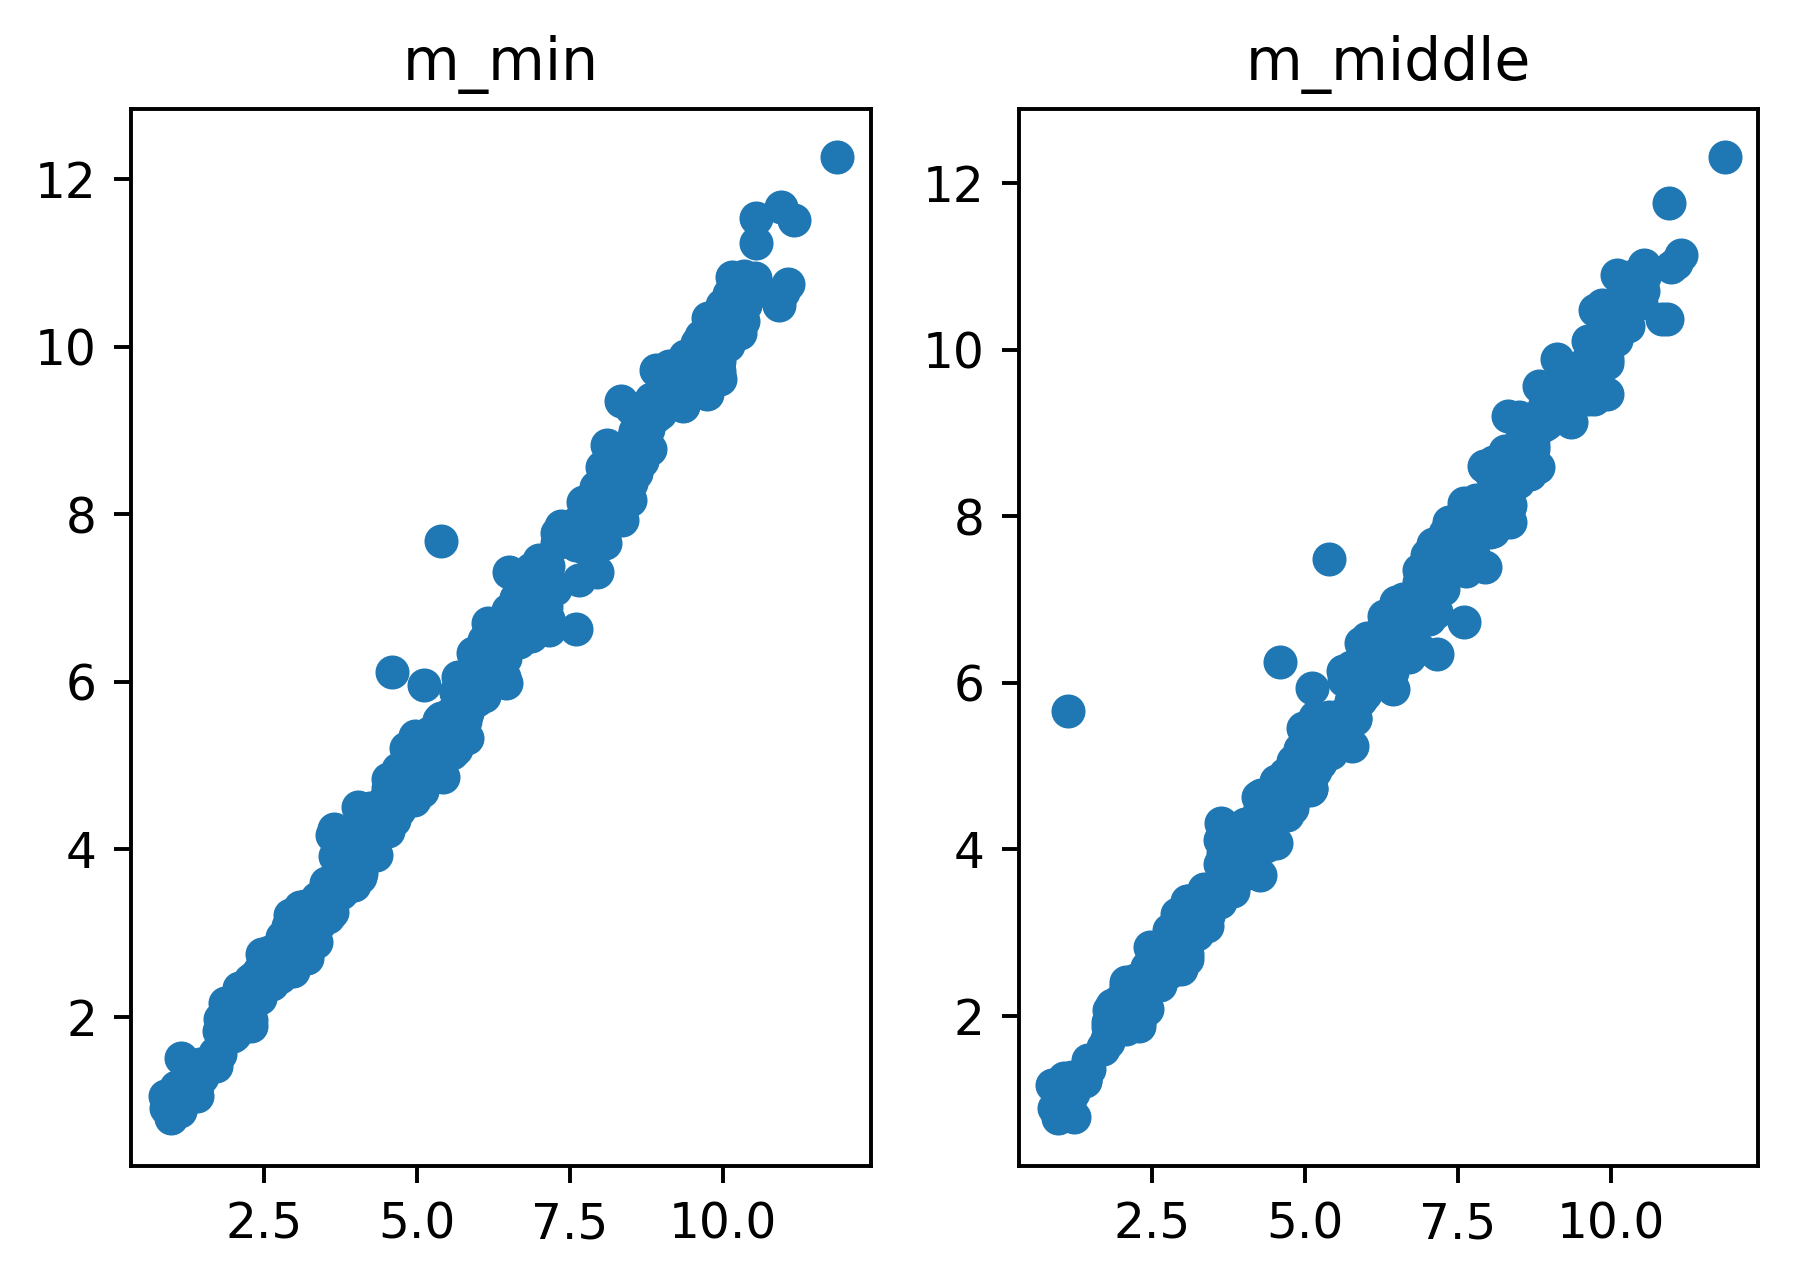

In [33]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(m_middle, m_max)
axs[1].set_title('m_max')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_middle, m_all)
axs[0].set_title('m_min')
axs[1].scatter(m_middle, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_middle, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_middle, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_middle, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(m_middle, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_middle, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_middle, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

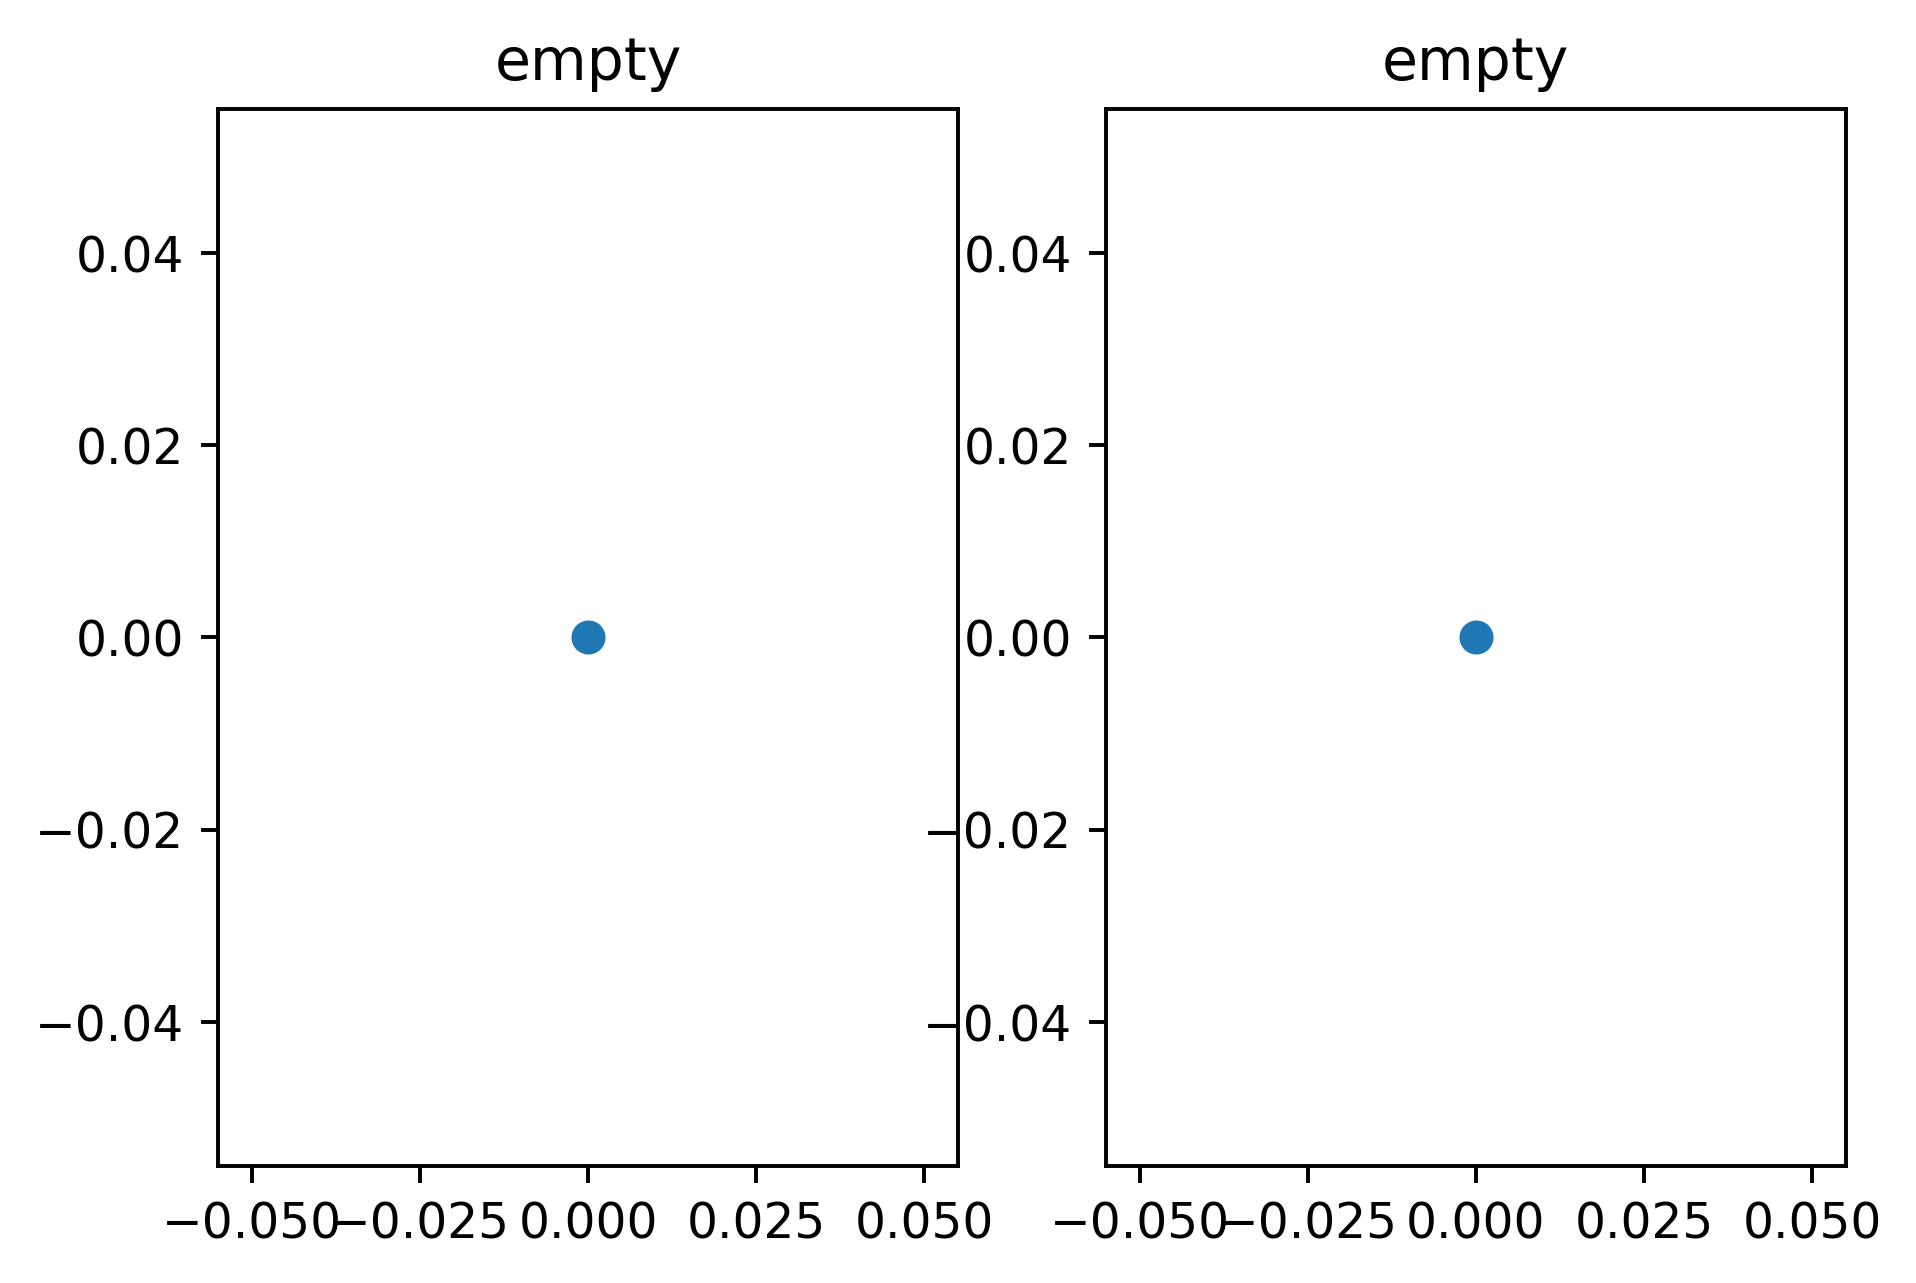

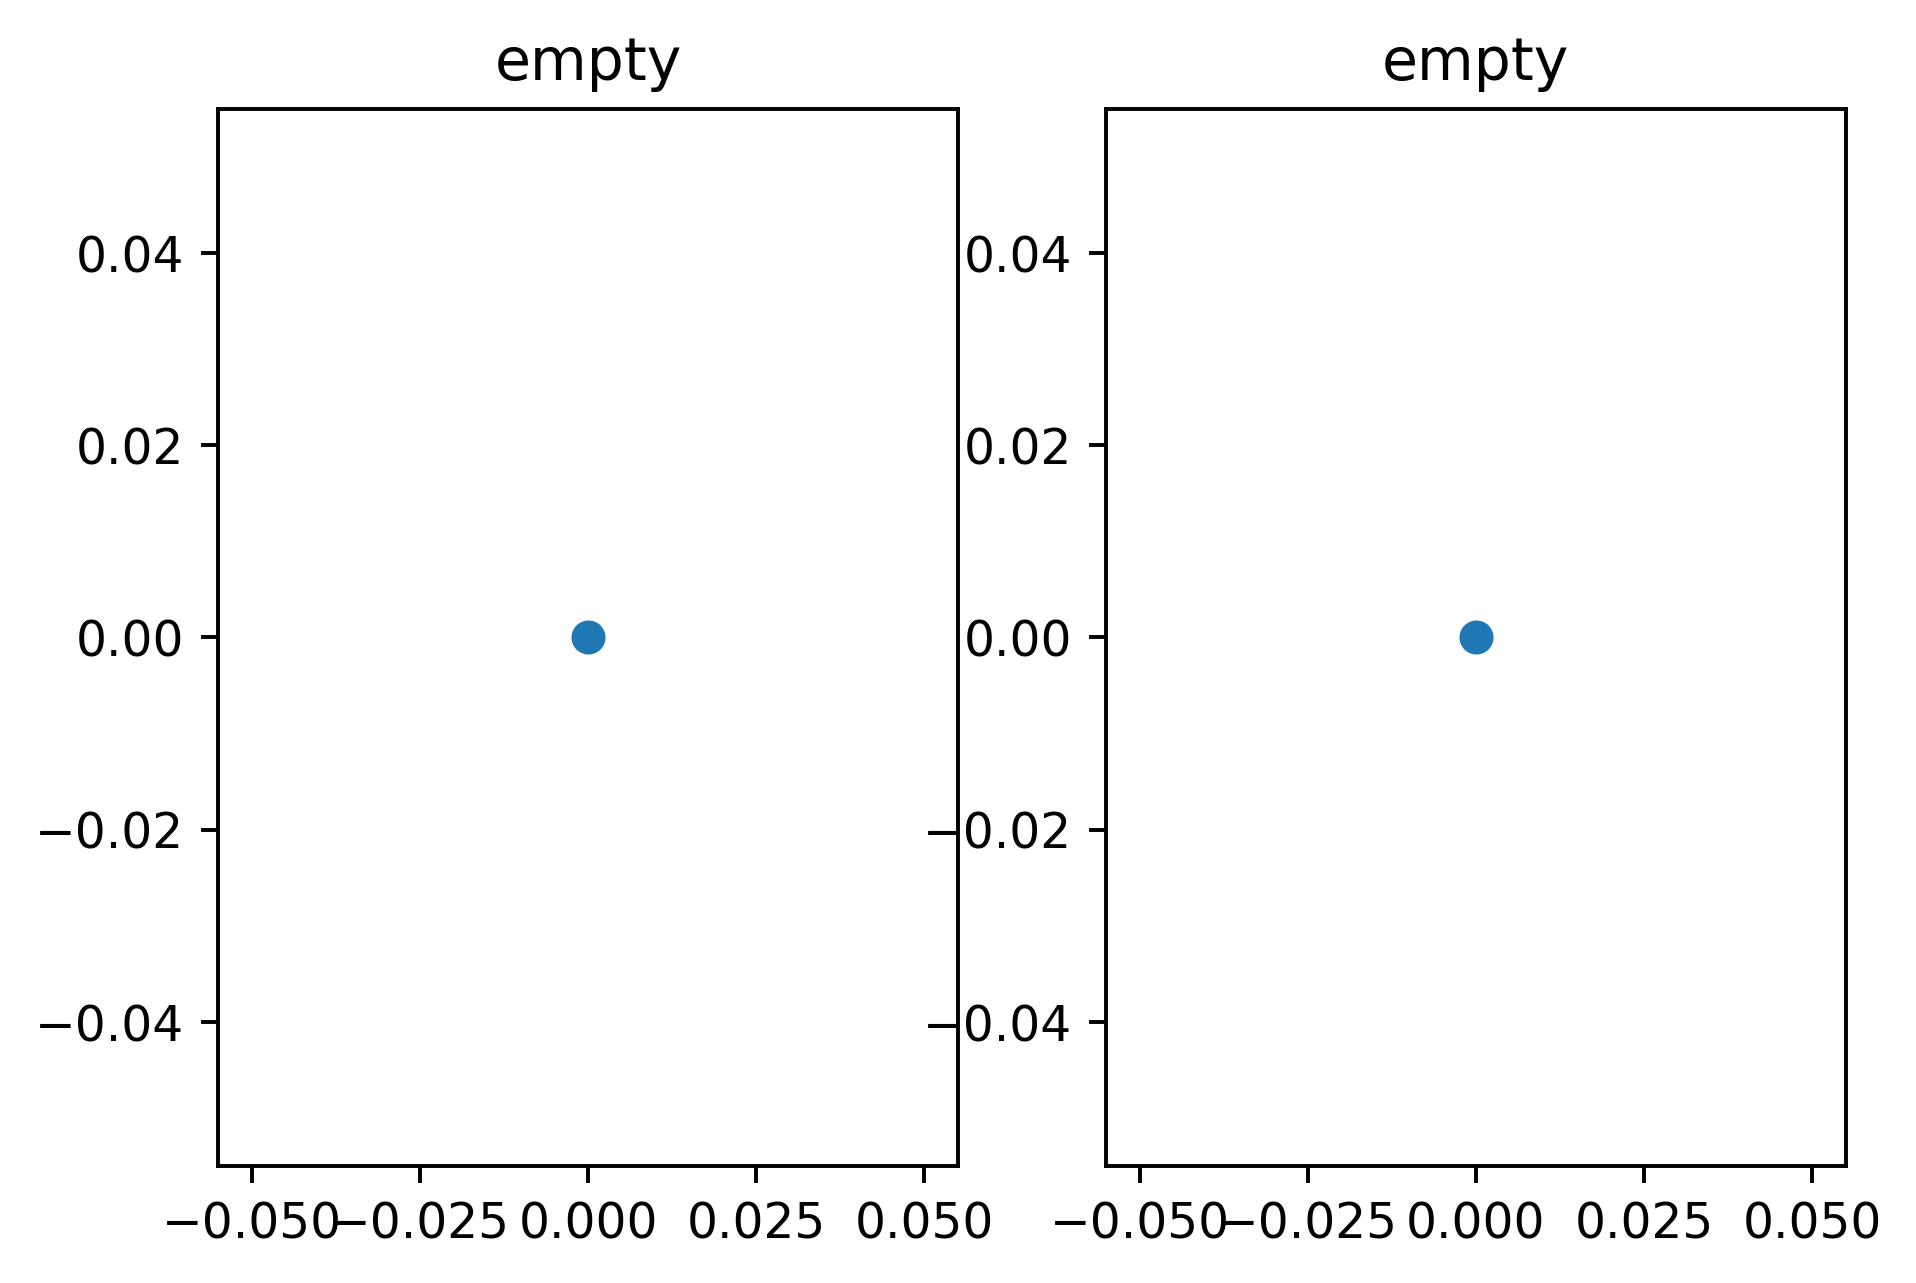

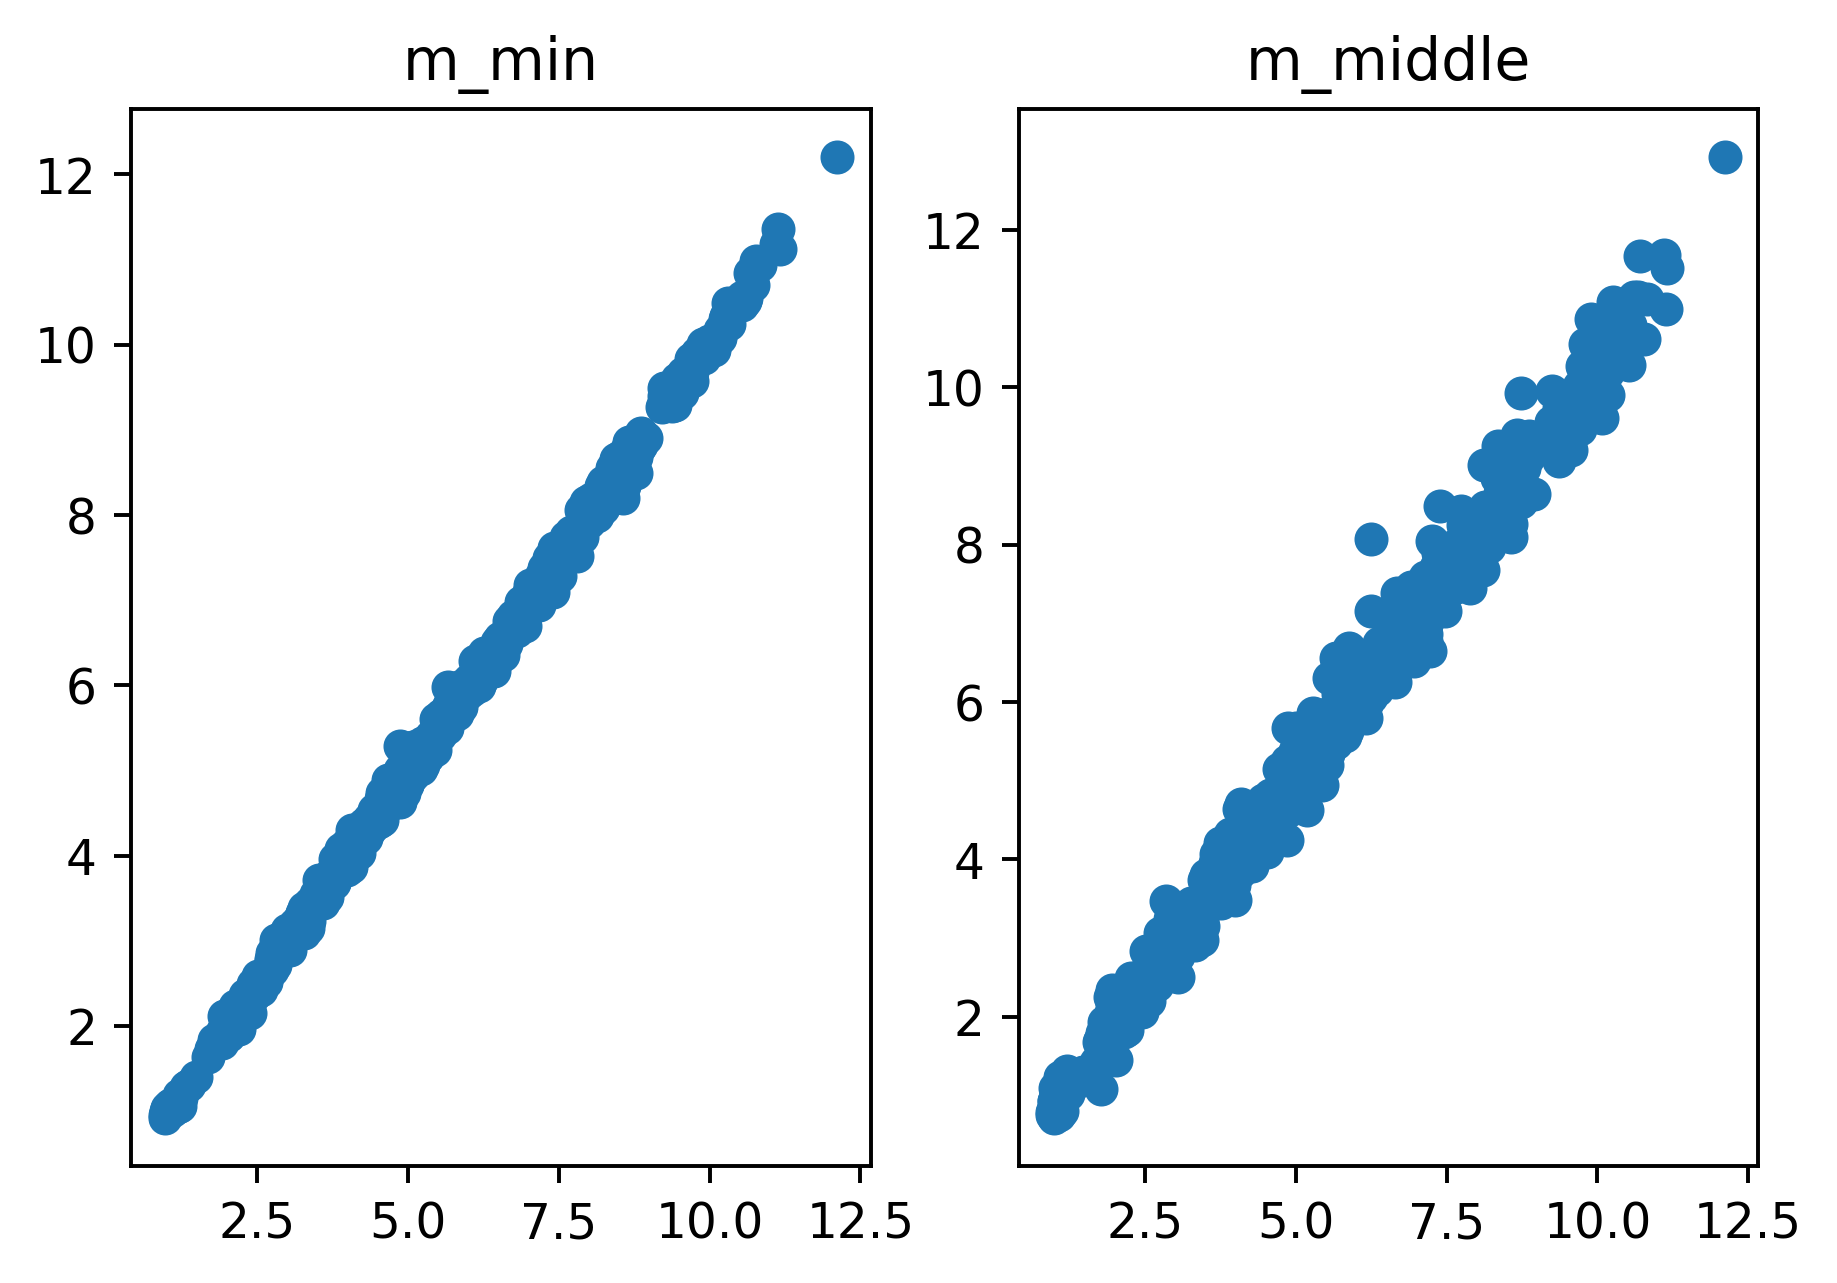

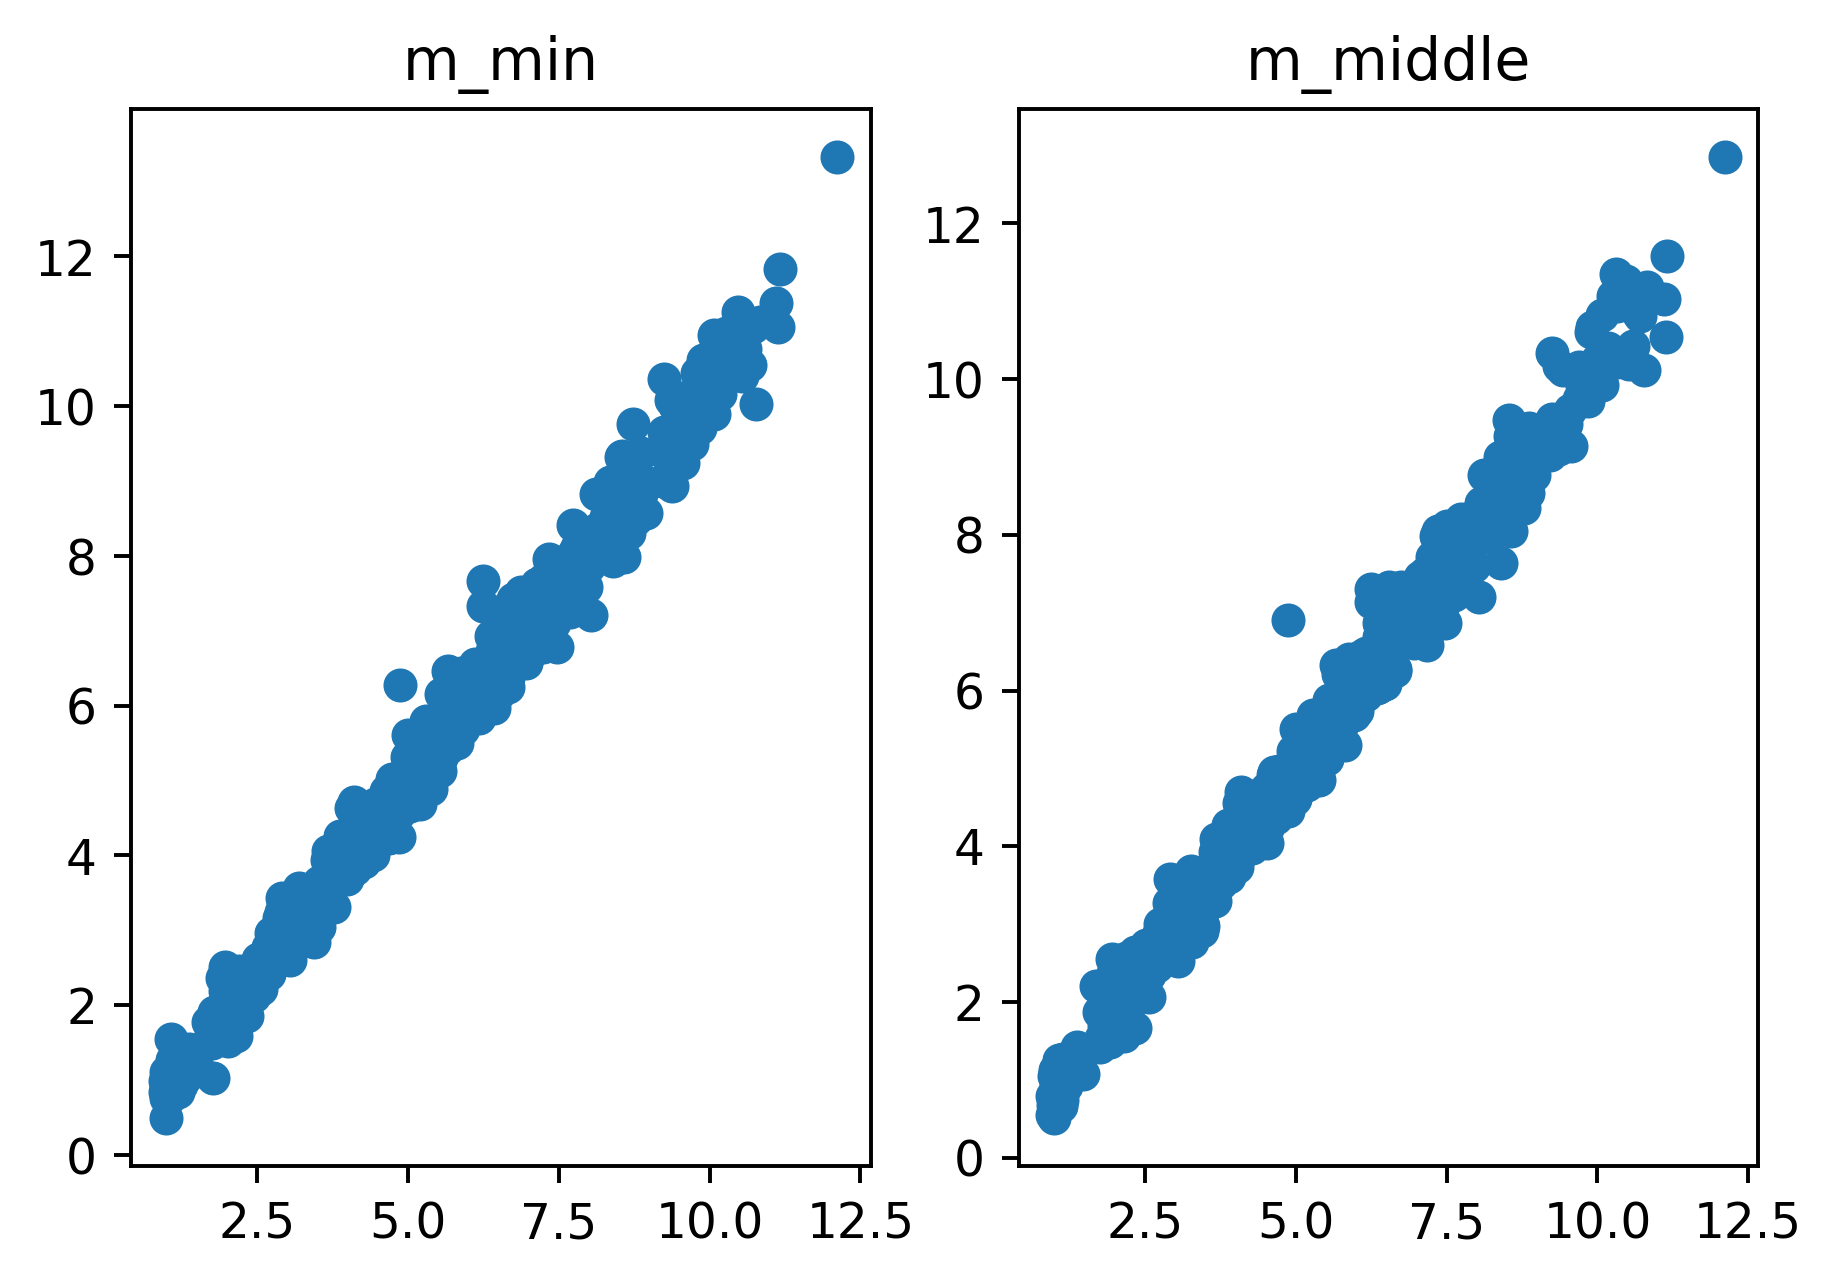

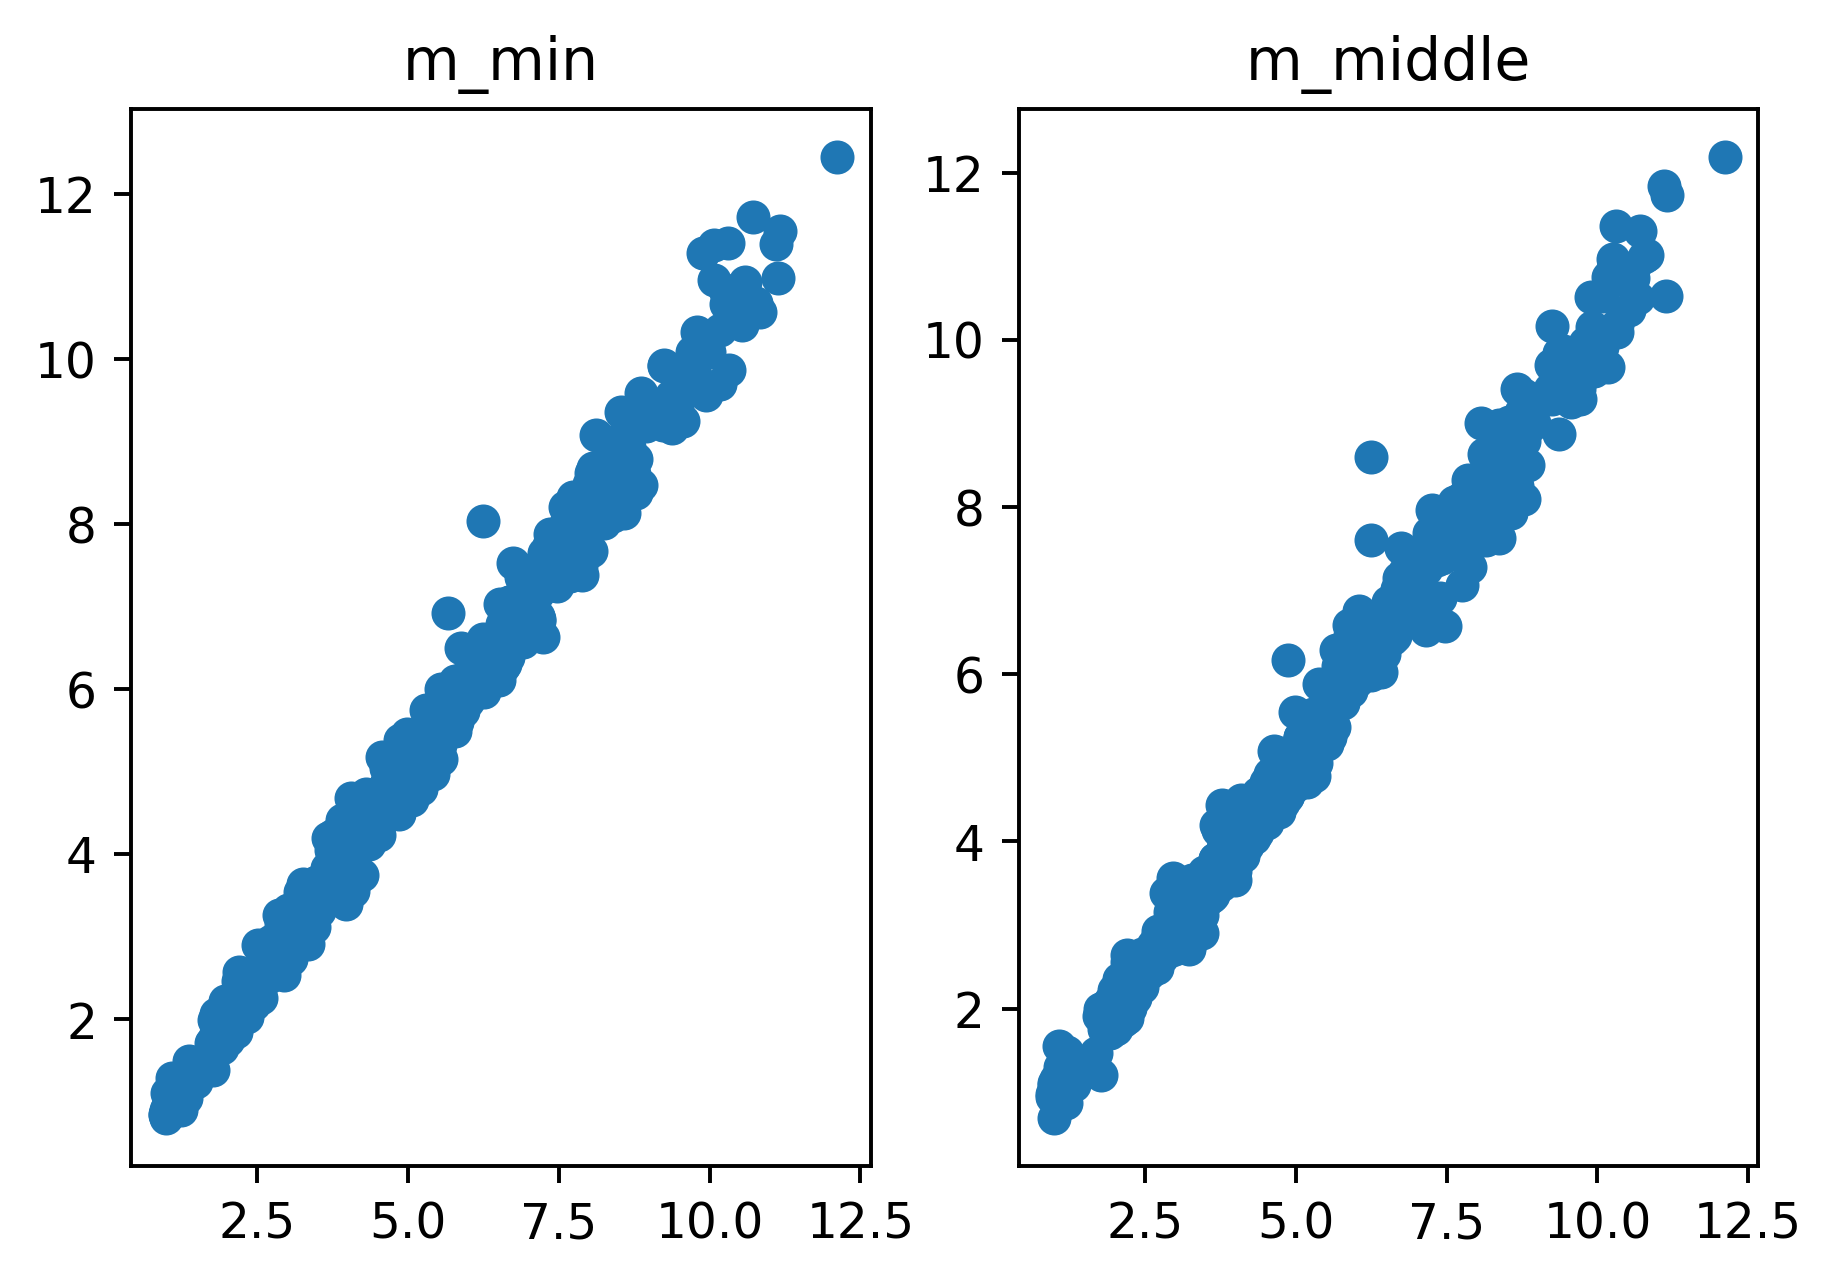

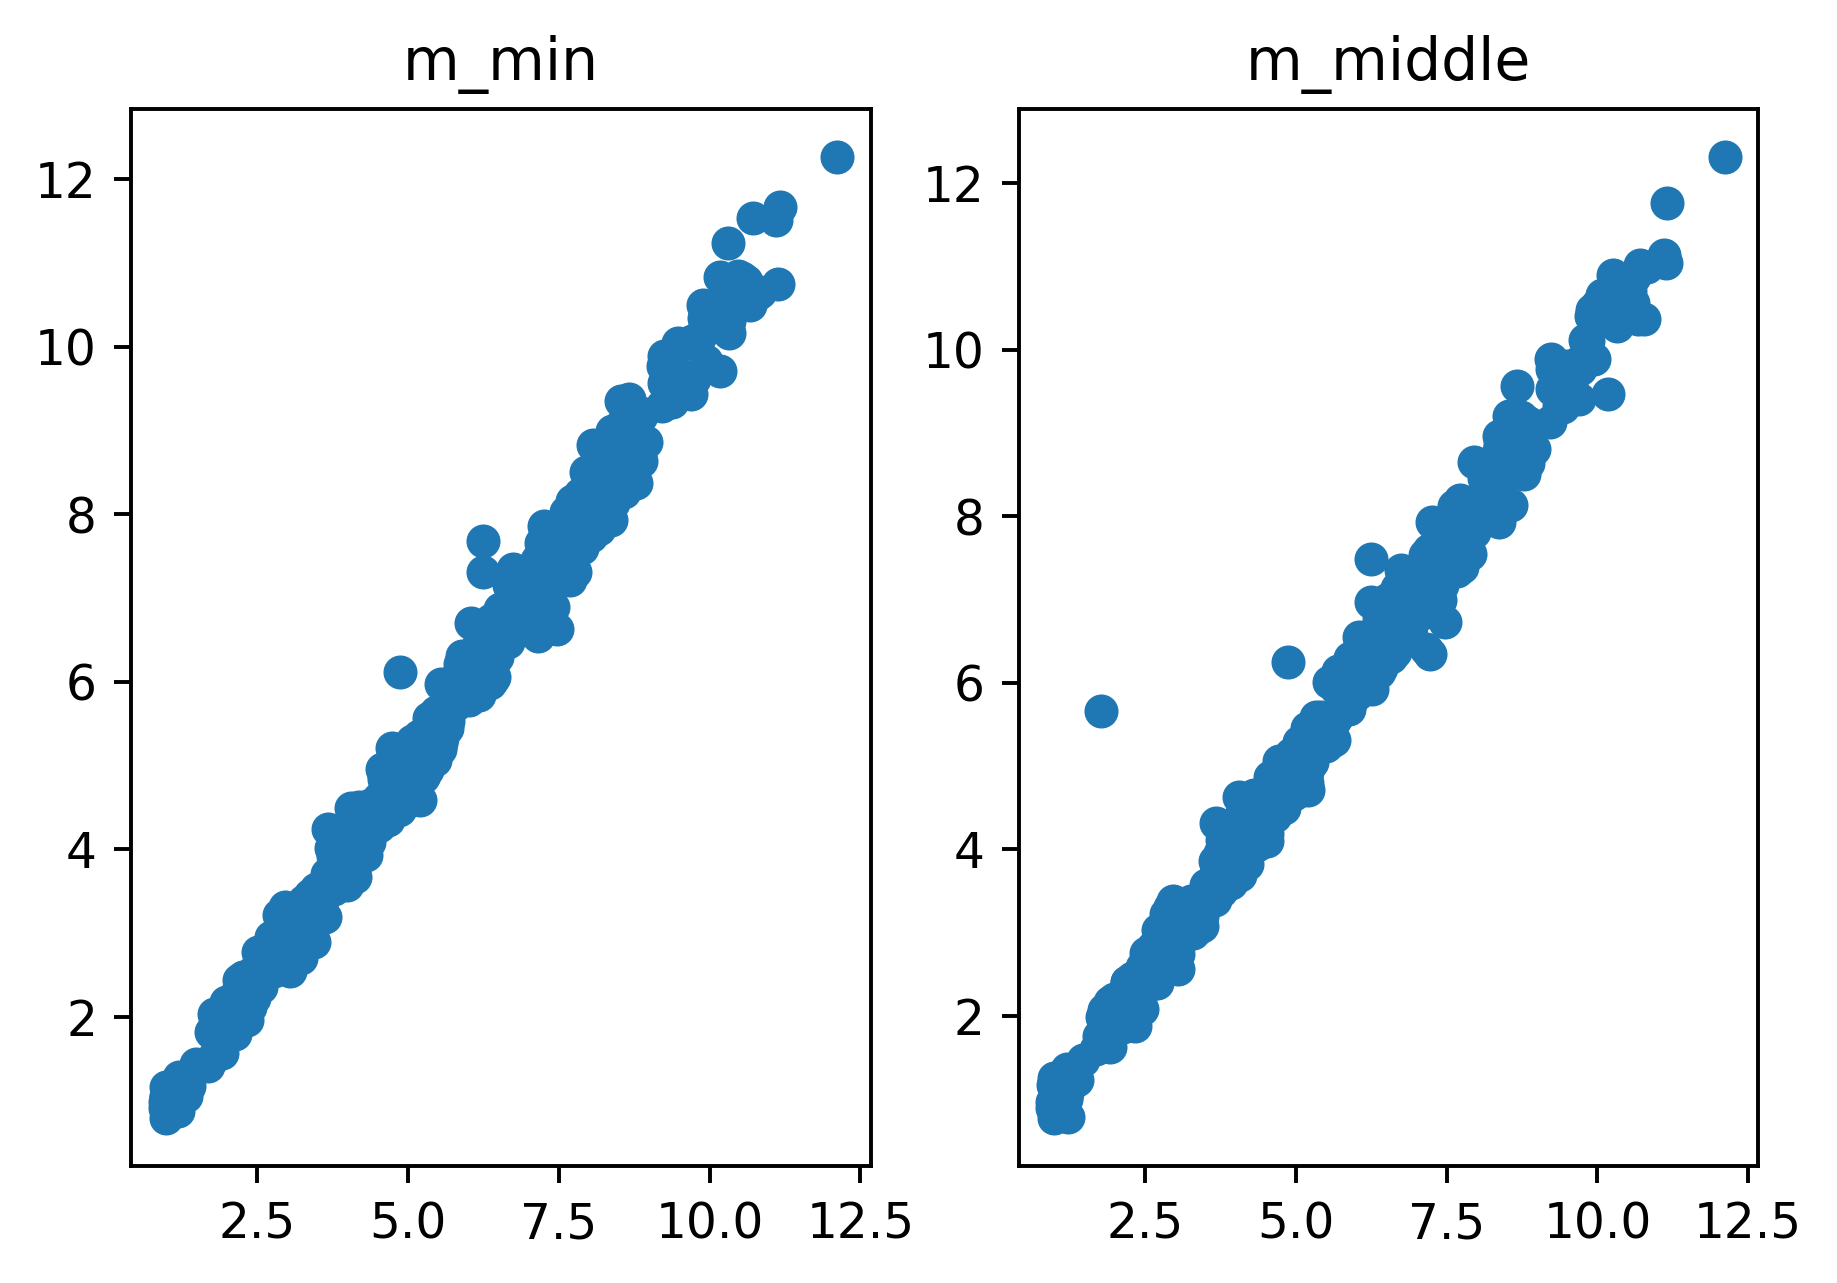

In [45]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_max, m_all)
axs[0].set_title('m_min')
axs[1].scatter(m_max, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_max, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_max, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_max, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(m_max, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_max, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_max, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

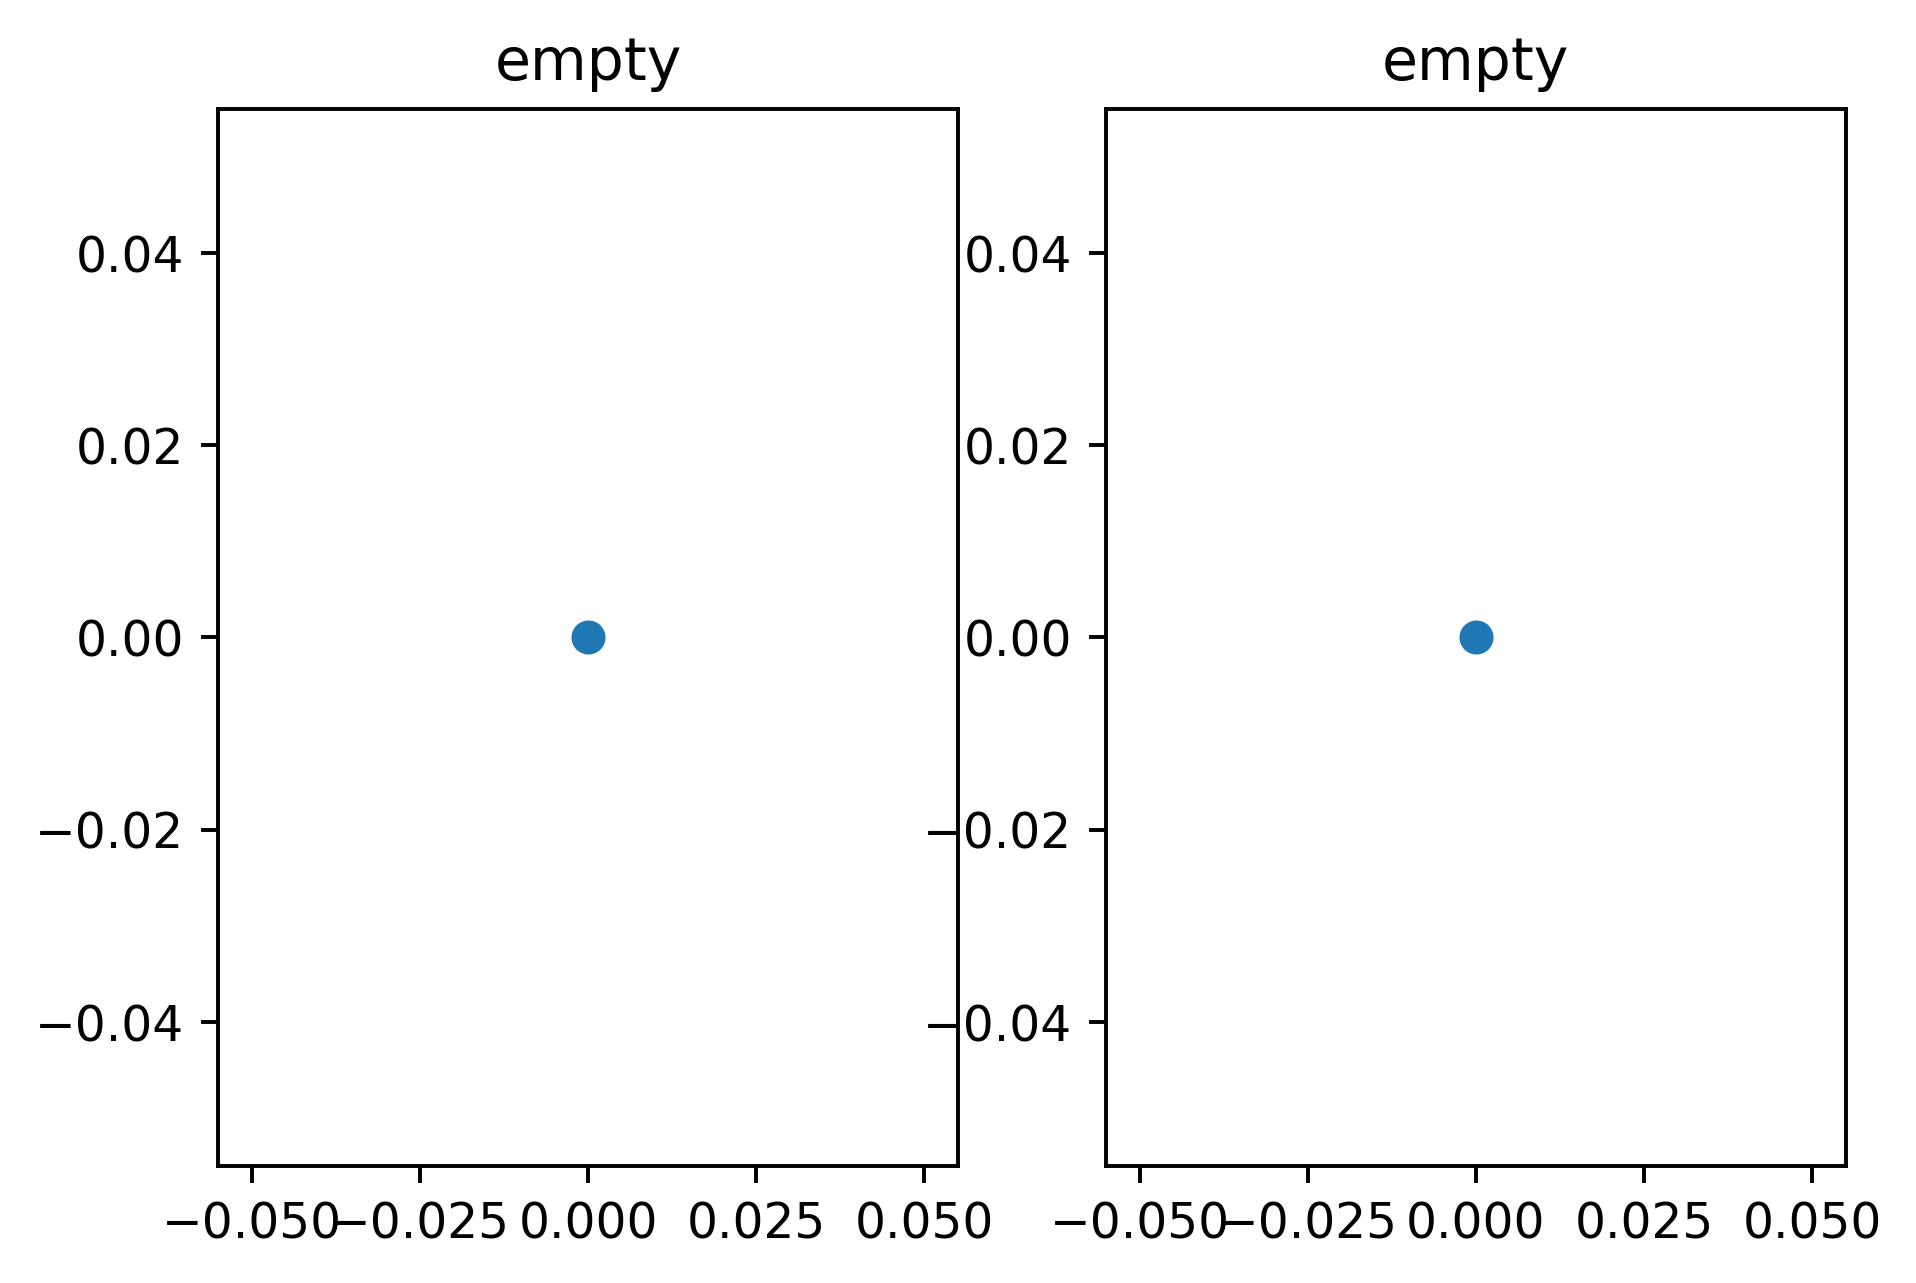

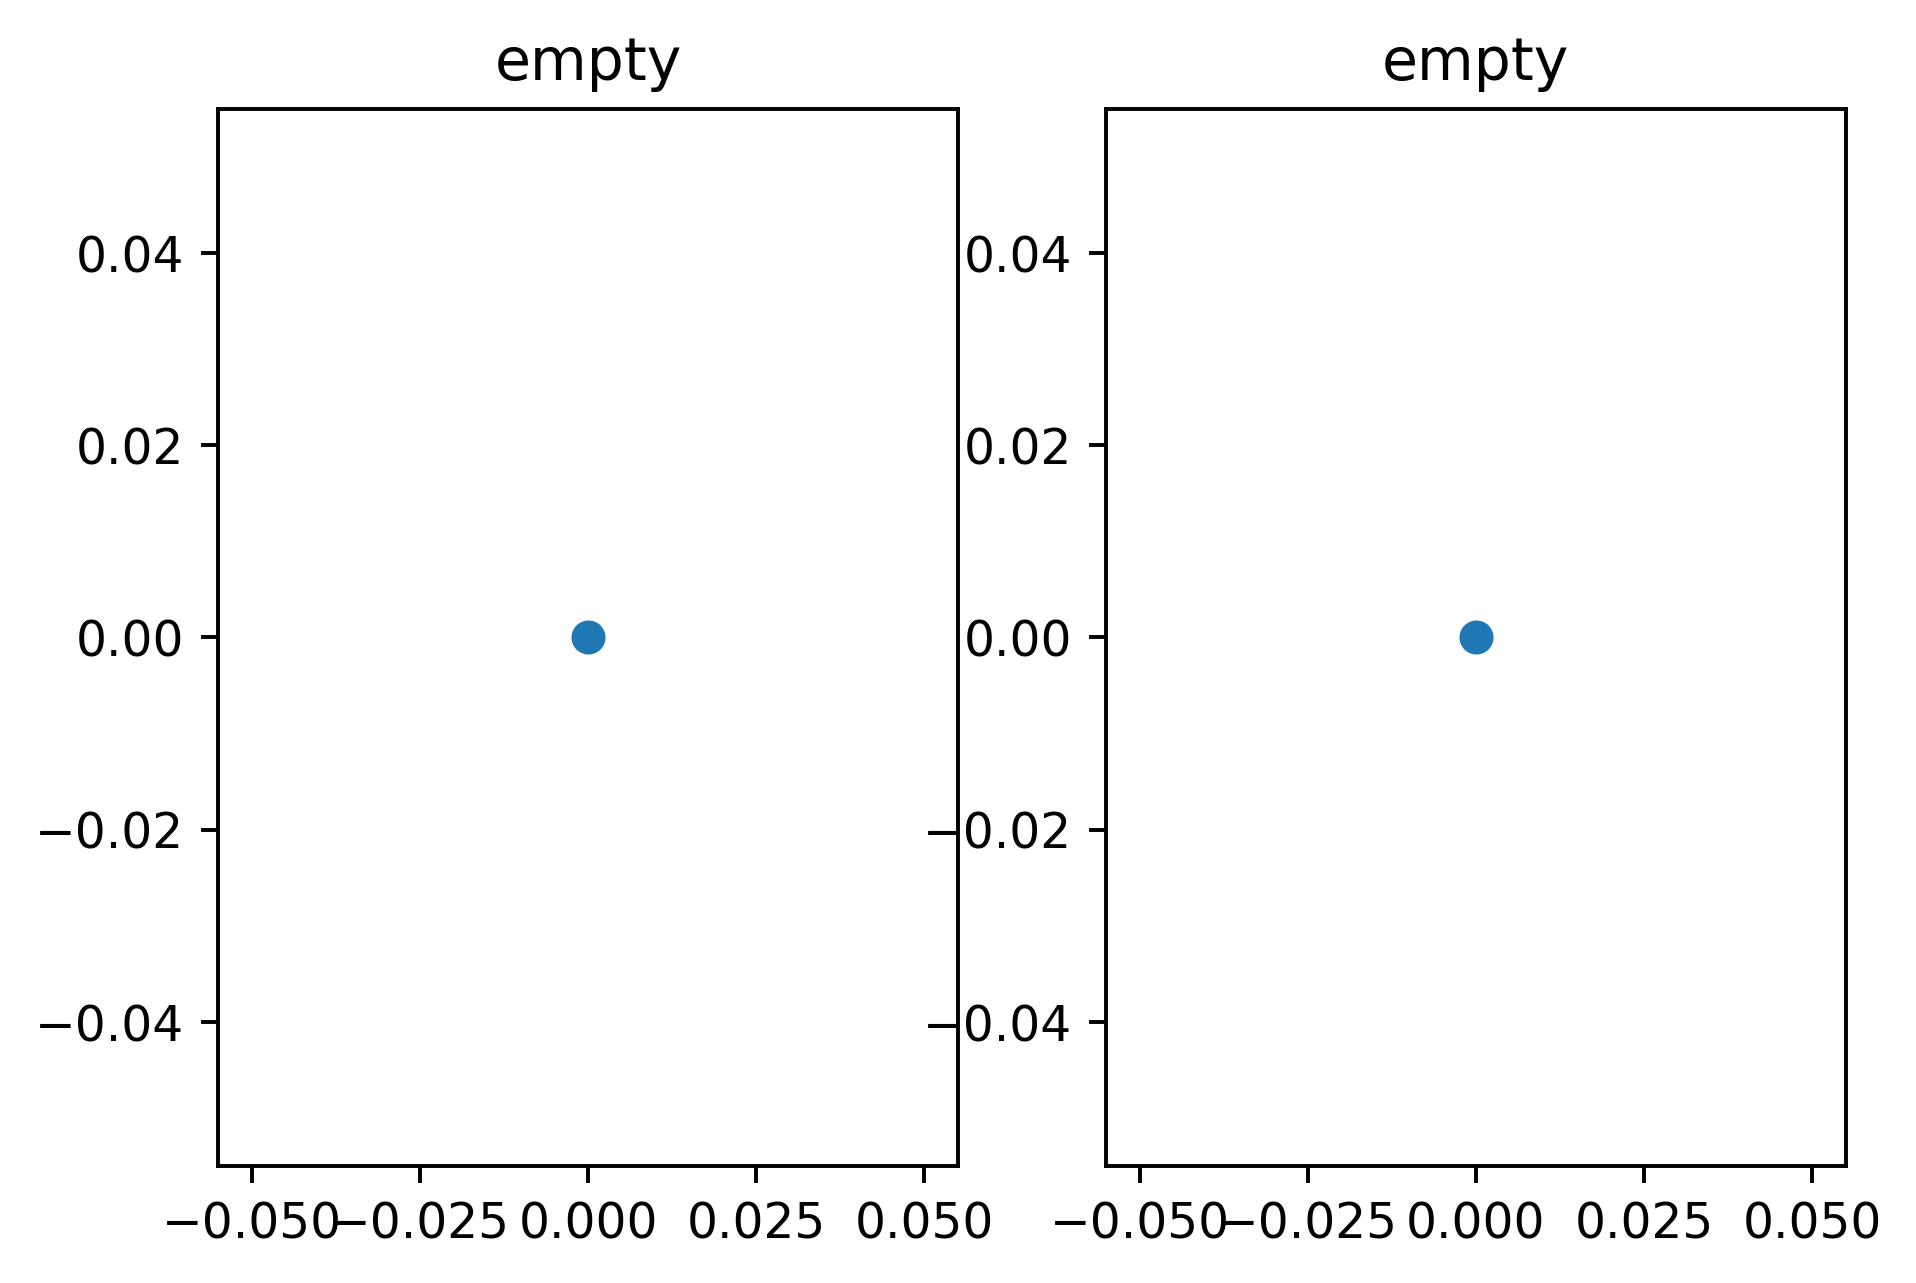

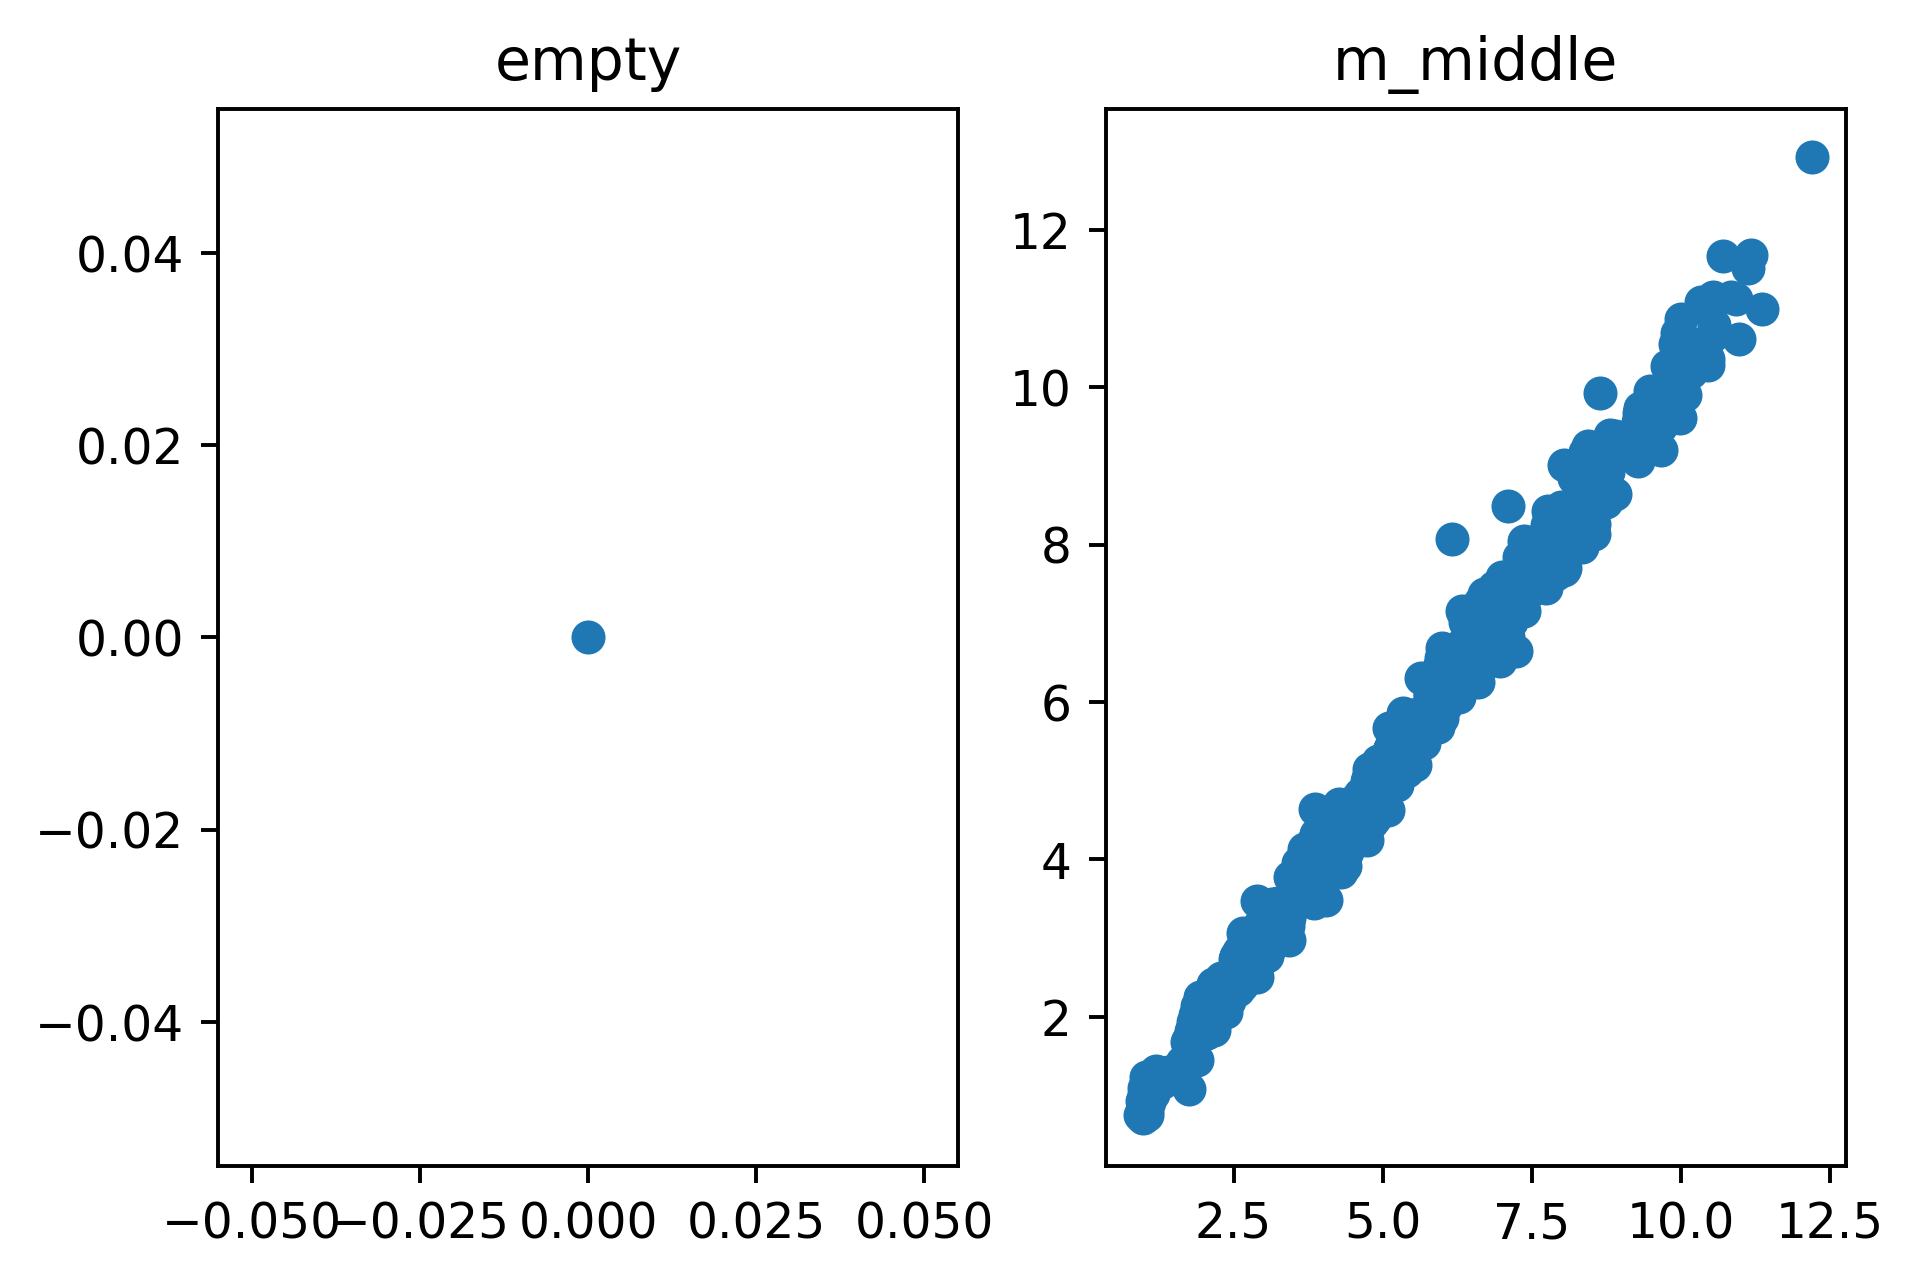

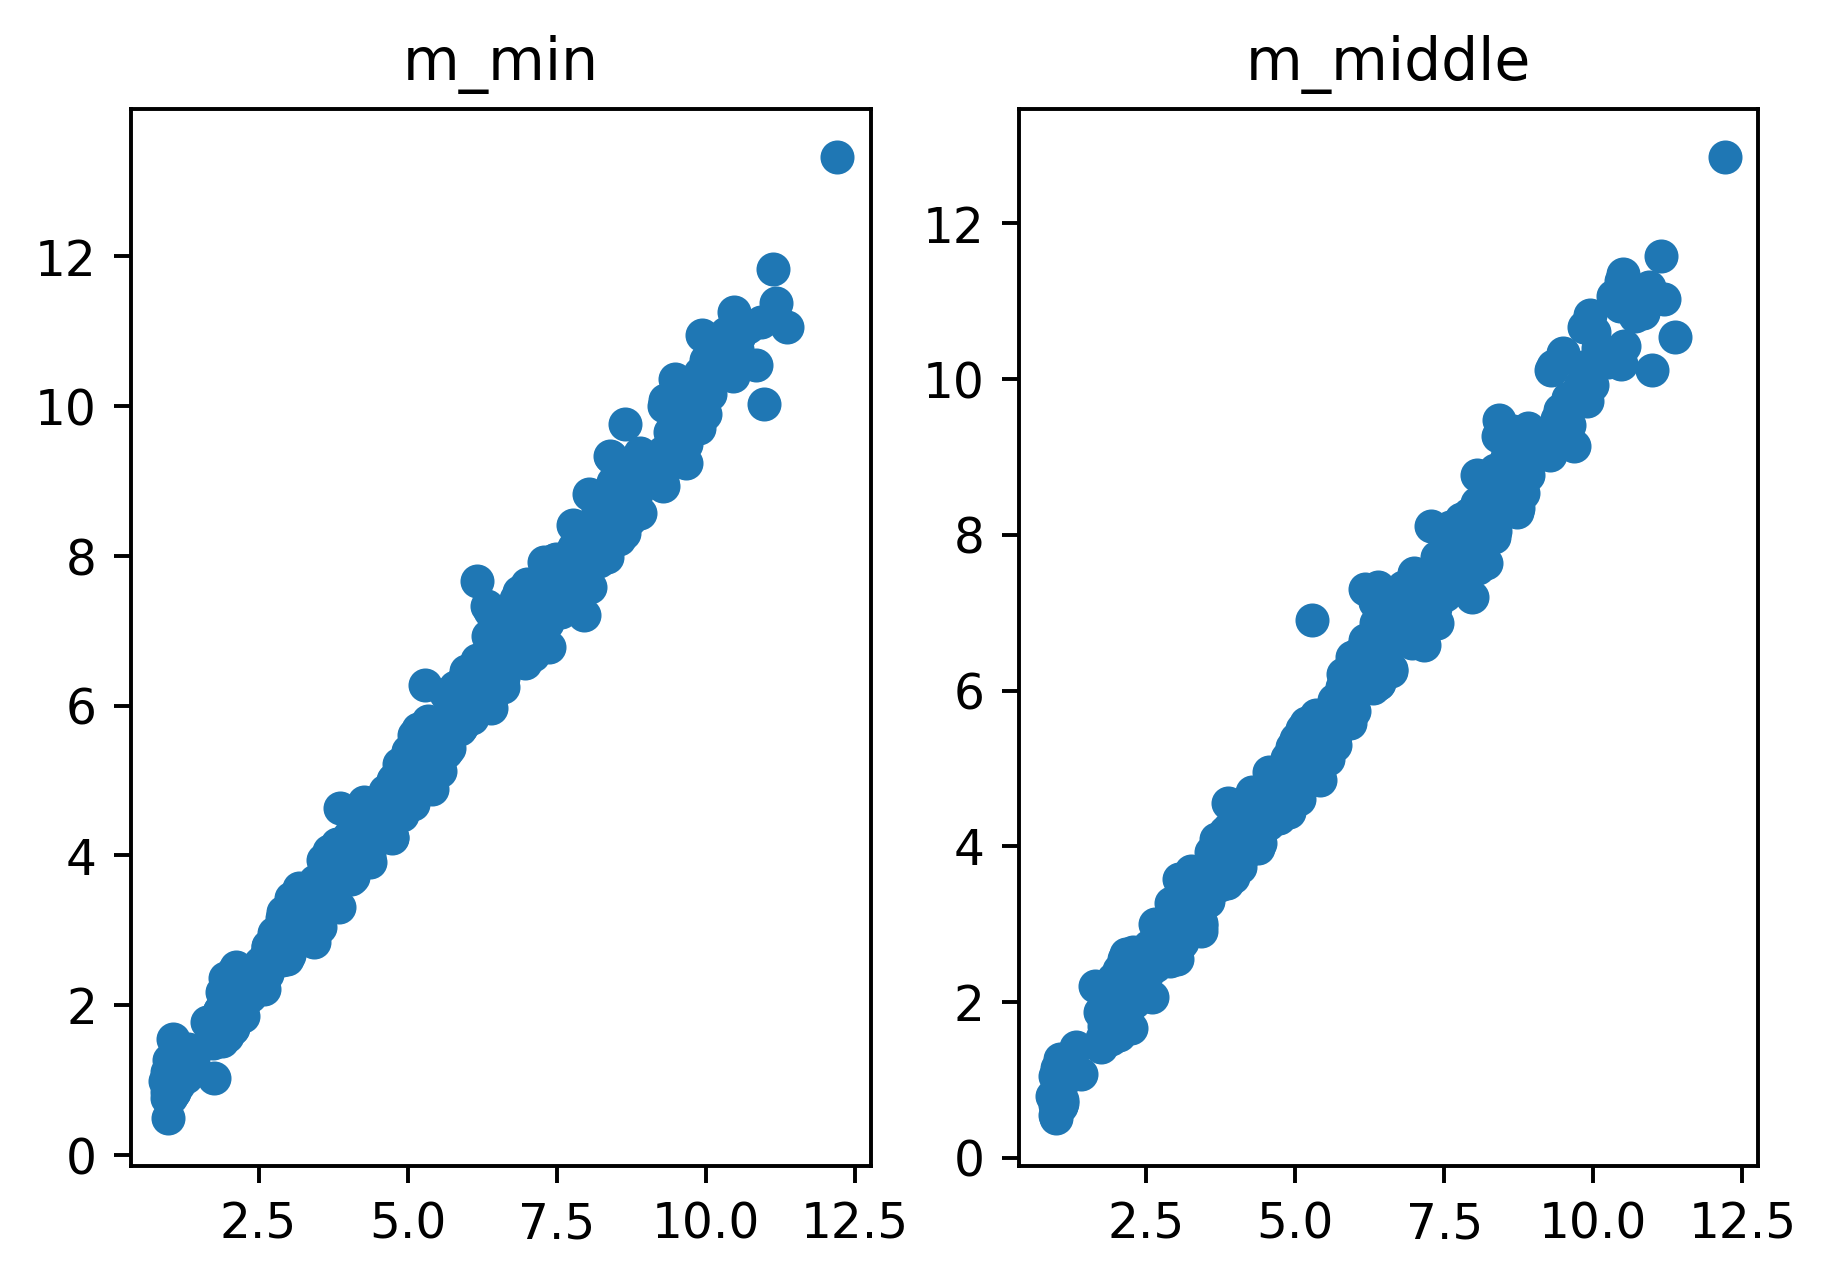

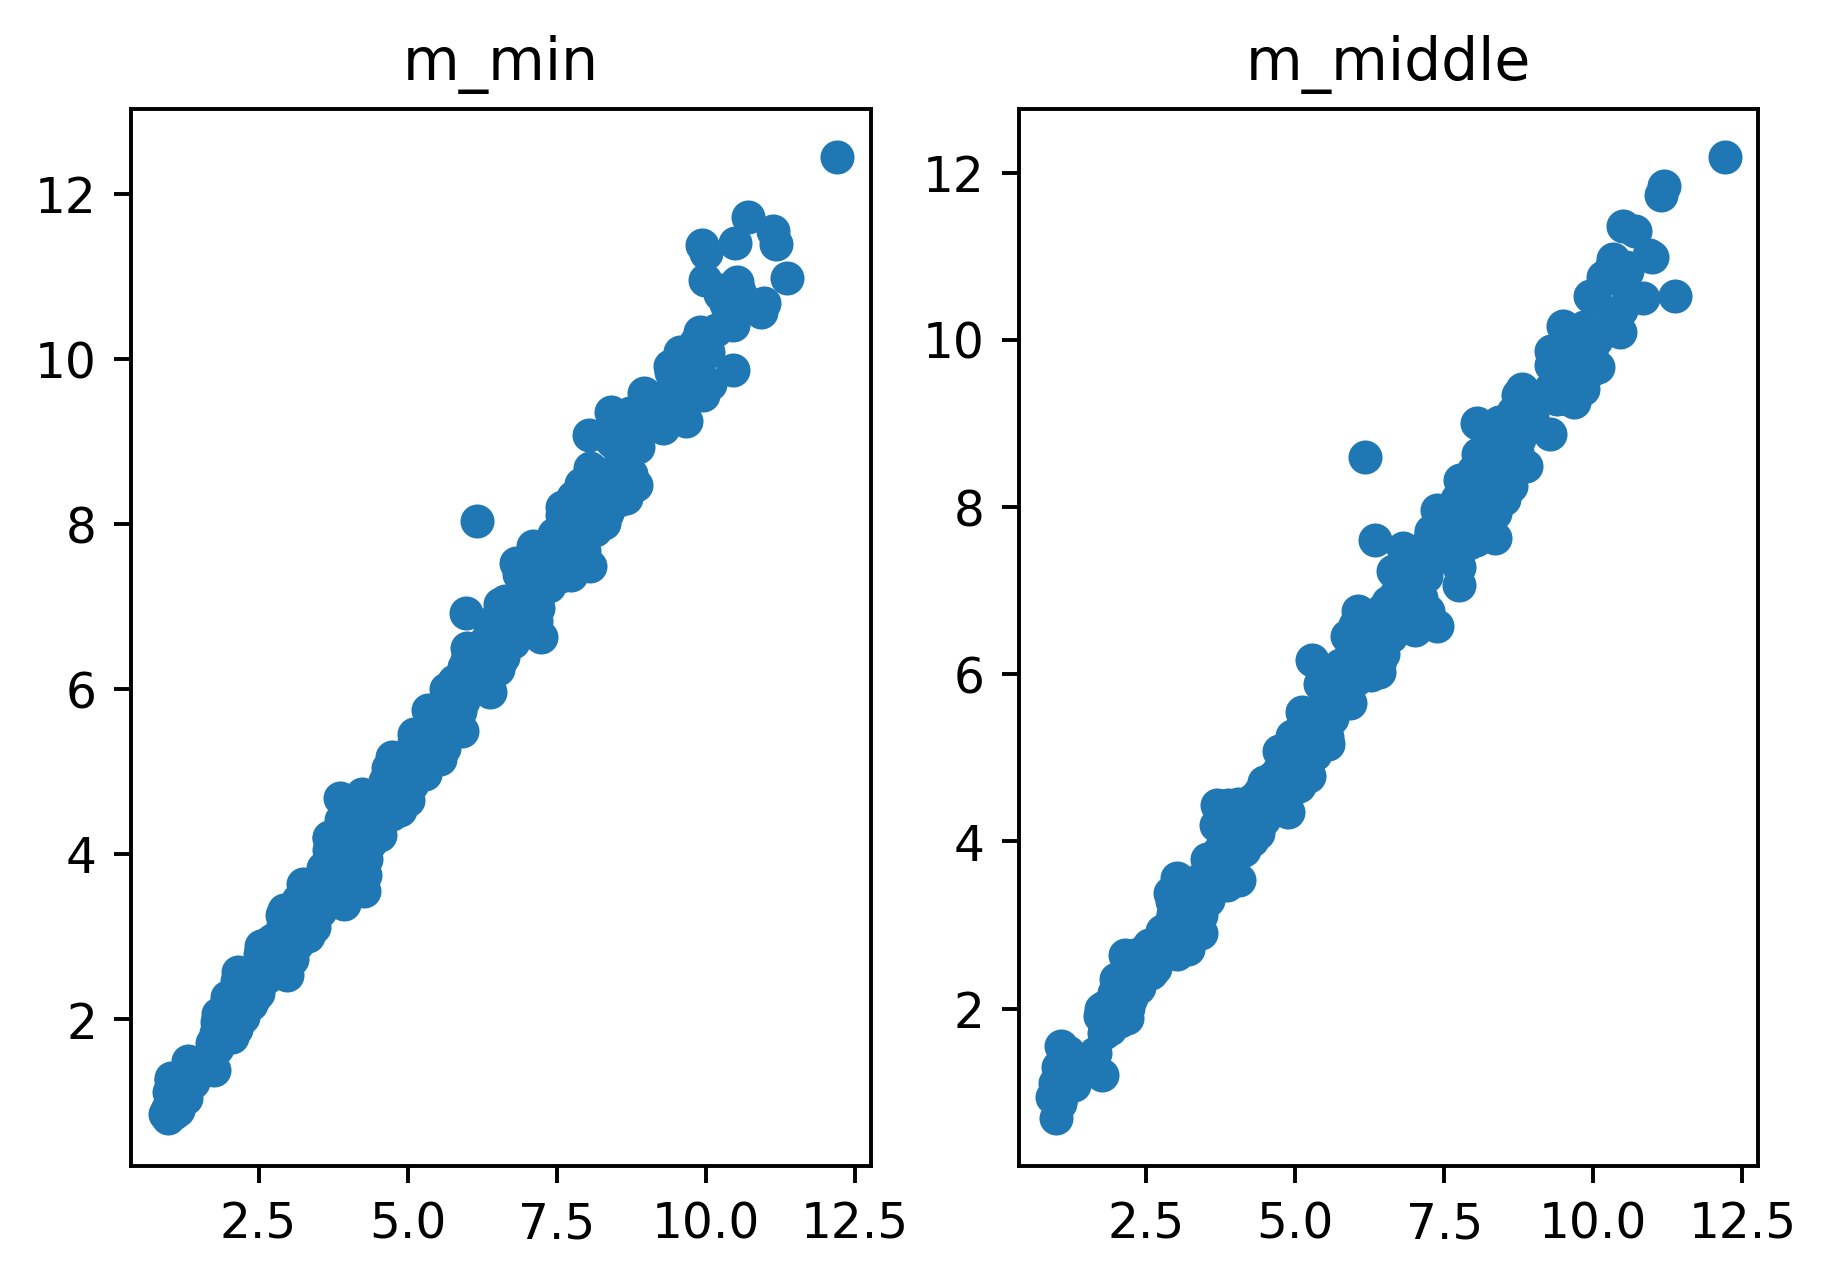

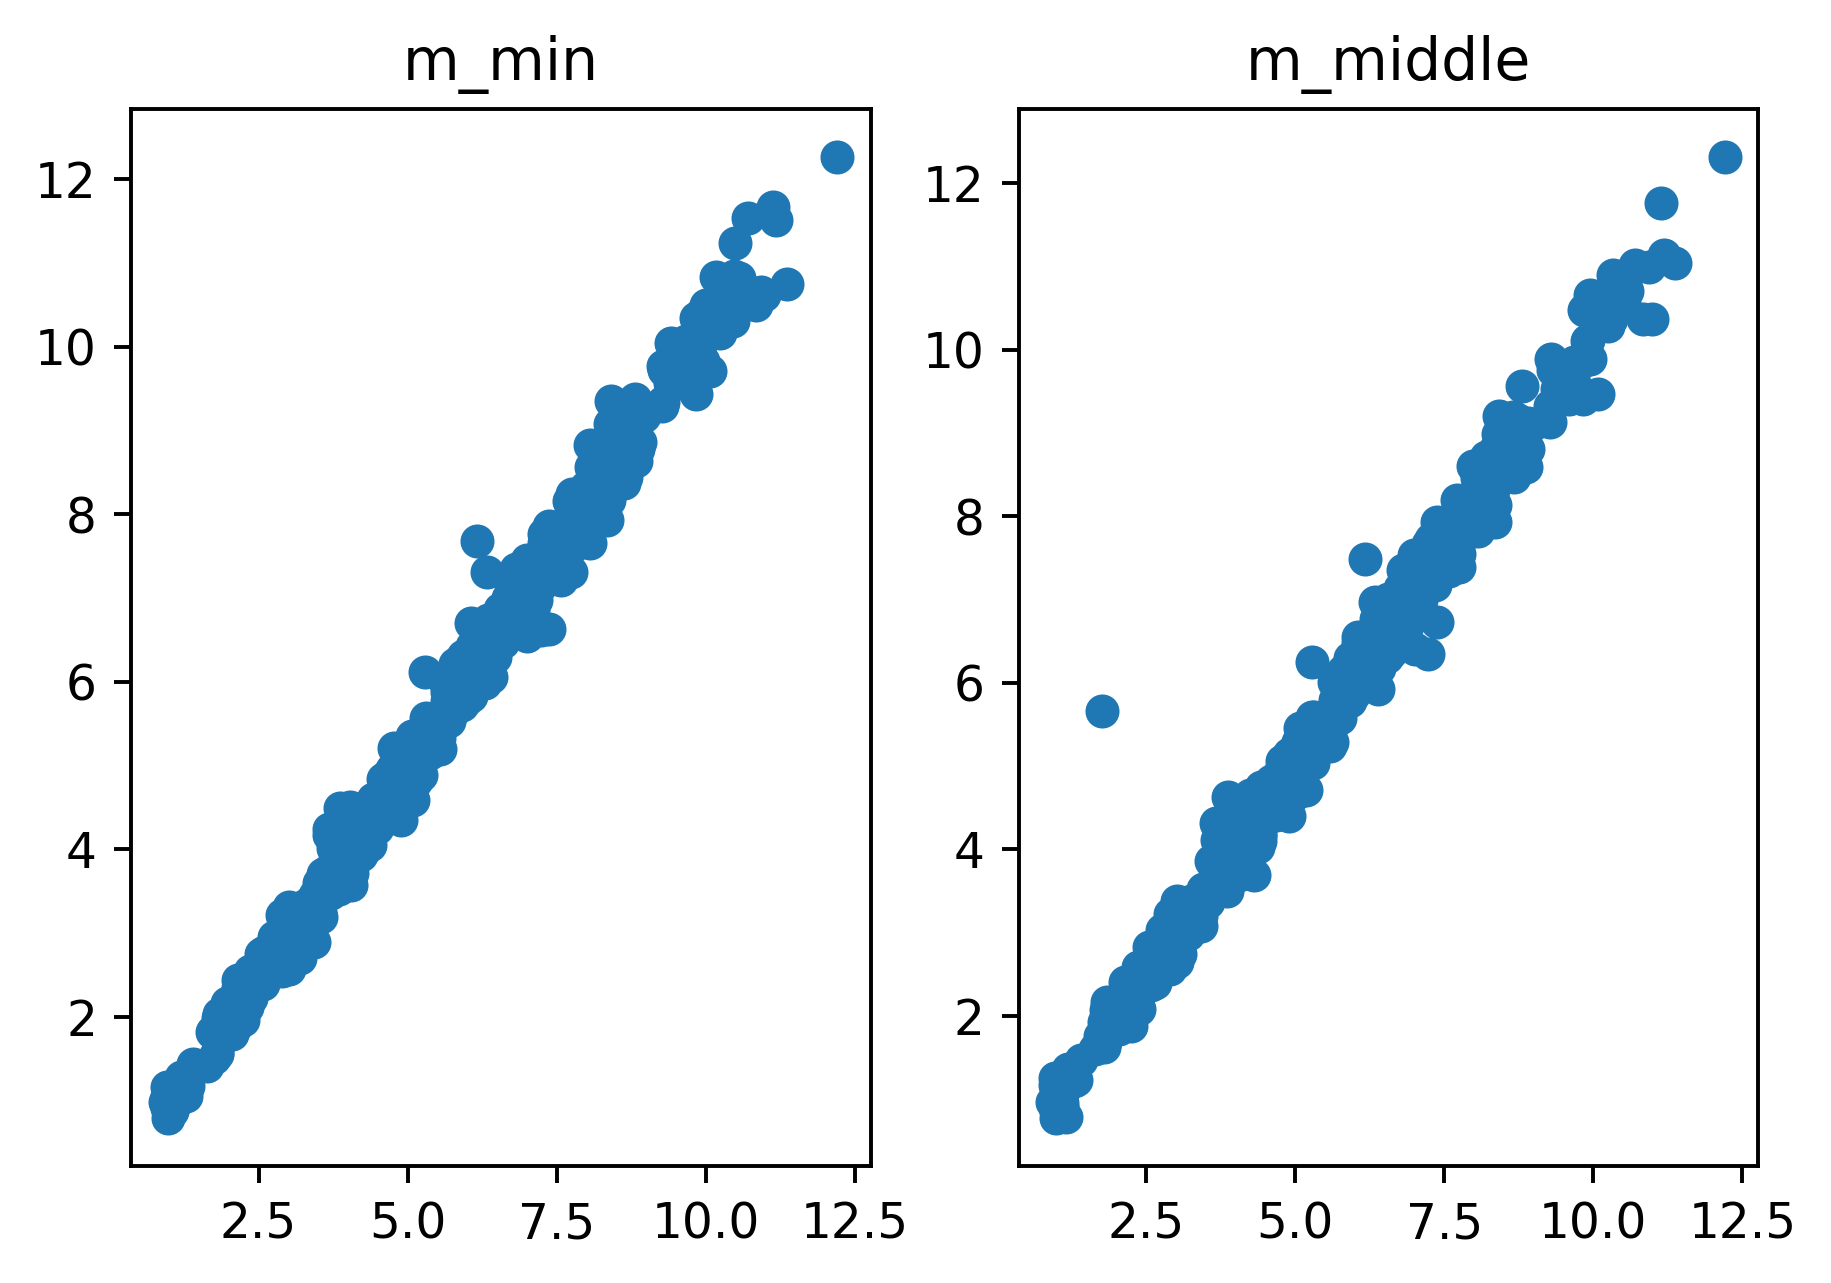

In [44]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(m_all, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_all, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_all, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_all, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(m_all, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_all, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_all, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

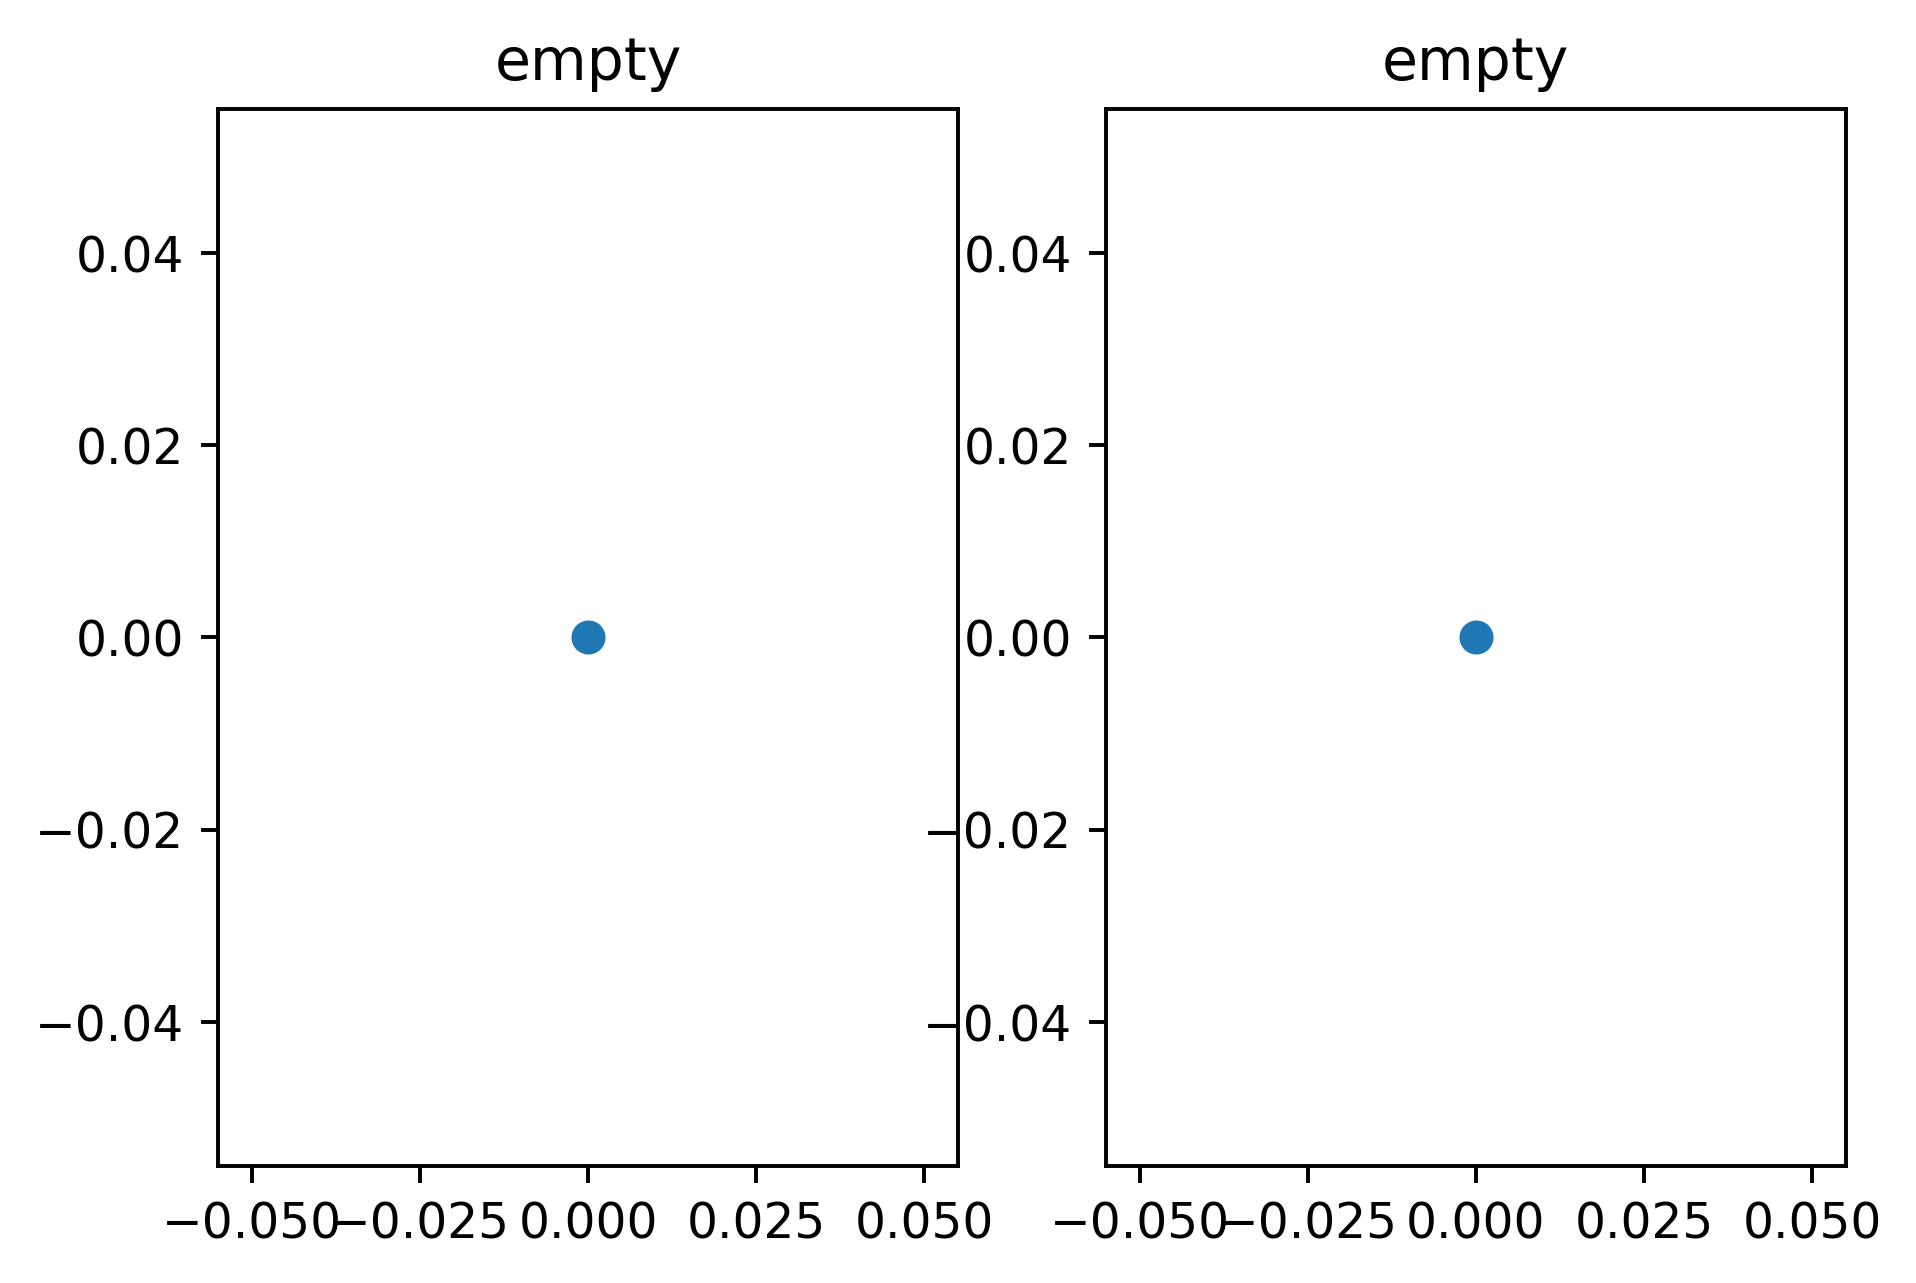

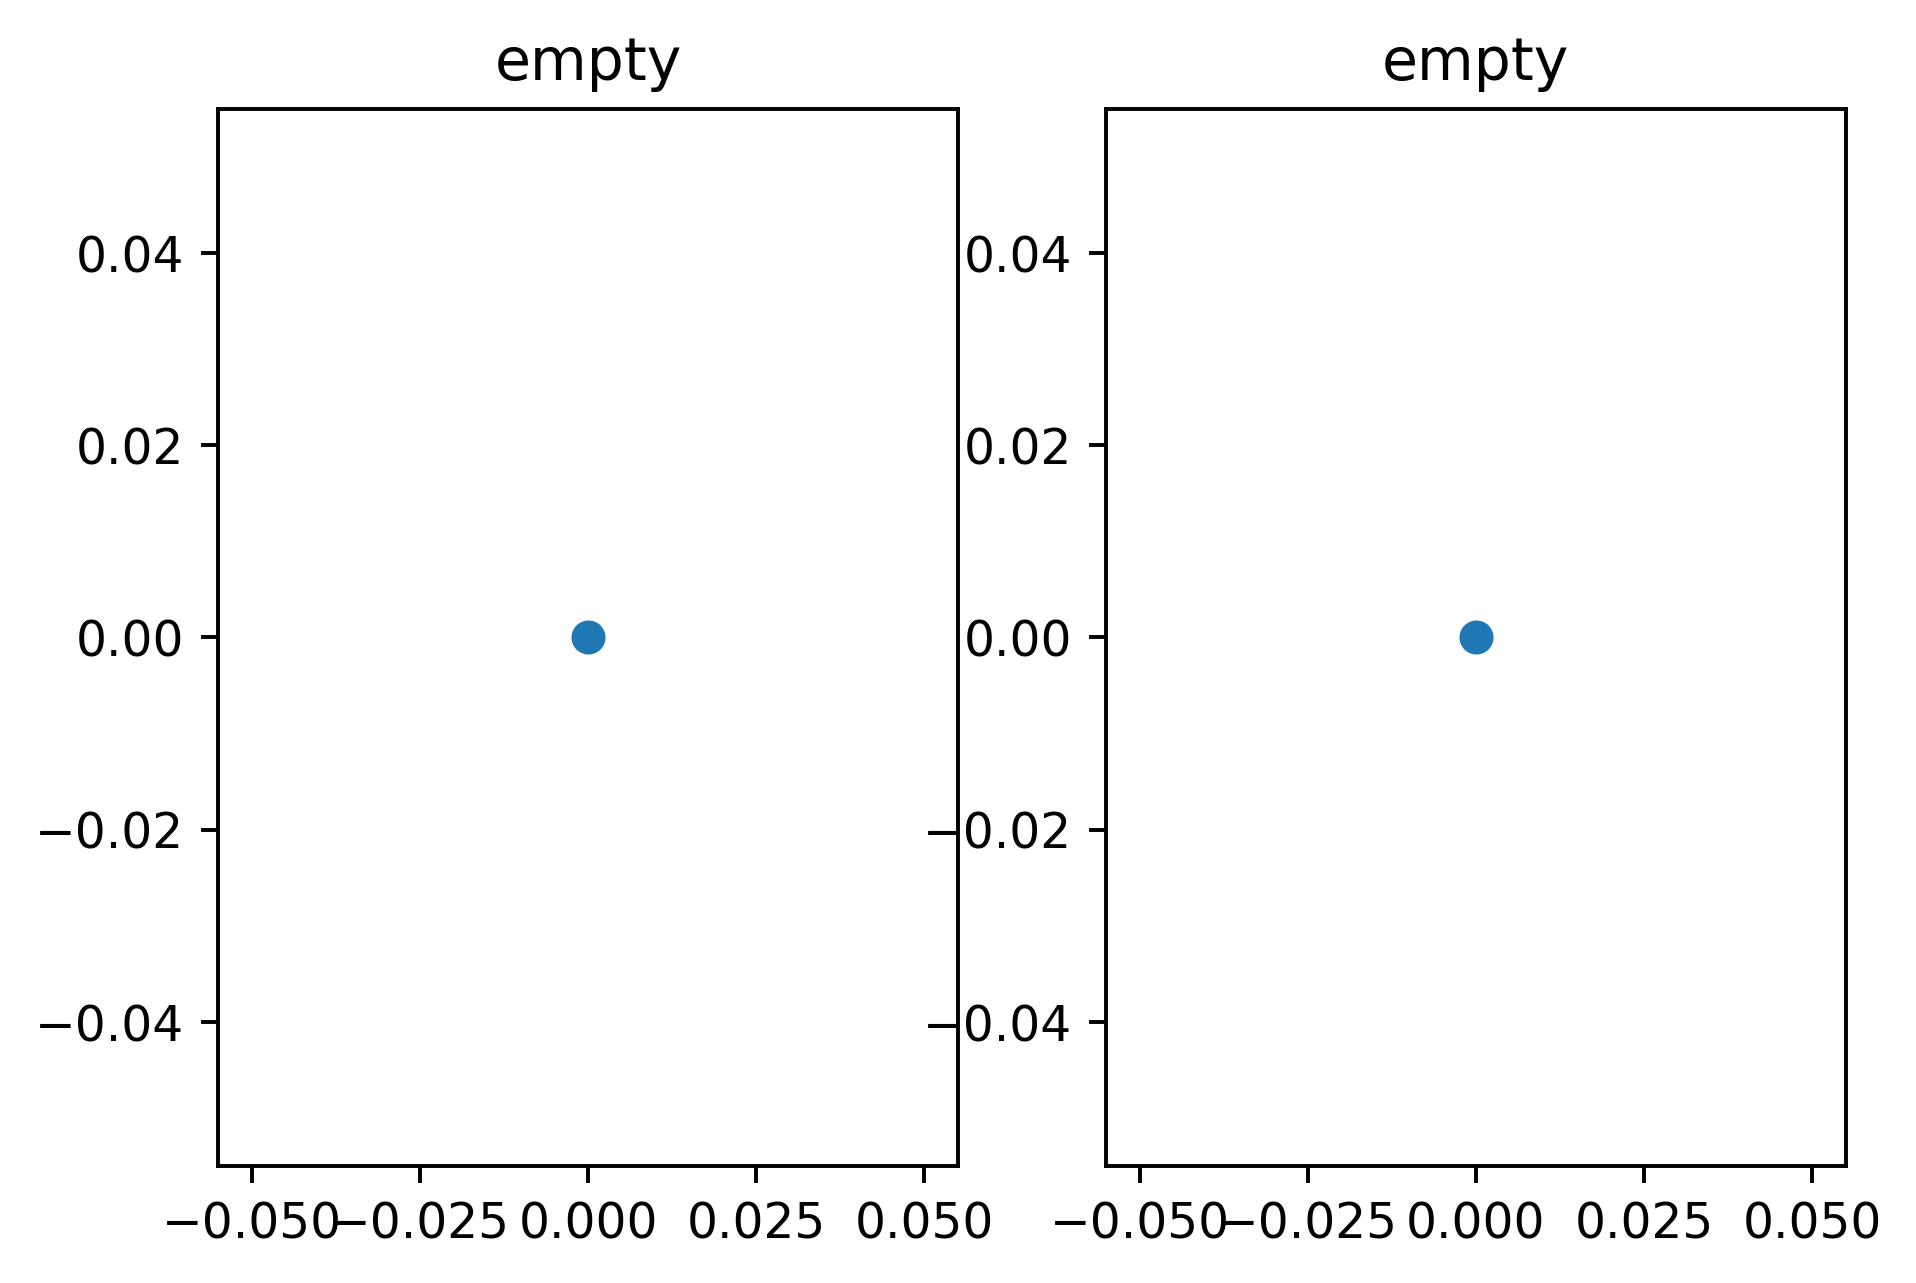

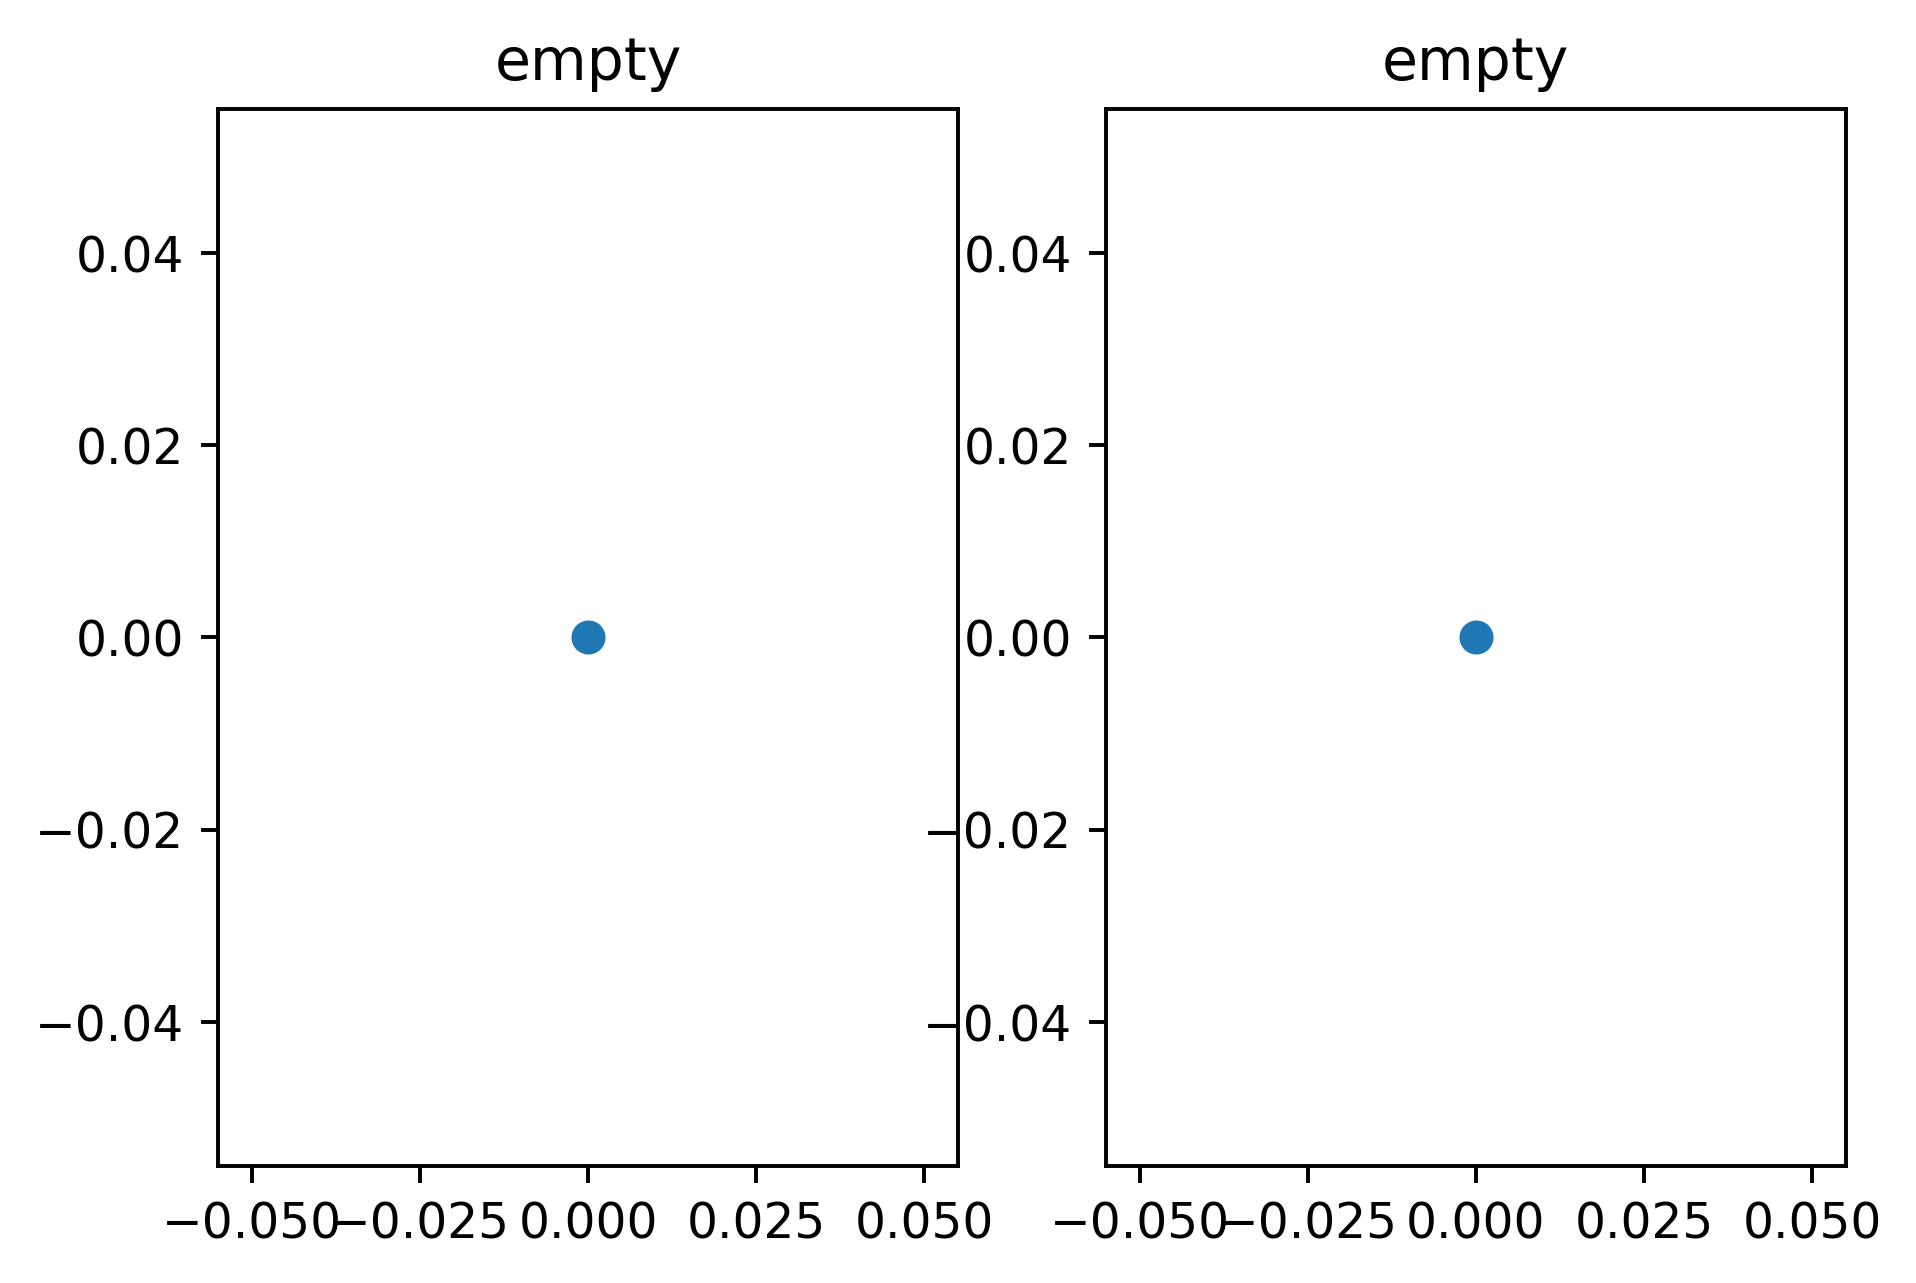

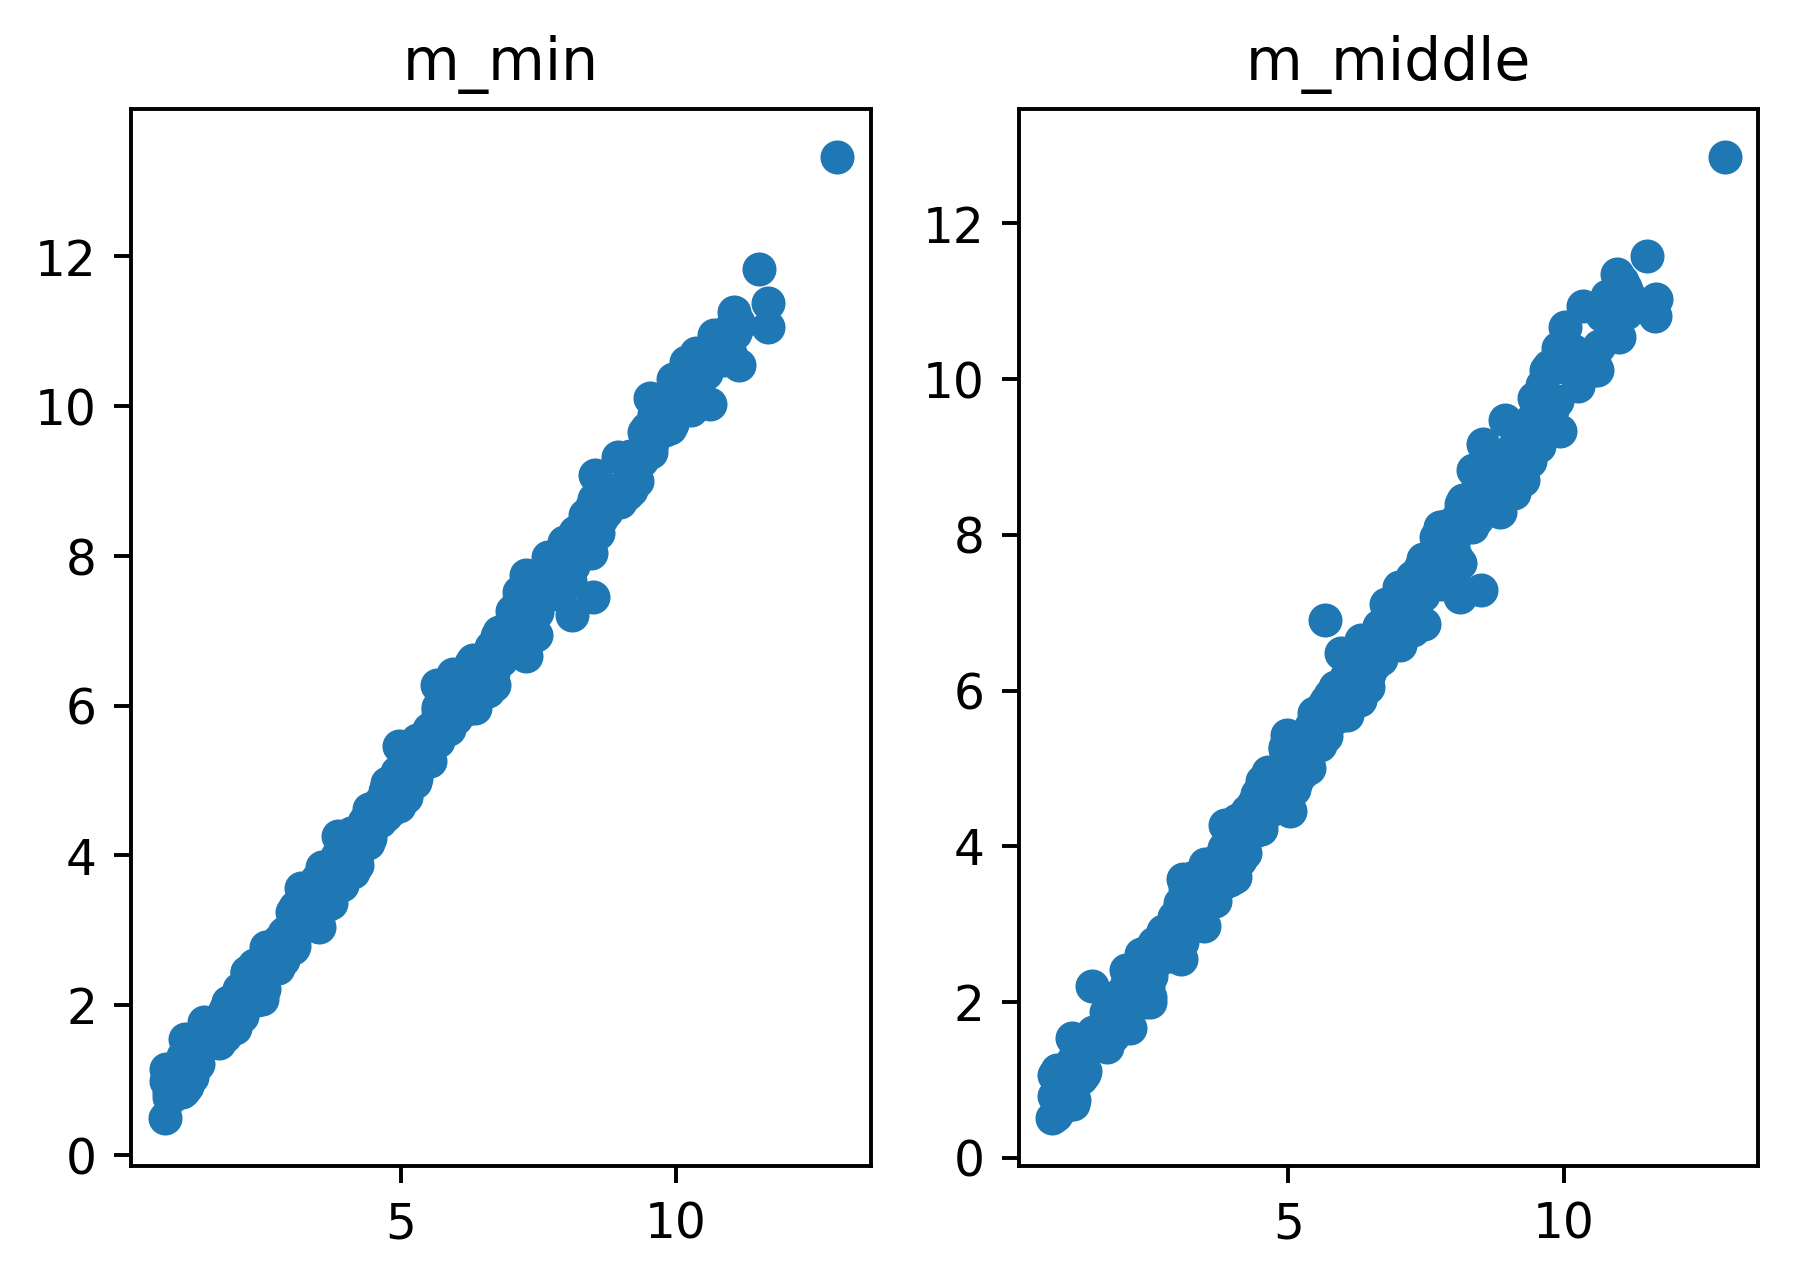

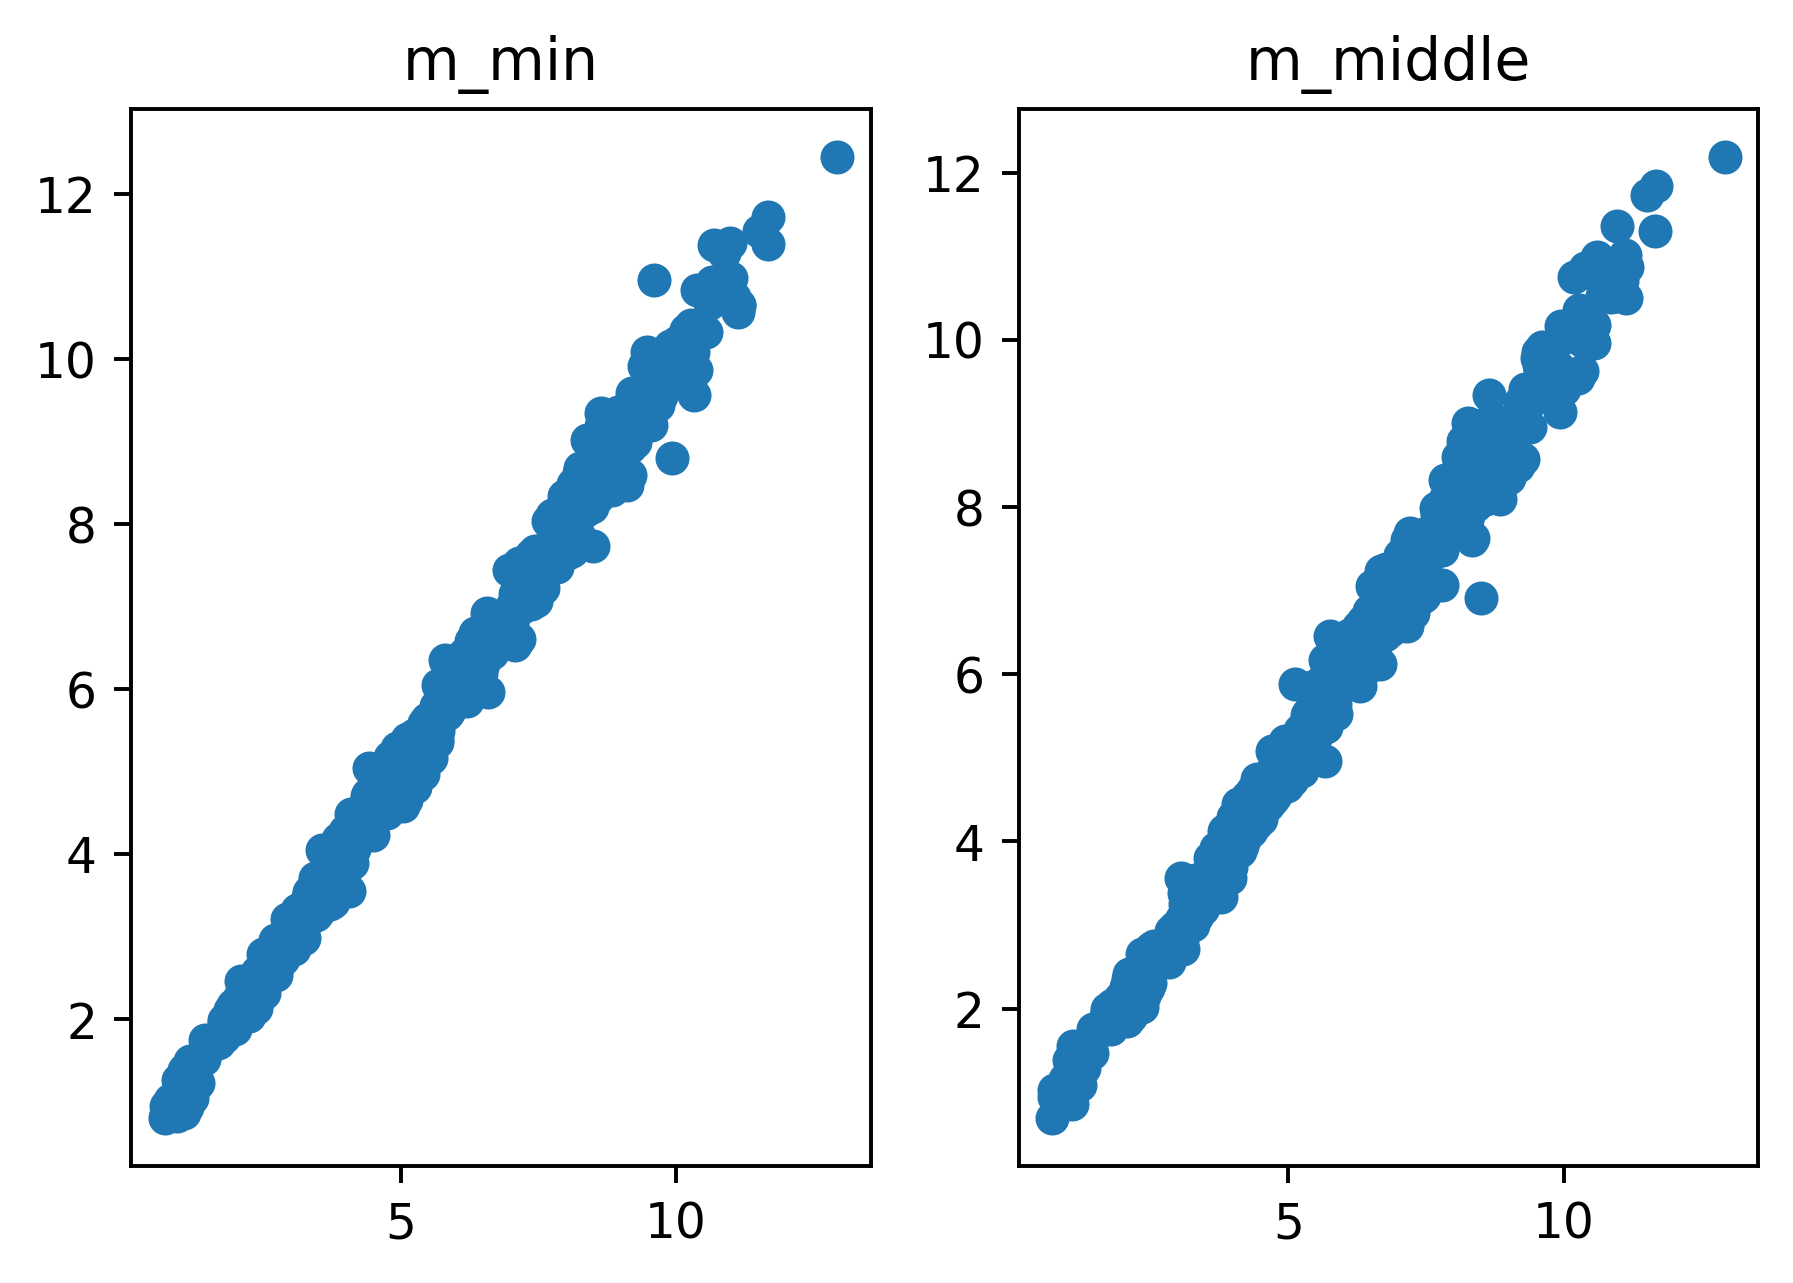

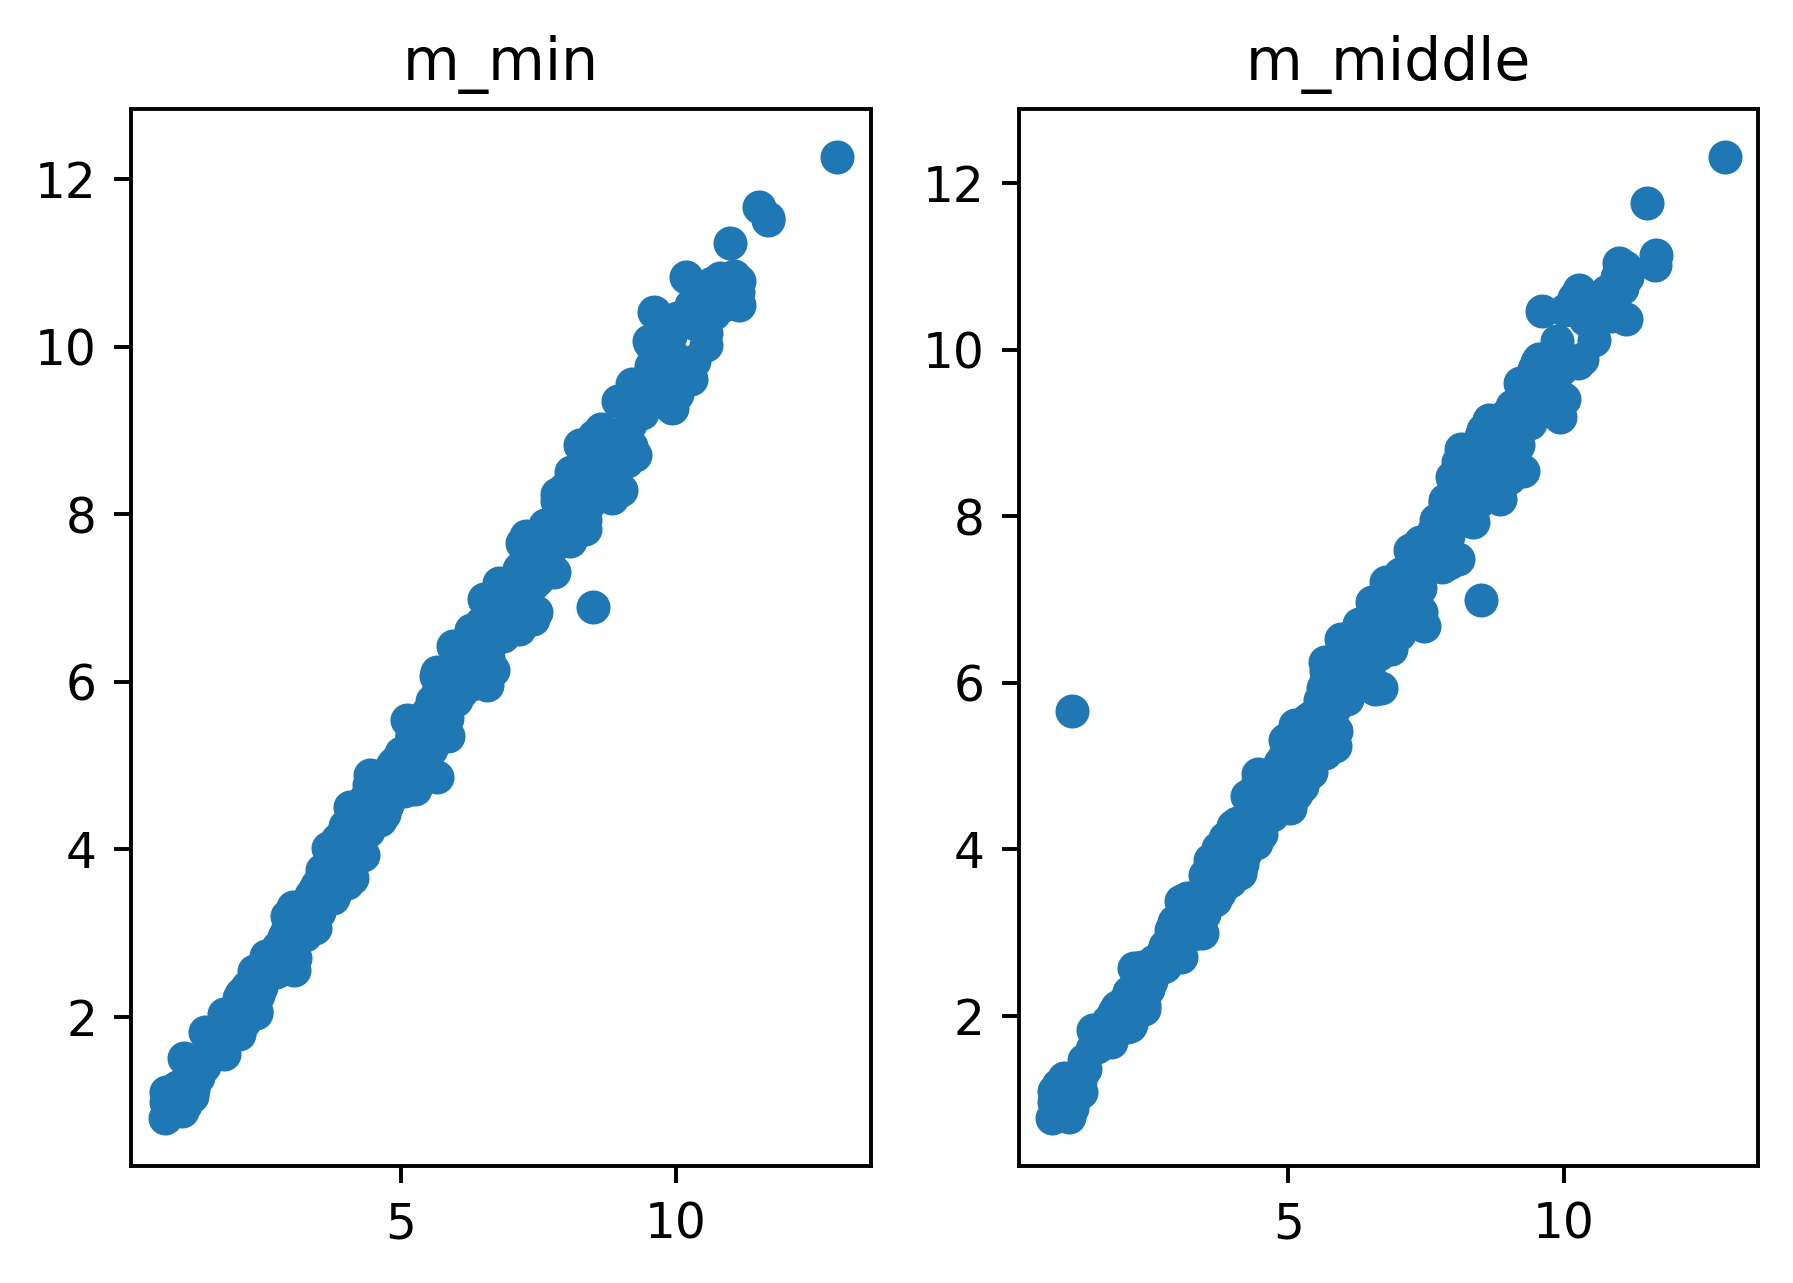

In [43]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_min, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(b4_min, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_min, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(b4_min, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_min, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b4_min, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

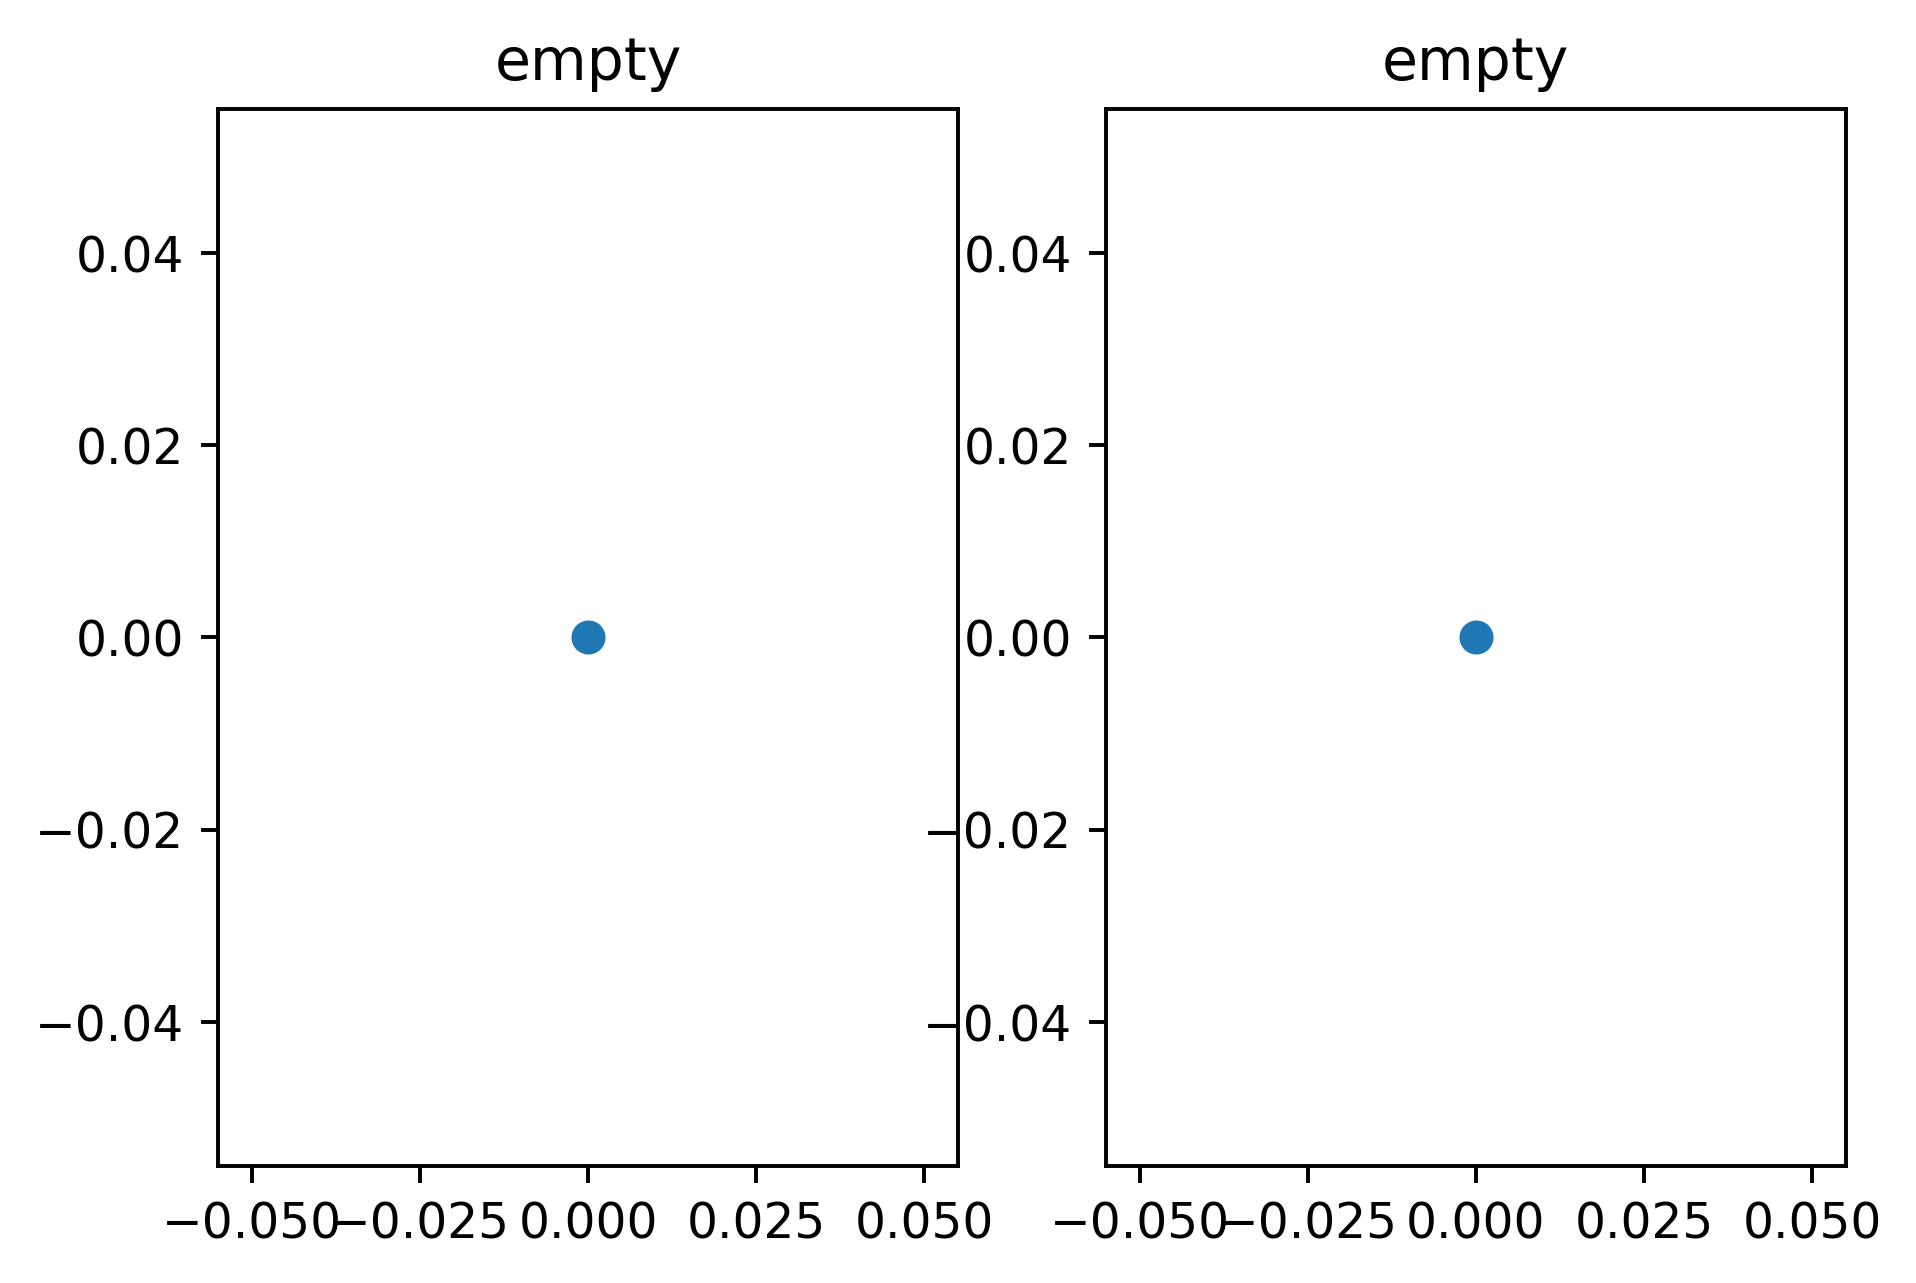

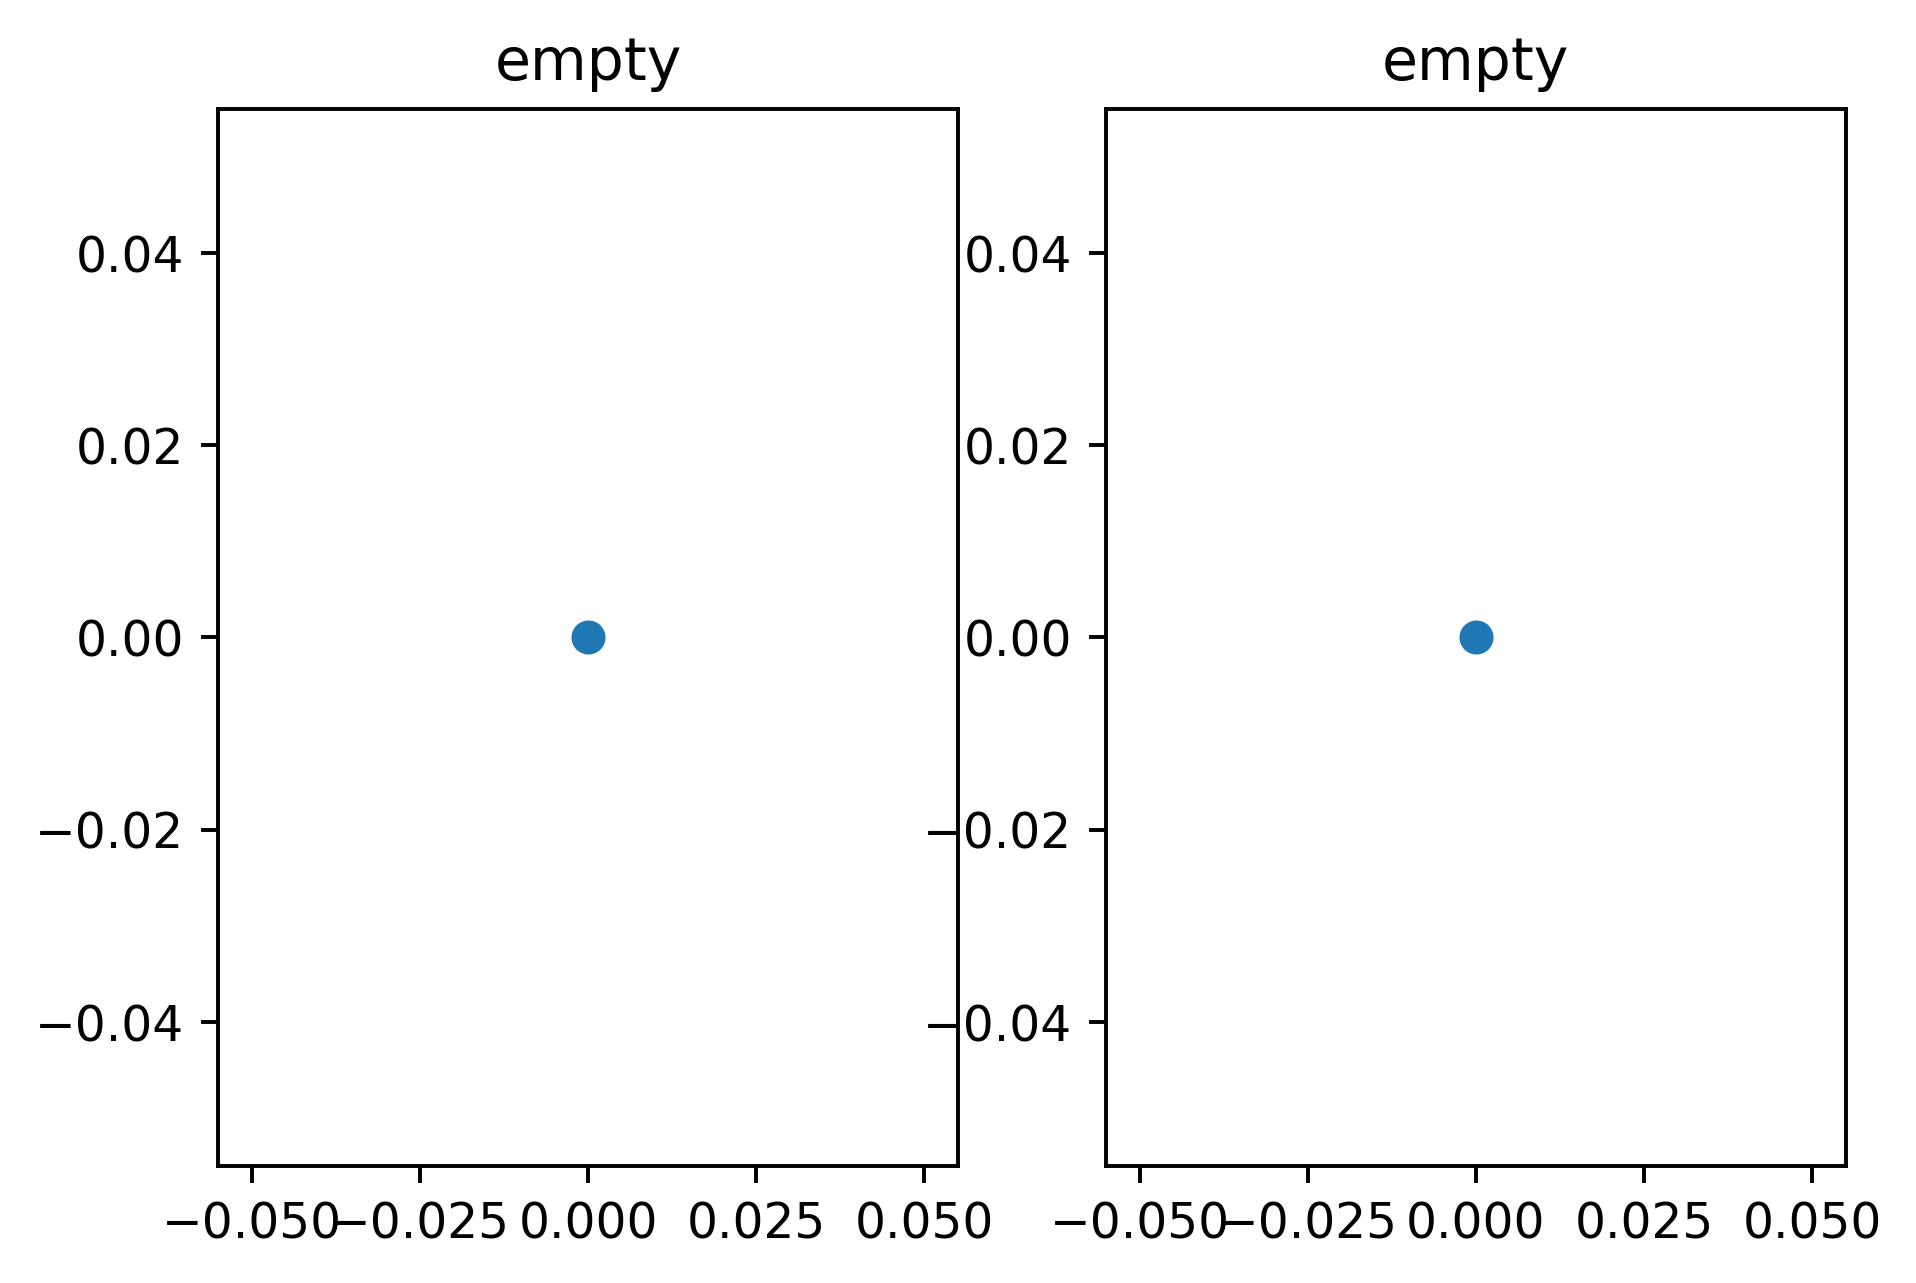

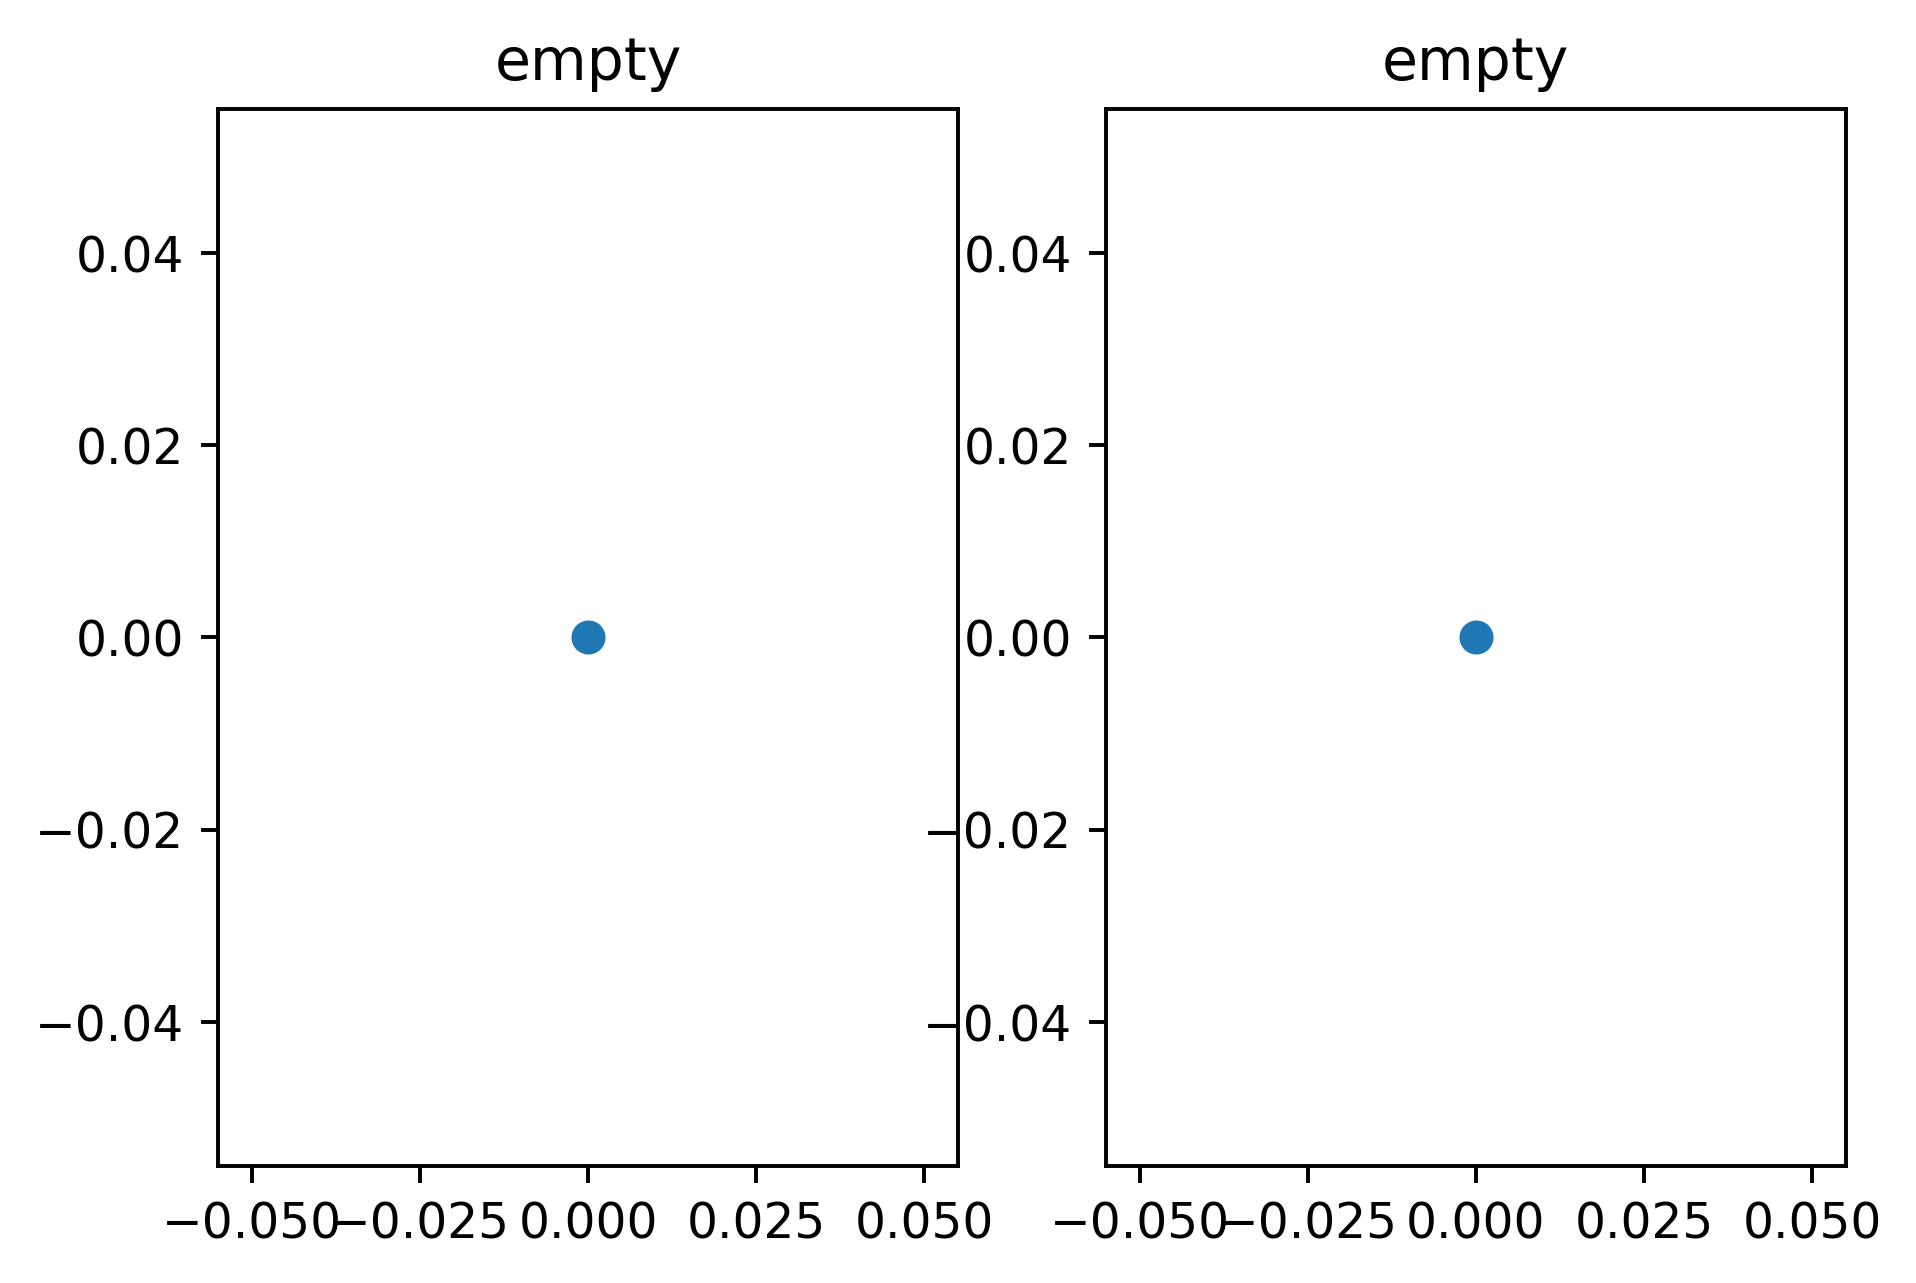

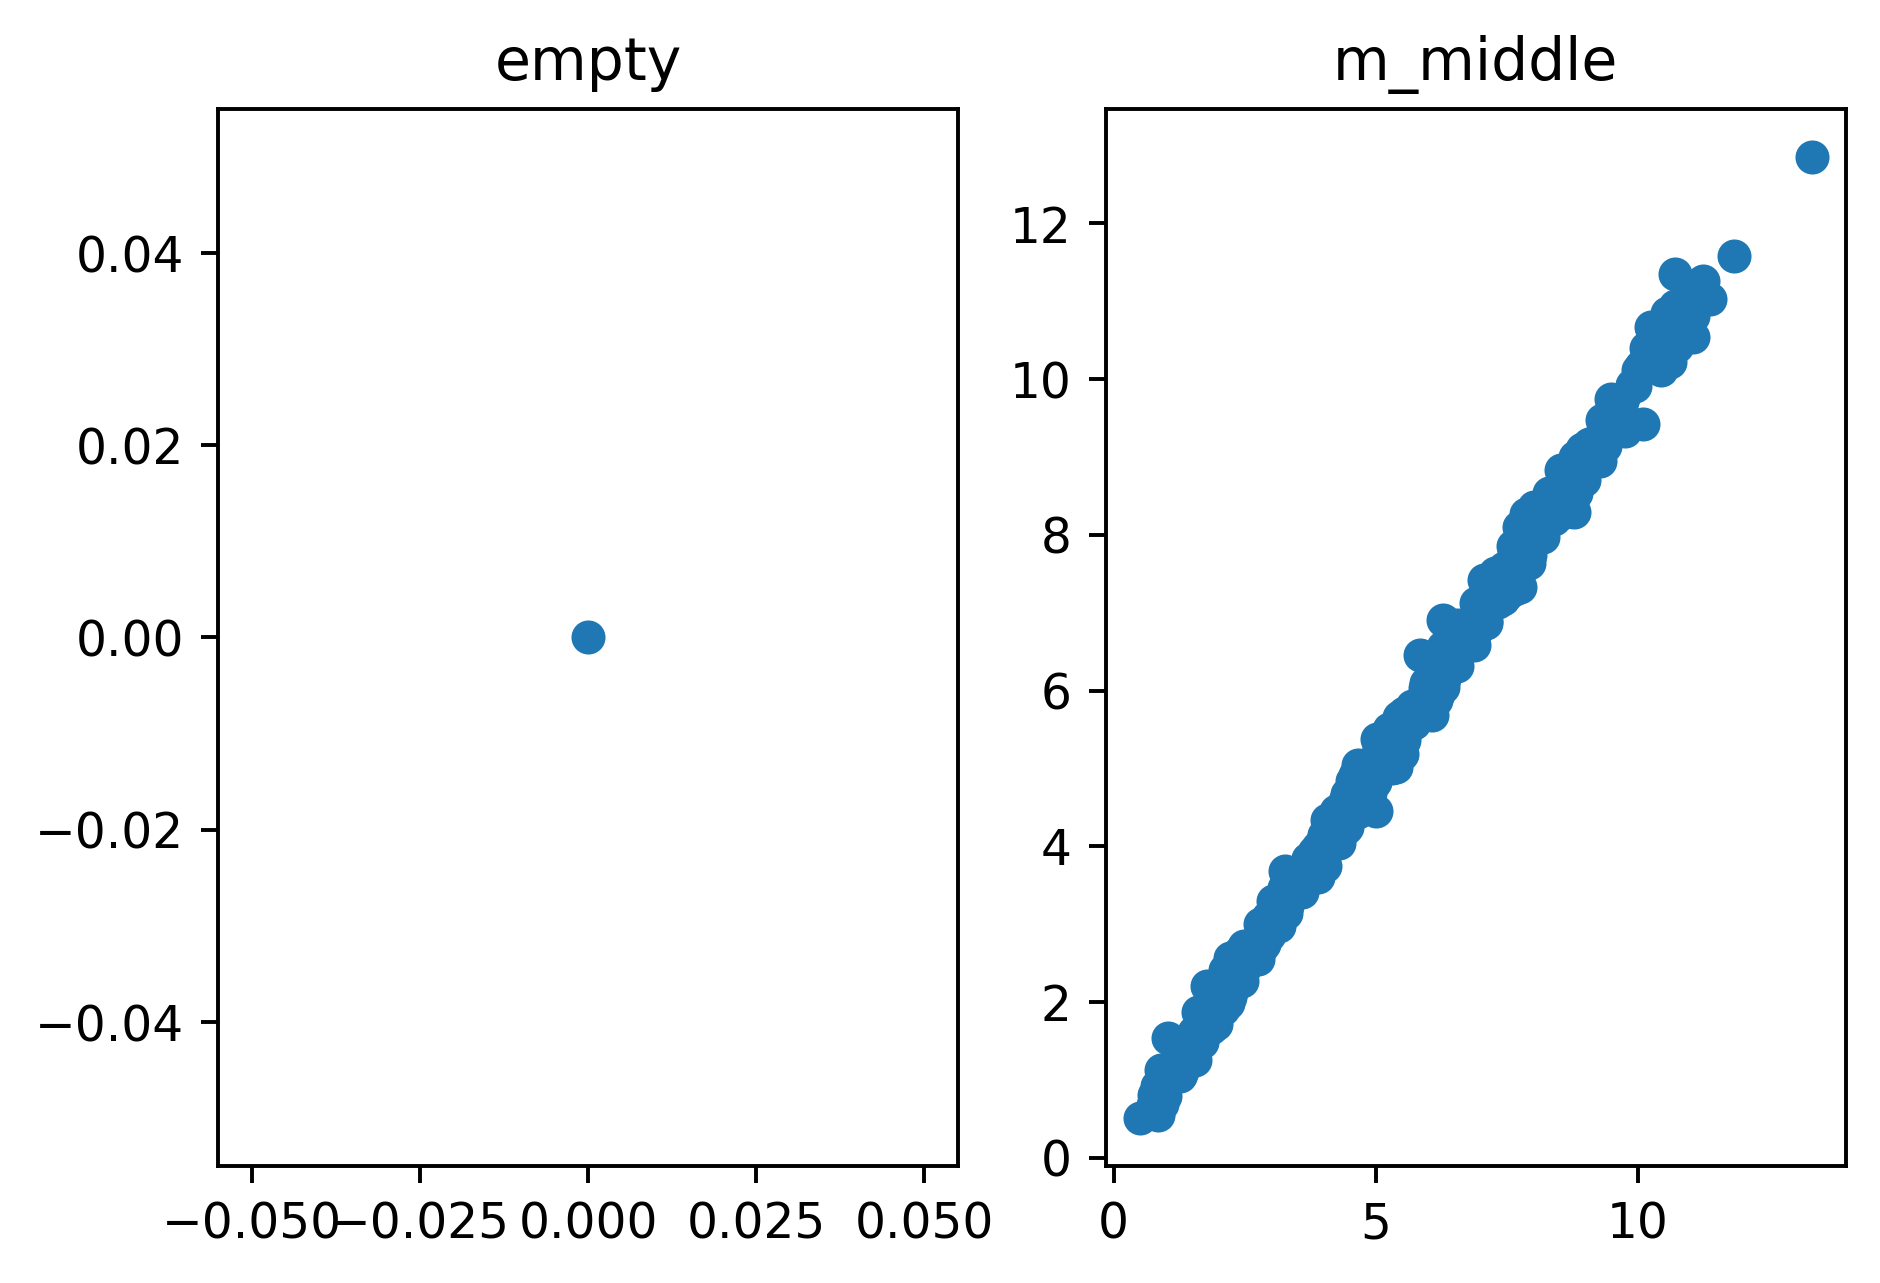

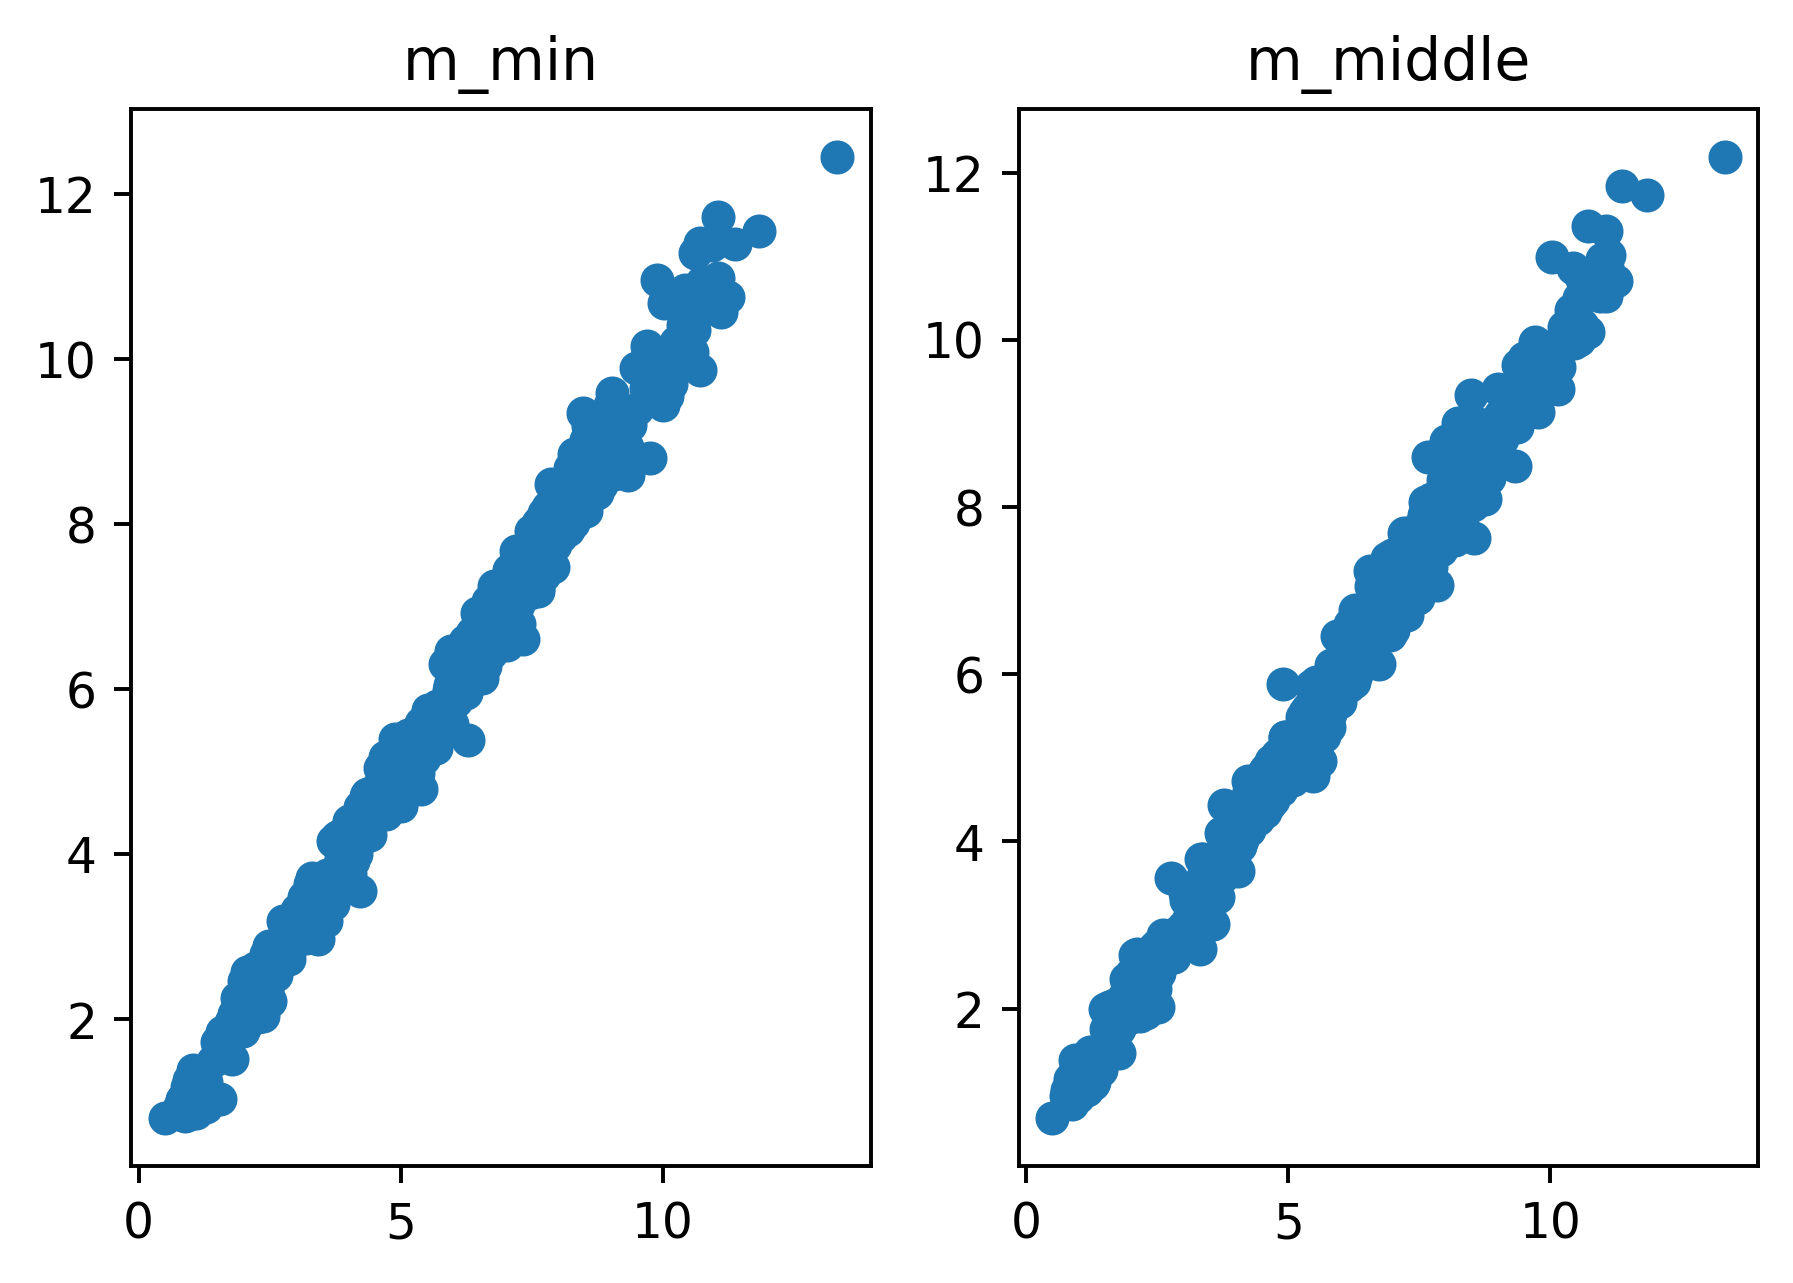

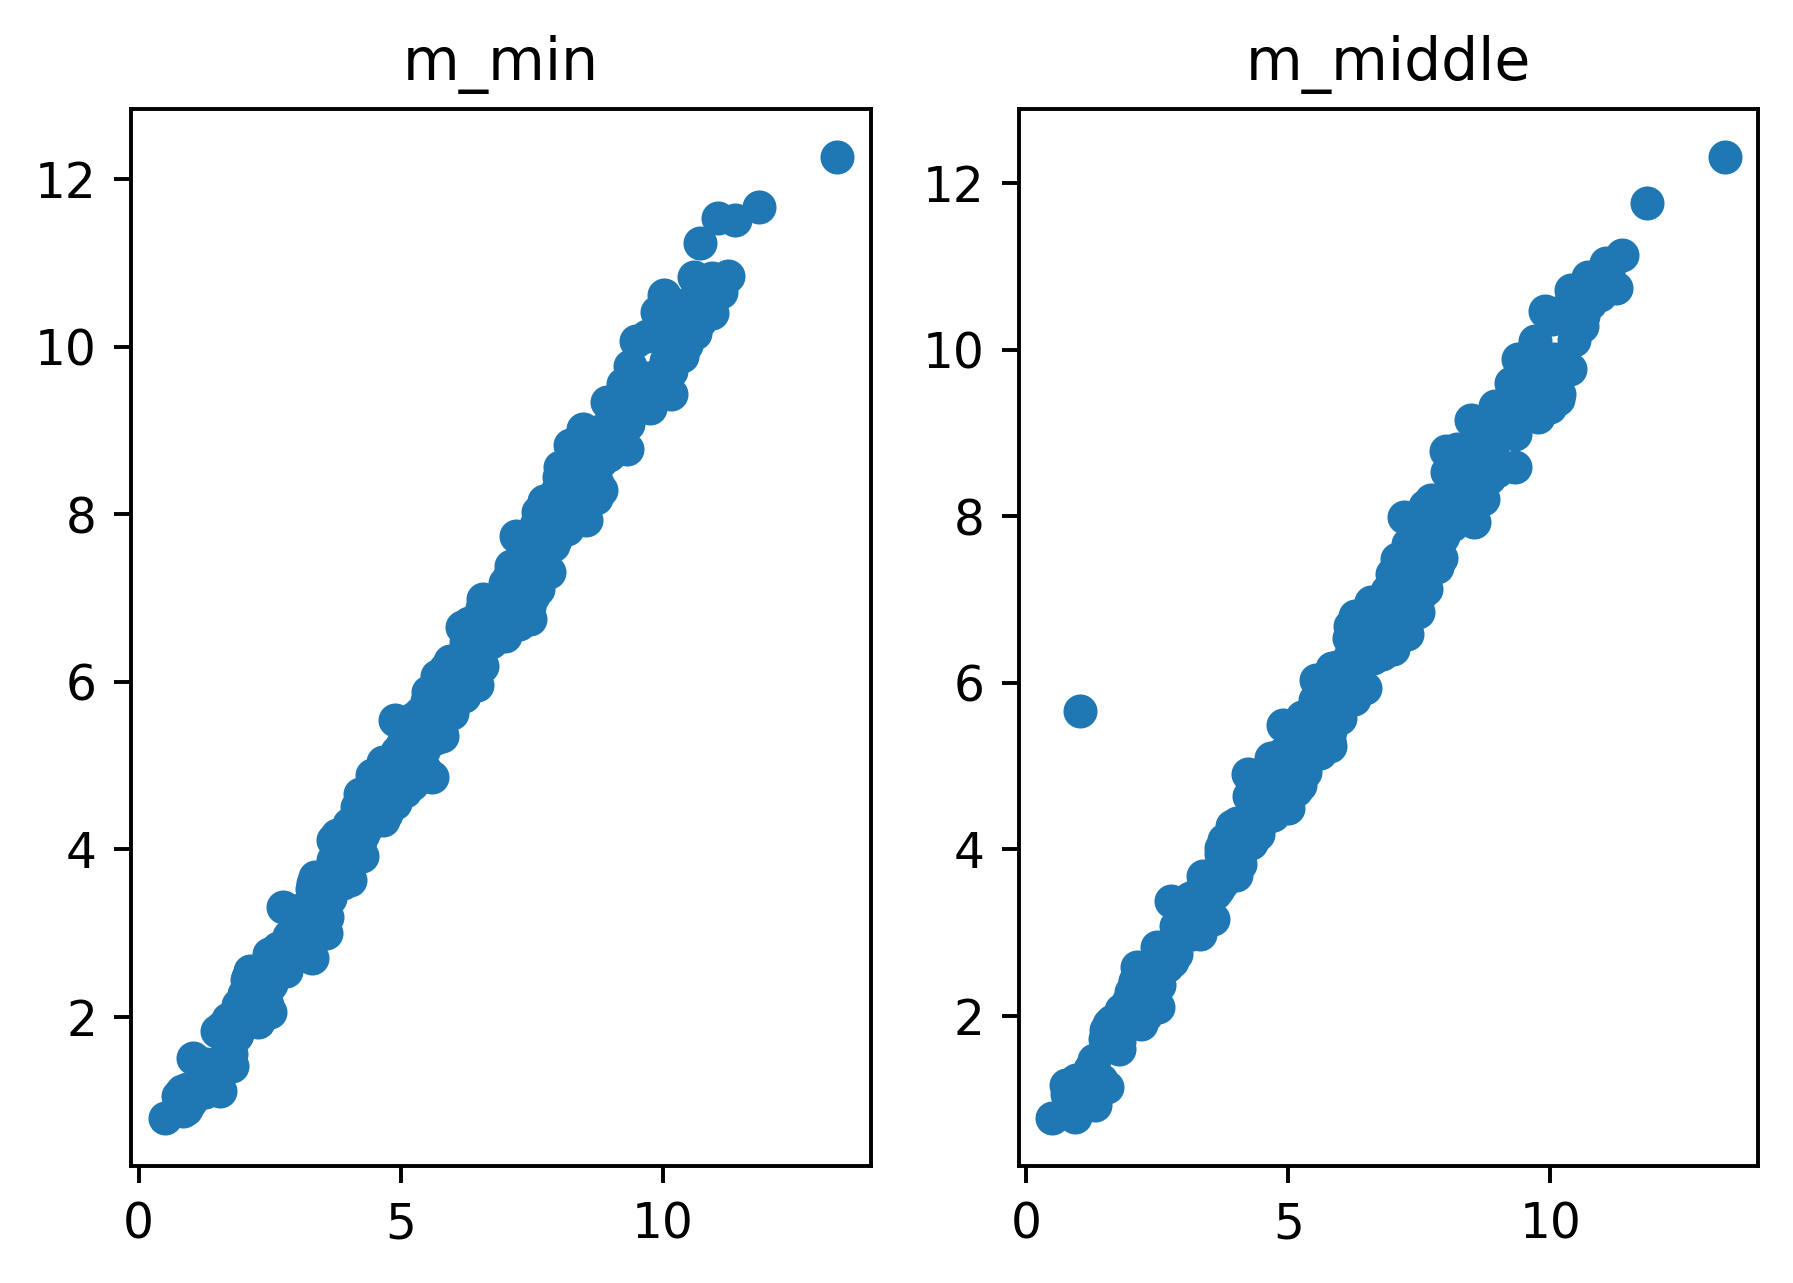

In [42]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(b4_middle, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_middle, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(b4_middle, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_middle, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b4_middle, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

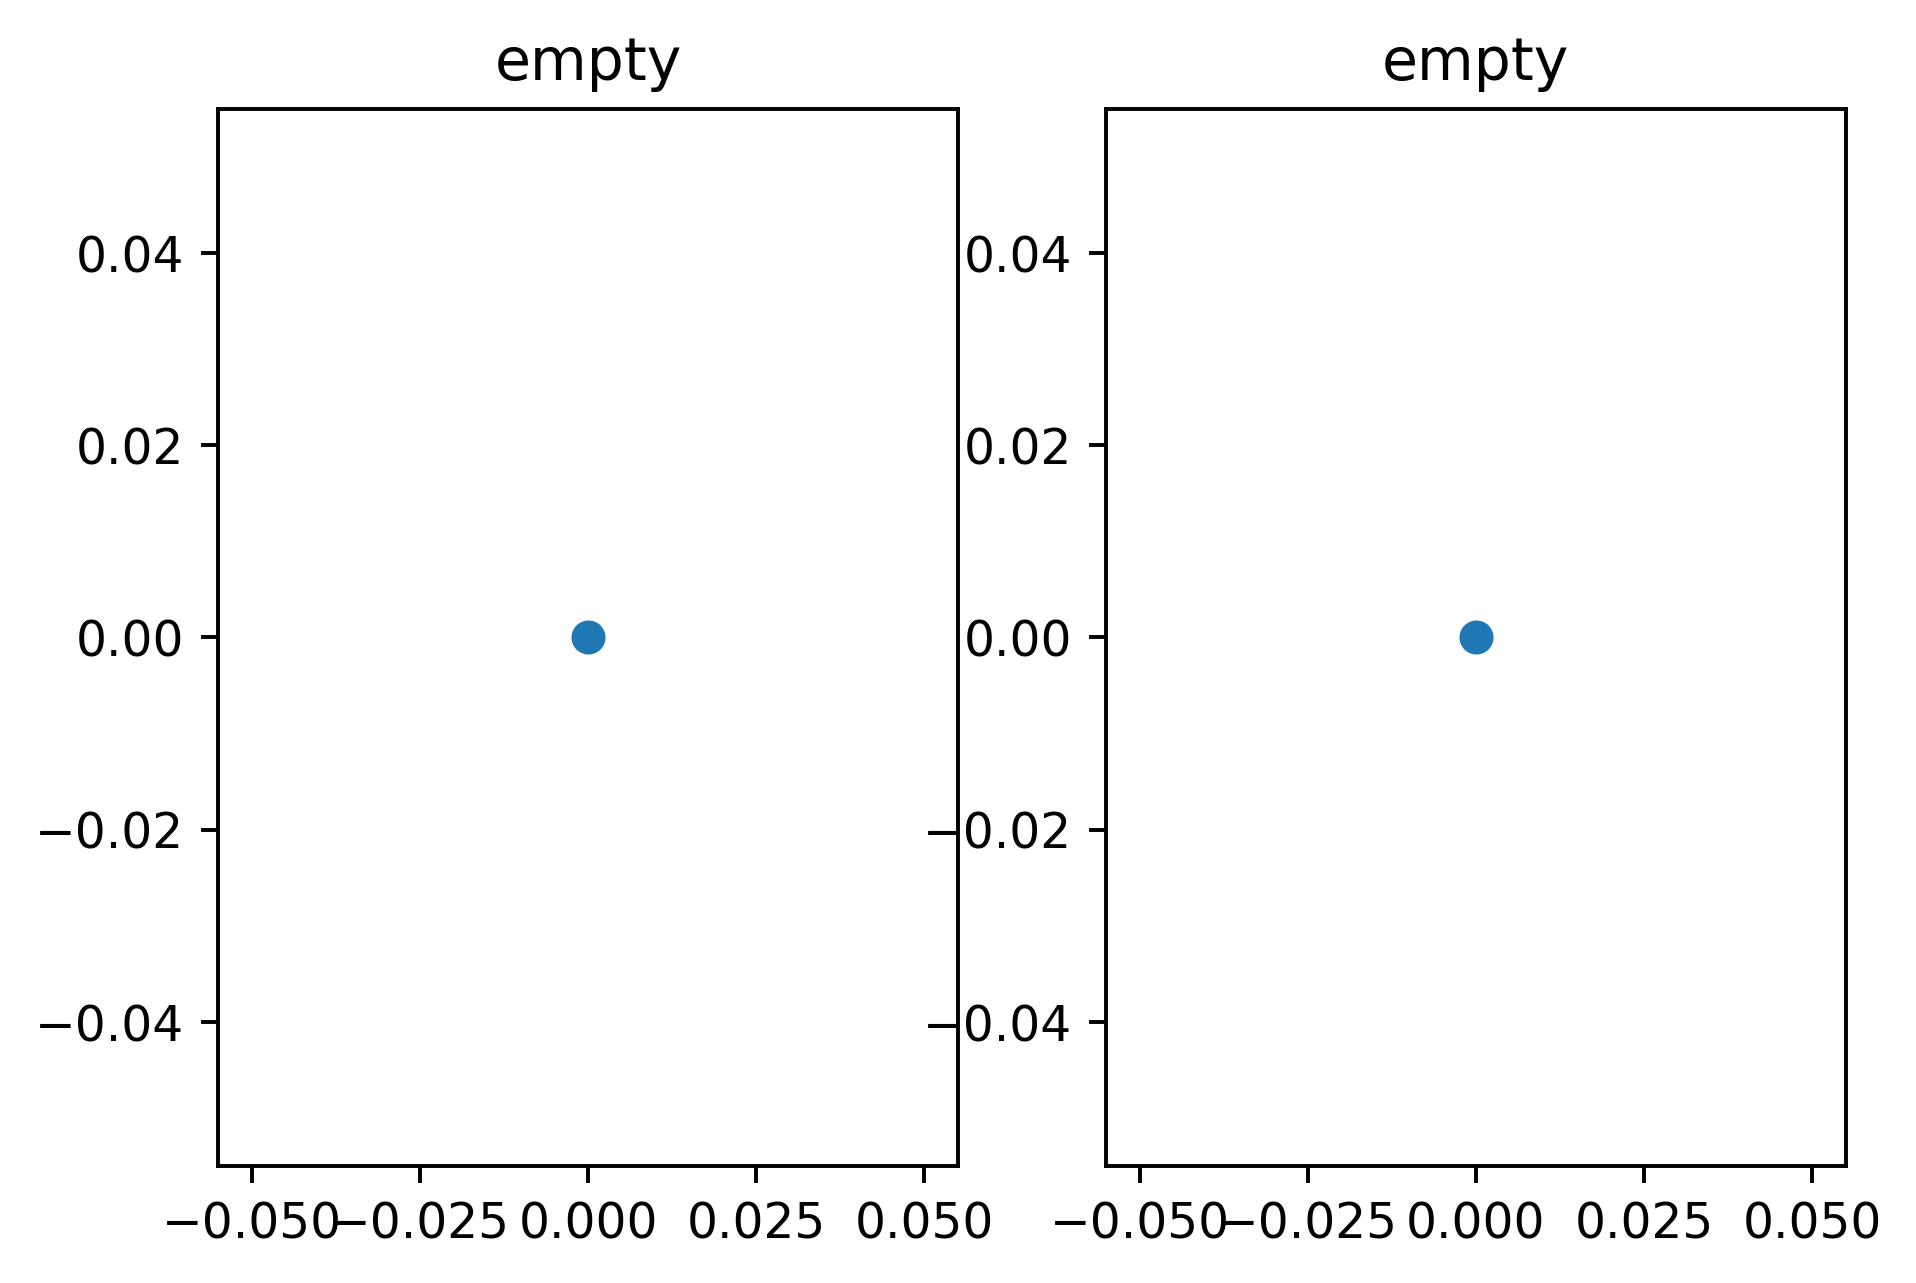

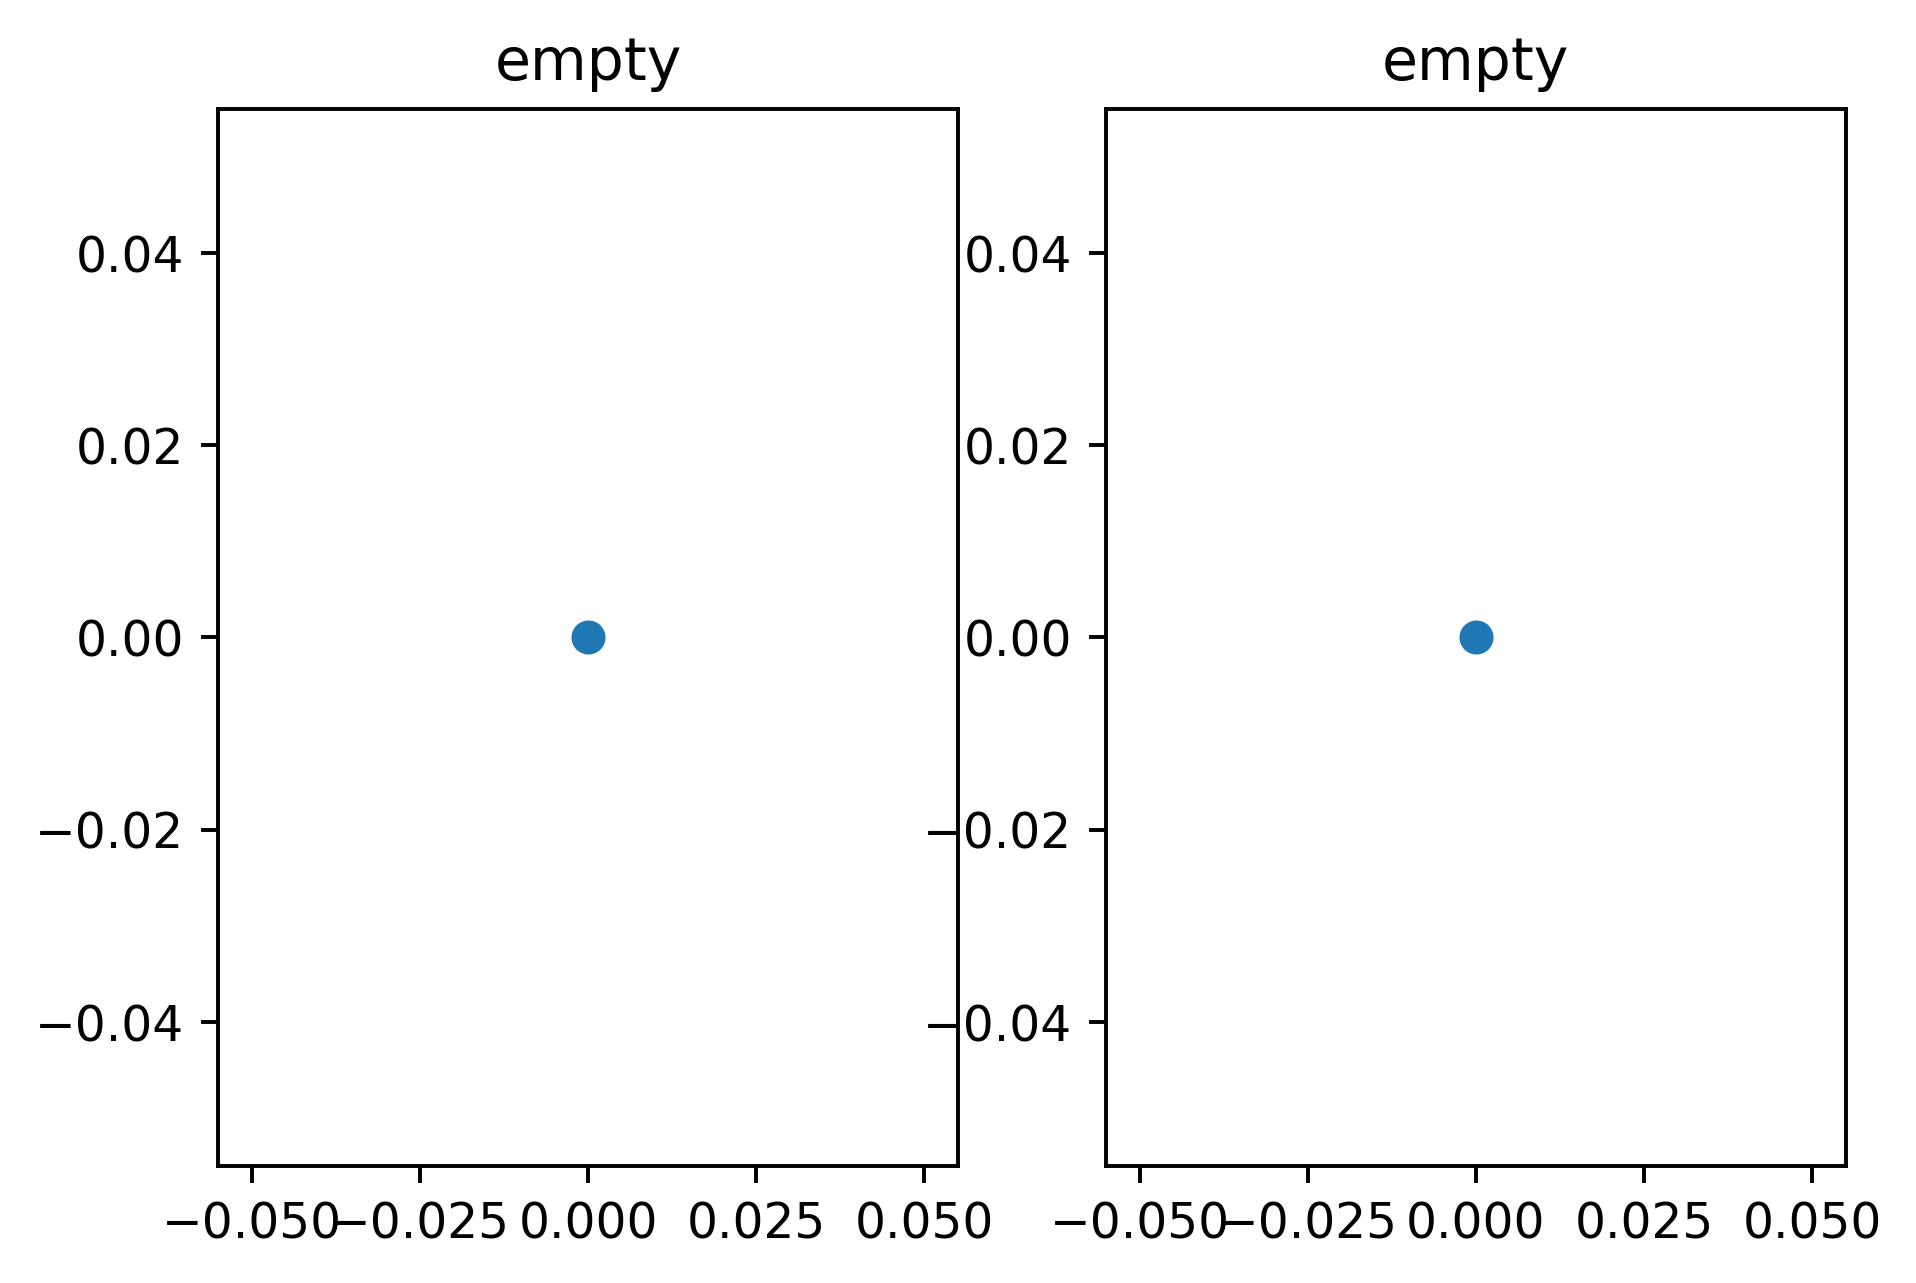

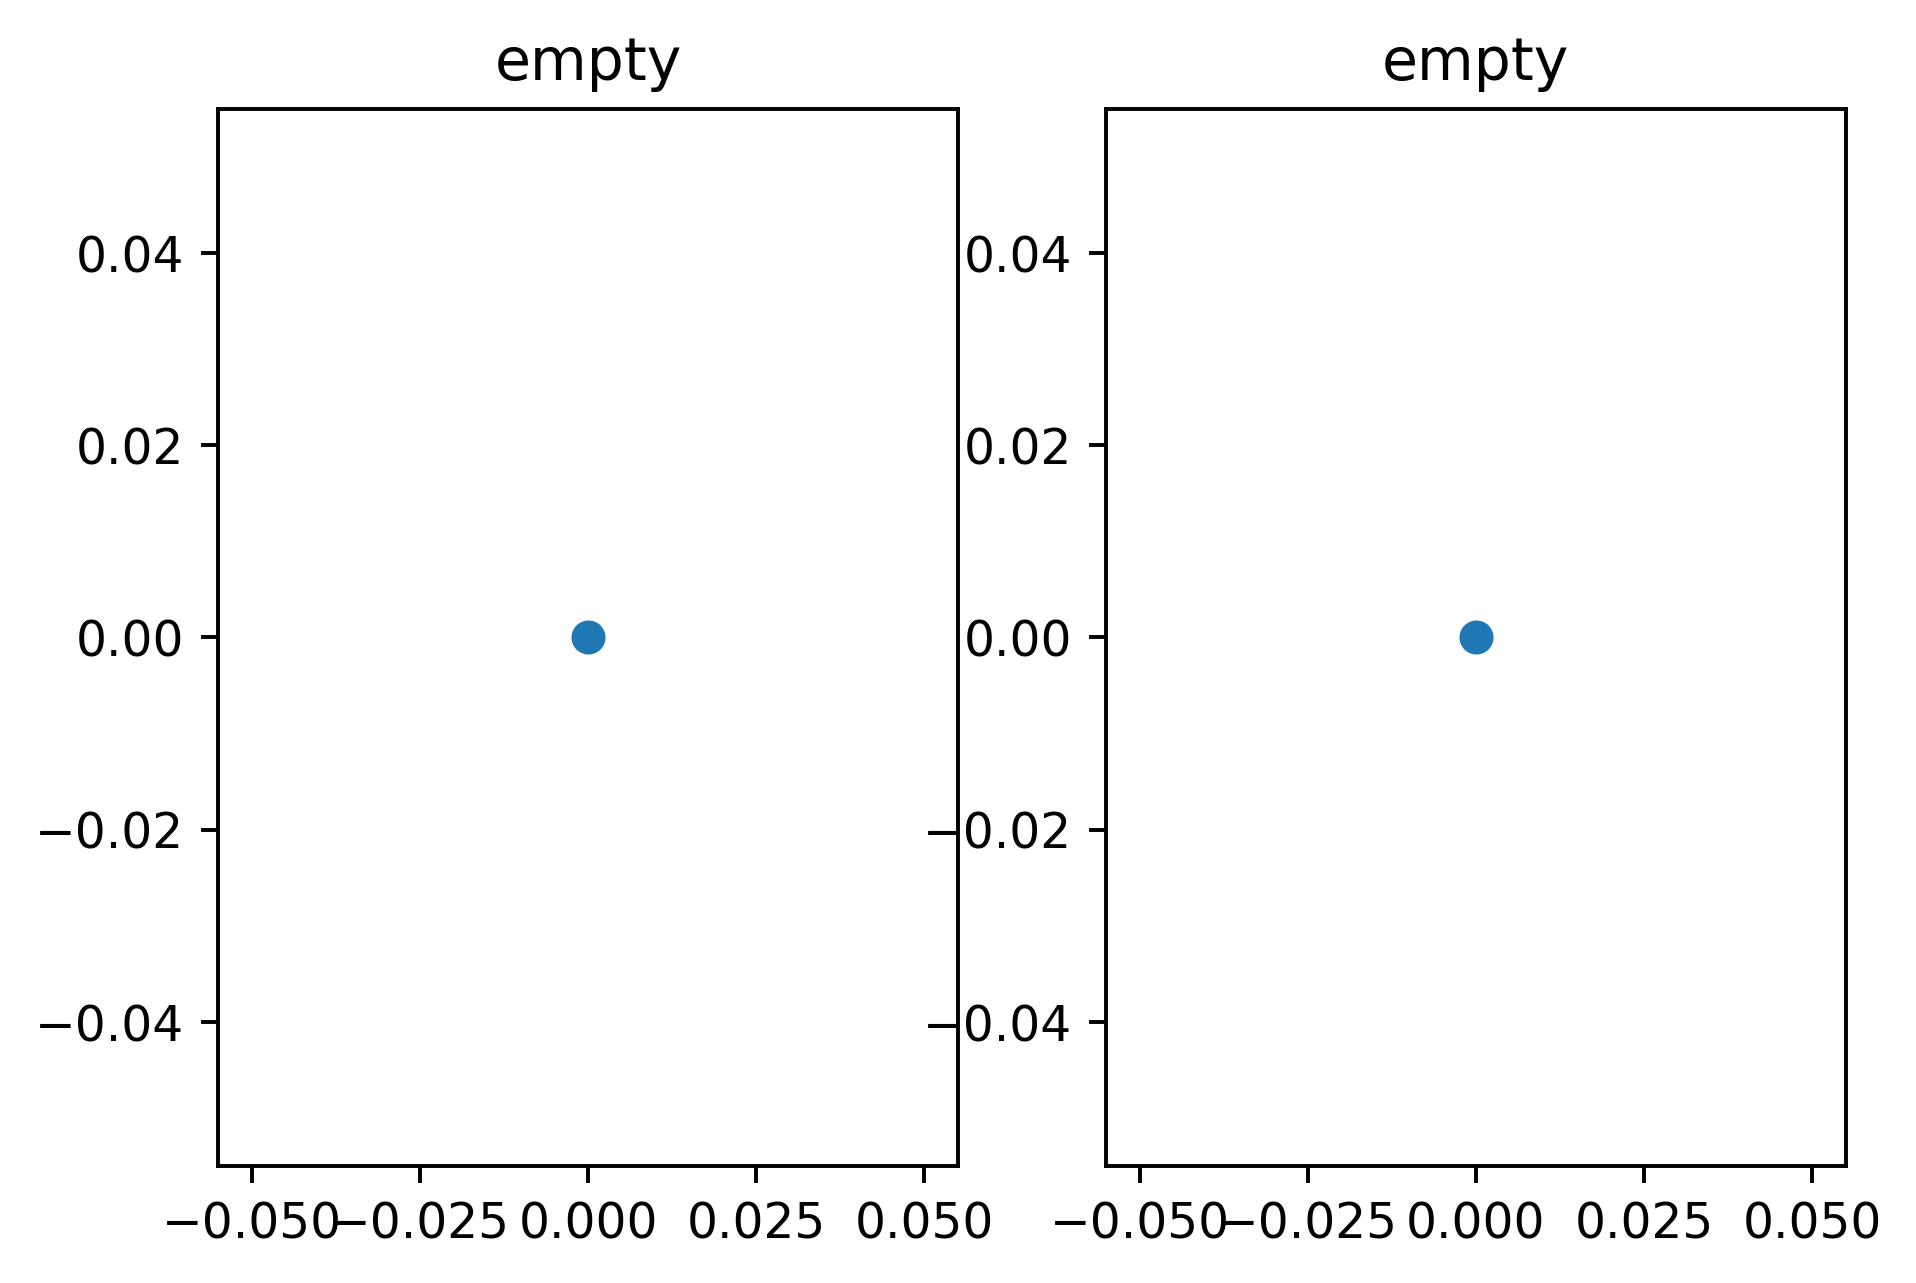

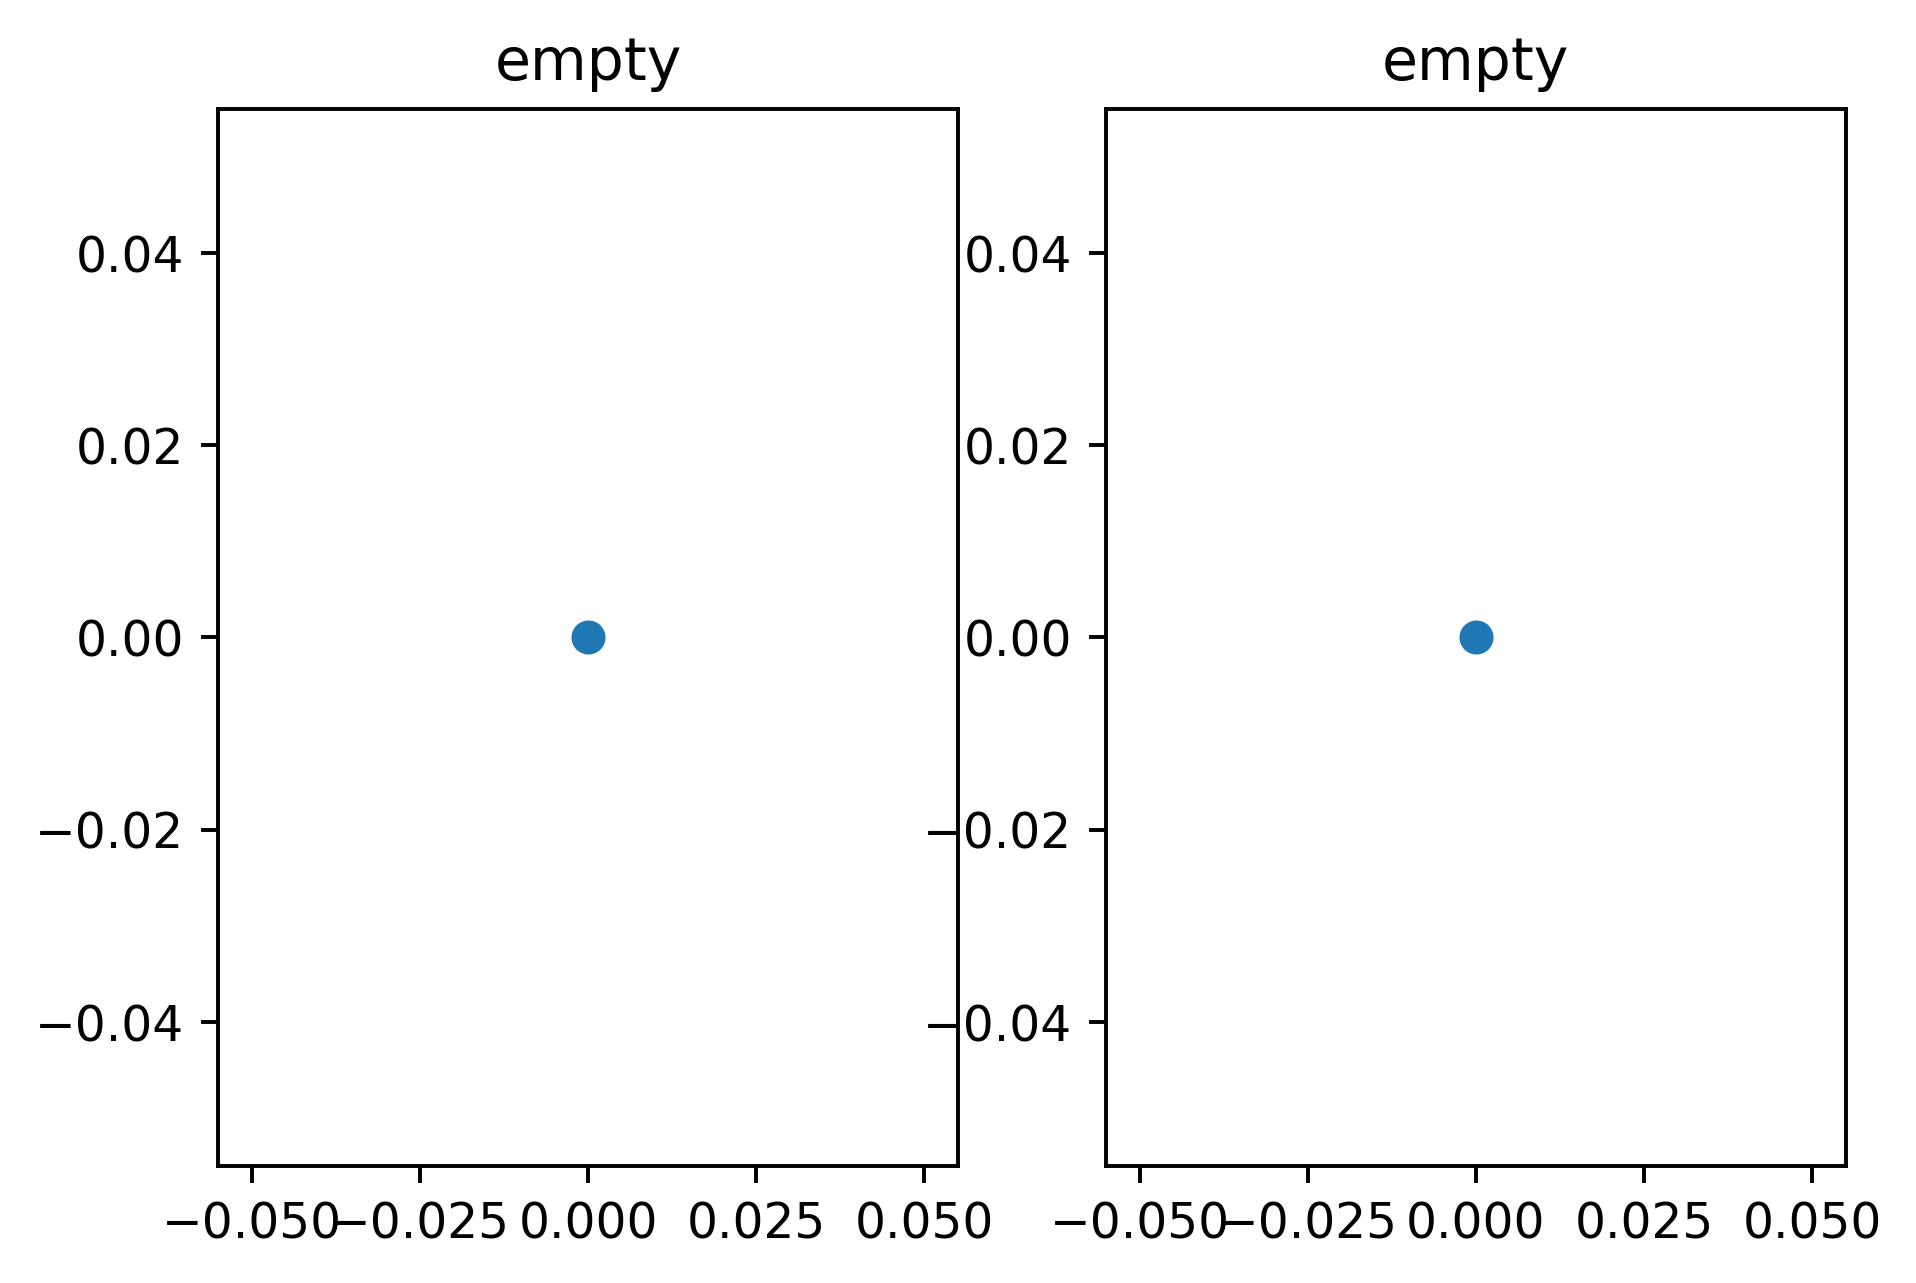

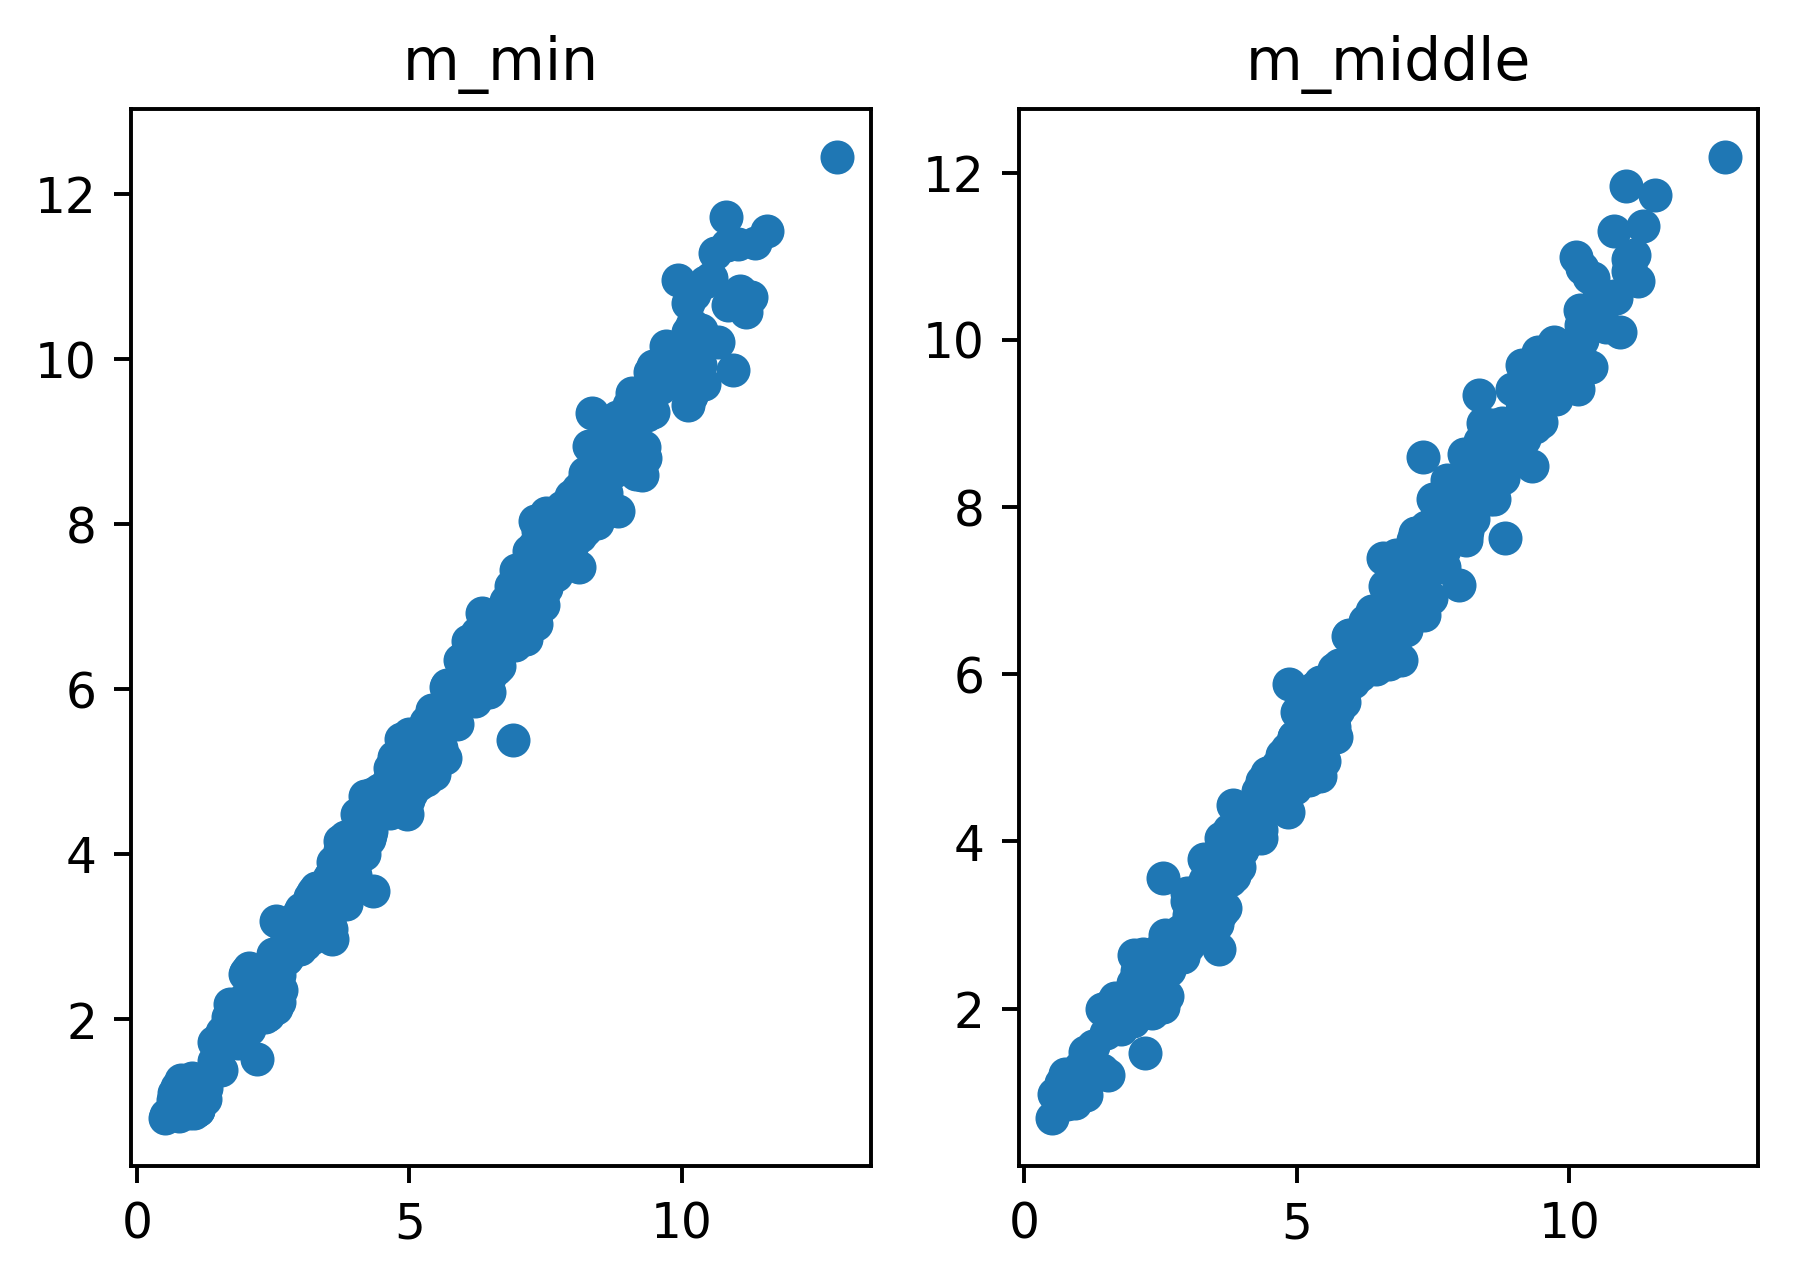

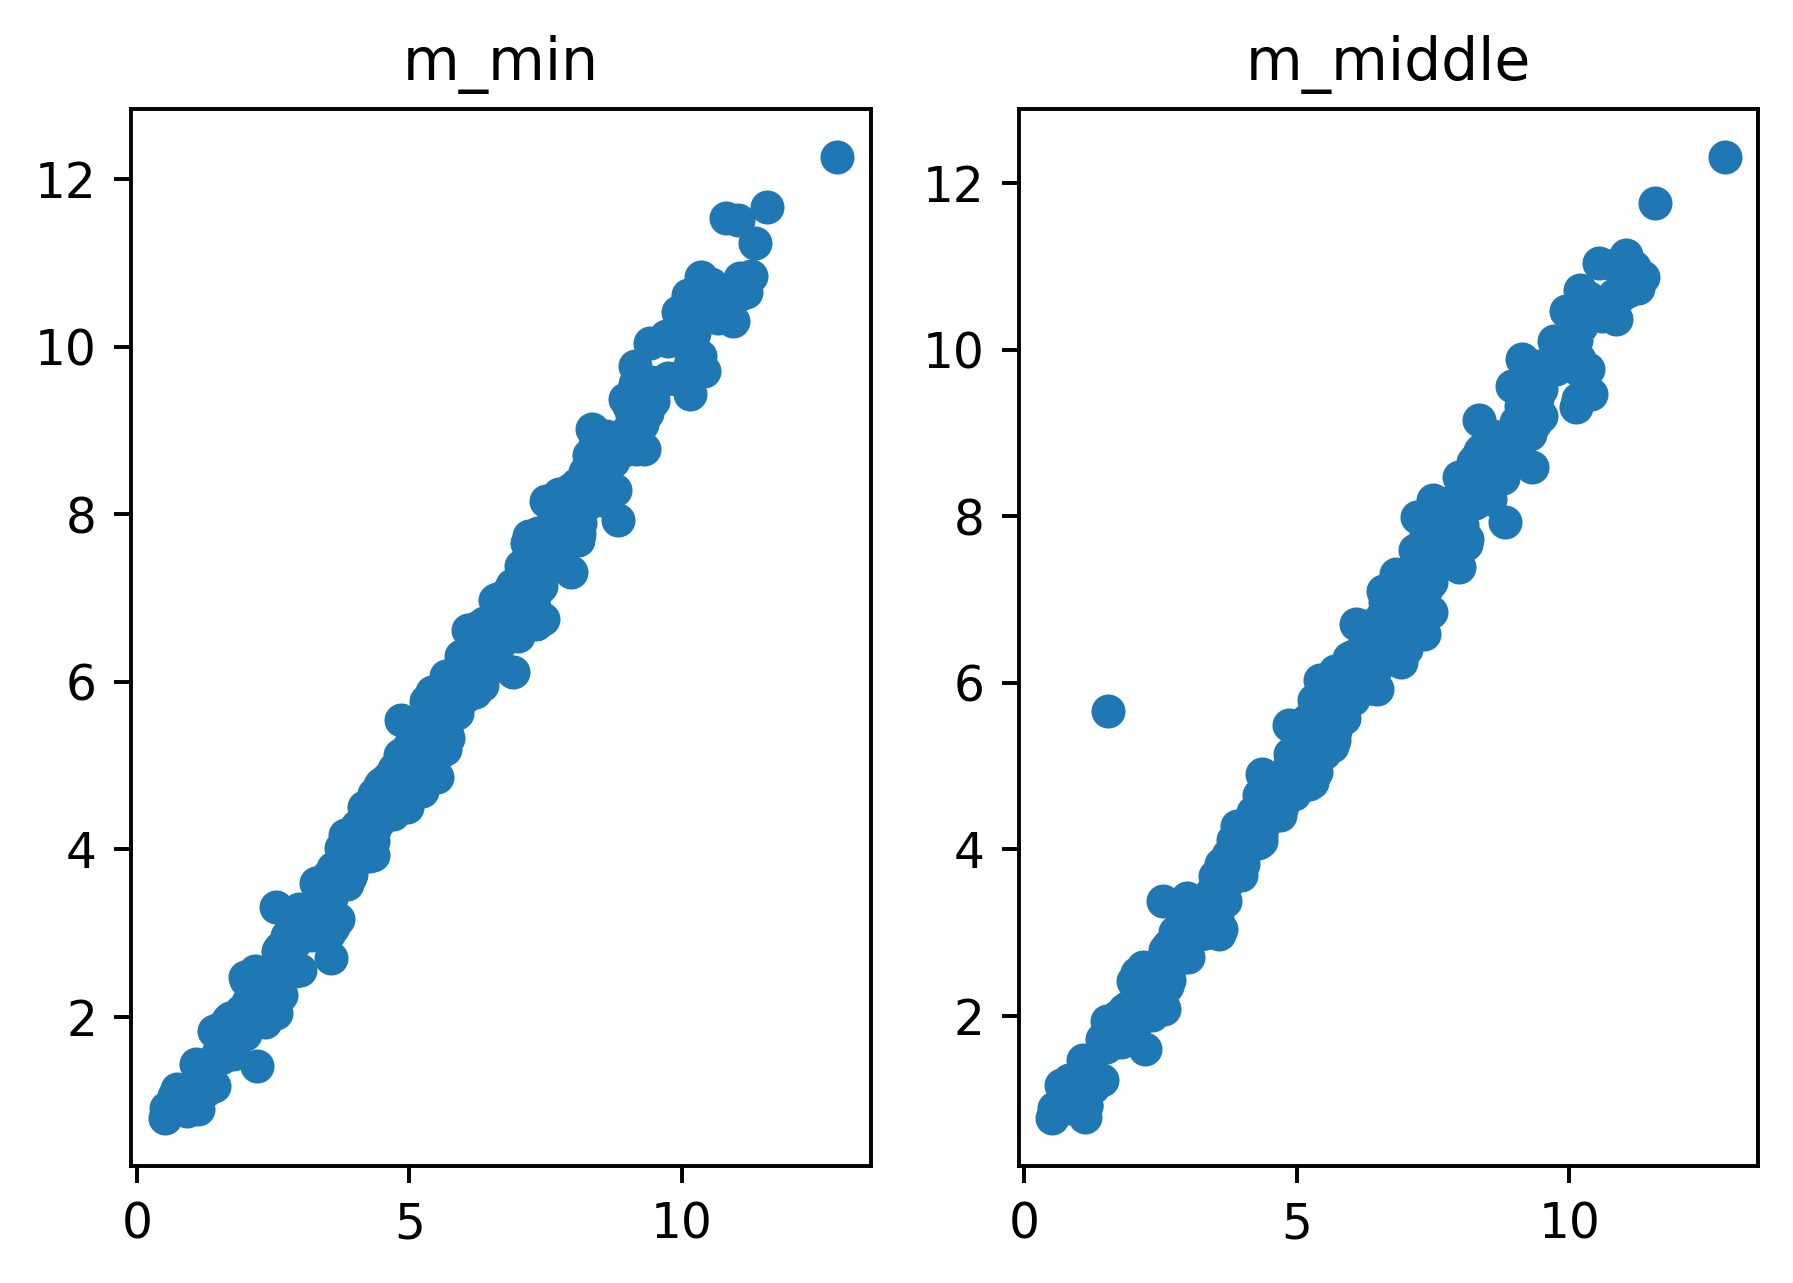

In [41]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_max, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(b4_max, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_max, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b4_max, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

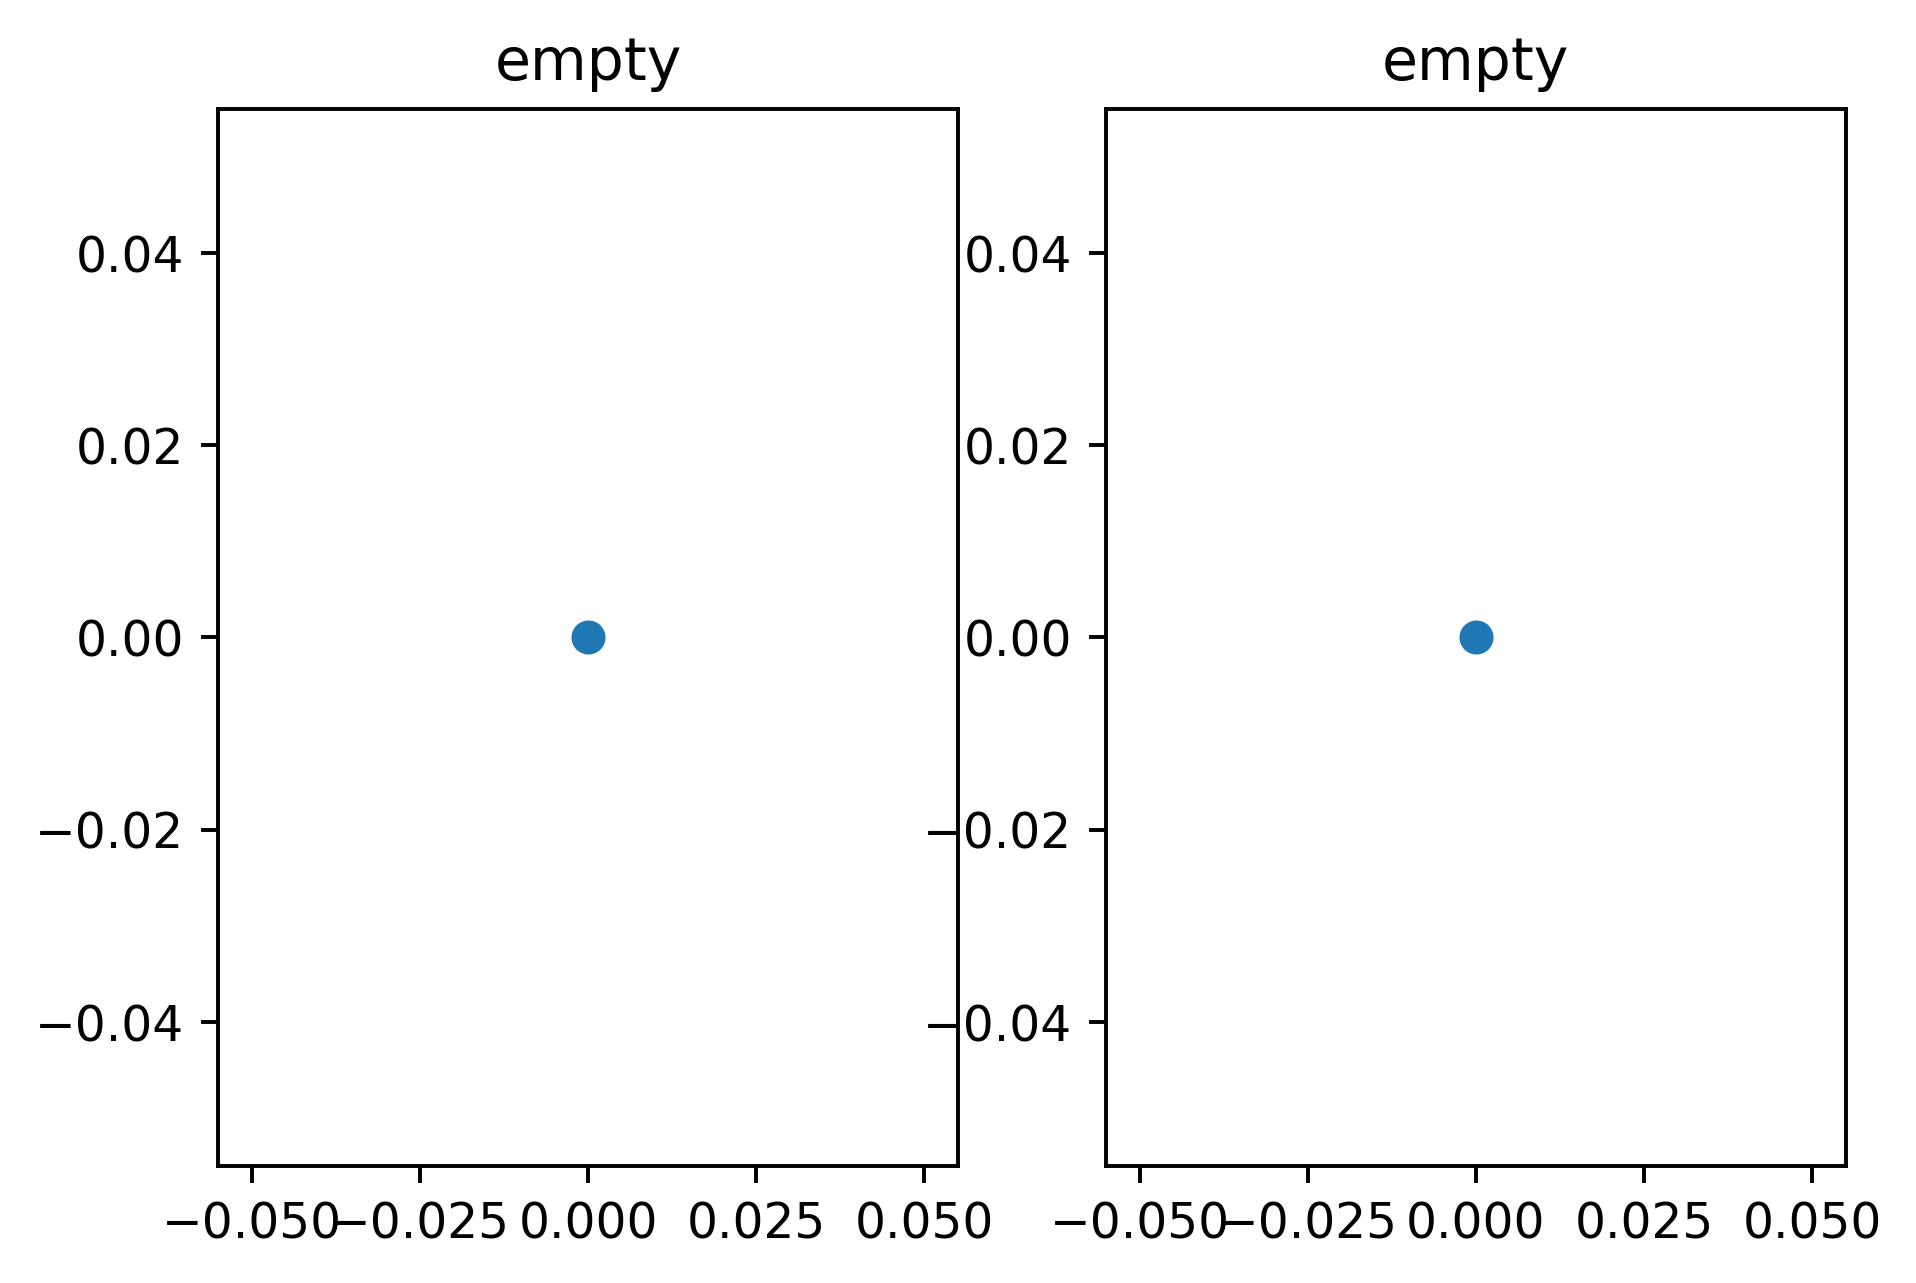

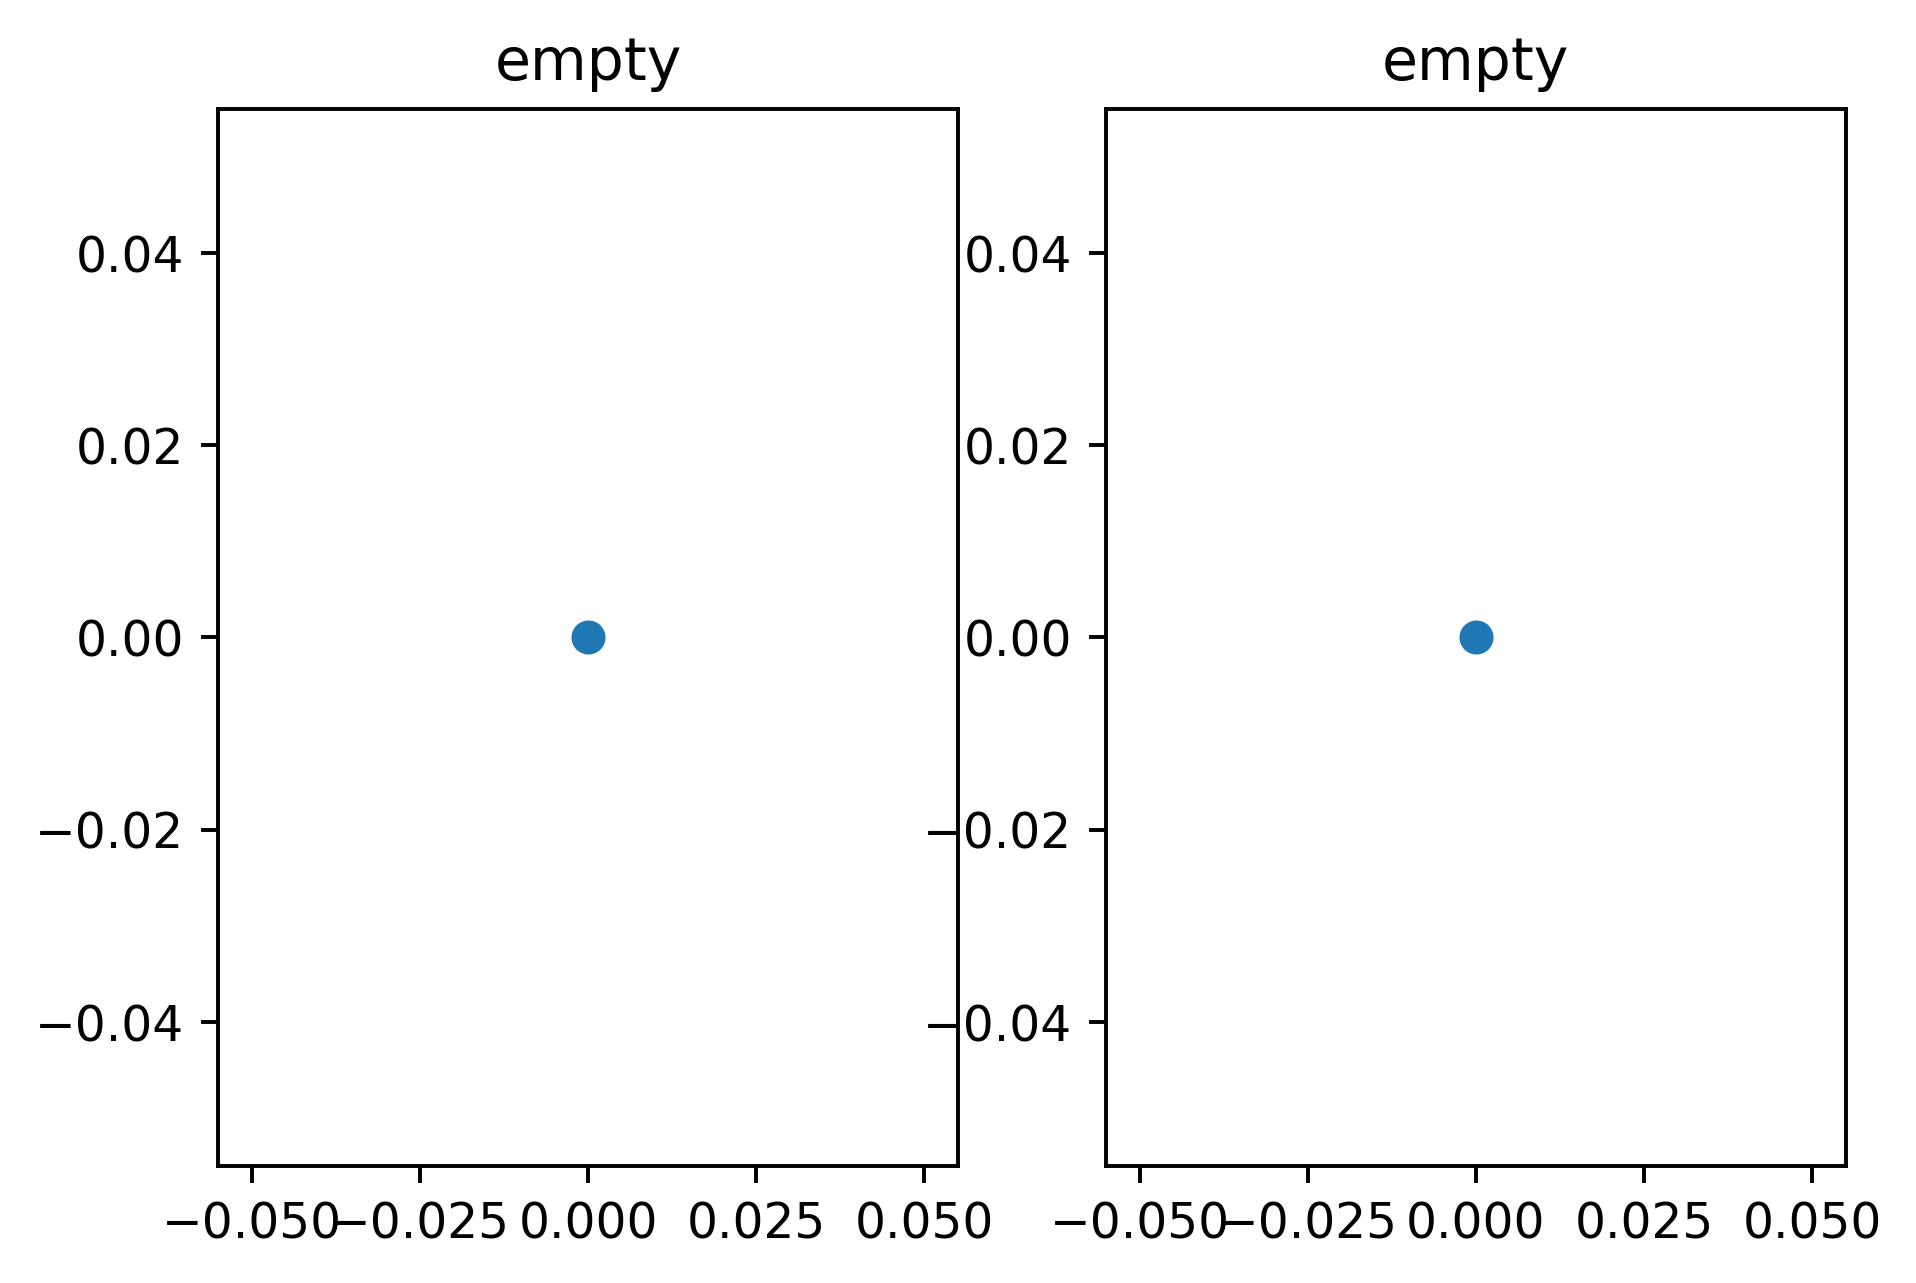

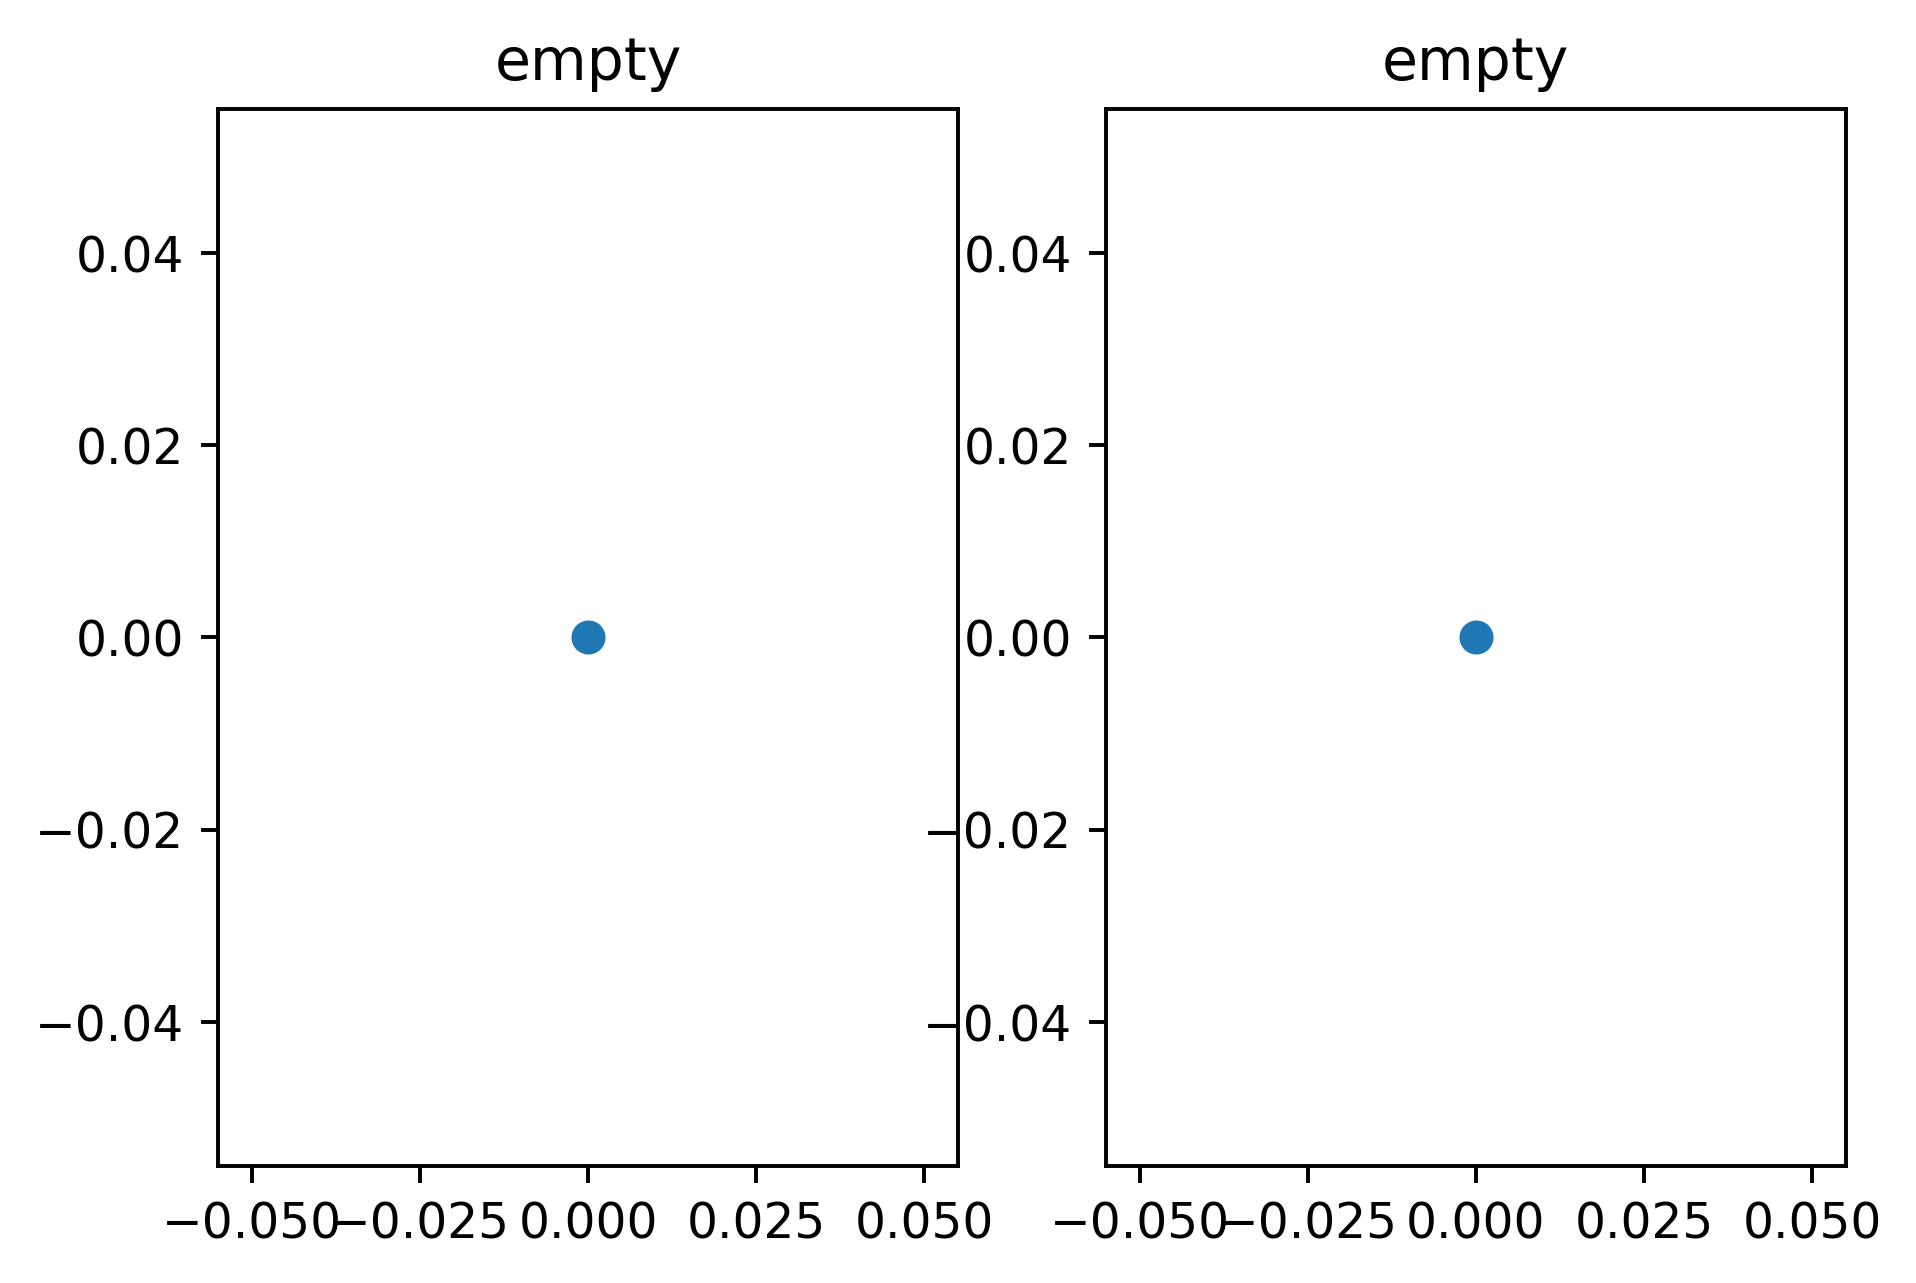

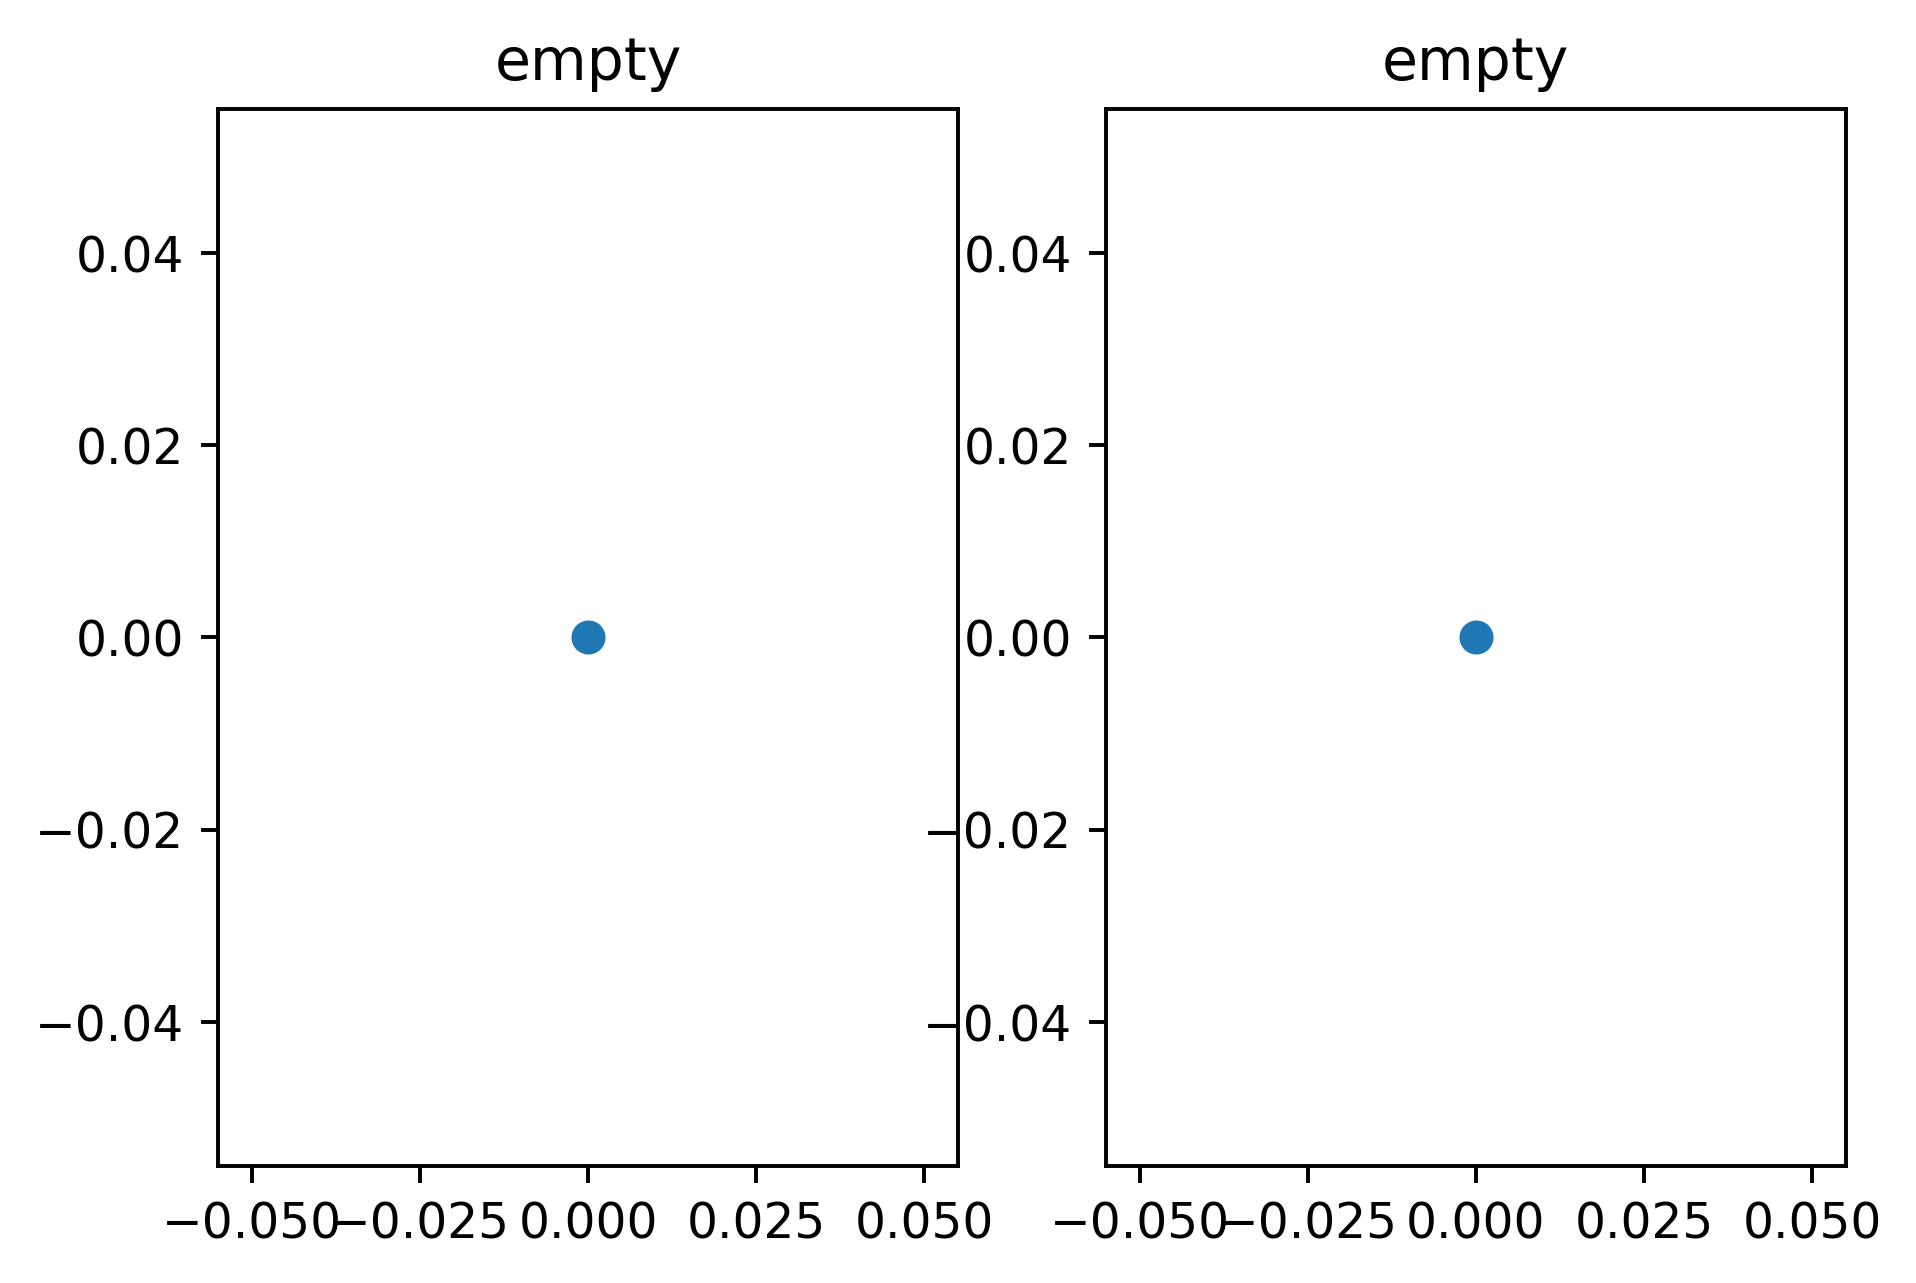

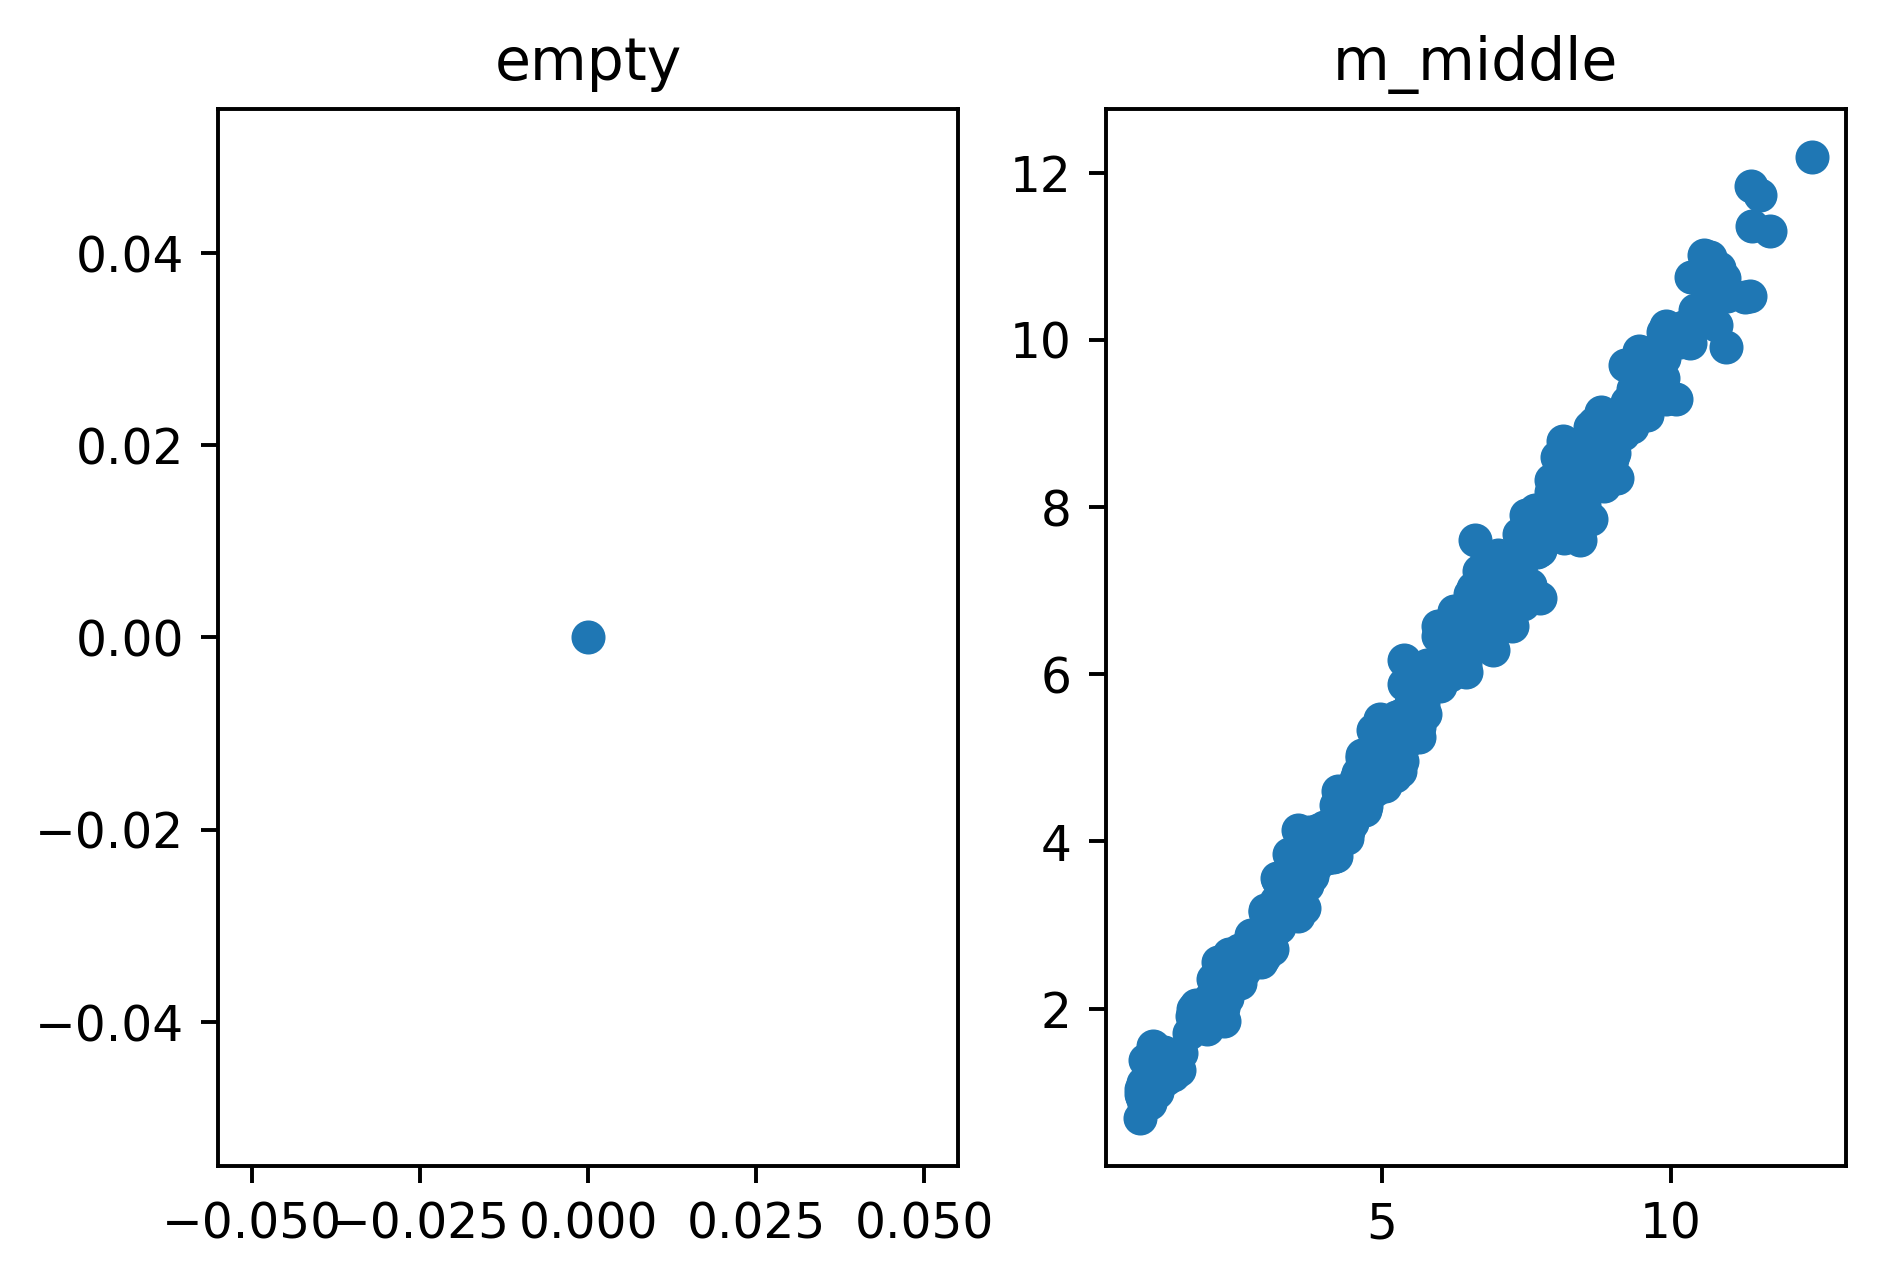

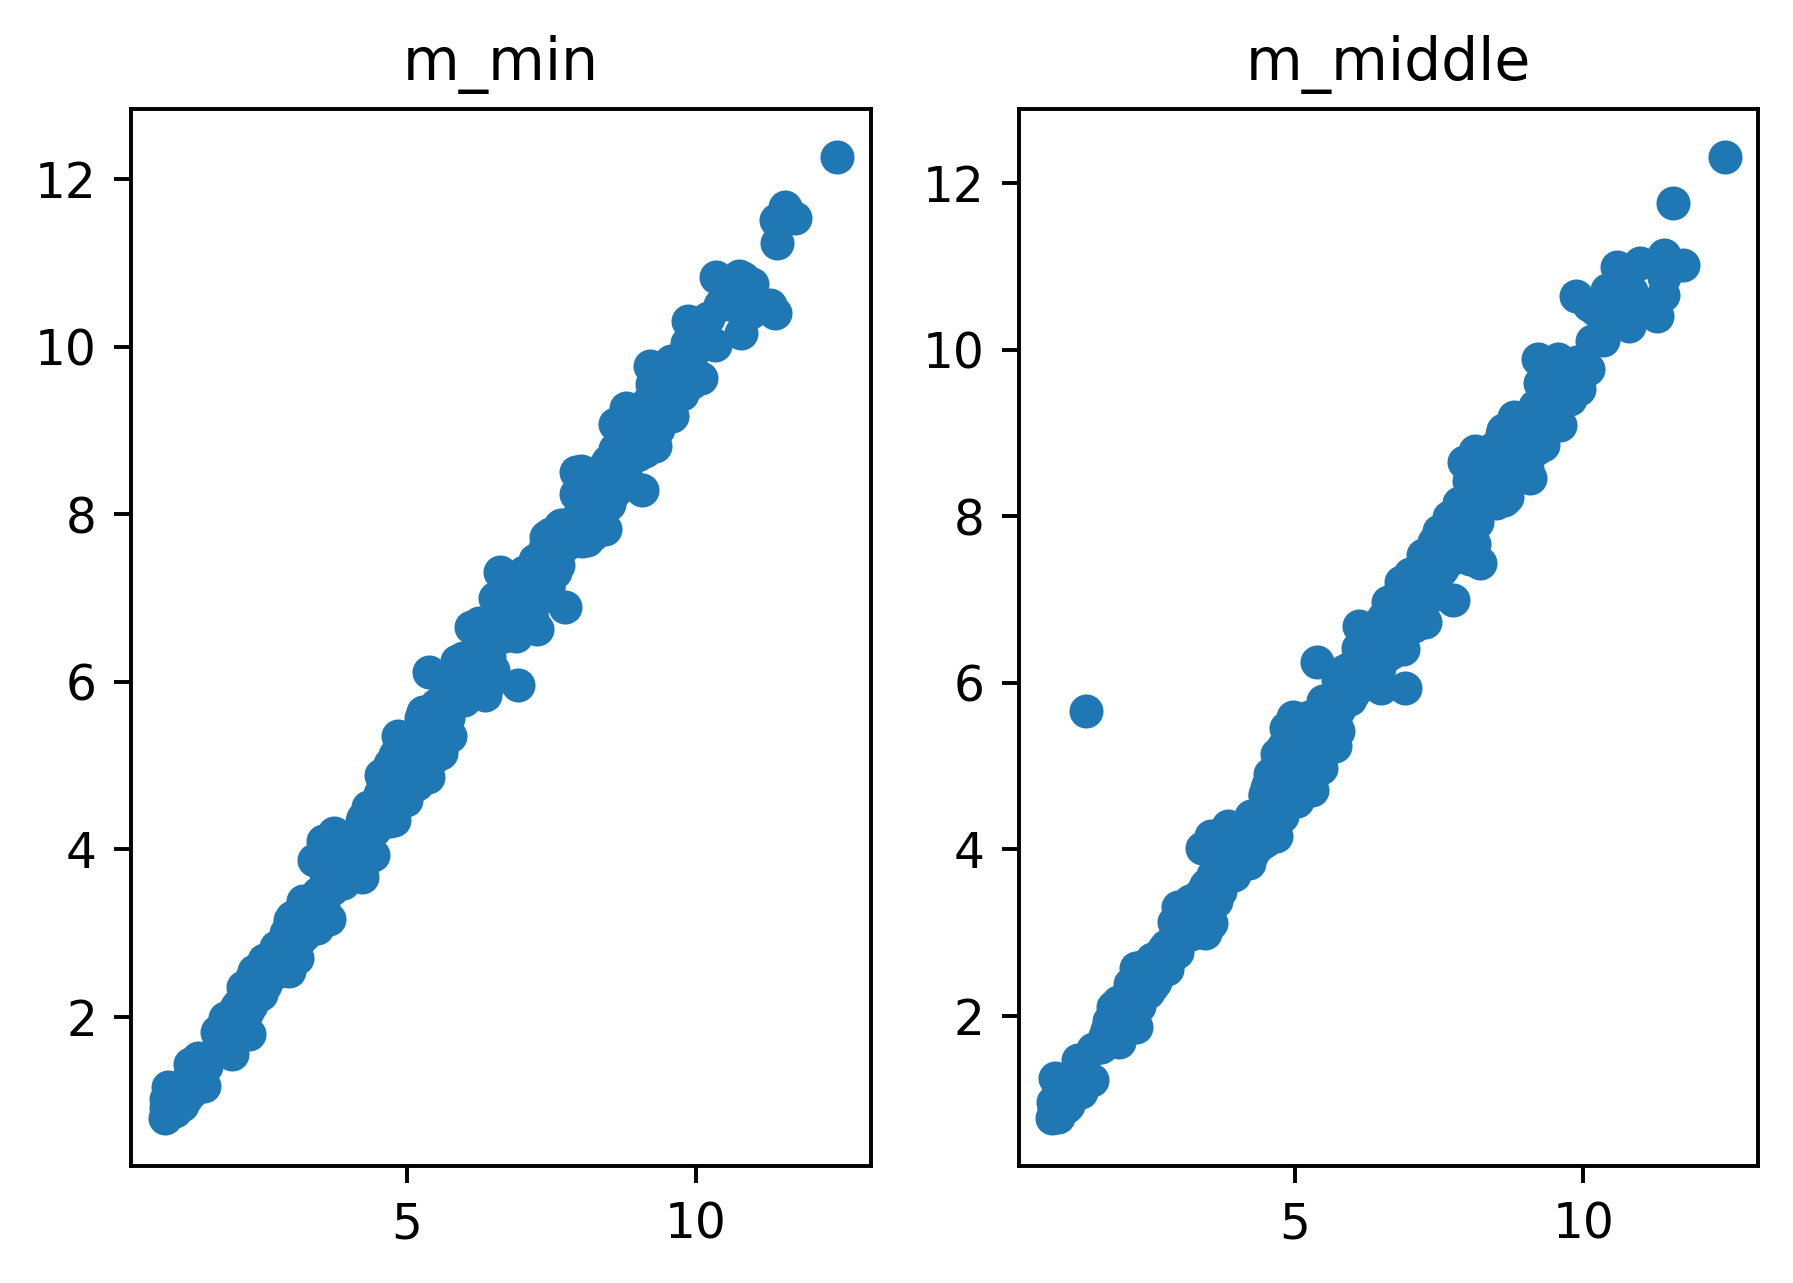

In [40]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(b5_min, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b5_min, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b5_min, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

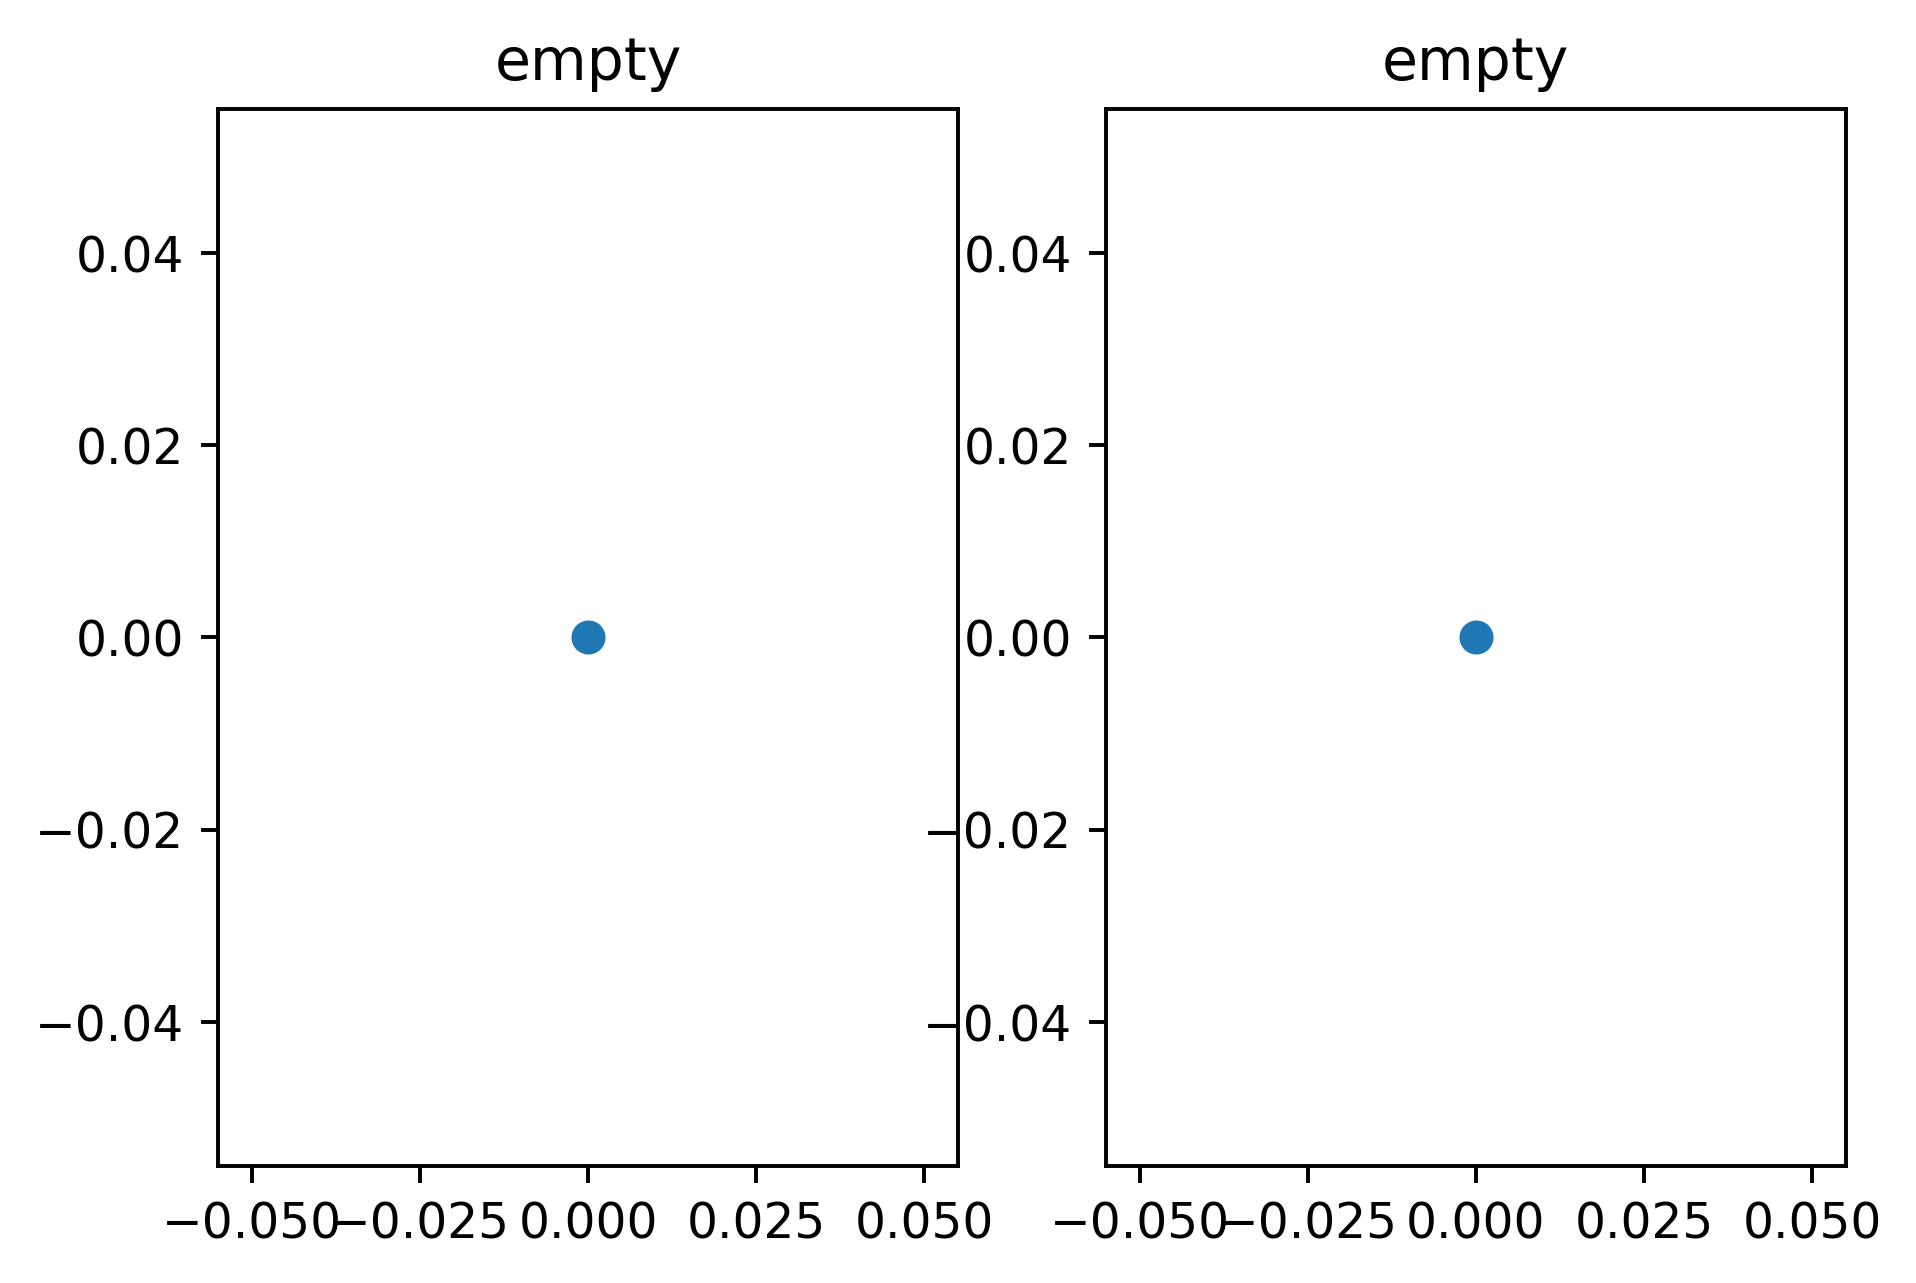

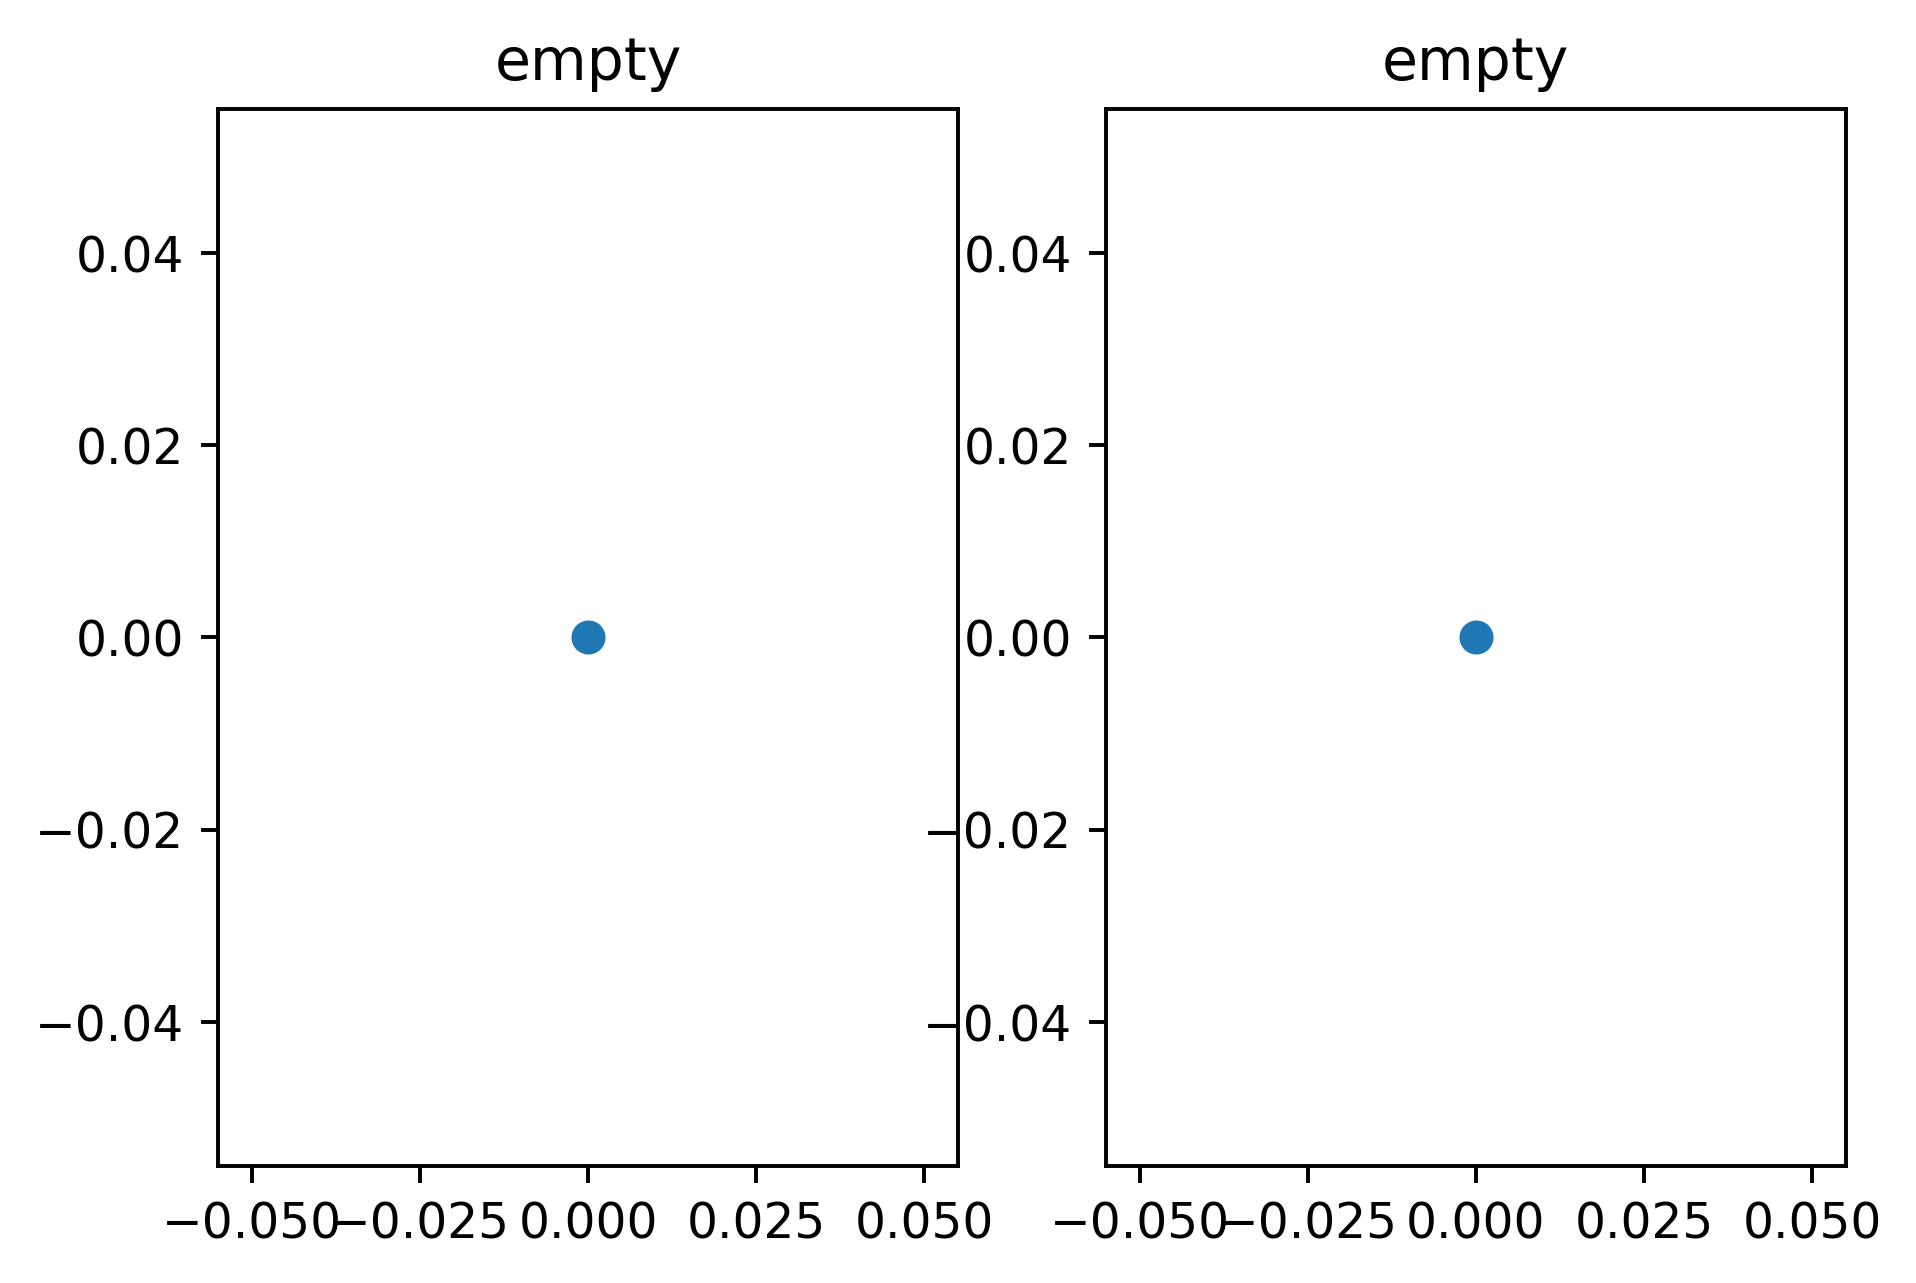

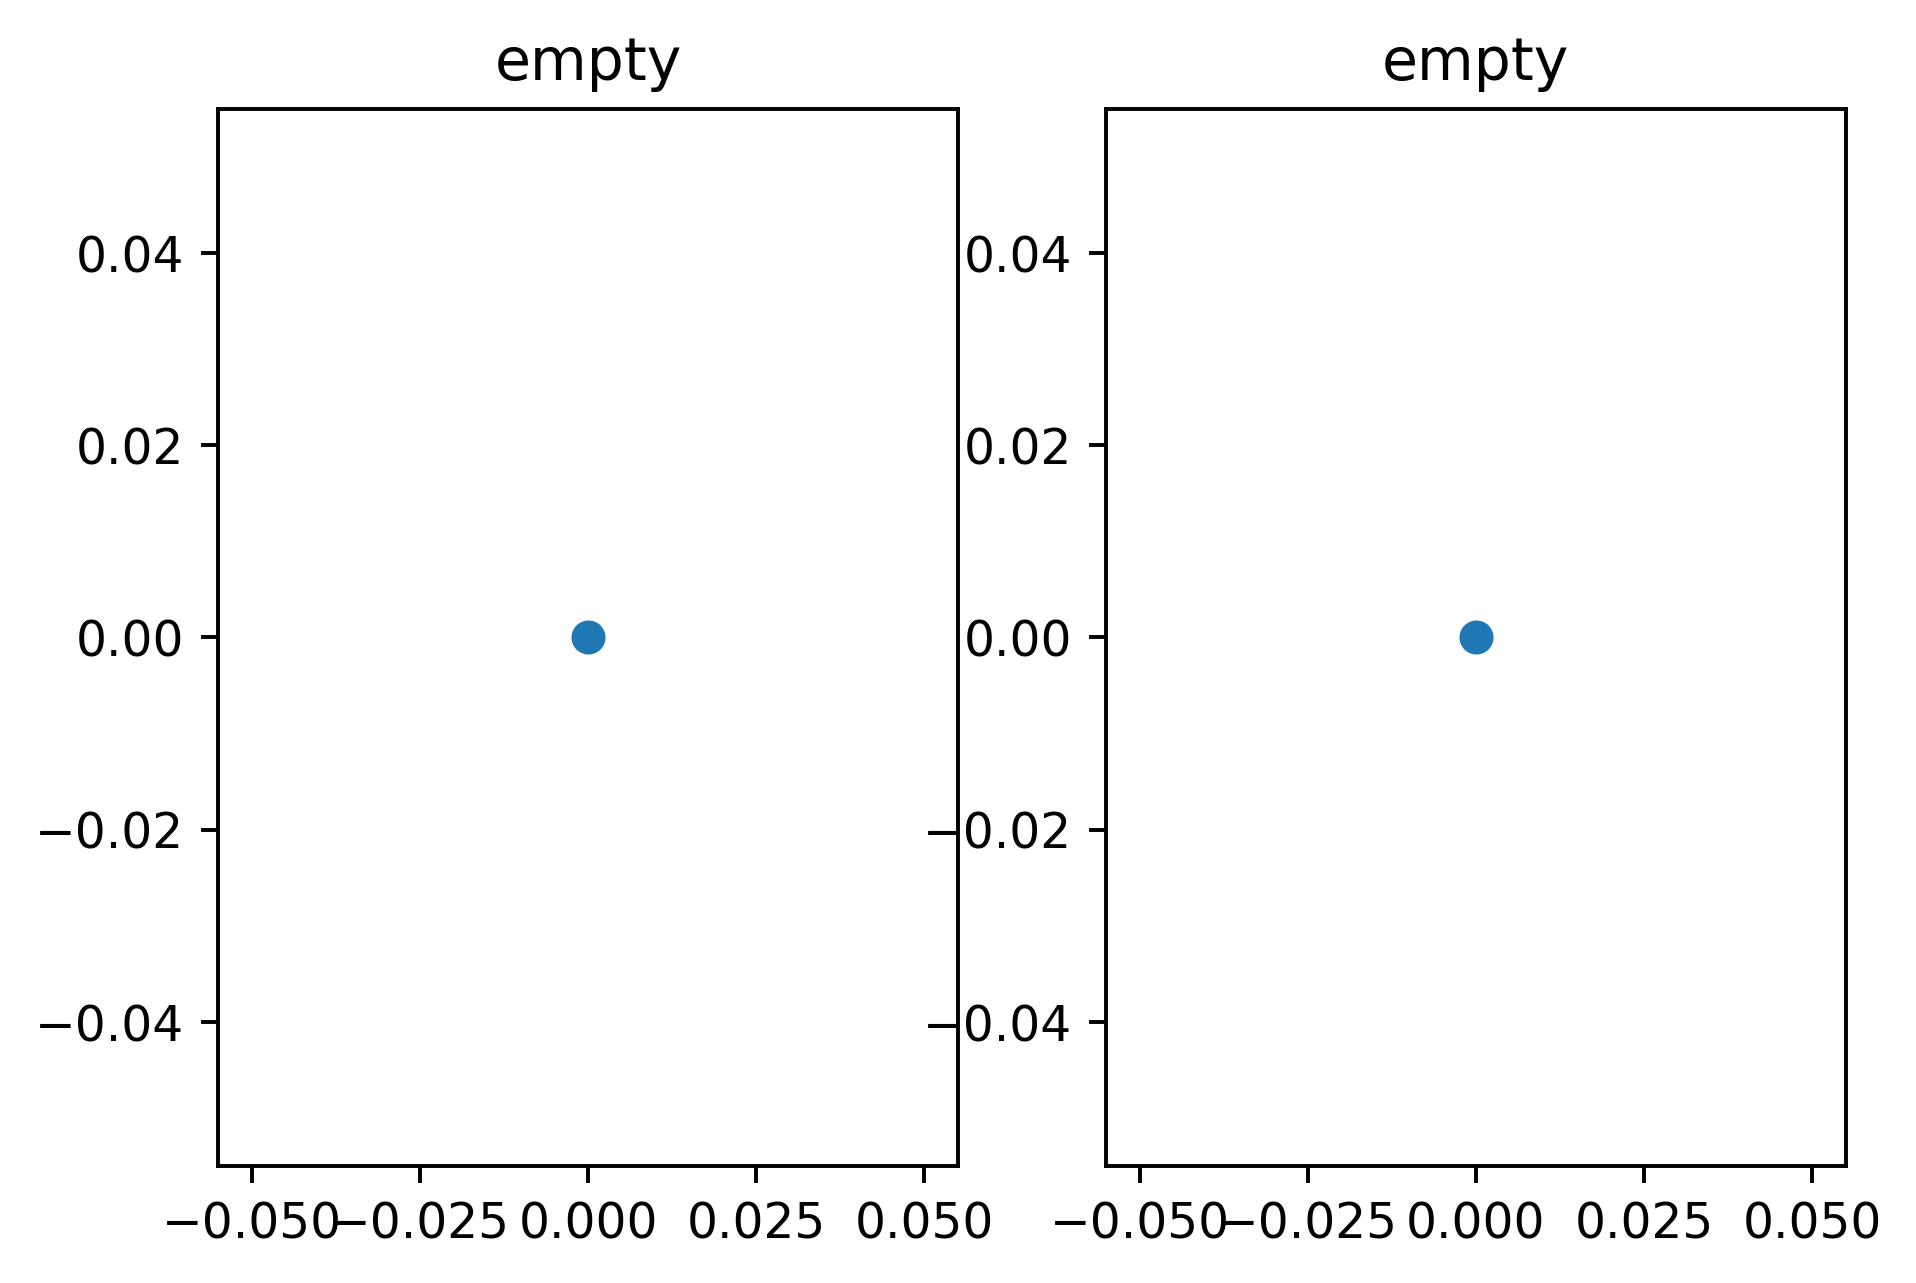

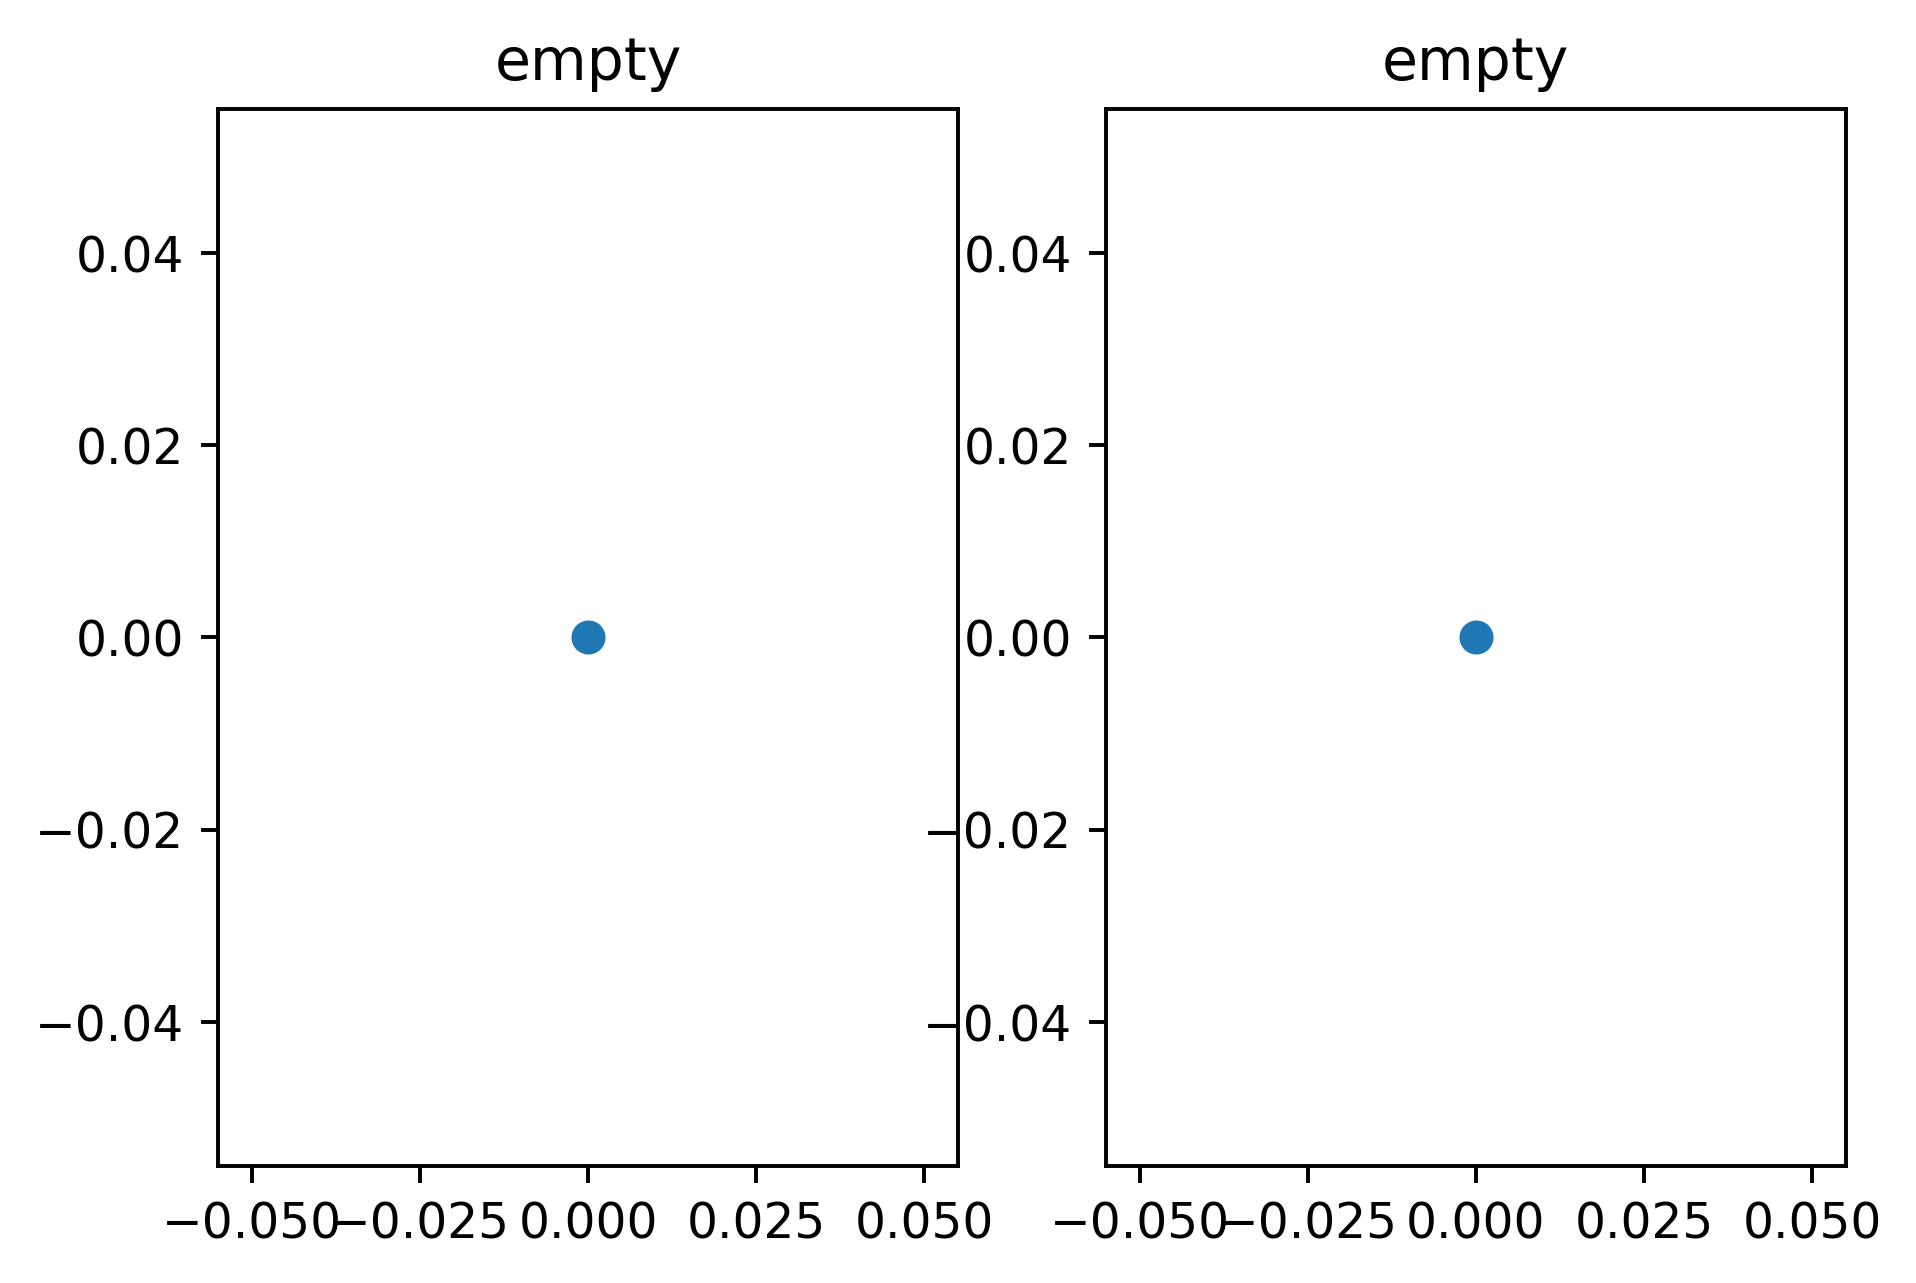

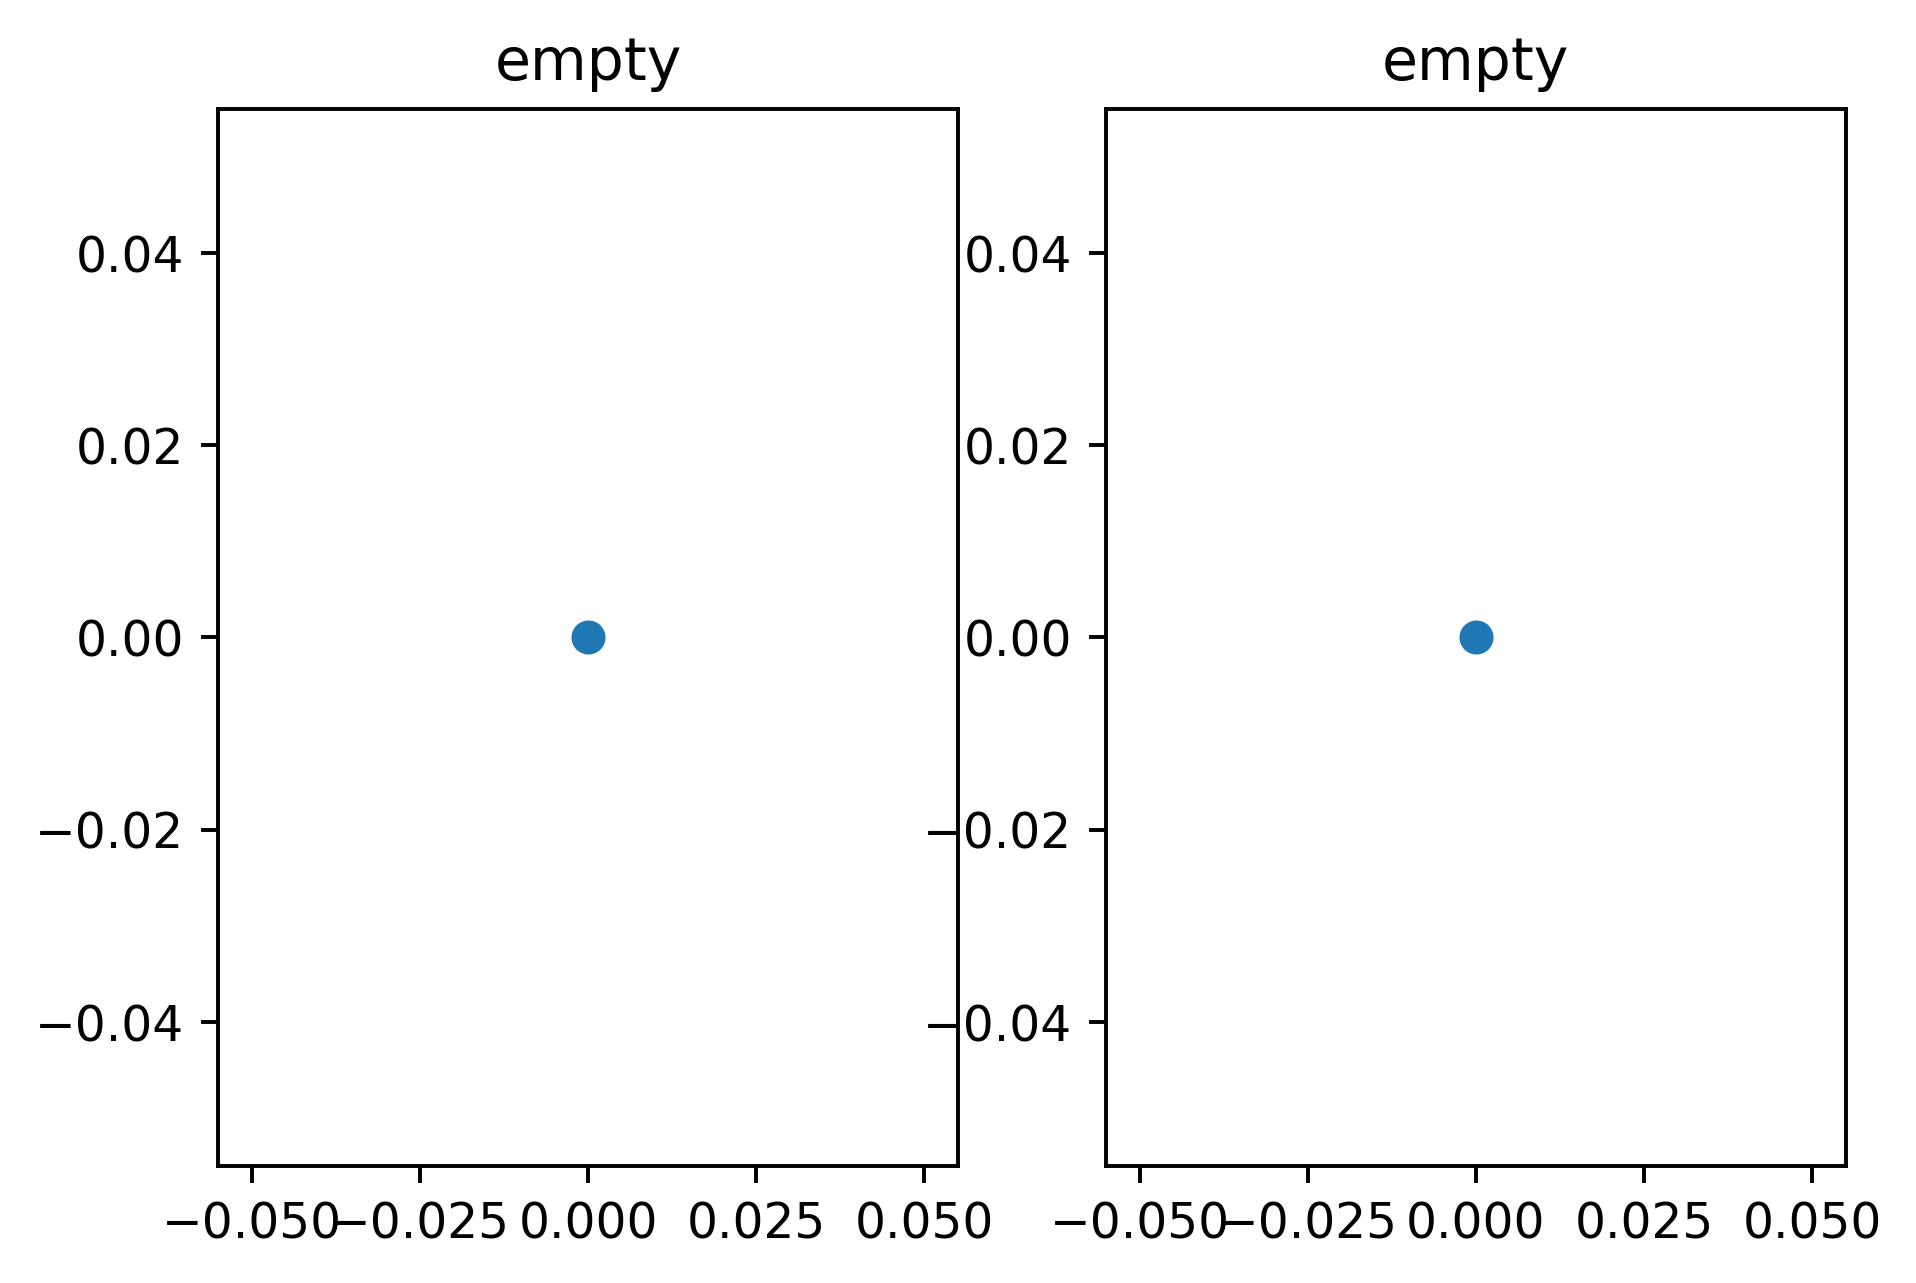

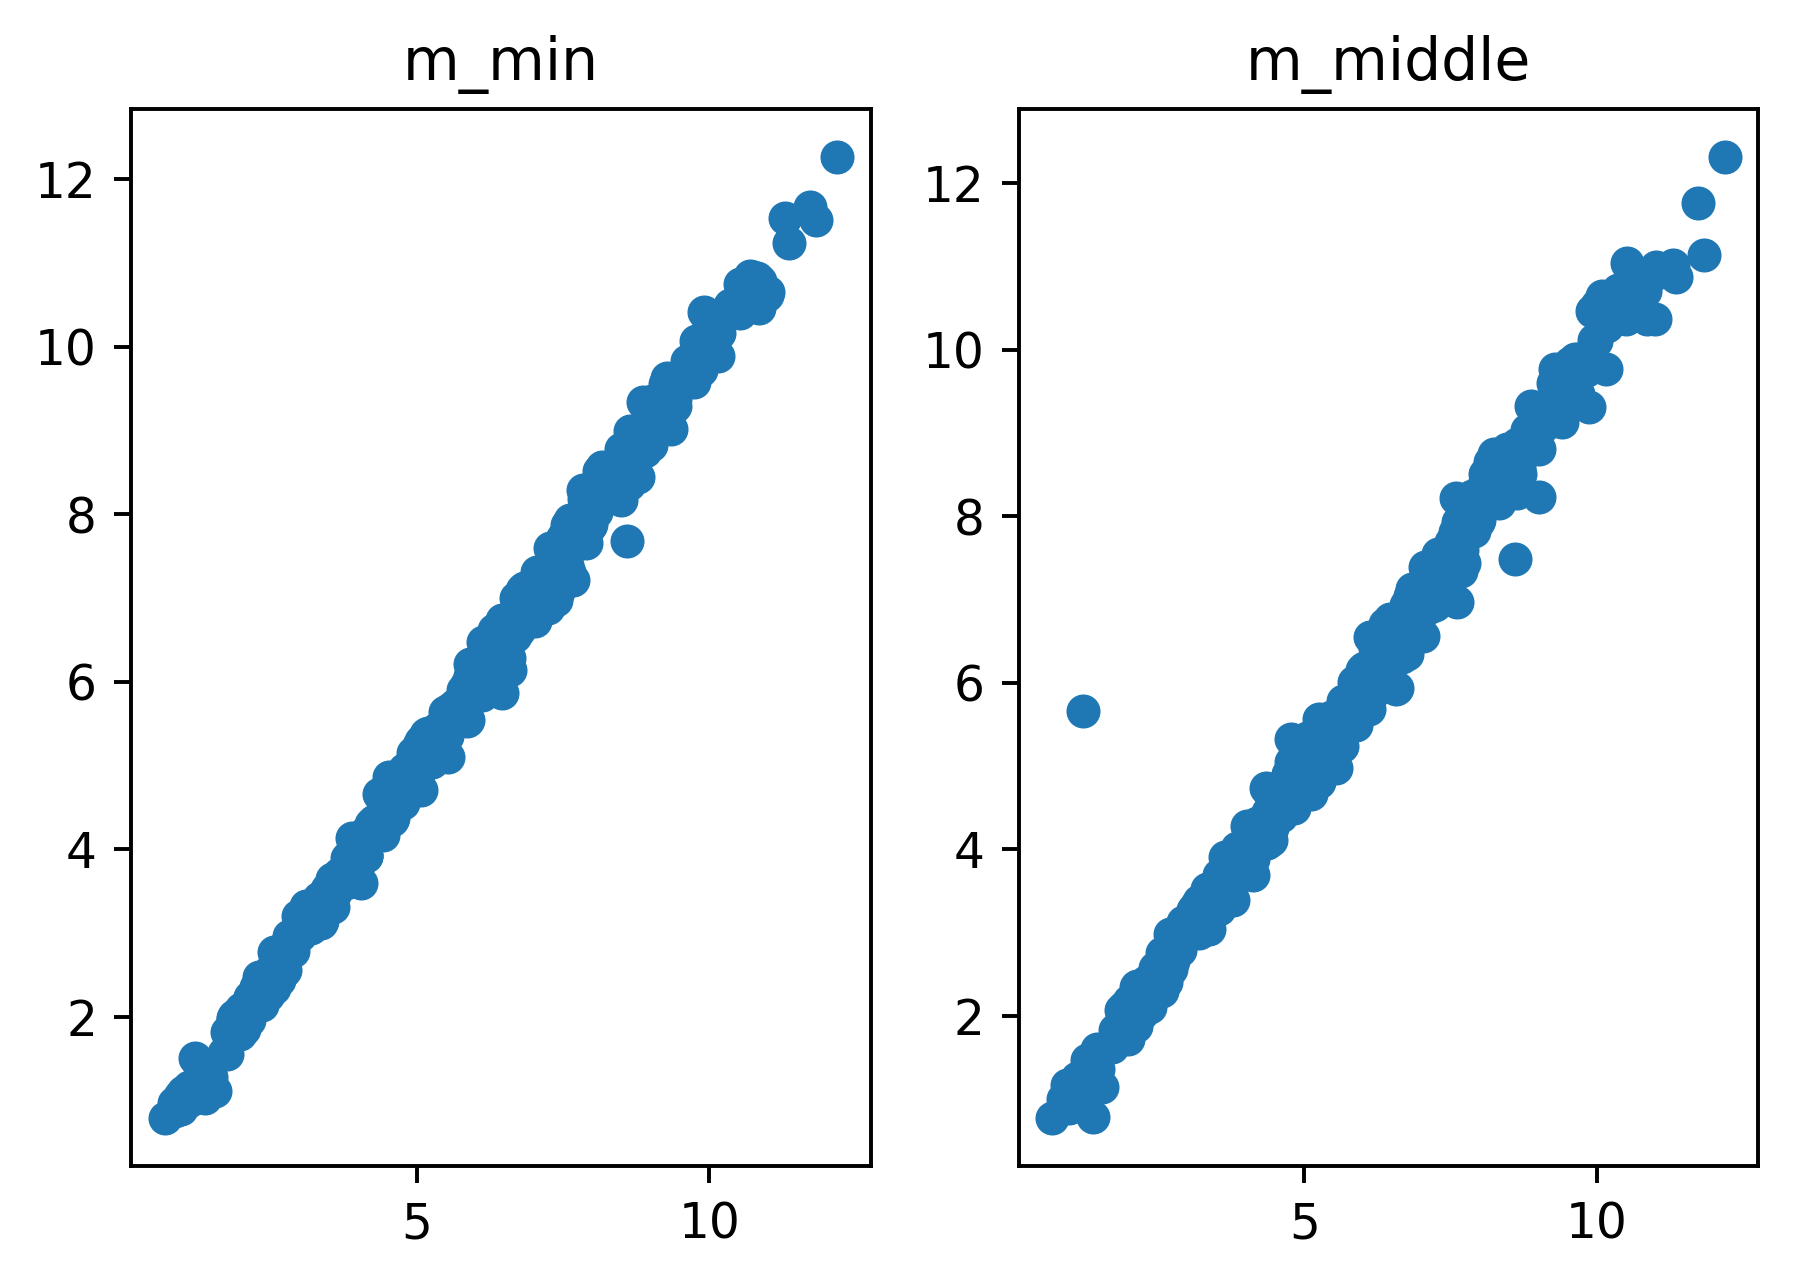

In [39]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b6_min, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b6_min, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

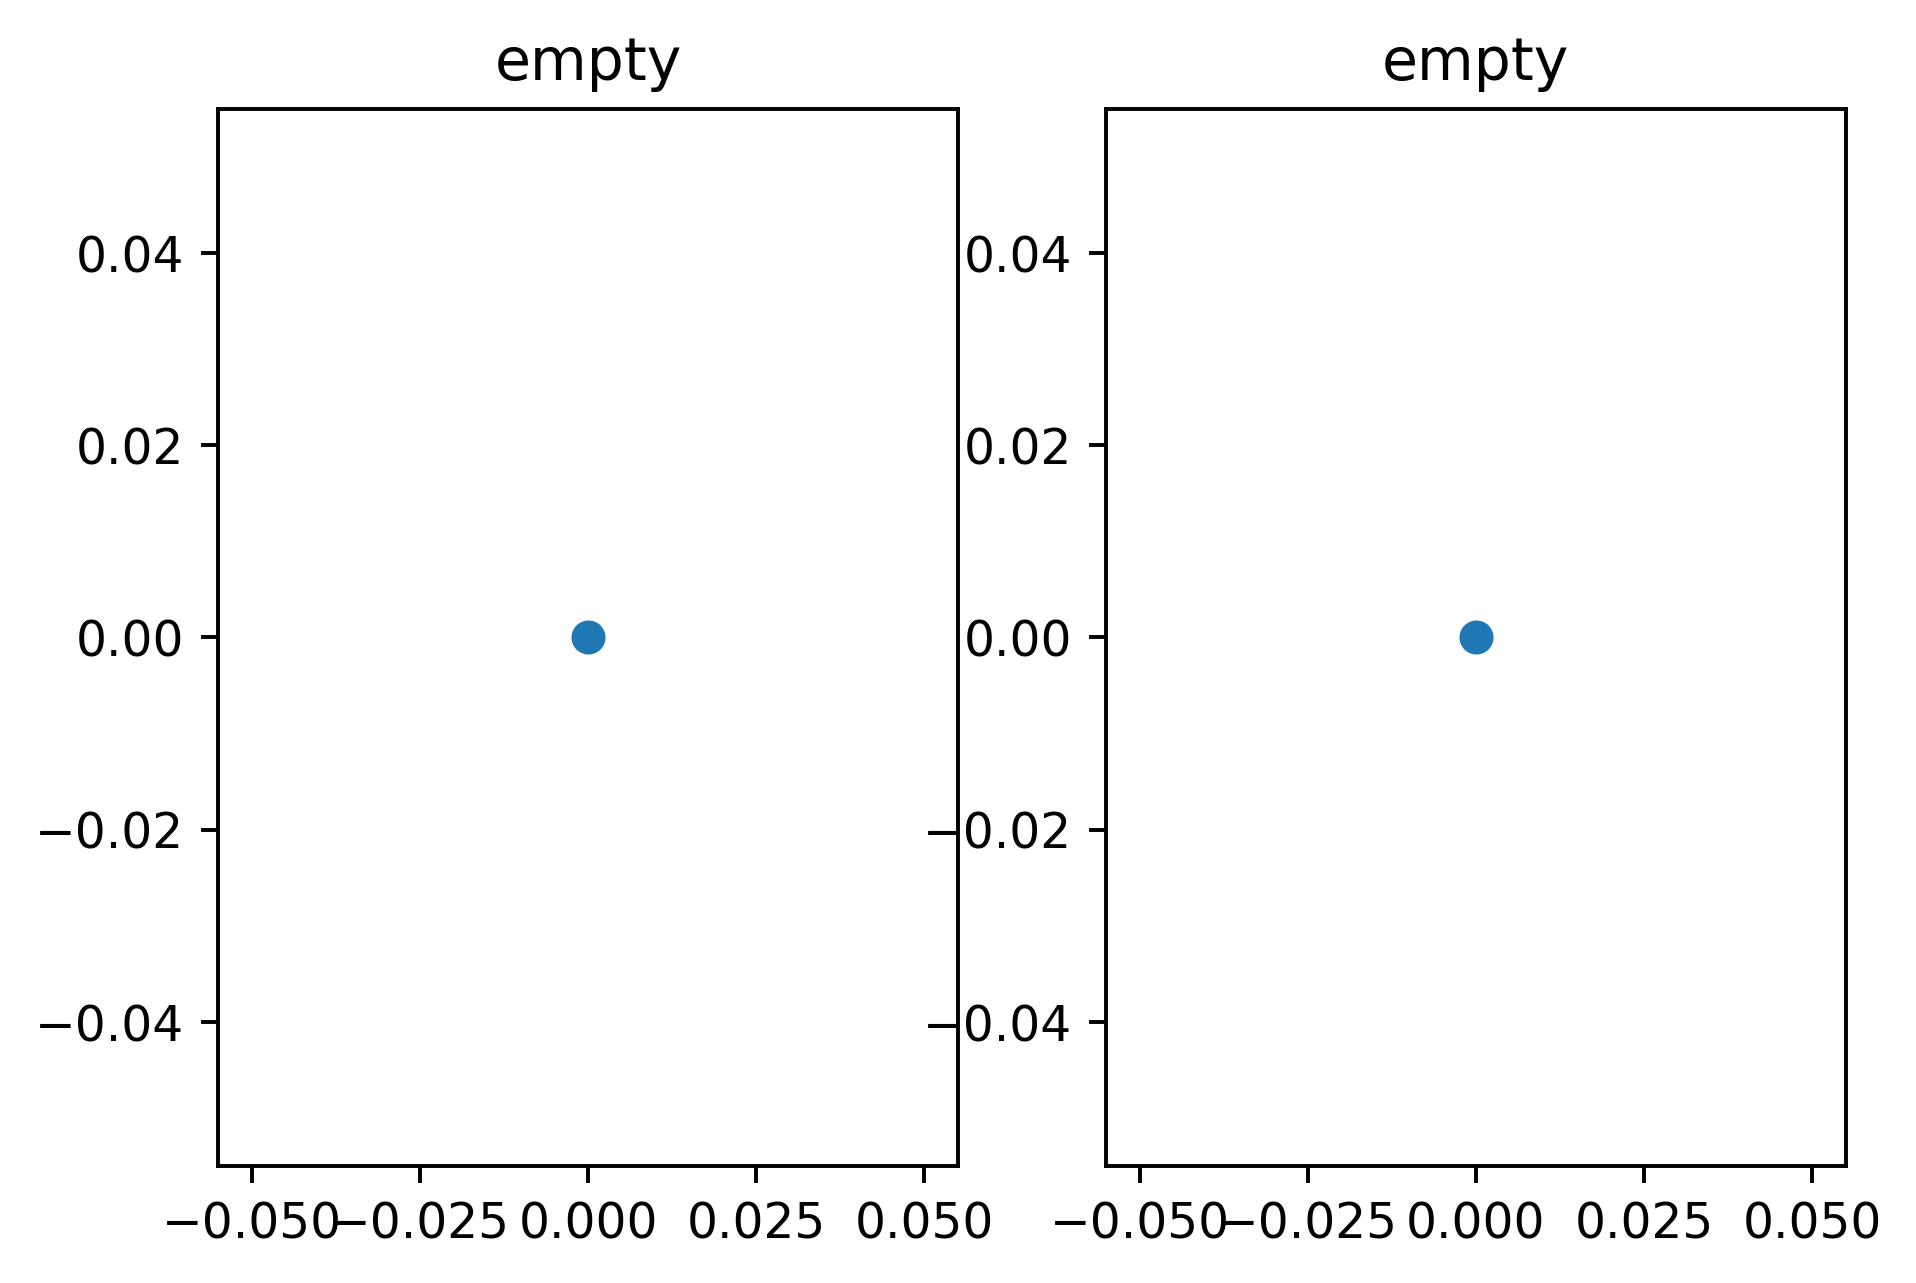

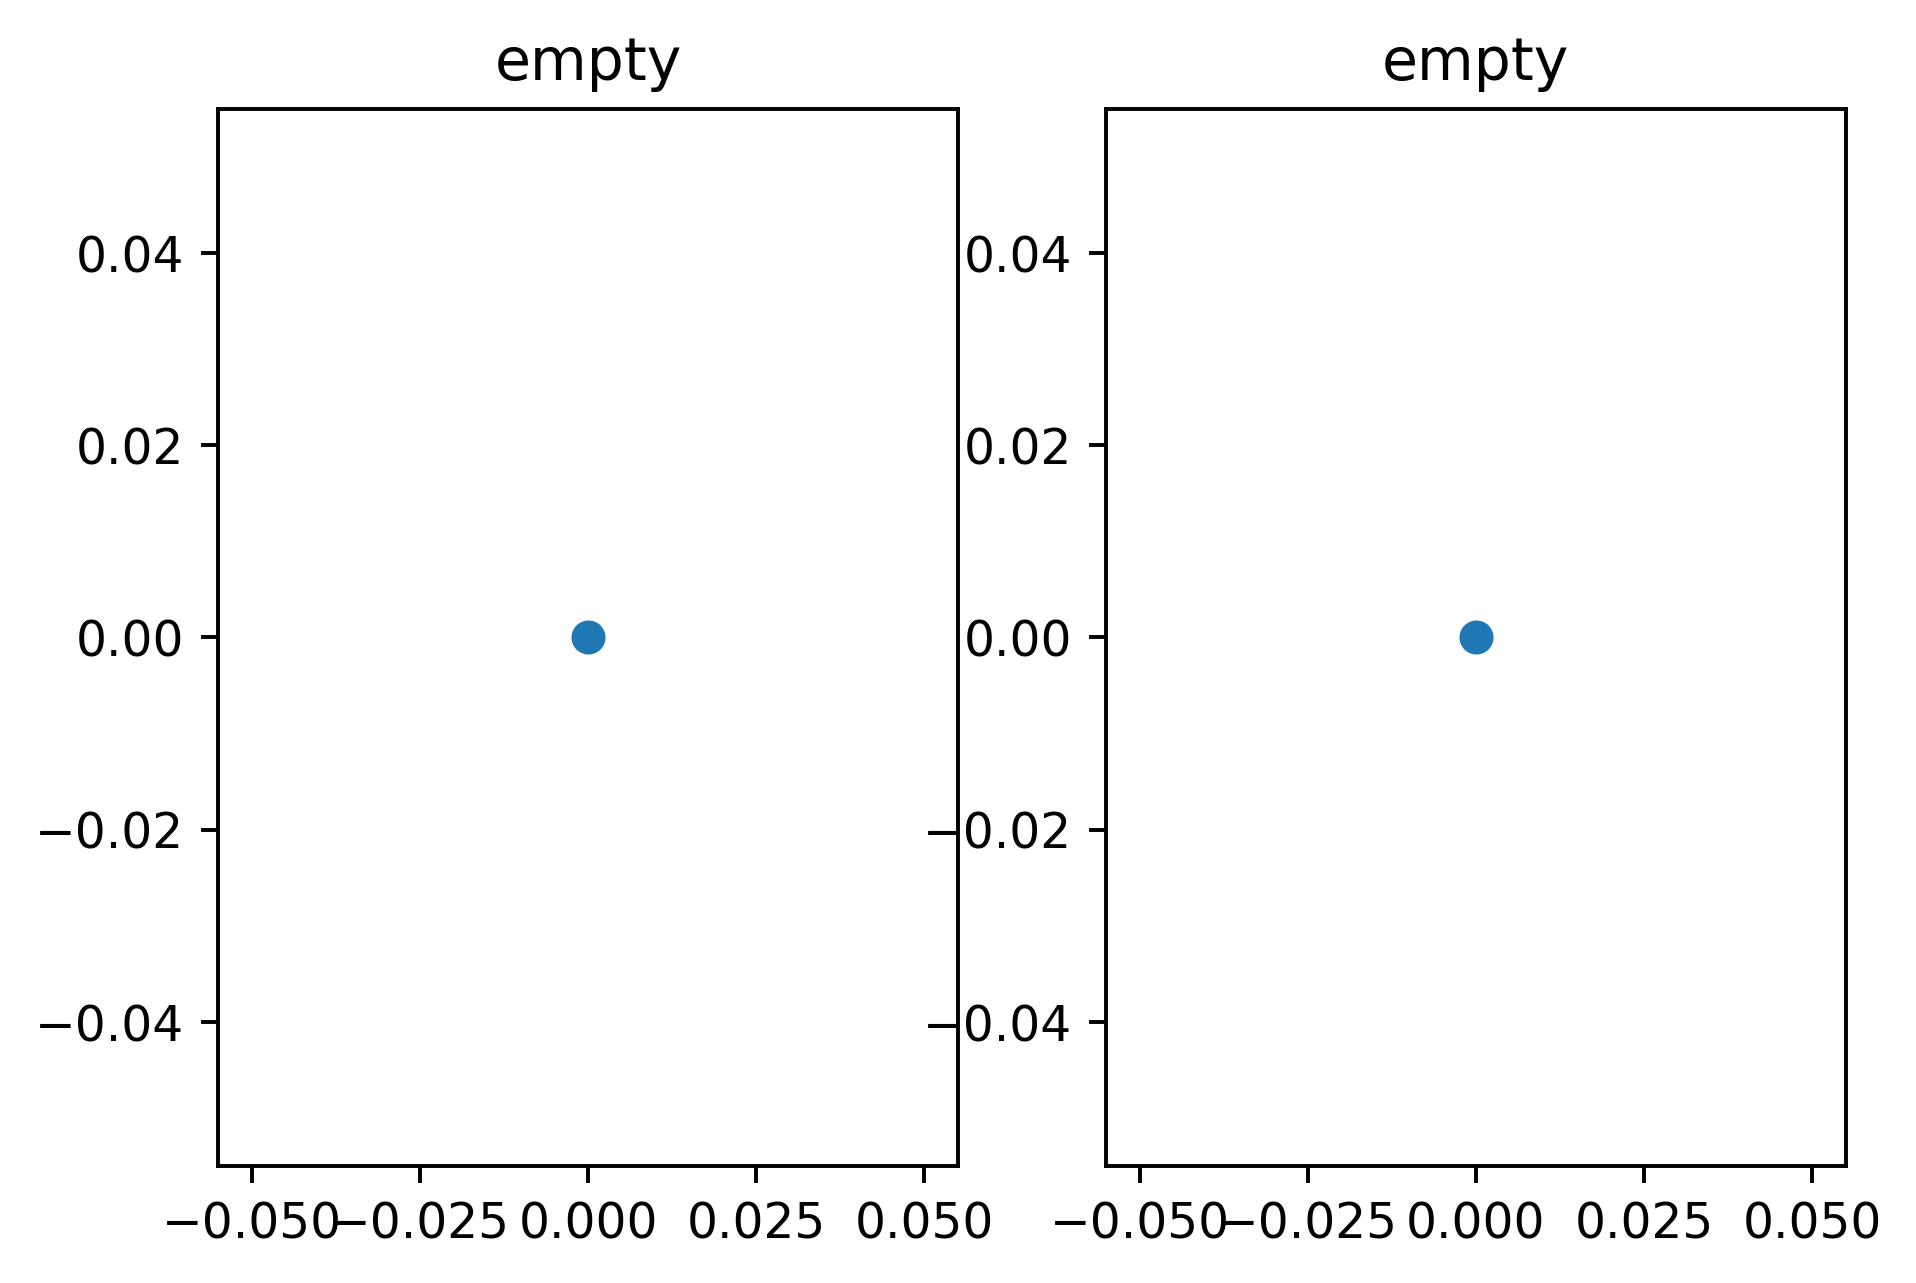

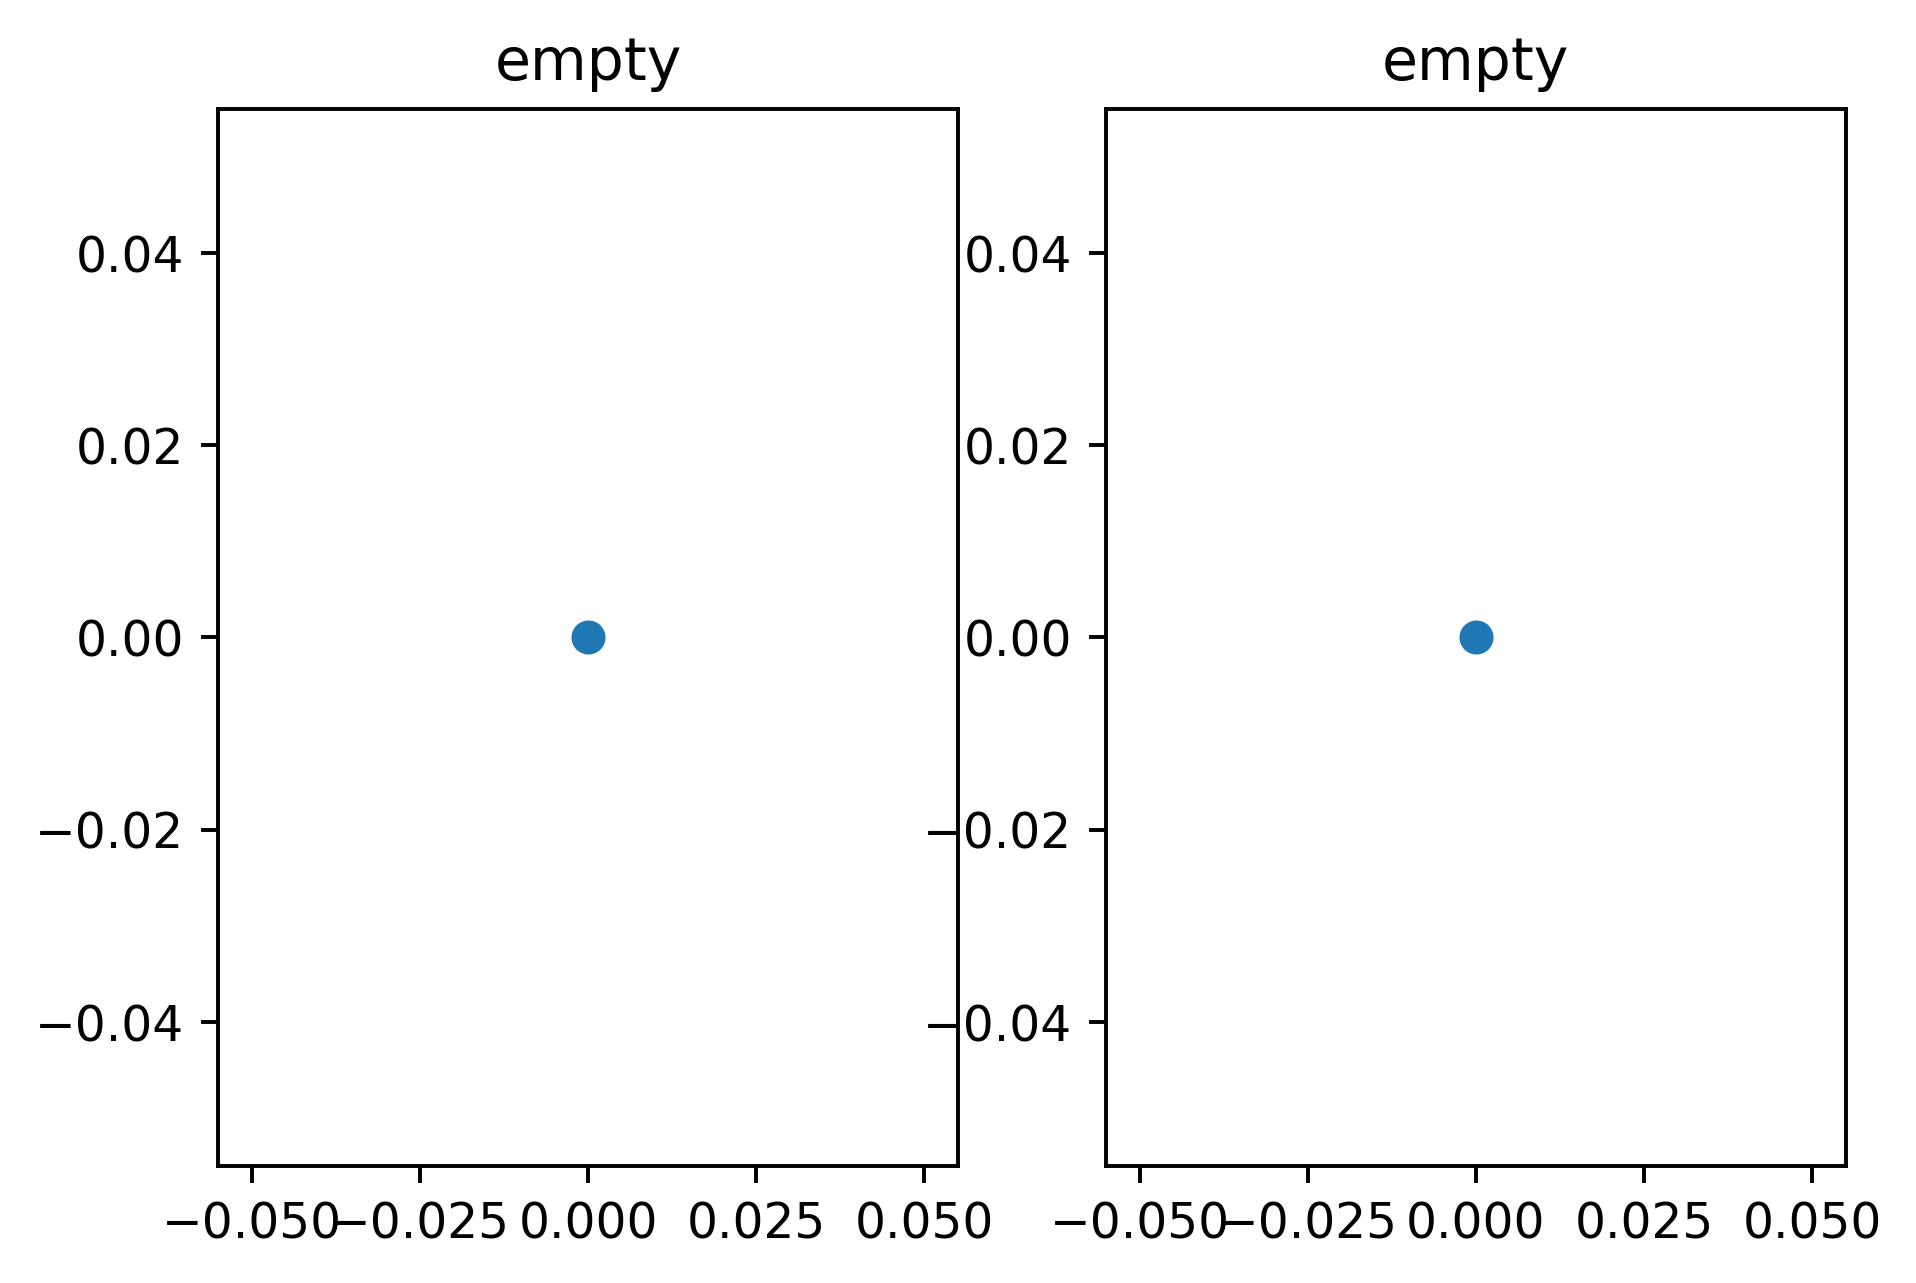

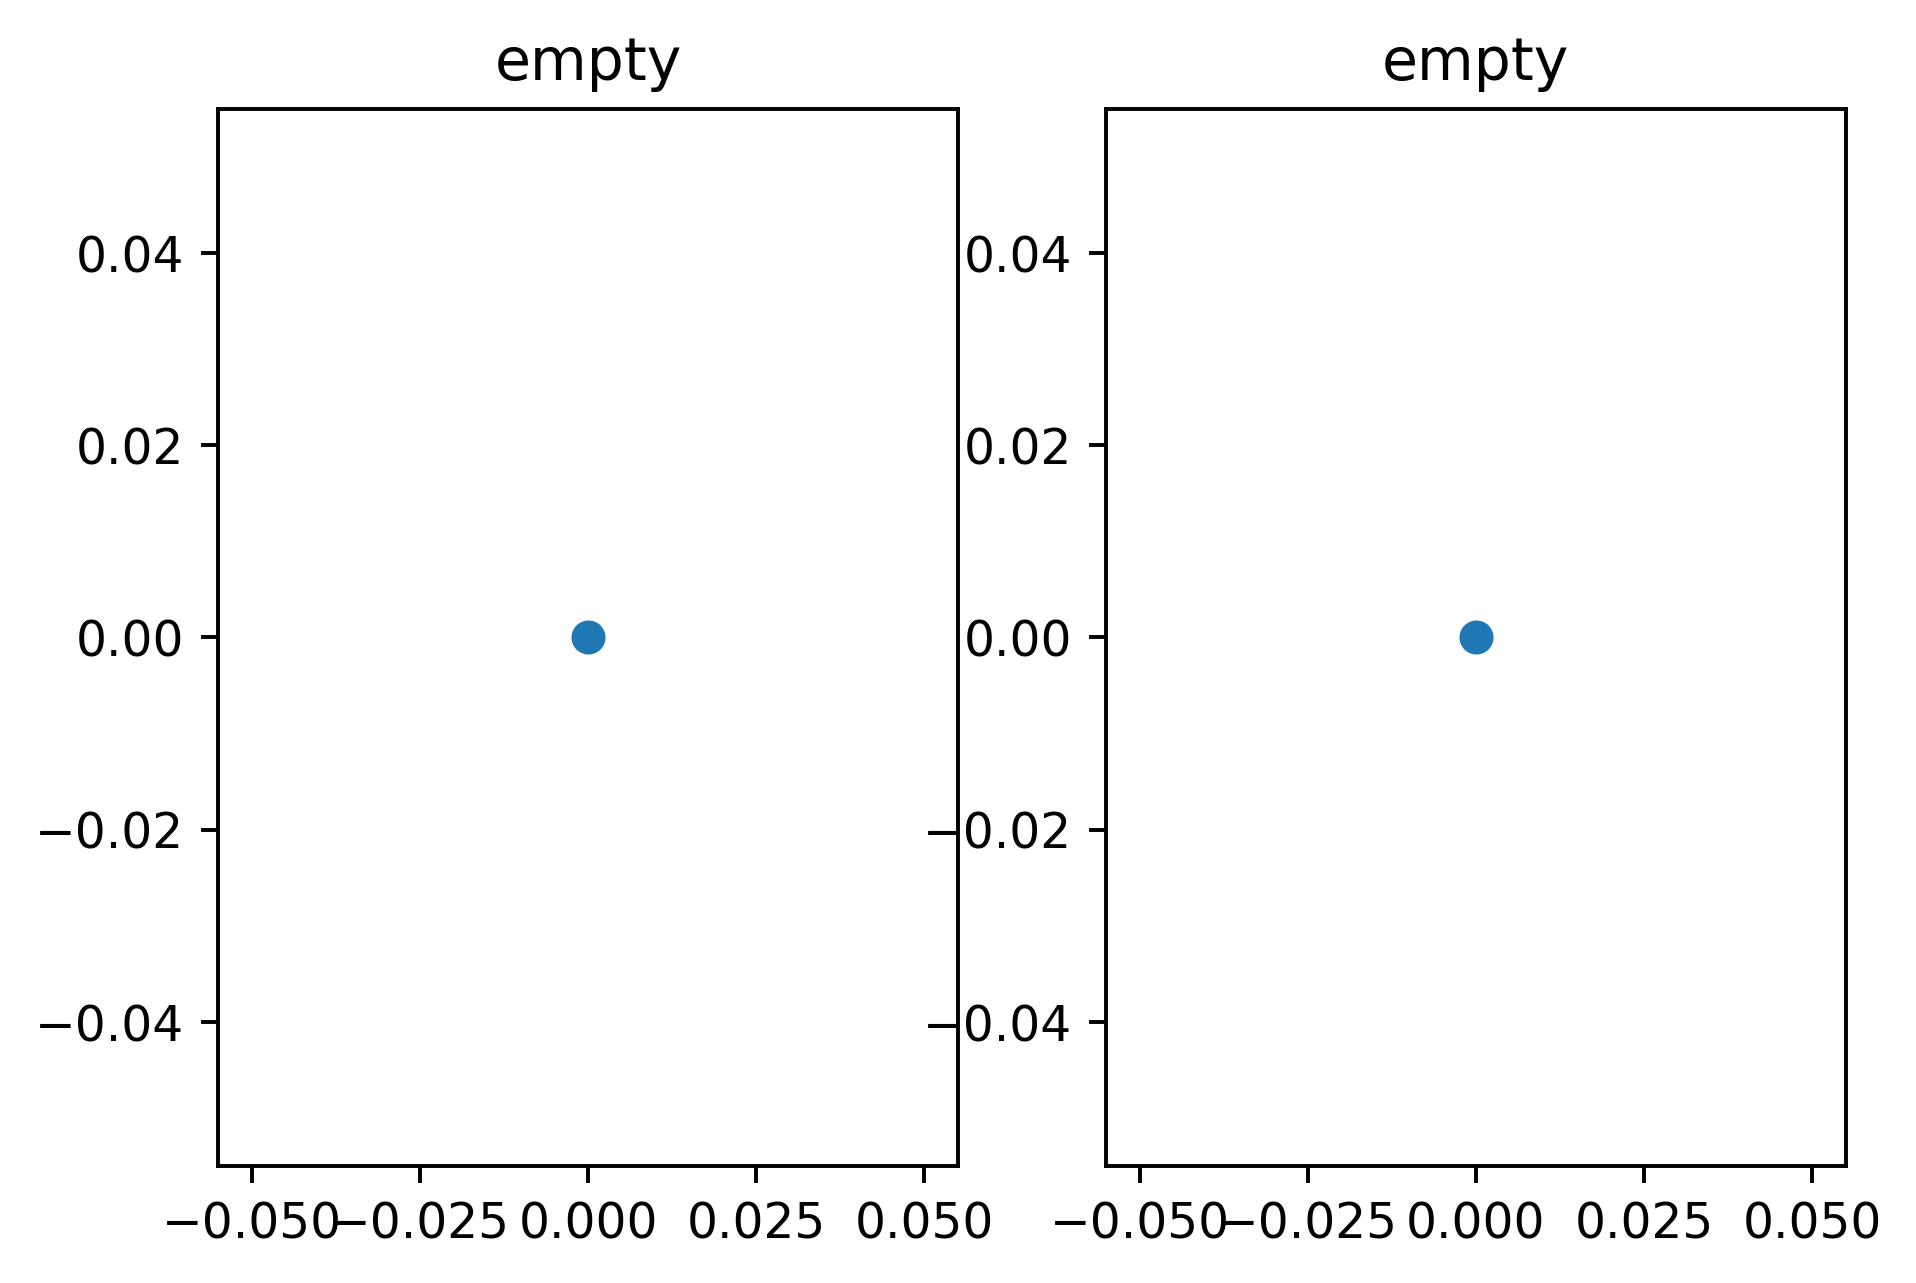

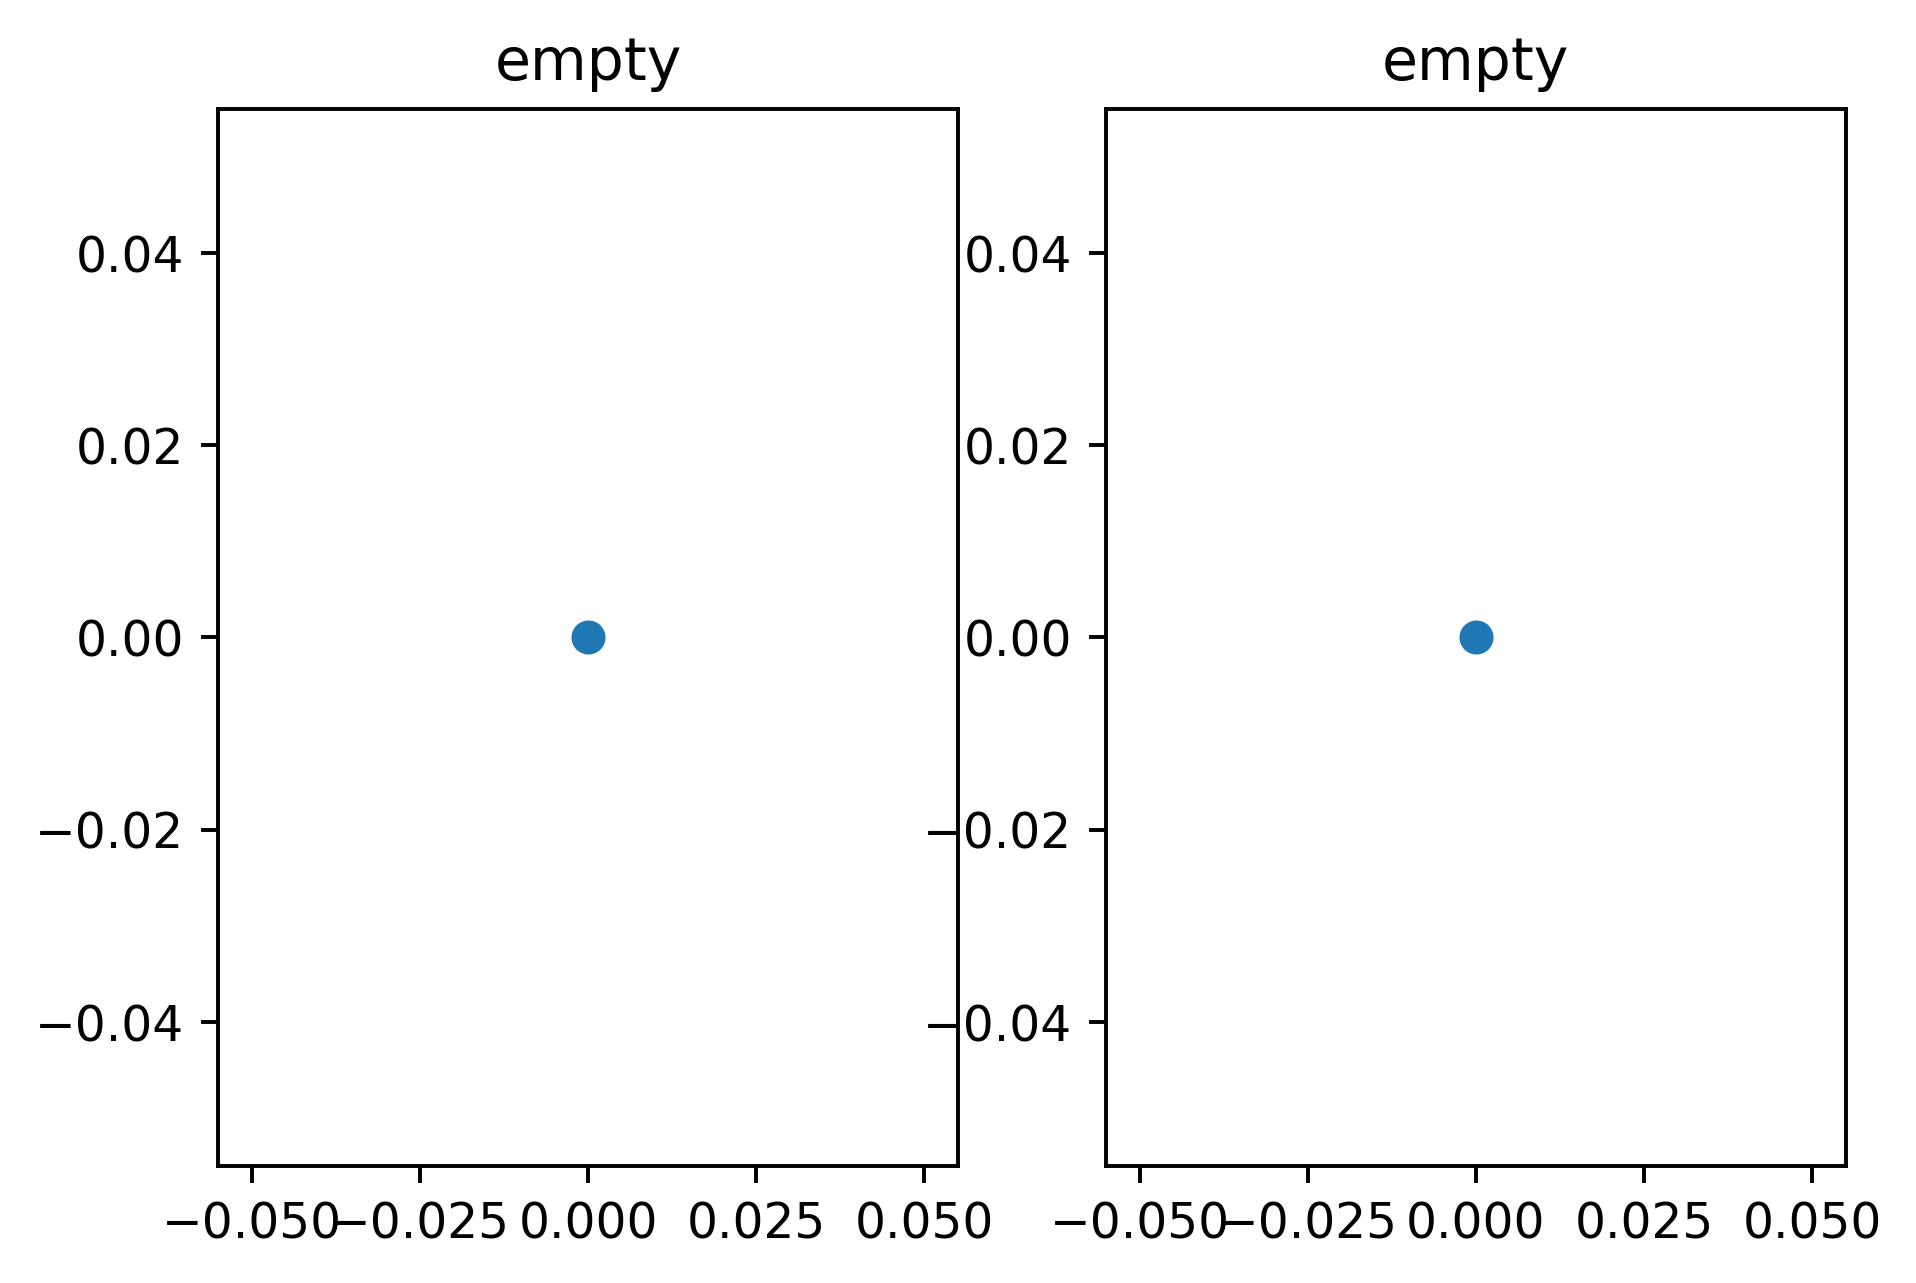

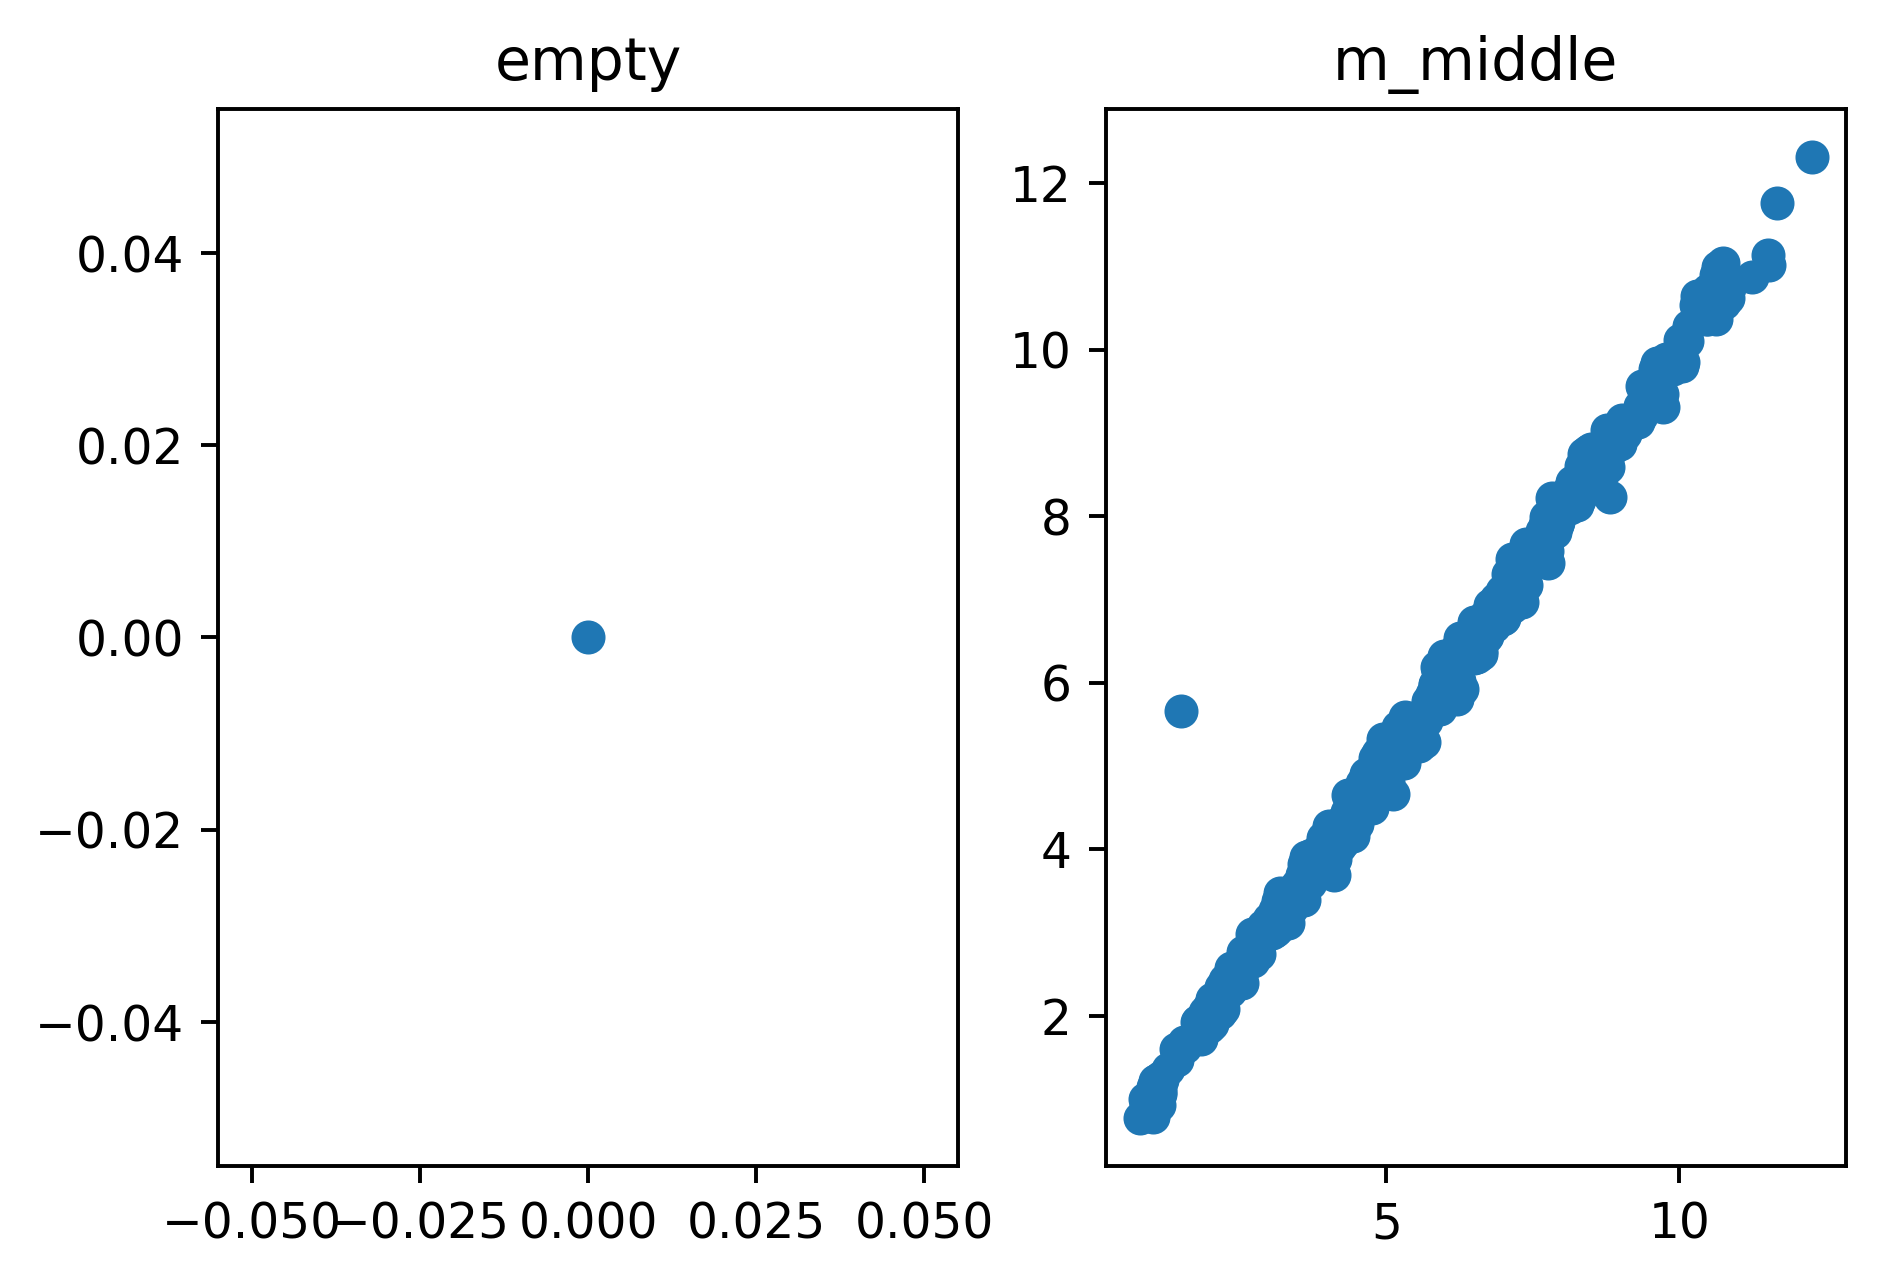

In [38]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(b6_middle, b6_max)
axs[1].set_title('m_middle')